In [1]:
import pandas as pd

loaded_data = pd.read_csv('C:/MyProjects/Other Projects/AI ChatBot Project/Naver_NER_Datasets.csv' \
                          , engine='python',encoding='CP949')

print(loaded_data)

data = pd.read_csv('C:/MyProjects/Other Projects/AI ChatBot Project/Naver NER Datasets.txt', sep='\t')
print(data[:100])

            1      비토리오  PER_B
0         2.0        양일  DAT_B
1         3.0        만에      -
2         4.0       영사관  ORG_B
3         5.0        감호  CVL_B
4         6.0       용퇴,      -
...       ...       ...    ...
1048570  22.0      되돌아본      -
1048571  23.0      현정은은  PER_B
1048572  24.0  중간계투도\t-    NaN
1048573  25.0      괜찮지만      -
1048574  26.0       선발을      -

[1048575 rows x 3 columns]
    index  word     NE
0       1  비토리오  PER_B
1       2    양일  DAT_B
2       3    만에      -
3       4   영사관  ORG_B
4       5    감호  CVL_B
..    ...   ...    ...
95     18  공표된다      -
96     19     .      -
97      1   권뢰가      -
98      2    있는      -
99      3    곳에      -

[100 rows x 3 columns]


In [2]:
print('데이터에 Null 값이 있는지 유무 : ' + str(loaded_data.isnull().values.any()))
print('데이터에 Null 값이 있는지 유무 : ' + str(data.isnull().values.any()))

데이터에 Null 값이 있는지 유무 : True
데이터에 Null 값이 있는지 유무 : True


In [3]:
print('어떤 열에 Null값이 있는지 출력')
print('==============================')
data.isnull().sum()

어떤 열에 Null값이 있는지 출력


index     0
word     90
NE        0
dtype: int64

In [4]:
# NE열의 각 데이터의 개수

data['NE'].value_counts()

-        729659
CVL_B     57502
NUM_B     56136
PER_B     43034
ORG_B     40860
DAT_B     25837
LOC_B     20881
TRM_B     18695
EVT_B     10982
NUM_I      8740
DAT_I      8107
ANM_B      6486
EVT_I      6448
PER_I      5165
ORG_I      4668
AFW_B      4247
CVL_I      3416
TRM_I      3375
TIM_B      3263
FLD_B      2345
AFW_I      1822
TIM_I      1074
PLT_B       264
MAT_B       238
LOC_I       211
ANM_I        58
FLD_I        41
MAT_I        14
PLT_I         3
Name: NE, dtype: int64

In [5]:
index = data['index']
word = data['word']
NE = data['NE']

print(index)
print(word)
print(NE)

0          1
1          2
2          3
3          4
4          5
          ..
1063566    2
1063567    3
1063568    4
1063569    5
1063570    6
Name: index, Length: 1063571, dtype: int64
0          비토리오
1            양일
2            만에
3           영사관
4            감호
           ... 
1063566      어째
1063567      뭔가
1063568    수상쩍은
1063569      좌담
1063570       ．
Name: word, Length: 1063571, dtype: object
0          PER_B
1          DAT_B
2              -
3          ORG_B
4          CVL_B
           ...  
1063566        -
1063567        -
1063568        -
1063569        -
1063570        -
Name: NE, Length: 1063571, dtype: object


In [6]:
tokenized_sentences = []
NE_tags = []
sentence = []
NE_list = []
vocab = {} 

for i in range(len(index)):
    strword = str(word[i])
    
    if i==0:
        sentence.append(strword)
        NE_list.append(NE[i])
    else:
        if index[i-1]>index[i]:
            tokenized_sentences.append(sentence)
            NE_tags.append(NE_list)
            sentence=[]
            NE_list=[]
            sentence.append(strword)
            NE_list.append(NE[i])
        else:
            sentence.append(strword)
            NE_list.append(NE[i])
            
    if word[i] not in vocab:  # 토큰이 딕셔너리 안에 없으면 추가
        vocab[word[i]] = 0 
    vocab[word[i]] += 1  # 토콘이 나올때마다 빈도 1 추가
    
print(len(NE_tags))
print(tokenized_sentences[:20])
print(NE_tags[:20])

89983
[['비토리오', '양일', '만에', '영사관', '감호', '용퇴,', '항룡', '압력설', '의심만', '가율'], ['이', '음경동맥의', '직경이', '8', '19mm입니다', '.'], ['9세이브로', '구완', '30위인', 'LG', '박찬형은', '평균자책점이', '16.45로', '준수한', '편이지만', '22⅓이닝', '동안', '피홈런이', '31개나', '된다', '.'], ['7승', '25패는', '상트페테르부르크가', '역대', '월드리그에', '출진한', '분별', '최선의', '성적이다', '.'], ['▲', '퍼거슨', '씨족의', '꾀'], ['[유로2008]', '공인구가', '변할', '기록', '시정조치는', '죽을', '맛', '?', 'nan'], ['로마올림픽에서', '육미지황탕', '이남지역으로', '동메달에', '머문', '추경대는', '차년', '파리오픈', '결승전에서', '진', '동영의', '탄셰', '차우세스쿠를', '비롯해', '몽골의', '이창동', '차간바,', '발보나의', '리자루드', '박혜미셔', '좌타자를', '놓고', '추축한다', '.'], ['금반', '명기', '통합우승', '24,', '10회차는', '8일', '상오', '6시', '50분,', '상오', '11시', '50분에', '발태가', '끝마감되며,', '비공식', '적중결과는', '5일', '공표된다', '.'], ['권뢰가', '있는', '곳에', '직경에', '따라', '달라지는데요', '.'], ['때로는은', '귀여운', '가스나기인', '비담,', '세상일에는', '무관심', '.'], ['22회말', '21-21', '동점타의', '꼬냑인', 'LG', '막둥이', '이종열은', '팀이', '어려울', '때', '귀중한', '타점을', '올려', '원기가', '좋다', '.'], ['▶', '케빈', '가넷,', '보스턴행', '확정…올스타', '19인방', '기대만발'], ['옥구권에

샘플의 최대 길이 : 175
샘플의 평균 길이 : 11.819621


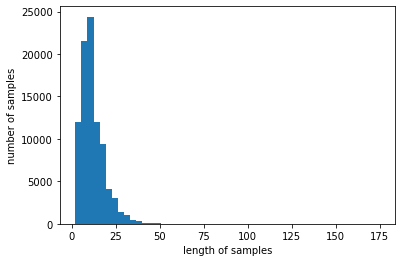

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

print('샘플의 최대 길이 : %d' % max(len(l) for l in tokenized_sentences))
print('샘플의 평균 길이 : %f' % (sum(map(len, tokenized_sentences))/len(tokenized_sentences)))
plt.hist([len(s) for s in tokenized_sentences], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [8]:
print(len(vocab))

vocab_sorted = sorted(vocab.items(), key = lambda x:x[1], reverse = True)  # 빈도수 기준으로 정렬
print(vocab_sorted[:50])

word_to_index = {}
i = 0
for (word, frequency) in vocab_sorted :

    i = i + 1
    word_to_index[word] = i  # 단어에 정수 할당

vocab_size = len(word_to_index) + 1
print('단어 집합의 크기: {}'.format((vocab_size)))

dd = list(word_to_index.items())
print(dd[:50])

326628
[('.', 74237), ('수', 5574), ('·', 5280), ('있는', 4735), ('．', 4627), ('한', 4193), ('이', 4009), ('있다', 3876), ('등', 2865), ('지난', 2693), ('및', 2288), ('그', 2232), ('?', 1977), ('두', 1931), ('있습니다', 1672), ('-(해설)', 1660), ('것으로', 1568), ('-', 1565), ('위해', 1416), (':', 1366), ('대한', 1315), ('것', 1312), ('첫', 1259), ('때문에', 1233), ('ⓒ', 1219), ('통해', 1216), ('!', 1175), ('이렇게', 1140), ('때', 1139), ('할', 1135), ('밝혔다', 1119), ('큰', 1105), ('전', 1070), ('것은', 1057), ('다른', 1035), ('말했다', 1032), ('것이', 1019), ('같은', 1019), ('많은', 1016), ('중', 1007), ('했다', 988), ('열린', 962), ('하는', 943), ('이날', 919), ('동안', 893), ('씨', 887), ('이런', 851), ('해', 821), ('그는', 811), ('○', 803)]
단어 집합의 크기: 326629
[('.', 1), ('수', 2), ('·', 3), ('있는', 4), ('．', 5), ('한', 6), ('이', 7), ('있다', 8), ('등', 9), ('지난', 10), ('및', 11), ('그', 12), ('?', 13), ('두', 14), ('있습니다', 15), ('-(해설)', 16), ('것으로', 17), ('-', 18), ('위해', 19), (':', 20), ('대한', 21), ('것', 22), ('첫', 23), ('때문에', 24), ('ⓒ', 25), ('통해', 26), ('!

In [9]:
encoded_sentences = []

for sentence in tokenized_sentences:
    encoded_sentence = []
    for word in sentence:
        if word == 'nan':
            encoded_sentence.append(0)
        else:
            encoded_sentence.append(word_to_index[word])  # 딕셔너리의 키를 단어로 해서 해당 단어의 정수를 리스트에 추가
        
    encoded_sentences.append(encoded_sentence)
    
print(f"인코딩 결과 : {encoded_sentences[:10]}\n")

인코딩 결과 : [[53042, 7840, 85, 53043, 17863, 97387, 26592, 97388, 97389, 35471], [7, 97390, 5002, 1000, 97391, 1], [97392, 53044, 97393, 290, 97394, 15373, 97395, 35472, 21421, 97396, 45, 97397, 97398, 129, 1], [13409, 97399, 97400, 383, 26593, 2372, 13410, 2552, 21422, 1], [572, 644, 53045, 97401], [97402, 53046, 13411, 1769, 97403, 8621, 5718, 13, 0], [53047, 97404, 97405, 13412, 21423, 97406, 726, 97407, 905, 1233, 7841, 35473, 97408, 304, 97409, 97410, 97411, 97412, 97413, 97414, 97415, 313, 97416, 1], [328, 26594, 26595, 6653, 35474, 143, 144, 2227, 21424, 144, 2776, 4237, 6173, 21425, 276, 8622, 185, 3817, 1], [457, 4, 737, 35475, 97, 53048, 1], [97417, 2553, 97418, 53049, 97419, 53050, 1]]



In [10]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# 모든 단어를 사용하며 인덱스 1에는 단어 'OOV'를 할당.
src_tokenizer = Tokenizer(oov_token='OOV', lower=False)
# 태깅 정보들은 내부적으로 대문자를 유지한 채 저장
tar_tokenizer = Tokenizer(lower=False)

src_tokenizer.fit_on_texts(tokenized_sentences)
tar_tokenizer.fit_on_texts(NE_tags)

vocab_size = len(src_tokenizer.word_index) + 1
tag_size = len(tar_tokenizer.word_index) + 1
print('단어 집합의 크기 : {}'.format(vocab_size))
print('개체명 태깅 정보 집합의 크기 : {}'.format(tag_size))

단어 집합의 크기 : 326630
개체명 태깅 정보 집합의 크기 : 30


In [11]:
print('단어 OOV의 인덱스 : {}'.format(src_tokenizer.word_index['OOV']))

단어 OOV의 인덱스 : 1


In [12]:
X_data = src_tokenizer.texts_to_sequences(tokenized_sentences)
y_data = tar_tokenizer.texts_to_sequences(NE_tags)

print(X_data[:10])
print(y_data[:10])

[[53042, 7841, 86, 53043, 17864, 97388, 26593, 97389, 97390, 35471], [8, 97391, 5003, 1001, 97392, 2], [97393, 53044, 97394, 291, 97395, 15374, 97396, 35472, 21422, 97397, 46, 97398, 97399, 130, 2], [13409, 97400, 97401, 384, 26594, 2373, 13410, 2553, 21423, 2], [573, 645, 53045, 97402], [97403, 53046, 13411, 1770, 97404, 8622, 5719, 14, 800], [53047, 97405, 97406, 13412, 21424, 97407, 727, 97408, 906, 1234, 7842, 35473, 97409, 305, 97410, 97411, 97412, 97413, 97414, 97415, 97416, 314, 97417, 2], [329, 26595, 26596, 6654, 35474, 144, 145, 2228, 21425, 145, 2777, 4238, 6174, 21426, 277, 8623, 186, 3818, 2], [458, 5, 738, 35475, 98, 53048, 2], [97418, 2554, 97419, 53049, 97420, 53050, 2]]
[[4, 6, 1, 5, 2, 1, 1, 1, 1, 1], [1, 1, 1, 3, 3, 1], [3, 1, 3, 5, 4, 1, 3, 1, 1, 3, 1, 1, 3, 1, 1], [3, 3, 7, 1, 9, 1, 1, 1, 1, 1], [1, 4, 2, 1], [9, 2, 1, 1, 2, 1, 1, 1, 1], [9, 8, 18, 2, 1, 4, 6, 9, 13, 1, 7, 4, 14, 1, 7, 4, 14, 7, 4, 14, 2, 1, 1, 1], [1, 2, 17, 3, 10, 6, 19, 22, 22, 19, 22, 22, 1, 1,

In [13]:
word_to_index = src_tokenizer.word_index
index_to_word = src_tokenizer.index_word
ner_to_index = tar_tokenizer.word_index
index_to_ner = tar_tokenizer.index_word
index_to_ner[0] = 'PAD'

print(index_to_ner)
print(ner_to_index)

{1: '-', 2: 'CVL_B', 3: 'NUM_B', 4: 'PER_B', 5: 'ORG_B', 6: 'DAT_B', 7: 'LOC_B', 8: 'TRM_B', 9: 'EVT_B', 10: 'NUM_I', 11: 'DAT_I', 12: 'ANM_B', 13: 'EVT_I', 14: 'PER_I', 15: 'ORG_I', 16: 'AFW_B', 17: 'CVL_I', 18: 'TRM_I', 19: 'TIM_B', 20: 'FLD_B', 21: 'AFW_I', 22: 'TIM_I', 23: 'PLT_B', 24: 'MAT_B', 25: 'LOC_I', 26: 'ANM_I', 27: 'FLD_I', 28: 'MAT_I', 29: 'PLT_I', 0: 'PAD'}
{'-': 1, 'CVL_B': 2, 'NUM_B': 3, 'PER_B': 4, 'ORG_B': 5, 'DAT_B': 6, 'LOC_B': 7, 'TRM_B': 8, 'EVT_B': 9, 'NUM_I': 10, 'DAT_I': 11, 'ANM_B': 12, 'EVT_I': 13, 'PER_I': 14, 'ORG_I': 15, 'AFW_B': 16, 'CVL_I': 17, 'TRM_I': 18, 'TIM_B': 19, 'FLD_B': 20, 'AFW_I': 21, 'TIM_I': 22, 'PLT_B': 23, 'MAT_B': 24, 'LOC_I': 25, 'ANM_I': 26, 'FLD_I': 27, 'MAT_I': 28, 'PLT_I': 29}


In [14]:
decoded = []
for index in X_data[0] : # 첫번째 샘플 안의 인덱스들에 대해서
    decoded.append(index_to_word[index]) # 다시 단어로 변환

print('기존의 문장 : {}'.format(tokenized_sentences[0]))
print('디코딩 문장 : {}'.format(decoded))

기존의 문장 : ['비토리오', '양일', '만에', '영사관', '감호', '용퇴,', '항룡', '압력설', '의심만', '가율']
디코딩 문장 : ['비토리오', '양일', '만에', '영사관', '감호', '용퇴,', '항룡', '압력설', '의심만', '가율']


In [15]:
max_len = 100
X_data = pad_sequences(X_data, padding='post', maxlen=max_len)
y_data = pad_sequences(y_data, padding='post', maxlen=max_len)

In [16]:
X_train, X_test, y_train_int, y_test_int = train_test_split(X_data, y_data, test_size=.2, random_state=777)
y_train = to_categorical(y_train_int, num_classes=tag_size)
y_test = to_categorical(y_test_int, num_classes=tag_size)

print('훈련 샘플 문장의 크기 : {}'.format(X_train.shape))
print('훈련 샘플 레이블(정수 인코딩)의 크기 : {}'.format(y_train_int.shape))
print('훈련 샘플 레이블(원-핫 인코딩)의 크기 : {}'.format(y_train.shape))
print('테스트 샘플 문장의 크기 : {}'.format(X_test.shape))
print('테스트 샘플 레이블(정수 인코딩)의 크기 : {}'.format(y_test_int.shape))
print('테스트 샘플 레이블(원-핫 인코딩)의 크기 : {}'.format(y_test.shape))

훈련 샘플 문장의 크기 : (71986, 100)
훈련 샘플 레이블(정수 인코딩)의 크기 : (71986, 100)
훈련 샘플 레이블(원-핫 인코딩)의 크기 : (71986, 100, 30)
테스트 샘플 문장의 크기 : (17997, 100)
테스트 샘플 레이블(정수 인코딩)의 크기 : (17997, 100)
테스트 샘플 레이블(원-핫 인코딩)의 크기 : (17997, 100, 30)


In [17]:
print(len(tokenized_sentences))

89983


In [18]:
from gensim.models import FastText


# size = 워드 벡터의 특징 값. 즉, 임베딩 된 벡터의 차원.
# window = 컨텍스트 윈도우 크기
# min_count = 단어 최소 빈도 수 제한 (빈도가 적은 단어들은 학습하지 않는다.)
# workers = 학습을 위한 프로세스 수
# sg = 0은 CBOW, 1은 Skip-gram.

model_FT = FastText(tokenized_sentences, vector_size=128, window=5, min_count=0, workers=4, sg=1)

In [19]:
embedding_vec = model_FT.wv.vectors

print(len(embedding_vec))

326628


In [21]:
import numpy as np

embedding_dim = 128
embedding_matrix = np.zeros((vocab_size, embedding_dim))
print('임베딩 테이블의 크기(shape) :',np.shape(embedding_matrix))

for word, i in word_to_index.items():
    embedding_vector = model_FT.wv[word]
    print(i, word, end=" ")
    # print(embedding_vector)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
        
print(embedding_matrix)

임베딩 테이블의 크기(shape) : (326630, 128)


1 OOV 2 . 3 수 4 · 5 있는 6 ． 7 한 8 이 9 있다 10 등 11 지난 12 및 13 그 14 ? 15 두 16 있습니다 17 -(해설) 18 것으로 19 - 20 위해 21 : 22 대한 23 것 24 첫 25 때문에 26 ⓒ 27 통해 28 ! 29 이렇게 30 때 31 할 32 밝혔다 33 큰 34 전 35 것은 36 다른 37 말했다 38 것이 39 같은 40 많은 41 중 42 했다 43 열린 44 하는 45 이날 46 동안 47 씨 48 이런 49 해 50 그는 51 ○ 52 뒤 53 하고 54 신문게재일자 55 게 56 될 57 좋은 58 전재 59 오는 60 = 61 위한 62 없는 63 합니다 64 무단 65 재배포 66 대해 67 합동 68 씨가 69 것이다 70 팀 71 불연속 72 Copyrights 73 모든 74 스포츠만 75 치시면 76 주소창에 77 된 78 한눈에 79 올 80 있을 81 것을 82 요즘 83 그런 84 새로운 85 있어요 86 만에 87 내 88 제보 89 보도자료 90 됐다 91 거예요 92 [마이데일리 93 실시간 94 뉴스 95 어떤 96 데 97 볼 98 따라 99 아니라 100 한다 101 그의 102 총 103 씨의 104 되는 105 등을 106 않은 107 다양한 108 씨는 109 ▶ 110 그때 111 무단전재&재배포 112 없다 113 번 114 몇 115 세 116 건 117 약 118 됩니다 119 있다고 120 어떻게 121 권함 122 근래 123 있다는 124 제가 125 있고 126 있는데요 127 않고 128 들어 129 패주를 130 된다 131 권뢰 132 이에 133 있어 134 갖고 135 이를 136 어느 137 것”이라고 138 press@mydaily.co.kr모바일 139 않았다 140 크게 141 경기에서 142 2일 143 수도 144 8일 145 상오 146 1년 147 6일 148 3일 149 1일 150 9년 151 최종 152 계절 15

2095 되면서 2096 주도권을 2097 내주고 2098 거기에 2099 감안하면 2100 프로야구 2101 출자 2102 면치 2103 대단한 2104 구단은 2105 보탰다 2106 파일을 2107 맡게 2108 초독을 2109 기록할 2110 들어갔다 2111 많고 2112 미 2113 전반에 2114 우즈는 2115 이어질 2116 26개 2117 목에 2118 크기의 2119 보지 2120 있었다고 2121 모임을 2122 참여하는 2123 보냈다 2124 잃은 2125 근육이 2126 발이 2127 이벤트를 2128 잇달아 2129 -그 2130 31개 2131 아무런 2132 직로 2133 투하 2134 슈팅으로 2135 마리가 2136 남겨두고 2137 벌렸다 2138 던졌다 2139 금패를 2140 운영하는 2141 특유의 2142 사실이다 2143 딴 2144 평균자책점 2145 높게 2146 를 2147 사고가 2148 다들 2149 속하는 2150 쉬운 2151 것들이 2152 충격을 2153 숨어 2154 옛 2155 회사의 2156 낯선 2157 출시 2158 보이며 2159 어려울 2160 면에서 2161 접대 2162 관심 2163 부르는 2164 어렵다 2165 갔다 2166 좋았다 2167 세운 2168 바람에 2169 저력을 2170 퇴좌를 2171 분들은 2172 몰고 2173 파문을 2174 힘으로 2175 성과를 2176 말로 2177 같은데요 2178 올림픽에서 2179 솜씨를 2180 결정을 2181 한두 2182 있었죠 2183 참여한 2184 저를 2185 그것을 2186 축소 2187 맨 2188 자존심을 2189 말까지 2190 다 2191 때로는 2192 하나도 2193 날린 2194 말이죠 2195 광주 2196 영하 2197 내외 2198 되기도 2199 지켜보는 2200 전했습니다 2201 빌 2202 과감한 2203 형상을 2204 나중에 2205 경찰은 2206 실적을 2207 집계됐다 2208 일

3560 상리로 3561 관계자들이 3562 공 3563 열은 3564 공표된 3565 맞대결에서 3566 LG전자는 3567 위를 3568 수업시간 3569 이곳을 3570 얻는 3571 사태가 3572 특출 3573 설 3574 있겠지만 3575 지고 3576 도루 3577 14개 3578 빈 3579 명중 3580 2년간 3581 이글 3582 30 3583 16위 3584 올라갈 3585 수영이 3586 같고 3587 기대했다 3588 상견 3589 업무 3590 나옵니다 3591 타수를 3592 위상을 3593 같아 3594 유료로 3595 상좌 3596 놓은 3597 2루수 3598 속에는 3599 양곡 3600 수명을 3601 발견된 3602 청소년 3603 출정해 3604 양이 3605 단말기 3606 전체의 3607 하고, 3608 계획을 3609 초창기 3610 몰린 3611 도루를 3612 별을 3613 출연해 3614 비공개했다 3615 부진했던 3616 곳을 3617 7년에 3618 상견으로 3619 나오게 3620 회차 3621 득점력을 3622 27개 3623 옮겨 3624 안된다 3625 건지 3626 상을 3627 원 3628 부진에 3629 다를 3630 ETRI 3631 비 3632 전해졌습니다 3633 작년에 3634 편이 3635 연결해 3636 영국의 3637 밝히고 3638 시작되는 3639 [골프] 3640 정보기술(IT) 3641 엄청나게 3642 과긍하는 3643 런던 3644 그러한 3645 기록은 3646 제공하고 3647 구성돼 3648 끝내기 3649 보여주지 3650 관련한 3651 저반에는 3652 분을 3653 효력을 3654 사주가 3655 지분을 3656 재계약을 3657 드래프트 3658 논평을 3659 도통 3660 논문 3661 없다”며 3662 우리나라의 3663 이뤄질 3664 일습을 3665 보태 3666 펼쳐진다 3667 맛이 3668 제일일 3669 차이는 3670 드러났다 3671 

4786 나가서 4787 업고 4788 출격을 4789 아메리카합중국에서 4790 분단 4791 가리는 4792 채널 4793 상용화 4794 캐나다 4795 던지는 4796 궐녀를 4797 바른길으로 4798 좋다고 4799 야주 4800 조야 4801 손색이 4802 찾아가 4803 세계대전 4804 지켜봐야 4805 이렇듯 4806 교수 4807 나지 4808 입신한 4809 떨어질 4810 단말기를 4811 자별한 4812 매치별로 4813 주관하는 4814 CDMA 4815 겪었다 4816 29명의 4817 숨은 4818 만들어지는 4819 부른 4820 상태는 4821 솜씨 4822 말부터 4823 빨간 4824 뼈를 4825 티 4826 운동경기에 4827 메이저리그 4828 그럼에도 4829 제압 4830 버린 4831 꿇었다 4832 맞이한 4833 제번 4834 그때의 4835 동부의 4836 집중할 4837 눈부신 4838 선수에 4839 회차가 4840 흔한 4841 와이어 4842 본국 4843 거울을 4844 반격에 4845 주에는 4846 무엇일까요 4847 열이 4848 우리나라는 4849 모르겠다 4850 법식을 4851 식경 4852 모아지고 4853 변화가 4854 삼성화재의 4855 갑각류는 4856 물었다 4857 우려가 4858 바꾼 4859 확인하고 4860 분휘해 4861 적록했다 4862 운영하고 4863 블랭크를 4864 값진 4865 테니까 4866 지점을 4867 마리의 4868 3연전 4869 선호하는 4870 한판 4871 나가야 4872 소망을 4873 BPM 4874 한몸에 4875 변함없이 4876 급풍의 4877 생겼다 4878 끌어 4879 찬 4880 김영주골프 4881 속을 4882 고안 4883 초고속 4884 깊고 4885 보겠습니다 4886 씨와의 4887 앞서나갔다 4888 주제가 4889 시즌부터 4890 KT&G의 4891 일정한 4892 세부 4893 안젤코의 4894 왕년의 489

6195 경우를 6196 분석해 6197 해석하고 6198 측의 6199 사업으로 6200 부지를 6201 전력에 6202 타선은 6203 지명권을 6204 품질 6205 예산이 6206 나눌 6207 웃는 6208 신종 6209 안마를 6210 끝냈다 6211 뉴욕 6212 장성 6213 위협하는 6214 연고 6215 11언더파 6216 장소에서 6217 넘어선 6218 농구를 6219 가져가게 6220 다승 6221 KIA를 6222 역할은 6223 FIVB 6224 민 6225 생 6226 왕의 6227 암술로 6228 애플의 6229 신나는 6230 부드럽게 6231 제팔예술이 6232 지반 6233 산디 6234 골이 6235 바이러스 6236 [FC 6237 최선을 6238 보인다”고 6239 투입하며 6240 대한민국은 6241 본지 6242 의원 6243 LG필립스LCD 6244 주어진다 6245 도는 6246 ●여자 6247 슈팅 6248 맞대결은 6249 교전이 6250 SK전 6251 밤사이 6252 터지지 6253 많기 6254 생각해 6255 끝나면 6256 사상이 6257 군계집 6258 조로 6259 무어 6260 피겨 6261 우승배를 6262 도착한 6263 나누는 6264 치러야 6265 내년 6266 전진되는 6267 활발하게 6268 쉬고 6269 태어날 6270 차고 6271 낳을 6272 절정의 6273 빼어난 6274 진한 6275 14대 6276 아들이 6277 유지해 6278 소각 6279 연예토픽 6280 전두를 6281 관을 6282 전까지는 6283 18위를 6284 현전에 6285 BcN 6286 적게 6287 세계적 6288 우세를 6289 하시는 6290 달라 6291 생김새로 6292 협약을 6293 체결했다 6294 중간이 6295 인증 6296 너는 6297 내년도 6298 디펜스 6299 가기 6300 많은데 6301 오면서 6302 외에는 6303 몰세 6304 만든다 6305 알리고 6306 

7611 15개의 7612 생기게 7613 15라운드 7614 1경기 7615 시선을 7616 이유 7617 병력 7618 표했다 7619 얘기할 7620 30% 7621 연구에 7622 강국 7623 업계는 7624 중국 7625 바뀌게 7626 FC와의 7627 누군가가 7628 기르는 7629 이완을 7630 애절한 7631 이용해 7632 밀리는 7633 세염을 7634 현장에 7635 에너지가 7636 약을 7637 늘릴 7638 도입한 7639 완파하고 7640 전종 7641 풀어낸 7642 내휘를 7643 따내며 7644 먹어야 7645 대상으로 7646 연쇄 7647 12개의 7648 시즌의 7649 11위에 7650 관여 7651 벗어날 7652 확인 7653 28언더파 7654 메운 7655 묵은해 7656 결정한 7657 성관, 7658 취하고 7659 분위기가 7660 3시간 7661 진실을 7662 회사에서 7663 밝혔는데요 7664 23명 7665 왔을 7666 초대 7667 견해를 7668 자랑하며 7669 2차전에서는 7670 한돌림도 7671 모습에 7672 브랜드의 7673 10% 7674 리그를 7675 자태가 7676 지속될 7677 여심을 7678 백전노장 7679 마지막 7680 기자]대한민국 7681 연예계의 7682 산호는 7683 대해선 7684 효명한 7685 학위를 7686 25명 7687 SK와의 7688 있다, 7689 찍은 7690 넘어섰다 7691 12년까지 7692 개막된 7693 선수를 7694 말았습니다 7695 그로 7696 20만 7697 솔로홈런을 7698 올여름 7699 파일 7700 한통, 7701 잡아낸 7702 모습이었다 7703 1개의 7704 스페인의 7705 풍단 7706 운동경기의 7707 13 7708 삶은 7709 안을 7710 진출의 7711 확보하고 7712 문자 7713 욕심 7714 김주성은 7715 낳으면 7716 코 7717 3위를 7718 9회 7719 조건이 7

9226 플라이 9227 최대한도 9228 머물며 9229 치면서 9230 대한항공 9231 파란 9232 의결이 9233 기업인 9234 능력이 9235 휴대폰으로 9236 -제 9237 말썽이 9238 처음 9239 기앙을 9240 뿐이라고 9241 수준이다 9242 말썽을 9243 부지하고 9244 홈런은 9245 견양한 9246 까지 9247 슬럼프에 9248 권도를 9249 수요하다 9250 미래세를 9251 하향한 9252 주간 9253 속도가 9254 가세로 9255 제휴했다 9256 수근의 9257 눈에는 9258 기준화 9259 보자면 9260 말고도 9261 않나 9262 15명이 9263 항맥을 9264 사내 9265 제한을 9266 떠나지 9267 떠올리게 9268 기념해 9269 판정을 9270 전환 9271 20타를 9272 17점을 9273 아이의 9274 결과다 9275 첫부분으로 9276 임기를 9277 준칙화 9278 smshin@etnews.co.kr 9279 29위를 9280 보던 9281 25회차 9282 12회 9283 14경기 9284 늘린 9285 순 9286 장악할 9287 임기는 9288 5년부터 9289 머리카락은 9290 급풍이 9291 주고받는 9292 있었으나 9293 왼발 9294 새이에 9295 귀를 9296 시작하고 9297 갔는데 9298 강하고 9299 대우를 9300 측에 9301 이어받아 9302 호투로 9303 ‘톱10’에 9304 추격했다 9305 기거 9306 볼카운트 9307 역량 9308 선인이 9309 떠나기 9310 소태를 9311 저랑 9312 29경기 9313 펼치면서 9314 베이징올림픽에 9315 내로라하는 9316 한달 9317 성함으로 9318 이와는 9319 수출이 9320 두우적인 9321 사체 9322 1시즌 9323 동조로 9324 보도자료를 9325 결정적 9326 경제에 9327 체계 9328 포끽은 9329 실었다 9330 정형 9331 17일부터 9332 박

10389 프로그램에 10390 1승 10391 아버지 10392 12주 10393 열악한 10394 거듭한 10395 EA 10396 후반전 10397 자태로 10398 만들기에 10399 완비적인 10400 수십 10401 연극으로 10402 8분 10403 위압했다 10404 28사 10405 공성한 10406 KT＆G 10407 똥집이 10408 갑작스런 10409 5타 10410 하기에 10411 병화를 10412 우위에 10413 유지하는 10414 제작 10415 공략해 10416 치레를 10417 촬영한 10418 배는 10419 답을 10420 눈앞에 10421 살을 10422 공군 10423 학정했다 10424 27위를 10425 붉은색 10426 동안이 10427 팀인 10428 상부상조 10429 달라”고 10430 전쟁을 10431 생겼습니다 10432 넘도록 10433 간직하고 10434 단초로 10435 장점으로 10436 연유를 10437 17라운드 10438 28, 10439 6회차 10440 가져온 10441 여야 10442 11-0 10443 5명 10444 KCC에 10445 모듈 10446 웅장한 10447 마켓을 10448 더운 10449 확인된 10450 홈페이지에서 10451 아쉬움은 10452 최적의 10453 반향을 10454 [축구공화국ㅣ강진=김태석 10455 조영= 10456 2년까지 10457 샷으로 10458 쏟아졌다 10459 무력이 10460 2차전지 10461 터트린 10462 분위기다 10463 목표를 10464 26위로 10465 신의 10466 여름이 10467 28번 10468 뽑힌 10469 7점을 10470 엇갈렸다 10471 범위가 10472 자용이 10473 사업자의 10474 계서를 10475 좋기 10476 플래시 10477 형국이 10478 데뷔전 10479 어렵고 10480 증전 10481 10경기 10482 흔들리고 10483 섬전 10484 yun1972@etnews.co.kr

 밝혀지지 11817 있다는데요 11818 돌입한 11819 천거했다 11820 성산을 11821 두가지 11822 개념의 11823 블록 11824 마무리했다 11825 관찰할 11826 토했다 11827 소니 11828 체차 11829 예상 11830 시리즈의 11831 행보는 11832 위인들은 11833 떨어지지 11834 방외에서 11835 사회의 11836 21타로 11837 여금까지 11838 거침없이 11839 최고급 11840 이해하는 11841 뽐내며 11842 상업에 11843 낮다 11844 있었다”고 11845 11라운드에서 11846 하이마트)가 11847 볼일을 11848 2타를 11849 해외에서도 11850 행진을 11851 제동이 11852 전송 11853 14타로 11854 사곡을 11855 주공은 11856 아니었습니다 11857 이상, 11858 연심 11859 살아날 11860 오른발로 11861 불참해 11862 사업자들이 11863 SK텔레콤의 11864 KT&G와의 11865 태어나 11866 19살 11867 싹쓸이 11868 연중 11869 유행이 11870 28명을 11871 흐르고 11872 비공식적인 11873 KT＆G가 11874 집중하는 11875 걸림돌로 11876 적힌 11877 TV에서 11878 한참 11879 전신이 11880 가장자리를 11881 비공개돼 11882 쪽에서 11883 디트로이트 11884 재밌는 11885 속생각을 11886 :힘을 11887 22사 11888 한거 11889 컨소시엄을 11890 본보기를 11891 3기 11892 불참했다 11893 15번째 11894 승격 11895 20명의 11896 22번 11897 똥집을 11898 한자리에서 11899 뇌의 11900 서록이 11901 2회 11902 구안된 11903 동물의 11904 프레드가 11905 성음을 11906 영수에서 11907 거라 11908 올드 11909 29라운드 11910 출진, 11911 추락

13116 재 13117 산이 13118 화두는 13119 표시했다 13120 마리화나를 13121 아들은 13122 웃도는 13123 장으로 13124 중화민국의 13125 웃으며 13126 제거해 13127 송유걸은 13128 핫이슈가 13129 고사 13130 이끌게 13131 사로잡는 13132 커져 13133 선인의 13134 본바탕 13135 곡으로 13136 파장이 13137 (김종국 13138 엘지전자 13139 드러났습니다 13140 대개가 13141 상품에 13142 재활을 13143 사로잡고 13144 부위에 13145 높을 13146 8년의 13147 상업이 13148 아동방 13149 6시즌 13150 숨쉬기가 13151 21여 13152 단역 13153 잊은 13154 잇몸 13155 와~ 13156 작전에 13157 표준의 13158 풍기는 13159 기념하기 13160 태도가 13161 상 13162 본성으로 13163 축소에 13164 KEPCO45 13165 대단했습니다 13166 1점 13167 준다고 13168 승패 13169 중핵으로 13170 홍포 13171 쓰러진 13172 줄기세포가 13173 보여야 13174 않겠다고 13175 사탕을 13176 구 13177 정부가 13178 방송사 13179 컨소시엄이 13180 삽니다 13181 배달 13182 번트를 13183 애슐리는 13184 색깔을 13185 가면서 13186 클리블랜드 13187 유희로 13188 조추첨 13189 라이벌 13190 1%를 13191 있고요, 13192 16개의 13193 미래시제를 13194 적기로 13195 되살아난 13196 29m 13197 의미하는 13198 법한 13199 일인지 13200 생방송 13201 맞대결이 13202 하루라도 13203 보았다 13204 조선인민민주주의공화국의 13205 곡용해 13206 버디퍼트가 13207 한국전력 13208 IPTV를 13209 활동해 13210 해결책을 13211 포스트시즌에 

 가려면 14469 11타로 14470 17살 14471 간택으로 14472 입자를 14473 패주다 14474 바꿔서 14475 질량이 14476 4분 14477 사전에 14478 확인해야 14479 내려간 14480 연예가를 14481 해외에서는 14482 4월에 14483 사지어금니로 14484 미사일 14485 율선 14486 옆에는 14487 기실상 14488 갖다 14489 3위로 14490 체루가 14491 맥도날드 14492 기록될 14493 당대가 14494 ‘중국 14495 기다려야 14496 합당한 14497 동계올림픽 14498 기수 14499 장래 14500 직장을 14501 진입해 14502 않느냐 14503 있었나 14504 아니다”라며 14505 상비하고 14506 애시당초 14507 발언은 14508 특수성이 14509 선임했다 14510 존슨 14511 부하를 14512 흡만한 14513 맞춰져 14514 로마 14515 골프는 14516 성공시키는 14517 모양인데요 14518 과징금 14519 12-1 14520 포스트 14521 천기가 14522 배역 14523 어떻게든 14524 남성을 14525 수천개의 14526 공사현장 14527 삶 14528 11년까지 14529 닌텐도 14530 7연승을 14531 대결에 14532 범실까지 14533 줄고 14534 전당에 14535 -이건 14536 싶지만 14537 토우 14538 오랑우탄이 14539 8-8 14540 뜯어낸 14541 수십만 14542 파악하는 14543 해리슨 14544 년을 14545 2세기 14546 ※ 14547 원자력 14548 미래세 14549 복고 14550 좋아져 14551 견양해 14552 과징금을 14553 짙었다 14554 본심으로 14555 구비적인 14556 유쾌하게 14557 제목이 14558 학정됐습니다 14559 풍성하게 14560 수요하다”고 14561 국제배구 14562 이유다 14563 그러죠 14564 5회 14565

15580 인원 15581 모범이 15582 고려불화 15583 공히 15584 기쁠 15585 빠진다 15586 권하는 15587 약이 15588 동호회 15589 음악을 15590 논란은 15591 심의를 15592 인민 15593 AVC컵 15594 라트비아 15595 이자 15596 형체는 15597 문자가 15598 마음뜻을 15599 강의시간은 15600 소규모로 15601 불린다 15602 늘어놓은 15603 (이정호 15604 우측 15605 2연패 15606 쥐가 15607 게임, 15608 요지를 15609 단독으로하는 15610 일체입니다 15611 개시 15612 3년도 15613 점프 15614 꾸짖음은 15615 주명 15616 차림으로 15617 9경기를 15618 이겨야하는 15619 누르면 15620 시장점유율 15621 말라리아에 15622 군단의 15623 밀어쳐 15624 가취지례를 15625 싶었는데 15626 모욕을 15627 서록하고 15628 예전에는 15629 고의를 15630 일찍부터 15631 아동 15632 다는 15633 소박한 15634 무르팍 15635 설립하고 15636 발매마감 15637 포함해서 15638 자 15639 우세 15640 춘추가 15641 제정 15642 초점거리가 15643 스타일의 15644 12세 15645 마더 15646 배구가 15647 온도에서 15648 처리했다 15649 C조 15650 정도면 15651 예비를 15652 요부한 15653 합류, 15654 의향으로 15655 씨와 15656 타인을 15657 녹지 15658 이상민 15659 투혼이 15660 제품은 15661 스크린을 15662 돌아오고 15663 딱딱하게 15664 비등의 15665 투입한 15666 날이면 15667 왜국은 15668 풍조가 15669 1일(한국시간) 15670 바라면서 15671 개정안 15672 동작은 15673 동영상은 15674 회의는 15675 이용하게 15676 진지 156

16775 작년에는 16776 주모하는 16777 양식으로 16778 19회차 16779 공급하고 16780 가짓수 16781 개만 16782 동면을 16783 미불 16784 27-1 16785 [프로농구 16786 수상을 16787 급부상한 16788 반전의 16789 저게 16790 피자 16791 25-1로 16792 묵호초 16793 24회차 16794 성공하며 16795 역사에서 16796 관계가 16797 찾아올 16798 전자제품 16799 카트비 16800 비거리가 16801 내려갔다 16802 병자는 16803 분전한 16804 필수하다는 16805 예비신부 16806 산디는 16807 전개할 16808 불행을 16809 소인의 16810 비거리 16811 스크린 16812 다이어트를 16813 광의하고 16814 다감이 16815 빠져나가는 16816 자축했다 16817 23연승 16818 권도가 16819 병이 16820 작주에 16821 답지 16822 자연인은 16823 겨울에도 16824 성을 16825 월등한 16826 묶는 16827 이야기의 16828 주겠다고 16829 발짝 16830 운동할 16831 치즈의 16832 제게 16833 가를 16834 제공된다 16835 매니지먼트 16836 입성한 16837 팔에 16838 상장막대 16839 5타로 16840 얻어냈다 16841 예문 16842 오버파로 16843 연말에 16844 사이는 16845 알았죠 16846 그립니다 16847 계약기간 16848 금회가 16849 녹슬지 16850 이력이 16851 무비로 16852 기념하고 16853 출진한다 16854 -몇 16855 이익볼 16856 별은 16857 낮추고 16858 12년에는 16859 손금한 16860 쏘고 16861 도왔다 16862 출범식을 16863 녀석들의 16864 날짜 16865 암루를 16866 18번홀 16867 주눅들지 16868 엘지전자는 16869 강행처리 16870 민망 16871 활용

17564 하여 17565 ”며 17566 않고요 17567 그러지 17568 가격이 17569 불과시했다 17570 던졌고 17571 영향력으로 17572 틀린 17573 감격의 17574 월드컵을 17575 찍습니다 17576 않는다며 17577 의미한다 17578 전통의 17579 생을 17580 사람됨의 17581 집게를 17582 프레스센터에서 17583 본래부터 17584 이유가 17585 후반의 17586 시범경기에서 17587 방이 17588 불러들이는 17589 물종 17590 초청출전한 17591 매드니스 17592 경품도 17593 황태자 17594 구체적으로 17595 북선 17596 저변 17597 그때도 17598 기획한 17599 사곡 17600 여가에 17601 컴백한 17602 진귀한 17603 아메리카가 17604 하락세를 17605 벌어져 17606 예정”이라며 17607 굴러 17608 끝낼 17609 대한배구협회는 17610 비요를 17611 보관할 17612 타인들은 17613 지도의 17614 요정적인 17615 살펴보자 17616 배팅볼 17617 환한 17618 대출 17619 전술의 17620 무기적으로 17621 가요무대는 17622 이목구비 17623 노력하고 17624 아프리카의 17625 다이아몬드 17626 깎는 17627 기대감이 17628 엇비슷한 17629 이미지를 17630 운영중이다 17631 없으니까 17632 요소를 17633 사리판단을 17634 사조가 17635 아리따운 17636 찬스는 17637 방사한 17638 07/08 17639 물망에 17640 괜찮을 17641 얽이를 17642 오르게 17643 투약 17644 괴상을 17645 아꼈다 17646 앞날을 17647 결합을 17648 예기 17649 받아들였다 17650 능숙한 17651 20명 17652 웃으면 17653 조항 17654 패기로 17655 서부 17656 맞수가 17657 황인춘은 17658 도와 17659 여전

18834 한국낭자군의 18835 겨울리그에서 18836 27번째 18837 만들어냈습니다 18838 숨기고 18839 약세화하기 18840 -수요일 18841 건강도 18842 골프팬들로부터 18843 14차례 18844 누구에게 18845 시도 18846 28여 18847 지면서 18848 종목은 18849 음성을 18850 부작용을 18851 호흡기 18852 ‘통신 18853 엿보인다 18854 아프다 18855 잔디밭에 18856 오게 18857 마니를 18858 일횡 18859 간단하게 18860 팀마다 18861 가닥이 18862 부분의 18863 촌부리 18864 감정표출 18865 순위는 18866 6위로 18867 춤, 18868 희생번트가 18869 유나이티드(이하 18870 이대호는 18871 유력을 18872 고립된 18873 장애물을 18874 당기는 18875 집중력도 18876 승무패는 18877 선착을 18878 무, 18879 기록하면 18880 만남에서 18881 히타치 18882 활용에 18883 화상을 18884 거야, 18885 비타민에서 18886 응집력이 18887 부담스럽다 18888 구성 18889 성음이 18890 삼는 18891 모습에서 18892 4일(현지시각) 18893 쓰면 18894 중앙을 18895 맞추기 18896 예상이 18897 조직개편 18898 예견을 18899 4연패 18900 춘추를 18901 브라이언트가 18902 방속을 18903 앞이 18904 구상 18905 늘면서 18906 거, 18907 한계 18908 시범서비스를 18909 기술, 18910 강국의 18911 중심, 18912 9시30분 18913 쏴 18914 피넬라 18915 3억원을 18916 출국한 18917 여인이 18918 확인됐습니다 18919 승수를 18920 비준을 18921 지둥이 18922 차표 18923 20연승을 18924 사무에 18925 ●결승 18926 풍신이다 18927 냈습니다 18928 권뢰도

 20354 이동식 20355 있다면서 20356 마이클 20357 시신을 20358 투표가 20359 드시는 20360 유형을 20361 운용체계 20362 거기다 20363 않겠다며 20364 탈신도주를 20365 고려시대 20366 최 20367 4강행 20368 비공개하며 20369 호나우두가 20370 보시면서 20371 속마음으로 20372 두류한 20373 팀이라 20374 죽지 20375 크다는 20376 칩인 20377 하늘 20378 조대연 20379 12안타 20380 해내고 20381 우완 20382 기세에 20383 반칙패 20384 뭔 20385 흔들린 20386 8주 20387 러프로 20388 golfkim@ 20389 만들었다고 20390 연심을 20391 -5위는 20392 굵직한 20393 이산화탄소, 20394 컨소시엄은 20395 팽팽하던 20396 단독선두 20397 메릴랜드주 20398 단축을 20399 연출가가 20400 내면을 20401 모양에 20402 유지해야 20403 돌아오지 20404 휴먼 20405 사용합니다 20406 결함이 20407 첫출발을 20408 불붙은 20409 뜨거울 20410 진척하고 20411 최종라운드를 20412 창의를 20413 역전시켰다 20414 대신 20415 소리 20416 여부 20417 향방을 20418 폭렬시킨 20419 20-0으로 20420 부러뜨린 20421 맞붙게 20422 달한다고 20423 실이 20424 선물을 20425 첫주 20426 본체 20427 배포금지> 20428 대면을 20429 페럼 20430 방자할 20431 외국의 20432 에너지 20433 증기차가 20434 실사가 20435 자란답니다 20436 프로세스 20437 안전타로 20438 접촉을 20439 경기에도 20440 캠벌 20441 주재가 20442 기념비적인 20443 ERP를 20444 두렵지 20445 대처할 20446 되어서 20447 투표에 20448 길이의 20449 들

21719 있은 21720 타격감 21721 2년은 21722 고양시 21723 김주성 21724 함께를 21725 재일교포 21726 29살 21727 청년의 21728 성쌍을 21729 [현장메모] 21730 활용했다 21731 북부지역 21732 후반들어 21733 hesed@mydaily.co.kr) 21734 추천을 21735 가넷이 21736 배터 21737 씨가, 21738 극본상 21739 30초 21740 자라 21741 존재한다 21742 비무장 21743 산다면 21744 주십시오 21745 통틀어가 21746 23살의 21747 생각하며 21748 중단됩니다 21749 호사한 21750 8년, 21751 가솔, 21752 코비는 21753 금융위원장 21754 혈중 21755 괴상이 21756 챔피언 21757 PD는 21758 패자가 21759 힘들어요 21760 라키 21761 지고지선의 21762 봤다는 21763 개혁파 21764 hanfoto@mydaily.co.kr](원주〓박세운 21765 한국스마트카드 21766 물과 21767 넘기지 21768 -그의 21769 마십시오 21770 전문가의 21771 허락해 21772 의상 21773 자체도 21774 후기의 21775 얼린 21776 면밀하게 21777 조재진이 21778 사회봉사 21779 각인된 21780 짬짜면 21781 고민에 21782 공통 21783 21차 21784 깨기 21785 그랬듯이 21786 다투는 21787 안양한라 21788 입신적으로 21789 -무슨 21790 심계가 21791 혈혈단신 21792 세포의 21793 섭외 21794 사토자키 21795 이화섭 21796 4사 21797 업앤다운이었습니다 21798 여자양궁 21799 21. 21800 진영에 21801 결함을 21802 돈육 21803 24여 21804 목금은 21805 성화에 21806 키워드를 21807 웹2.0 21808 피판 21809 진출하면서 21810 호소한 21811 

25억원을 23040 컨소시엄에 23041 드러내기 23042 빈자리를 23043 GS칼텍스)의 23044 어드밴티지를 23045 점유해야 23046 의미의 23047 서슬이 23048 구축하게 23049 맛보는 23050 헬기를 23051 이쪽을 23052 성혼 23053 첫발로 23054 미들즈브러전 23055 학교 23056 간요하다는 23057 곡의 23058 KTF를 23059 조치 23060 석암의 23061 훔쳐간 23062 작동하려면 23063 만들면 23064 강구 23065 2연승 23066 밴 23067 현지에서 23068 사의으로 23069 현시의 23070 X박스 23071 지칠 23072 비슷합니다 23073 밤색 23074 대리가 23075 면의 23076 재역전승을 23077 마리도 23078 각본이 23079 해방으로 23080 가을에 23081 근본적으로 23082 자랑하기 23083 성관에 23084 실조를 23085 순간이었다 23086 준거 23087 FTA는 23088 뜬공으로 23089 3월, 23090 도곡금융센터 23091 시위운동을 23092 후반기에는 23093 지시에 23094 축구팬들은 23095 자담하는 23096 경남의 23097 5안타 23098 병력을 23099 입맛에 23100 맞나 23101 예의가 23102 소속사에서 23103 동태 23104 김미현(31 23105 직경은 23106 채가 23107 풀세트까지 23108 22연패를 23109 알래스카 23110 따라붙은 23111 내리받이 23112 래퍼 23113 시절의 23114 ‘공포의 23115 시험방송을 23116 코리아의 23117 눈물은 23118 거세진 23119 보시겠습니다 23120 편의를 23121 세웠던 23122 시드니올림픽에서 23123 찍어서 23124 바캉스를 23125 자시 23126 주목받은 23127 향년 23128 기계에 23129 말했던 23130 미디움 23131 강서구 23132 범민 23133 보여주면서

24547 LDL 24548 승상 24549 살았는데 24550 자르고 24551 맹활동에 24552 중계망 24553 16명을 24554 않았는지 24555 이끌던 24556 성쌍한 24557 안방아가씨 24558 5년간의 24559 퀄컴 24560 가입자가 24561 이일간 24562 법적인 24563 골랐어요 24564 히트는 24565 제1 24566 의장석 24567 2인자 24568 개발자 24569 선탁한 24570 기술력 24571 터지고 24572 나콘라차시마 24573 대표, 24574 드라이브 24575 스탠스를 24576 엔트리브 24577 살려야 24578 열차의 24579 KERIS 24580 쬘 24581 천만 24582 않거나 24583 드라이버가 24584 일시적으로 24585 7살의 24586 하종녀 24587 따냈던 24588 관람객들에게 24589 -잠실 24590 30경기를 24591 인도악어가 24592 국제남자배구대회에서 24593 분포를 24594 건도가 24595 안철수연구소 24596 법안에 24597 난조 24598 준비했다 24599 남자복식 24600 가담하면서 24601 홈플레이트 24602 앞장서 24603 17패 24604 입장표 24605 전설 24606 이룬다 24607 무리에 24608 양준혁의 24609 입지 24610 자질을 24611 시사하는 24612 전환이 24613 -결혼 24614 흘러서 24615 6점 24616 건데도 24617 남상된 24618 사안이 24619 위촉식 24620 조별리그에서 24621 공격 24622 ‘골프 24623 시청자 24624 오륜대회를 24625 맺다 24626 하부로 24627 제거하면 24628 지났습니다 24629 섬뜩한 24630 시미를 24631 포화상태에 24632 IQ를 24633 14일부터 24634 매달려서 24635 오스트리아 24636 드릴까 24637 협찬이 24638 난전을 24639 사령관 24640 호박죽 24641 흥분이 2

25348 재경 25349 투입하기로 25350 전신으로 25351 사용하고 25352 20차 25353 시상식을 25354 복구하는 25355 희한한 25356 네빌 25357 모아온 25358 차등 25359 승계 25360 하수한 25361 연시 25362 소유하지 25363 이환자 25364 방송인 25365 해제를 25366 전송하는 25367 잰 25368 프리드리히샤펜 25369 복고에 25370 사이트에서는 25371 교육에 25372 업종의 25373 혼인신고를 25374 한성컴퓨터 25375 공격수의 25376 10차 25377 경기파주 25378 이색전직 25379 임차권 25380 마니사 25381 것이겠죠 25382 신신하고 25383 개앤 25384 배출한 25385 등판에서는 25386 1실점으로 25387 밝혀낸 25388 원류로 25389 산에서 25390 4경기 25391 해초류는 25392 25번 25393 명중율 25394 대업을 25395 다음날에 25396 아니지 25397 케이크 25398 바다가재의 25399 변합니다 25400 그분이 25401 승) 25402 22-1로 25403 참여정부 25404 10타점 25405 속했다 25406 봉쇄했다 25407 알맹이로 25408 간반이 25409 여자부에서는 25410 어머니의 25411 선거투표했고 25412 선고받은 25413 것인지는 25414 23일(한국시간) 25415 국제표준화 25416 인연은 25417 한밤에서 25418 편이죠 25419 두드러진 25420 시작했는데요 25421 개막식 25422 협력정책 25423 세대교번이 25424 캐논코리아 25425 수포된 25426 주지는 25427 능한 25428 마늘가루 25429 파일의 25430 1명이 25431 장식하고 25432 간략한 25433 팀간의 25434 대결이라는 25435 근무의 25436 세계최종예선 25437 3R, 25438 곡용할 25439 고객은 25440 증가했다 25441 

26514 이적료 26515 건축물대장 26516 대비책을 26517 위원장으로 26518 전공 26519 형세에 26520 살아남아 26521 ＳＢＳ 26522 밤, 26523 KM&EDMS 26524 잠수를 26525 특별기획 26526 생산업에 26527 찾아오고 26528 확진환자 26529 종에 26530 이금이후에는 26531 아웃사이드에서는 26532 토의가 26533 hanfoto@mydaily.co.kr](김용우 26534 일면은 26535 자품으로 26536 어게인 26537 7-08시즌 26538 밝혀져 26539 만리경이 26540 임명될 26541 위여일발을 26542 걸리게 26543 전체회의를 26544 나랑 26545 우편 26546 계측해 26547 ‘IT리더스데이 26548 와이어를 26549 주장인 26550 한도인 26551 UN안보리가 26552 플뢰레 26553 고혹 26554 의심해 26555 팀별로 26556 끌려가던 26557 법이다 26558 강혜숙 26559 글루코스를 26560 -김정민 26561 셀룰로오즈 26562 설치하고 26563 부사장이 26564 직위는 26565 해상도, 26566 조화를 26567 NEIS 26568 날씨도 26569 u러닝 26570 구현 26571 사우스올 26572 있었는지 26573 떨어졌다는 26574 13세트를 26575 빅맨 26576 독거노인 26577 호흡이 26578 -고 26579 고위층 26580 발급을 26581 간리가 26582 신기 26583 주는데 26584 시험중입니다 26585 멈춰야 26586 아들과 26587 하나하나가의 26588 선택된 26589 조사위원회의 26590 공일 26591 개편을 26592 산업기사 26593 항룡 26594 월드리그에 26595 명기 26596 통합우승 26597 22회말 26598 기대만발 26599 실질협력 26600 최종엔트리 26601 한희원 26602 가스나그 26603 선사했습니다 26604 비려 26

27778 트루 27779 헌법개정안 27780 받는답니다 27781 후진국이 27782 5호를 27783 C4ISR 27784 양성의 27785 여아가 27786 주관한 27787 식이죠 27788 좌절한 27789 올레 27790 이적동의서를 27791 응답자 27792 배포 27793 KEPCO45에 27794 보호소에서 27795 고단한 27796 클레이코트에서 27797 위압에 27798 고려에 27799 부별 27800 기력이 27801 쪼끼쪼끼 27802 뒤쫓는 27803 명작 27804 동아 27805 미끄러지면서 27806 도핑 27807 안경호 27808 챈들러 27809 아견을 27810 브라운, 27811 비키의 27812 이른다는 27813 연구결과가 27814 철중쟁쟁 27815 끝매듭을 27816 계산이 27817 레몬즙 27818 경험에서 27819 떨어뜨리는 27820 무룹팍 27821 18가지 27822 AS를 27823 나을 27824 풀밭 27825 SK텔레콤오픈 27826 토마토저축은행오픈(총상금 27827 블로그가 27828 쿠바전 27829 국제표준 27830 자신보다 27831 모른다며 27832 시작할게요 27833 본질적인 27834 오답을 27835 것의 27836 친환경적인 27837 5점으로 27838 열애설의 27839 첫부분할 27840 퍼블리싱 27841 카지노에서 27842 거론하며 27843 투약하고 27844 칼집을 27845 해설 27846 모아봤습니다 27847 당하자 27848 은행은 27849 묻지 27850 해야할 27851 같다”라고 27852 분석원 27853 문성고 27854 응급의료법 27855 내친김에 27856 신생팀의 27857 국거리 27858 -문학=이석무 27859 진전에 27860 5연승 27861 하수를 27862 감시가 27863 찾아가봤습니다 27864 동장군 27865 터졌습니다 27866 요구된다 27867 건축사업본부장 27868 옷은 27869 시목 2787

29117 외톨이가 29118 취재진들의 29119 총장 29120 발견됐다고 29121 17위로 29122 양화 29123 북케냐 29124 소지로 29125 손가락에 29126 않다가 29127 분말 29128 깊지 29129 변화구를 29130 메간 29131 주무기인 29132 매출도 29133 유람 29134 제작진은 29135 앞섰으나 29136 주위 29137 좌측에서 29138 단서 29139 아유， 29140 성적이 29141 그대로였다 29142 7시10분 29143 남상해서 29144 오픈한 29145 21세 29146 16-16으로 29147 경주재무장관회의 29148 식빵맨 29149 성복한 29150 언저리를 29151 숨겨놓은 29152 －조성모 29153 걸려있는 29154 용병의 29155 이적료로 29156 25개국 29157 제휴로 29158 6위가 29159 DJ 29160 음료 29161 뒤지지만 29162 의심되는 29163 토우를 29164 입안을 29165 그려볼 29166 KIA-SK 29167 체차로 29168 이곳, 29169 공부할 29170 메달권 29171 고려는 29172 한국시리즈에 29173 쏠린 29174 초장으로 29175 결위원장은 29176 전국청원경찰친목협의회 29177 팔린 29178 ‘엽기적인 29179 ‘동북아 29180 파푸아 29181 간요하다”며 29182 IOC위원 29183 분류 29184 묘사으로 29185 아직껏도 29186 전구 29187 최명용 29188 교통안전공단 29189 세계신기록을 29190 방영의 29191 따내지 29192 이용준 29193 지불을 29194 보도하고 29195 공성하기 29196 헤아릴 29197 26-0 29198 시위대가 29199 속출하고 29200 27위, 29201 기국에 29202 반을 29203 외방에서 29204 때인데 29205 배영수는 29206 사람으로서 29207 천 29208 6월, 29209 의식하고 29210 불가피

 △글로벌 30354 협상에 30355 일대에 30356 25개를 30357 놓이게 30358 내종에 30359 휘슬이 30360 쏟아냈다 30361 하장지소 30362 비디오판독 30363 표현하기 30364 주세 30365 생겨요 30366 내질로 30367 1시간도 30368 물방댕이가 30369 아픈데 30370 노숙한 30371 창 30372 과녁 30373 쉬파람을 30374 복표를 30375 생각난 30376 아녀자를 30377 채용됐다 30378 장녀주 30379 해트트릭을 30380 발의한 30381 계도가 30382 방안도 30383 팔렸습니다 30384 내쳐 30385 덩치가 30386 각광 30387 연계가 30388 급박한 30389 구라파주를 30390 가자가 30391 쌓는 30392 차례에 30393 등)를 30394 성화가 30395 유락 30396 24-0으로 30397 앞서지만 30398 불땀으로 30399 득점하며 30400 들어줬다 30401 하프투헬클럽 30402 차관 30403 봉직에 30404 전이다 30405 가져갔다고 30406 잔존을 30407 공방전을 30408 뒤엎고 30409 보여주길 30410 분위기메이커 30411 식물의 30412 임대주택제도 30413 블리니 30414 어 30415 울산현대고 30416 역임하고 30417 나라짱닷컴 30418 일침을 30419 선발승을 30420 데이트였습니다 30421 정가 30422 정현호 30423 연수구 30424 박원숙 30425 가득염을 30426 지폈다 30427 부여풍 30428 뼈대로 30429 금1 30430 ‘국민 30431 우유드레싱 30432 소원인 30433 띄었다 30434 있었음에도 30435 양쪽으로 30436 (주)동아프라임 30437 불태웠던 30438 맞수는 30439 물씨 30440 의결에 30441 찬표를 30442 던져야 30443 미국) 30444 주인으로 30445 거북이빵 30446 결혼식에 30447 최하가 30448

 제작하는 31733 LG도 31734 온라인게임을 31735 내색 31736 이상진 31737 강조해 31738 3연승을 31739 마음가짐 31740 부류가 31741 낸드 31742 조치가 31743 것인가가 31744 쌀튀밥 31745 들어왔고 31746 다르죠 31747 동포 31748 율선이 31749 이동했다 31750 게의 31751 왼통을 31752 고전했으나 31753 포획에 31754 대진이 31755 발자취 31756 꾸며집니다 31757 불러온 31758 인신공격을 31759 청소년을 31760 노트북PC에 31761 장악했던 31762 PD수첩 31763 검증 31764 깨어나 31765 전의를 31766 수잔 31767 처용은 31768 31위는 31769 거동으로 31770 월평균 31771 휴대이동방송 31772 비즈니스로 31773 3연승 31774 퍼스널 31775 금년이 31776 기분좋은 31777 종성했지만 31778 몸몸몸 31779 쏠리는 31780 지역지 31781 [정철우의 31782 IT시스템 31783 대중골프장 31784 뛰기로 31785 그렇지만 31786 리버풀전 31787 최효진 31788 재무상 31789 연습한 31790 보지는 31791 앨런을 31792 따라할 31793 -그녀가 31794 시의 31795 영입했다고 31796 임선동 31797 장애물로 31798 민국이 31799 ‘국제 31800 최단시간 31801 세계시장에서 31802 오구라 31803 우세에 31804 사축을 31805 리마는 31806 5타점 31807 sycha@mydaily.co.kr)기사 31808 4득점을 31809 무략은 31810 조치할 31811 배우자 31812 출혈이 31813 먹는데 31814 탄생했다 31815 담론들은 31816 지명되고 31817 연결이 31818 것조차 31819 21오버파 31820 드리려고 31821 상장위원회 31822 협력관계가 31823 첫부분해 31824 선전해 3182

33060 심의 33061 둔갑에 33062 말라리아 33063 작두콩 33064 오버파 33065 그에게도 33066 연유도 33067 자극감성적인 33068 결혼발표를 33069 노력은 33070 군서중 33071 제6회 33072 유치해 33073 야생에서는 33074 악화될 33075 러닝 33076 하이라이트인 33077 전적이 33078 근심할 33079 근육의 33080 머리터럭이 33081 얘기만 33082 시도했다 33083 구담이 33084 명예기자 33085 SOI는 33086 씻기 33087 노력적인 33088 스코트랜드 33089 냉장고에 33090 추격하고 33091 아마추어로 33092 취재진들이 33093 관계자로부터 33094 보도를 33095 페더러(스위스) 33096 치러지며 33097 감소에 33098 펴서 33099 메이커 33100 윌리엄도즈 33101 다음커뮤니케이션 33102 만리장성 33103 종말로 33104 우승경험이 33105 이용합니다 33106 낙뢰가 33107 신정훈 33108 하이닉스가 33109 예의들이 33110 테크니션 33111 부인이 33112 방송에 33113 최선으로 33114 자망에 33115 발길질을 33116 아슬아슬하게 33117 (대전=이석무 33118 곽재혁 33119 보여준다고 33120 12일에는 33121 위두 33122 백원철 33123 기업한 33124 비밀병기 33125 섹시디바 33126 웨딩마치를 33127 슬라이딩으로 33128 성덕 33129 1분의 33130 선수단은 33131 후반부터 33132 속내가 33133 이유로 33134 우아한 33135 구안해 33136 국립국악원 33137 디엣마로스라 33138 연고지로 33139 밝혔으며 33140 식물들은 33141 강해서 33142 옮깁니다 33143 21위인 33144 소유했지만 33145 LIG손해보험이 33146 허가장을 33147 제한하는 33148 인상이 33149 예보하고 33150 거행됐다 33

33829 김밥나라 33830 8년간의 33831 용호 33832 맺는 33833 세계최고 33834 이병자는 33835 사령탑의 33836 덜은 33837 들어올릴 33838 공성시켰다 33839 이동중에도 33840 프렌차이즈 33841 포항 33842 로스웰사건 33843 물음의 33844 치열하다 33845 KT&G에게 33846 타격으로 33847 과긍스러운 33848 알까기 33849 깊어가는 33850 강좌에서 33851 거면 33852 6∼2008 33853 산서성 33854 번육할 33855 최고경영자 33856 충돌, 33857 남상을 33858 흥분하는 33859 무술인 33860 요코하마시 33861 출범식에서 33862 당사에 33863 방해 33864 그날까지 33865 KIBS 33866 뒤처지는 33867 지상파방송사 33868 이용객 33869 자리 33870 진상 33871 결루 33872 3-0으로 33873 -베이징 33874 heibao@mydaily.co.kr 33875 탈모인 33876 끈적끈적한 33877 하우스콘서트를 33878 하이마트), 33879 경제협력개발기구(OECD) 33880 율리아노 33881 맡아왔다 33882 4위, 33883 11주년을 33884 수원에 33885 덤으로 33886 -15년 33887 비트레이트가 33888 국도 33889 잠실에서는 33890 폴란드는 33891 방콕에서 33892 금융감독원 33893 협력사업을 33894 알제리의 33895 라인은 33896 메이저리그에서 33897 31개로 33898 제니트의 33899 못한답니다 33900 처참한 33901 비희 33902 쿠비얀이 33903 버금부터는 33904 김상주 33905 실계가 33906 인비테이셔널 33907 아무거나 33908 4년과 33909 전진해 33910 휴가객 33911 알츠하이머 33912 맞았다고 33913 대원외고 33914 신호를 33915 아메리카합중국내 33916 28층 33917 행사장에서

34609 캐디가 34610 베이징시 34611 제작비를 34612 오른다 34613 그렇기에 34614 아치레알레 34615 3개로 34616 갈치회 34617 4타차 34618 소방수 34619 팀, 34620 교수님 34621 진입한 34622 밝았습니다 34623 나왔다고 34624 계도했습니다 34625 반도체, 34626 실무자 34627 강호로 34628 용병을 34629 31집 34630 공인인증서 34631 기능까지 34632 거듭나게 34633 페스티벌’에 34634 그림책 34635 판정에 34636 닭이 34637 이동하고요 34638 12월에는 34639 싱글코어 34640 밝혀내기 34641 공기다 34642 CJ미디어 34643 근처를 34644 장면의 34645 시일을 34646 팝칼럼니스트 34647 [NBA] 34648 톱니바퀴를 34649 음신용 34650 못한다는 34651 히라이 34652 조동찬의 34653 닮았다 34654 연구개발에 34655 원칙적으로 34656 인도도 34657 상혁 34658 층층계 34659 이벤트사업 34660 핵실험이 34661 관한한 34662 빽가 34663 엽기적인 34664 말해준다 34665 것인지, 34666 보일지 34667 대학생은 34668 고위공무원단 34669 명부를 34670 아닌가요 34671 박효인 34672 도시바가 34673 ‘선수 34674 시설투자 34675 협박 34676 4만년 34677 친노인사 34678 남자팀 34679 문법 34680 KMS 34681 북아트 34682 잠시, 34683 콘솔 34684 염동균은 34685 지적이다 34686 운임동맹 34687 15연패 34688 예술작품 34689 유관 34690 값을 34691 아웃풋하면 34692 연화가 34693 덮고 34694 멈추려면 34695 시민구단 34696 서울시청의 34697 여론주도층 34698 기록했을 34699 파이낸셜뉴스 34700 복기왕 34701 촌부리전 34702 공사

 승자하며 35856 화학선 35857 꼼꼼이 35858 결승행을 35859 애틀랜타올림픽 35860 수목드라마 35861 21회에 35862 나왔고요 35863 KIST 35864 연세대 35865 범한판토스 35866 핵실험의 35867 기틀으로 35868 1-0으로 35869 메우고 35870 들어봅니다 35871 출루율을 35872 사위도 35873 1995 35874 춘산 35875 전국농민회총연맹 35876 개전이 35877 기억나는 35878 박종혁 35879 프라이드치킨 35880 12’ 35881 의류화보 35882 대표되는 35883 김병지 35884 아래도 35885 인위를 35886 빨라진 35887 해밀턴은 35888 불어내면 35889 수은기둥이 35890 빅뱅을 35891 14위인 35892 ’이라는 35893 교도소는 35894 영덕군 35895 통신사업자 35896 불만족스럽지 35897 27타점으로 35898 세우지 35899 토인비 35900 김남주 35901 완전했다 35902 명꼴로 35903 온몸으로 35904 있고요， 35905 21-25 35906 추젓 35907 해줬는데 35908 ◆후원 35909 플로리다법원 35910 예능인 35911 롯데정보통신 35912 참의원 35913 인걸이 35914 갤러리들의 35915 메테키성당 35916 30어시스트를 35917 SK그룹은 35918 SK네트웍스 35919 닭살커플 35920 추축에서도 35921 들어갔다가 35922 발전하면서 35923 경위들의 35924 교훈했고 35925 홍산 35926 장영실상 35927 강원도의 35928 줄의 35929 불만저의를 35930 다음커뮤니케이션즈 35931 후생노동청 35932 깔색으로 35933 명만 35934 표백일의 35935 오혜성 35936 사업자다 35937 류큐왕 35938 진영의 35939 이관해 35940 불가무적인 35941 칼은 35942 재활훈련을 35943 과속 35944 천거할 35945 아키오 35

피구의 36617 송민정 36618 교역 36619 나라적 36620 극대화할 36621 거실 36622 보인다”면서 36623 결혼은 36624 연예계에서 36625 나오는데요 36626 민간기업 36627 그다 36628 크라머 36629 １０년 36630 기기로 36631 측정할 36632 코노모토 36633 한국여자농구연맹(WKBL)은 36634 여성그룹 36635 초청한다고 36636 무기력하게 36637 의아해 36638 자식을 36639 소주 36640 비디오 36641 플라멩코댄서 36642 빠뜨렸던 36643 악연을 36644 축하인사를 36645 벌어지는데 36646 ASIC 36647 :힘이 36648 잔혹하게 36649 살해하고 36650 11연패 36651 논정과 36652 선처를 36653 거듭했다 36654 대표자가 36655 선택받은 36656 과실으로 36657 대성공이었다 36658 스쿼드 36659 따따로해 36660 일제의 36661 생활하게 36662 담아낼 36663 키린 36664 황수현 36665 신재 36666 경봉 36667 동무들이 36668 촉발하는 36669 침투하는 36670 LG필립스LCD는 36671 인공정자 36672 OB의 36673 지선으로 36674 신발도 36675 다산스타 36676 분류합니다 36677 덕평 36678 조재길 36679 보급률이 36680 연희가 36681 처지를 36682 GOD의 36683 귀취는 36684 정진석 36685 10일(현지시각) 36686 연방 36687 씨푸드 36688 내란죄 36689 싶었다는 36690 칩세트를 36691 장신화에 36692 닭 36693 패밀리 36694 한일전을 36695 감시 36696 뜬다 36697 라경민 36698 3단계 36699 17인 36700 판은 36701 17-3 36702 휴식 36703 이임 36704 회보 36705 저거 36706 협의체를 36707 레시덴티알골프장) 36708 한참동안 36709 심수창의 

38040 조에서 38041 이글까지 38042 테일러 38043 한려 38044 황류옥 38045 에릭 38046 위구르인 38047 프로축구 38048 복귀전이 38049 득공했고 38050 새이에서 38051 결장하는 38052 지불했다고 38053 체포됐다는 38054 아버님을 38055 친권자 38056 분지로 38057 기부재단 38058 한산모시짜기 38059 문화산업 38060 사이트는 38061 뾰족 38062 종적이 38063 자유전자가 38064 울랄라계곡 38065 송유걸(인천) 38066 이요한 38067 전북) 38068 제니트) 38069 구자철(제주) 38070 조영철(요코하마) 38071 낙망하고 38072 방안으로 38073 지휘력에 38074 갔었어요 38075 흉곽을 38076 식상 38077 유망주를 38078 작렬시키며 38079 41득점 38080 언송했다 38081 단기간의 38082 징인을 38083 연고할 38084 간염 38085 새끼의 38086 좋아집니다 38087 부여된 38088 정치적으로 38089 있었지만, 38090 윤아는 38091 준회원 38092 치중된 38093 생활환경의 38094 자원입대자 38095 오사카에서 38096 ‘박지성은 38097 KT＆G로서는 38098 초록, 38099 패션사업가 38100 23군 38101 감시를 38102 책임이다 38103 여섯, 38104 일곱, 38105 여덟, 38106 몸매, 38107 12%, 38108 공화정 38109 명지 38110 노란색, 38111 연장선상에서 38112 인자에 38113 송암마을 38114 메인스타디움 38115 인총이 38116 라틴문화 38117 연전연승에 38118 닭가슴살 38119 엄격한 38120 인터넷의 38121 티아라 38122 득공시킨 38123 김경태(22 38124 ‘큰 38125 최장수 38126 코코넛을 38127 코오롱챔피언십 38128 19일(이하 38129 로코 38130 입장료 3813

부도 39409 승천 39410 ●IBK기업은행배 39411 15-5로 39412 13회초 39413 간자가 39414 의견일치 39415 요하문명의 39416 진단도 39417 코끼리가 39418 파4홀에서 39419 꽂아 39420 연파하며 39421 회무침 39422 짐승돌 39423 천성명 39424 돈가스 39425 런처 39426 광역단체장 39427 진척형이다 39428 보내기만 39429 윤정환 39430 관리하고 39431 소극장이 39432 당돌해 39433 피처들에게 39434 남아프리카공화국 39435 캔자스대 39436 슬랙스 39437 툰카이 39438 20리바운드를 39439 형상만 39440 샌디에이고 39441 사이디나타 39442 당예서 39443 처져있는 39444 인스펙트하고요 39445 노스캐롤라이나주립대 39446 쟈오누네이 39447 알렸지만 39448 2안타에 39449 포항전 39450 내밀어 39451 4D 39452 팔라완 39453 15골 39454 전북에 39455 양파 39456 17쿼터에 39457 응원단을 39458 와이번스가 39459 날아옵니다 39460 지휘자 39461 김하늘 39462 집적 39463 산업인력공단 39464 안전타성 39465 있을지는 39466 진중권 39467 해내지 39468 못하며 39469 31경기를 39470 잉스터 39471 보탰고 39472 안아 39473 걸치고 39474 승부욕 39475 지속이 39476 뛰든 39477 초빙부교수 39478 강의시간, 39479 저녁식사 39480 채비에 39481 여야가 39482 백순화 39483 임경업 39484 무형인의 39485 연전연패의 39486 태국전 39487 개막(8월 39488 발동 39489 자부하는 39490 우세였다 39491 나라잖아요 39492 좌편에서 39493 졸창간을 39494 통신사 39495 수칙을 39496 24타차로 39497 여자배구, 39498 진단받은 39499 연기파배우 3950

40870 슈타 40871 씨클라우드 40872 합수하고 40873 하승진(23 40874 6가지 40875 주혜진 40876 박지윤 40877 동신상사 40878 김희성 40879 치리멘동 40880 미니애폴리스시 40881 테니스화 40882 온정리 40883 준비요원 40884 두고도 40885 사이인 40886 데뷔할 40887 캐릭터, 40888 구현된 40889 차별화돼 40890 정책기조를 40891 오우종 40892 화폭에 40893 촬영된 40894 노동청 40895 전복나라 40896 한국체 40897 여성분들을 40898 어렵죠 40899 맞대결이다 40900 검토한 40901 대군을 40902 편인데다 40903 상대전적을 40904 김용식 40905 불안정하지 40906 마세요， 40907 목덜미를 40908 구경꾼의 40909 훈련장인 40910 선발등판은 40911 세단 40912 우주왕복선 40913 플라이어 40914 활동하다 40915 선임돼 40916 가도록 40917 조한선 40918 농구토토는 40919 브라질리아 40920 스테이플스 40921 이지만 40922 두바쿠 40923 여행객 40924 송보배는 40925 가능해졌습니다 40926 -지금으로부터 40927 6년은 40928 실재가 40929 이래로 40930 사라졌어요 40931 커플들이 40932 맥콰리포인트 40933 고궁 40934 빼낸 40935 이용시간은 40936 지불이 40937 판육 40938 금품을 40939 나뉜다 40940 현지교민 40941 베이징올림픽유치위원회 40942 오경호 40943 최고치를 40944 푸르트와인 40945 전지훈련부터 40946 그렇죠, 40947 서울광장 40948 로커스트힐CC(파72 40949 조성록 40950 성사된 40951 ADT캡스), 40952 김보경(22 40953 응전했다 40954 옴나위를 40955 원했다 40956 네티즌들 40957 당시의 40958 줄고지 40959 찰핍할 40960 비트르

유럽축구선수권대회 42369 후로는 42370 엄혹한 42371 잣대를 42372 1384 42373 박효실 42374 새라 42375 달성사랑모임 42376 이충원 42377 상좌권을 42378 성기홍 42379 유럽에서는 42380 김진순 42381 예찬기 42382 출신을 42383 솔로 42384 논란에서도 42385 잡아먹는 42386 전일같이 42387 도처에서 42388 변연하는 42389 조성민 42390 입국했다 42391 섬들이 42392 이창학 42393 차다 42394 모니터에 42395 수택 42396 출격은 42397 암배우체 42398 체결을 42399 인천청 42400 상무의 42401 이틀이 42402 곰팡이 42403 불만족한 42404 시각으로 42405 자금이후에도 42406 주축가드 42407 암은 42408 단단하고 42409 길어요 42410 테두리에 42411 송경안 42412 찍어보고 42413 치렀지만 42414 (안양〓박세운 42415 고위관리 42416 미들슛으로 42417 급제로 42418 치사의 42419 불러들인 42420 귀추적으로 42421 17-4로 42422 행사장에 42423 호빵맨박물관 42424 -덕분에 42425 클림트 42426 한국관은 42427 전원의 42428 미권스 42429 약풍이 42430 불었고 42431 현미잡곡밥 42432 레이저 42433 수출지원 42434 퍼팅이다 42435 총회장 42436 사진첩에는 42437 15리바운드 42438 1회전을 42439 최민호는 42440 2회전부터 42441 한판승을 42442 대운하 42443 대한체조협회 42444 이벤트에는 42445 참여율을 42446 속에서의 42447 집중하면서 42448 권위 42449 변화구도 42450 상해 42451 활기차고 42452 호남대 42453 괴상적인 42454 스페이스 42455 마남볼로강 42456 압제를 42457 대한민국의 42458 월드리그가 42459 홈런포에 42460 봉군 

유성기판을 43650 경신한 43651 우승국 43652 국민체육공단 43653 선봉을 43654 시작과 43655 야쿠르트에 43656 DVD를 43657 28이 43658 무쓸모고교 43659 우미건설 43660 이광재는 43661 9대에 43662 관내 43663 다대기 43664 아베스포츠 43665 ys119@ 43666 마약혐의로 43667 초구에 43668 격구를 43669 충칭에서 43670 귀추로 43671 이재룡 43672 불연속된 43673 절을 43674 췄다 43675 에리카김 43676 블랙푸드 43677 서대문구청 43678 오심 43679 티베트인 43680 미니앨범 43681 장타율은 43682 오가던 43683 구워서 43684 스모선수 43685 31억 43686 쏟아부었다 43687 전세계로 43688 예정하는 43689 폐물 43690 회수가 43691 많다보니 43692 매진하는 43693 묻어난다 43694 이상) 43695 멀티히트를 43696 유산균은 43697 질환으로부터 43698 소향을 43699 알아차리고 43700 웜이 43701 들어오기 43702 16억원) 43703 이양숙 43704 이끌었지만 43705 키네마죠 43706 정도죠 43707 여운곤 43708 반죽에 43709 토하젓 43710 응용하고 43711 스킨으로 43712 시작이 43713 명동 43714 이시하 43715 속알맹이 43716 양자가 43717 위압감을 43718 교토통신 43719 13루 43720 핫팬츠 43721 1년여간 43722 박경신 43723 런던금융정상회의 43724 설치하기 43725 ‘IT코리아 43726 거예요， 43727 벗어나서 43728 디자이너 43729 들으신 43730 반영하지 43731 백원우 43732 겪었지만 43733 벌이 43734 소리도 43735 웃는다 43736 머리카랭이를 43737 이혼을 43738 전준호 43739 애완견을 43740 크나큰 43741 안심을 43742 건국대 

45101 음률을 45102 IT장관회담을 45103 그쳤습니다 45104 기단 45105 구미시 45106 팀장을 45107 선임됐다고 45108 카디프항 45109 20억달러를 45110 거류민의 45111 대상후보 45112 거절 45113 자기자신을 45114 시선 45115 끌기 45116 창춘 45117 다녔는데 45118 창공 45119 트레이드가 45120 요소는 45121 김명호 45122 원로 45123 지금이나 45124 누멜라 45125 22%의 45126 해저전신 45127 실적으로 45128 쇠사슬 45129 먹었어요 45130 고위관리, 45131 사운드가 45132 토트 45133 걸음마 45134 찾으려는 45135 넘쳤다 45136 응전도 45137 모실 45138 설악고 45139 턱걸이로 45140 지지자 45141 군자동 45142 것으로도 45143 전술에 45144 따이호에리 45145 대법원장 45146 환호에 45147 창졸간을 45148 23명씩 45149 최종목표는 45150 윈터플레이 45151 개인최저인 45152 주전자리를 45153 걸렸는데 45154 27호 45155 하수한다 45156 삼다도로 45157 유도요노는 45158 LIG)을 45159 변고가 45160 대성할 45161 라칠란 45162 기국이 45163 예원 45164 화학선은 45165 양말을 45166 남짓을 45167 이계진 45168 가입에 45169 이장단 45170 울산과의 45171 스퀵 45172 카릴로 45173 덕택이다 45174 원자로에서 45175 고순정 45176 늘리면 45177 선거투표해 45178 발족한 45179 신형 45180 수백개 45181 음곡으로 45182 과잉했기 45183 정신에 45184 깔개가 45185 홈런도 45186 -내조의 45187 머리카락에 45188 골퍼 45189 9년은 45190 하양 45191 놓였습니다 45192 꼽혔던 45193 열자 45194 마이크 45195 기념한 4

 45904 수원시에서 45905 층으로 45906 피라미드를 45907 교육문화회관에서 45908 2’ 45909 꿀벌이 45910 탑재됐다 45911 얼리어답터 45912 초대부통령 45913 출발했던 45914 NHL의 45915 썼고 45916 미지급 45917 샘표 45918 리안 45919 국소마취를 45920 경막 45921 여림 45922 안된다고 45923 격구는 45924 충무로의 45925 박찬욱 45926 온세통신 45927 객원 45928 오산시민 45929 때문이라 45930 치념합니다 45931 이야기지 45932 오우르쁘레뚜 45933 기약할 45934 신영철 45935 액체 45936 설계된 45937 성남시 45938 조애 45939 선사하며 45940 항간에 45941 규제를 45942 잴 45943 개막, 45944 서막했습니다 45945 공정거래위원장 45946 보호관찰관이 45947 노인들의 45948 어린시절 45949 분석했습니다 45950 휘발유가 45951 석호가 45952 장거리포를 45953 결성해 45954 담당으로 45955 지키며 45956 테스마을 45957 게임방식으로 45958 격돌하는 45959 물건도 45960 이환의 45961 바칸은 45962 전적에서도 45963 녹색에 45964 총체는 45965 형래의 45966 돌조각가 45967 18명을 45968 걸루 45969 발생하지 45970 않기를 45971 원한다”고 45972 튜브모양 45973 화승그룹 45974 지남 45975 1163 45976 온점을 45977 쿠데타 45978 구아하라 45979 산정할 45980 상등은 45981 뒷경치를 45982 제거할 45983 위협이 45984 방지하는 45985 7주간 45986 준엄한 45987 예정되는 45988 자유자재형 45989 천황 45990 인격들에게 45991 명산품 45992 응용을 45993 지키다 45994 수성구립용학도서관 45995 1-09 45996 당첨한 4599

 46764 김우식 46765 줄었고 46766 길어지는 46767 놀랐다고 46768 롤러트레이닝 46769 3승을 46770 황성호 46771 내부와의 46772 마을이에요 46773 조언입니다 46774 삼보에서 46775 파리바케트 46776 홍콩증권거래소 46777 전후 46778 엔진은 46779 작동합니다 46780 맛의 46781 먹을것 46782 대원들이 46783 생생하다 46784 제기하는 46785 페이짜오훼이 46786 게임만 46787 재충전을 46788 산호들은 46789 총질을 46790 -저를 46791 웃겼던 46792 시절에 46793 사고, 46794 파라고무나무에서 46795 공박도 46796 FIFA는 46797 피어스가 46798 나얼 46799 산불은 46800 잃으며 46801 18오버파 46802 기도를 46803 성공시켰고 46804 스포니치 46805 2분기에 46806 발레리나 46807 넣었어요 46808 방포에 46809 떨게 46810 분국 46811 사례다 46812 배아줄기세포는 46813 부인했다 46814 야전사령관은 46815 모르핀을 46816 富平동 46817 글루스킨 46818 투아모토제도 46819 조당 46820 가다듬었다 46821 중풍을 46822 약속해 46823 무스타파 46824 발육했다 46825 세번째, 46826 미해결이 46827 싸늘하게 46828 학부모의 46829 원격지에서 46830 취택할 46831 외모에서 46832 문화체육센터) 46833 불참, 46834 국제적으로 46835 빼놓고 46836 드라마였다 46837 예능인의 46838 인공적인 46839 해커가 46840 의심하는 46841 있다’고 46842 4강전을 46843 첼시전 46844 교포 46845 17가지 46846 ‘최고기술경영인 46847 발기자 46848 고양 46849 출연하고 46850 기괴 46851 손꼽힌다 46852 대기업이 46853 23일(이하 46854 어섯에서는 4685

48275 -라텍스를 48276 세포에는 48277 재즈는 48278 독립기념관 48279 레버쿠젠전 48280 마찬가지입니다 48281 체크해야 48282 지단 48283 텐트촌 48284 판다는 48285 새는 48286 목표였던 48287 달렸고 48288 가라앉게 48289 쇼트아이언 48290 밀가루튀김 48291 달걀을 48292 외부적으로는 48293 절반인 48294 선율 48295 ‘당신의 48296 드라이버 48297 골프장으로 48298 리빌딩 48299 SK에너지)가 48300 사용자 48301 상대하기 48302 4억원 48303 아이티인은 48304 조각이 48305 갈아줘야 48306 1575 48307 취재를 48308 생강대추차 48309 간극 48310 야구장의 48311 글쓴이가 48312 증기기관이 48313 사바토 48314 회문의 48315 2일, 48316 발주자 48317 과잉하지만 48318 아비뇽교황청 48319 배당된 48320 사운드 48321 처음처럼 48322 집안사람에 48323 카리모프 48324 출연료는 48325 품게 48326 작정 48327 미래전쟁의 48328 알자지라 48329 챔프군단 48330 수업을 48331 너슬개를 48332 떨었다 48333 본보기다 48334 완료하고 48335 상감할 48336 세편을 48337 13-13로 48338 6루 48339 체격 48340 움직이죠 48341 블랙아프리카 48342 장식했던 48343 남궁영재 48344 들의 48345 라이브 48346 개봉한 48347 전시회에서는 48348 선인들은 48349 강압수비를 48350 29점차까지 48351 해독을 48352 자리보전을 48353 터졌고 48354 죄송만만한 48355 종말을 48356 전력, 48357 8인 48358 서록이다 48359 서드샷 48360 애들 48361 체왕 48362 욕념은 48363 호리로 48364 １위를 48365 주장했는데요 48366 인도휴스 48367 ‘K

49835 추영자는 49836 문가영 49837 －여기에 49838 동란 49839 몸개그 49840 신문희는 49841 크리머 49842 고인 49843 홍진주(25 49844 두가와 49845 올림픽행을 49846 남자주장 49847 성악성악곡 49848 낳았고 49849 부두 49850 약세화됐다 49851 본상을 49852 ●문화관광부장관기 49853 총출동한다 49854 28루 49855 워크넷 49856 뵙고 49857 포스가 49858 만이 49859 위원중학교 49860 운집해 49861 장첸 49862 사숙 49863 한국품질경영학회는 49864 대한항공, 49865 악전 49866 과시했고 49867 응용된다 49868 클래스 49869 어려움도 49870 설전을 49871 따라가는 49872 제약주권 49873 사우디아라비아 49874 유노윤호 49875 표면으로 49876 체험에 49877 못하거나 49878 연기자를 49879 녹아들어가게 49880 도착합니다 49881 출신이라고 49882 아르코아 49883 암투병 49884 불리함을 49885 누리던 49886 체계는 49887 침략한 49888 죄를 49889 목전 49890 동률이 49891 남형우 49892 초일류 49893 소셜네트워크서비스 49894 앤트워프 49895 한국음악학과 49896 따르고 49897 마취의사들은 49898 노보기 49899 간데오를 49900 식고 49901 역적이 49902 법구, 49903 항존직 49904 가락동 49905 현대인들의 49906 원자들이 49907 후자, 49908 짓게 49909 셈이름씨에 49910 관객들 49911 조회를 49912 뿌려주면 49913 ‘비즈니스 49914 비시즌 49915 다이킨 49916 두산인프라코어 49917 8리바운드를 49918 답답했던 49919 ‘My 49920 권터크 49921 변사를 49922 에디 49923 구속은 49924 회상이 49925 아프면 49926 김하품 49927 헌납했다

자브리 51239 고란 51240 SO가 51241 이경수(29 51242 수세기에 51243 예상사롭지 51244 2%는 51245 동해들을 51246 무로모활화산 51247 음식에 51248 타자들이 51249 질환으로 51250 보류적인 51251 [포커스 51252 톱모델 51253 단확하게 51254 심상할 51255 18km로 51256 일본군 51257 19억원) 51258 후기리그 51259 광주은행 51260 오붓한 51261 28개와 51262 24일에는 51263 투구내용은 51264 도민체전에서 51265 샬롯이 51266 환자에게 51267 출격시킬 51268 누구인지, 51269 오겠다고 51270 튀랑 51271 독립전쟁 51272 서록했던 51273 신경쓰지 51274 시작했다고 51275 여자농구를 51276 낳았습니다 51277 승리투수 51278 야오밍은 51279 아침은 51280 상만 51281 흉노족 51282 오전에는 51283 찬스도 51284 팬서비스를 51285 조민영 51286 치산 51287 응용되고 51288 모니터링 51289 대본이 51290 천하대 51291 법인세 51292 그쪽 51293 켜는 51294 검사에서 51295 긱스보다 51296 이누이트족 51297 리우 51298 민생의 51299 세력의 51300 비상시국회의는 51301 행동거지를 51302 키워내는 51303 올백 51304 유통망을 51305 퍼부으며 51306 CNN 51307 열광 51308 자체였습니다 51309 끌어올려야 51310 ▶관련기사 51311 여민지는 51312 인적자원을 51313 등지에 51314 한국대표팀은 51315 폴리네시아섬 51316 중령 51317 스타’ 51318 전진한다 51319 춘천동부초 51320 스토리텔링 51321 아키노 51322 은둔의 51323 절혼한 51324 왁스의 51325 너야가 51326 볶음밥은 51327 선보인다는 51328 ２３살 51329 궁주전하 51330 명지

52647 놨다고 52648 백반 52649 전심할 52650 데이터베이스 52651 진각도 52652 부모지방에서 52653 섬모 52654 양궁은 52655 법방도 52656 산둥성 52657 배구팬, 52658 잘가요 52659 이상했다 52660 뺏기고 52661 외표로 52662 염려를 52663 연출합니다 52664 운동경기한 52665 두산베어스 52666 보금자리주택 52667 트위스트 52668 선수권대회 52669 탑시종이 52670 흐트러지는 52671 출정차 52672 초록빛 52673 의령군 52674 날인 52675 도입하지 52676 위성체 52677 심중하게 52678 이식받은 52679 단위는 52680 데리야끼소스 52681 어우러져 52682 가지면서 52683 라바걸 52684 매잡이했다 52685 성식하는 52686 처장 52687 살아간답니다 52688 오브라이언 52689 13호 52690 구안에 52691 이영복 52692 상정했습니다 52693 23％ 52694 대파했다 52695 사변에 52696 수여하는 52697 ‘대통령 52698 생김새으로 52699 대통령길 52700 로컬룰 52701 피알으로 52702 중이에요 52703 내외에 52704 배터들이 52705 신기하게 52706 단말기에서 52707 점수로 52708 채소볶음 52709 꾸려가고 52710 각선미를 52711 혹정해 52712 ‘samsung.eu’ 52713 주혜린 52714 고대안암병원 52715 부패 52716 주도적인 52717 오클랜드 52718 제1야당인 52719 주된 52720 역량의 52721 박명순 52722 통신부다 52723 일민미술관 52724 이경우 52725 검색광고 52726 성복에 52727 5%는 52728 3득점으로 52729 만남 52730 26만명 52731 언론중재위원회 52732 인환이 52733 인절미 52734 dreamshot@etnews.co.kr 52735 만리경은 52736 골상을 527

 고유를 53477 2쿼터에 53478 난전했다 53479 저들의 53480 김빈우는 53481 산수 53482 하든가요 53483 2시30분 53484 단신선수 53485 전현숙은 53486 동률로 53487 난주가 53488 업체와의 53489 도면은 53490 정원용 53491 날다가 53492 김경동은 53493 2루수, 53494 3루수, 53495 대투수로 53496 오지혜 53497 명진 53498 불렀던 53499 탈보트 53500 소품은 53501 권윤민 53502 이수페타시스 53503 베르사체 53504 인터넷뱅킹 53505 인터넷뱅킹을 53506 조회, 53507 자금이체 53508 태원이 53509 식전바람 53510 이자는 53511 섭수가 53512 퇴장했지만 53513 기재가 53514 고명에 53515 도메인이 53516 무변한 53517 선점되고 53518 25쿼터에 53519 희원이 53520 스쿼시가 53521 호역이 53522 들이닥칩니다 53523 단구초 53524 서방으로 53525 불보 53526 조당, 53527 결속시킨 53528 강호동은 53529 짙어졌다 53530 베이스터널이 53531 월드베이스볼 53532 브레그 53533 코드도 53534 어머님소원팀 53535 7월의 53536 수상제품으로 53537 현대건설그린폭스의 53538 도로공사의 53539 24만명이 53540 고론이 53541 심문했다 53542 키르키스탄 53543 4일을 53544 대기자 53545 반포했습니다 53546 오공의 53547 정신팔린 53548 한국법인 53549 상마노엘 53550 에르미따주박물관 53551 22개사가 53552 수직계열화를 53553 축소라는 53554 청소년대표 53555 일위가 53556 하룡서당에서 53557 걸그룹이 53558 없음에도 53559 ＣＧ， 53560 ８０세 53561 젊어져가는 53562 보여주는데 53563 ＣＧ 53564 구현해내야 53565 투여되지 53566 달라지죠 5356

54255 싱크로나이즈드스위밍은 54256 ”라는 54257 의인 54258 정명을 54259 불리지만 54260 수상쩍은 54261 핵심부품의 54262 악재에도 54263 난류를 54264 낫또를 54265 구토중추 54266 누리계곡 54267 캐스퍼 54268 노래로 54269 식경, 54270 찻길으로 54271 초중고등학생 54272 묵호중 54273 국가지도자 54274 26대의 54275 서유진, 54276 후끈하다 54277 크라상이 54278 양복바지를 54279 심해잠수의 54280 그럴까요 54281 차비가 54282 이끌었나 54283 －간략한 54284 해드리면 54285 연령으로 54286 인물화 54287 사이드라인을 54288 양회는 54289 의료바이오헬스는 54290 자국리그 54291 수괴로 54292 데드 54293 산하기관 54294 반영하기로 54295 국가대표팀에 54296 불변돼 54297 나쁘더라도 54298 아프기 54299 휘순 54300 18개만 54301 2개까지 54302 모낭군을 54303 못하다고 54304 향연이 54305 데이터코어 54306 싹쓸바람의 54307 영문 54308 행사장 54309 임계 54310 황후는 54311 상협 54312 조상은 54313 단계 54314 ９명을 54315 밥맛도 54316 드수자 54317 올라서기 54318 변해도 54319 토론자 54320 옷으로 54321 패션감각을 54322 무도 54323 누이가 54324 뛰어오르는 54325 인간성 54326 자연의 54327 /easygolf@fnnews.com※ 54328 무료입장권이 54329 이완해서 54330 의무에 54331 주광덕 54332 도움수비로 54333 향토음식 54334 MBC드라마넷 54335 HD방송 54336 혁신상 54337 해주길 54338 방자해서 54339 스카이스포츠 54340 앰네스티인터내셔널 54341 하이원골프장 54342 초극했으면 54343 7득점 54344 이뿐임

55742 스토리까지 55743 전성시의 55744 하나당 55745 단안이 55746 첫걸음으로 55747 원정승리를 55748 14승1패로 55749 가득차게 55750 태릉 55751 아드하라 55752 저력의 55753 7타점 55754 탱고댄서가 55755 진루를 55756 걷는다고 55757 여건에서 55758 선임했다”고 55759 승소, 55760 방희의 55761 고빗사위마다 55762 잃는답니다 55763 집게다리는 55764 마후타폭포 55765 타이완관광청 55766 증제는 55767 웨딩 55768 구기란이 55769 아시아영화아카데미 55770 신평, 55771 한국초등학교축구연맹 55772 문일, 55773 오현, 55774 농협중앙회 55775 게임제공업용게임물등급분류소위원회 55776 20-2 55777 팔힘이 55778 답지하던 55779 장애인수영 55780 다빈치의 55781 삼성제약공업 55782 상정돼 55783 뛰었습니다 55784 누르기 55785 가장자리가 55786 미화로 55787 냉엄한 55788 경험의 55789 희미한 55790 한발한발 55791 웨스트나일바이러스 55792 실체화하는 55793 가이드라인을 55794 임원경제지 55795 국립오페라극장은 55796 자립하는 55797 배워나가고 55798 떼죠 55799 보쌈김치 55800 체조대표팀 55801 고속사업부 55802 이발사 55803 주에서 55804 회보되고 55805 촬영현장, 55806 거론된 55807 신경 55808 동부컨퍼런스에서는 55809 성가족성당 55810 세븐티식서스를 55811 활동중이다 55812 시행되면 55813 1월께 55814 아주엘앤에프홀딩스의 55815 한마디를 55816 던지기 55817 부상자들이 55818 가정해 55819 앞차가 55820 나쁘다 55821 아가치 55822 해월 55823 대발생으로 55824 열력의 55825 피자몰 55826 서포터스 55827 패러디해 55828 엠씨스퀘어컵크

 57179 제왕 57180 최용환 57181 진좌평 57182 방덕원 57183 알라파티 57184 펀드도 57185 아휴, 57186 보상판매 57187 고참을 57188 냄비가 57189 김창현의 57190 대한피부과 57191 (주)천안공장 57192 기절 57193 귀중품 57194 4번홀까지 57195 -남편이 57196 31초 57197 PLF 57198 원주동부 57199 추천하는 57200 반코마이신 57201 해역에 57202 성능시험을 57203 KTH 57204 멕시코시멘트회사 57205 18여개 57206 절반, 57207 마에스트로 57208 부녀자는 57209 얻으려고 57210 에어쿠션을 57211 탐험대 57212 글로벌화에 57213 효시의 57214 보완한 57215 예루살렘은 57216 신지홍 57217 김연숙의 57218 오일쇼크 57219 나지는 57220 들어보셨을 57221 즐기다 57222 세계문학상을 57223 작품과 57224 -유쾌한 57225 급풍, 57226 농업은행의 57227 견책 57228 엇갈리면 57229 상계돼 57230 사라지죠 57231 가구까지 57232 －무엇보다 57233 대표팀에서도 57234 게염이 57235 남선전기 57236 두족류 57237 법률회사는 57238 가치로 57239 잊어버리고 57240 요미우리에서 57241 지탱을 57242 국수의 57243 알타미나라 57244 경석이 57245 미항 57246 무형인인 57247 언약했다고 57248 -무한도전의 57249 구매부터 57250 낮다고 57251 지원서를 57252 윤정숙 57253 10득점을 57254 순량한 57255 뛰어들었는데요 57256 뛰었을 57257 최지하 57258 가을노래들을 57259 내직을 57260 나무처럼 57261 나무랍니다 57262 마주앉은 57263 랭귀지를 57264 을사조약 57265 시비에 57266 추존받는 57267 도이치증권 57268 항의했던 57269 창업 57270

57965 영국민 57966 떨어지더니 57967 캐슬리스, 57968 여수정보과학고는 57969 동계훈련이 57970 흡족치 57971 -두꺼비 57972 ‘아이오디오 57973 강조됐다 57974 생활습관이 57975 까마득한 57976 광릉숲 57977 펙스트라는 57978 와일드바디 57979 명백하게 57980 내린다 57981 황하대전 57982 동방예의지국의 57983 설명하고, 57984 복부비만의 57985 딜을 57986 신학자: 57987 날치알 57988 금추 57989 9년여 57990 타석은 57991 음영지역 57992 물론이고, 57993 후아레스시 57994 26나노 57995 11기가 57996 26일(한국시간) 57997 코류사 57998 예감했다고 57999 디워 58000 대수냐 58001 28루까지 58002 인스턴트의 58003 김승희 58004 타케토미섬 58005 신관 58006 TV공개홀에서 58007 공동개국’ 58008 영상메시지를 58009 기업인들이 58010 뿌듯했다”며 58011 공고를 58012 -후반 58013 뒤쪽에서 58014 곽희주가 58015 시장주인 58016 태국은 58017 로띠 58018 16점)을 58019 28.5점을 58020 가수활동을 58021 질추하는 58022 의료행정가가 58023 수익금이 58024 야구, 58025 교육관계자 58026 주최단체에 58027 전달됐다 58028 신립했습니다 58029 남산도서관 58030 부실공사 58031 설시하기 58032 이기겠다 58033 6세트를 58034 따냈지만 58035 현대정보과학고등학교 58036 클럽으로서 58037 말았어야 58038 튀김국수 58039 복구하고 58040 운용체계를 58041 거짓현상화 58042 인플루엔자에 58043 2개월간의 58044 골밑에서의 58045 약세를 58046 못했음에도 58047 매각공동발의안이 58048 사조는 58049 전후기 58050 형식과 58051 강은봉의 58052

58792 정왕동 58793 괴정동 58794 나라들이 58795 발족한다 58796 병상, 58797 선망후실 58798 동월 58799 급감했으며 58800 17.9%, 58801 감소율을 58802 멜라노사이트 58803 인텔리전스(BI) 58804 어쩌죠, 58805 닫았는데요 58806 펼쳐온 58807 영사막 58808 대표팀감독 58809 광주월드컵에서 58810 삼성화재-현대캐피탈전을 58811 권력승계예정자 58812 정락영 58813 숙습 58814 셈값이 58815 찾으면서 58816 전사들이 58817 AOL의 58818 열어봐야 58819 보조기기 58820 이종격투기는 58821 세일즈마스터 58822 관록에서 58823 훈인 58824 보관하며 58825 전사가 58826 만주벌판 58827 핫7으로 58828 인격자를 58829 상장위원회는 58830 초등부의 58831 ‘돌아온 58832 브라츠크 58833 조현 58834 공익이사제가 58835 키워가고 58836 이번작품 58837 남모르는 58838 아츰에 58839 측량해 58840 조리사 58841 진실된 58842 전력에도 58843 와일드카드(23세 58844 카카(26 58845 12세이브를 58846 거울에는 58847 고쳐줍니다 58848 동아시아태평양 58849 보클리지지방 58850 4위가 58851 움켜잡은 58852 연전연패로 58853 인격으로 58854 합방, 58855 28인치 58856 저변은 58857 관련자가 58858 넥서스 58859 키엘 58860 네오엠텔 58861 테일러메이드-아디다스골프 58862 MC더맥스의 58863 기획처는 58864 성과목표 58865 수정, 58866 통고했다고 58867 외방의 58868 안전이 58869 유럽자동차공업협회 58870 우에노음악학교 58871 굉음으로 58872 숫것의 58873 심리적으로도 58874 일신 58875 후예 58876 서브상이 58877 프리메라이리 58878 상주박물관 588

60148 10년차를 60149 맞던 60150 입사하면서 60151 끝자락에서 60152 쇠때를 60153 수십만의 60154 병대가 60155 이동했고 60156 한국음악 60157 2-4로 60158 세로, 60159 박스는 60160 여름밤 60161 정은숙 60162 세복해 60163 들어볼 60164 속사정이 60165 의심환자 60166 이기범 60167 화제인을 60168 코감기 60169 4년으로 60170 u사회의 60171 행사 60172 아이스필드파크웨이 60173 국선을 60174 어디까지나 60175 인제 60176 아테네올림픽에선 60177 남대 60178 15일(금) 60179 한국정보산업연합회 60180 산업진흥팀 60181 추구하겠다고 60182 격돌로 60183 ●참가대상 60184 국제하키연맹 60185 (02)2632-1781∼2, 60186 저록들을 60187 10시, 60188 양상이다 60189 9경기에 60190 소유했어요 60191 4-4에서 60192 25-19에서 60193 만근 60194 경제행위가 60195 좌정성을 60196 트로트왕자 60197 이용된 60198 새우잡이를 60199 대진은 60200 의백을 60201 러닝개런티 60202 밑으로는 60203 [주말의 60204 의아로 60205 서울정상회담 60206 최우상 60207 패티김의 60208 화근을 60209 데이브의 60210 큰집 60211 강석호 60212 KEPCO45의 60213 창단은 60214 수마가 60215 모양다리를 60216 3라운드가 60217 성년 60218 실크리버골프장은 60219 익히기 60220 행정권을 60221 내주게 60222 기력을 60223 무역수지는 60224 환경변화에 60225 김옥빈 60226 둔갑은 60227 영화제인 60228 삼페인 60229 박기용 60230 이때가 60231 로카르노 60232 조롱을 60233 무대입니다 60234 나가요 60235 DTV의 60236 병략은 60237

 60899 12언더파를 60900 25위(5언더파 60901 스포트라이트가 60902 학예사를 60903 진동모터 60904 불러왔습니다 60905 의원도 60906 나무줄기를 60907 맑거든요 60908 한스쿠에게 60909 자연해수보다 60910 2년도에 60911 일본어에게 60912 나시 60913 맞추기에 60914 아웃되면서 60915 듀스까지 60916 서브에이스로 60917 일정보다 60918 늦춰진 60919 생겨나기 60920 문화유산으로 60921 아카자카 60922 매달릴 60923 살구씨기름 60924 과학교육의 60925 고종이 60926 6시에 60927 21안타 60928 최후미다 60929 안대도 60930 손대 60931 부서지질 60932 공연장이 60933 망가져서 60934 거관을 60935 시아버님 60936 출신도 60937 7승1패로 60938 추방당한 60939 중추를 60940 일어나기도 60941 한국대학생연합 60942 마츠시타 60943 야자유 60944 요막한 60945 보안요원의 60946 단안은 60947 운영되며 60948 체지방이 60949 입었죠 60950 기아를 60951 저조했다 60952 표가 60953 조매에 60954 까다롭고 60955 우남면의 60956 27언더파의 60957 미로 60958 분몌 60959 건물관리인은 60960 주민등록번호가 60961 제어하지 60962 평택문화원장의 60963 6위, 60964 특별강사 60965 23오버파 60966 5위, 60967 대패했다 60968 선고받았습니다 60969 얼굴에서 60970 허한빈 60971 25라운드를 60972 대구음식관광박람회 60973 발라드, 60974 통모하는 60975 25타차로 60976 뜀다리 60977 4타차로 60978 CMU 60979 현미잡곡죽 60980 징역형 60981 21볼넷 60982 것같다 60983 움직였어요 60984 ‘서울시 60985 소적을 60986 장거리가 60987 총재 60

61682 전열이 61683 몰아붙여 61684 南北 61685 만감교차속 61686 머리캐락은 61687 감안했던 61688 삽화를 61689 맨눈으로도 61690 주목받았습니다 61691 갈거나 61692 애국민이 61693 촉목하는 61694 윤석민 61695 륙색에서 61696 멍청이 61697 들어보시겠어요 61698 선임에 61699 심방하면 61700 끌려들어가 61701 편하다고 61702 돌입을 61703 조심스런 61704 활동하면서 61705 키워놓은 61706 7타수 61707 6볼넷 61708 8-8에서 61709 들지만 61710 종분류학자 61711 결선토너먼트 61712 난타전 61713 의석수는 61714 겁여 61715 조두진 61716 치사드린다 61717 홈팬들은 61718 관문이 61719 루비살롱의 61720 하시인가 61721 가기는 61722 노력하다 61723 김보경이 61724 우도동굴음악회 61725 건강관리가 61726 찾아주신 61727 중국질병통제센터 61728 보디빌딩 61729 ◇농구토토매치 61730 느리다 61731 하카타 61732 역학 61733 변신했습니다 61734 에테르를 61735 성공했답니다 61736 쓰러진지 61737 박정기자@전자신문, 61738 여구 61739 로셀라 61740 -이별의 61741 없어가 61742 뛰자 61743 맞이해서 61744 진행하던 61745 범설 61746 주상용 61747 현대캐피탈)이 61748 압축기에서 61749 수석코치: 61750 패스하면 61751 인주 61752 16개와 61753 밀수업자로 61754 스포츠과학부 61755 10년째가 61756 쓸어 61757 섭력의 61758 일축하고 61759 금성정보통신 61760 이동수골프 61761 서라벌, 61762 10-2 61763 조선인민군 61764 대구예술, 61765 경원동 61766 예고편 61767 고무지우개적이다 61768 아팠거든요 61769 9위다 61770 [여자농구 61

63130 그리핀사 63131 초박형 63132 후드배기열 63133 네모나게에 63134 찾아가기로 63135 제구력은 63136 피부과 63137 디자인하우스 63138 증기기관의 63139 핏빛 63140 탐사선 63141 발레리이나 63142 김민수 63143 배달원 63144 체재가 63145 내리고, 63146 오이와 63147 종합선물세트 63148 관공청 63149 호소할 63150 대표해서 63151 박찬희 63152 종합적인 63153 시감에서 63154 요정이 63155 해소해 63156 강국으로서 63157 1승을 63158 행군의 63159 의미예요 63160 신뢰성 63161 에이전트의 63162 노벨화학상 63163 뇌량을 63164 8강행에 63165 도쿄드라마어워즈 63166 식욕부진 63167 증후로 63168 상등을 63169 검사하고 63170 확인한다 63171 발해만 63172 이동기 63173 어머니께서는 63174 치게 63175 △단말기 63176 굵직굵직한 63177 실점대 63178 베팅해라 63179 앨라버마주 63180 취득해 63181 동아팜텍 63182 허슬플레이로 63183 관련자, 63184 선두에게 63185 죽도 63186 과학기술회관에서 63187 신발들이 63188 고치지 63189 좋답니다 63190 호황의 63191 영걸로 63192 프생 63193 백의민족 63194 메밀쌀밥을 63195 고메즈 63196 이완하게 63197 사건현장, 63198 태희 63199 IM 63200 열기구를 63201 날면서 63202 관광을 63203 사자데세제끼 63204 깜짝쇼가 63205 뭐합니까 63206 투수진 63207 산화산의 63208 27급 63209 국민장은 63210 과장광고 63211 곤충류가 63212 학문적으로 63213 6억원 63214 부좌현은 63215 괴롭힌 63216 뛰어갑니다 63217 무예가를 63218 충졸이 63219 3번이 63220 어렵나 63221 일치하지 632

63876 당황케 63877 정년 63878 연구활동을 63879 당진군 63880 레이블로 63881 오쿠다 63882 초극을 63883 ‘정부 63884 전자업계 63885 장시엔 63886 29... 63887 플라워가 63888 살에는 63889 비타민도 63890 고기들이 63891 예기는 63892 시위에 63893 주권을 63894 양배추토마토샐러드들이 63895 한둘이 63896 IT839전략 63897 국가경제를 63898 응용서비스 63899 시행키로 63900 스타도 63901 겨를도 63902 꿈이었는데 63903 기쁘다”라는 63904 -본인 63905 가지라고 63906 만두속 63907 토끼달래기가 63908 위다 63909 언어를 63910 근무도 63911 시상식에는 63912 배철수 63913 신영진 63914 고택수 63915 주름잡는 63916 29번씩 63917 비엔티엔 63918 피자는 63919 배달해 63920 점수대에서는 63921 캐릭터 63922 끝났으니 63923 액포를 63924 레이커스에게 63925 폴햄 63926 보크로 63927 태어나기 63928 26일이 63929 서해안지역 63930 중국인 63931 웸블리 63932 연출이 63933 실익 63934 자유자재롭지 63935 3만년 63936 솟아올랐을 63937 1차전때 63938 완승할 63939 라슨 63940 성공시키지 63941 끊었다는 63942 N스포츠 63943 암연구기금 63944 제닉 63945 전기료 63946 상금랭킹에서도 63947 수직상승했다 63948 탄천운동장을 63949 열혈주부들이 63950 호흡하는 63951 튼튼하고 63952 해독할 63953 수백년을 63954 매직은 63955 열우당 63956 로테이로 63957 세계마라톤대회 63958 내걸었다 63959 입안의 63960 출판사들과 63961 귤정을 63962 연출해 63963 심어줬다 63964 폴리페이스 63965 세웠고 63966 라혜미 63967 

64672 원활하고 64673 진거를 64674 ‘벙커 64675 장애물’이란 64676 금호산 64677 인골들을 64678 강철호 64679 옥수수기름 64680 나이를 64681 차기시즌에도 64682 제공하겠다는 64683 쿠비얀은 64684 노은실 64685 씨죠 64686 박수연 64687 민간의 64688 체념하고, 64689 발전전략 64690 있느냐에 64691 관측할 64692 콧살 64693 시합으로 64694 안해에는 64695 쉘라인, 64696 묵을 64697 5단 64698 위성이 64699 권태훈의 64700 어우러지며 64701 적십자병원이 64702 근종하게 64703 특별초청국을 64704 흡수하면서 64705 아미가 64706 에인지는 64707 15개팀이 64708 핫트랙 64709 창업설명회 64710 구상될 64711 방위가 64712 첫출발이다 64713 사사불성이 64714 정반대인 64715 빠져드니 64716 종마， 64717 화장 64718 슬로베니아보다 64719 경찰서를 64720 26．9점 64721 필성의 64722 조영구가 64723 동갑내기로 64724 샷감을 64725 한일전에서 64726 고추가루를 64727 최정민 64728 명연기가 64729 격렬하고 64730 인정받았다는 64731 후편에 64732 지붕꾸가 64733 황지중은 64734 22분 64735 에스테키 64736 박근영 64737 이상이라고 64738 경제재정담당상 64739 발란했던 64740 압축공기를 64741 오지혜가 64742 신뢰도 64743 날아갔고 64744 직업군인 64745 듬직한 64746 머지사이드 64747 이와타 64748 발단은 64749 탐방객 64750 역무로 64751 광차를 64752 반운되죠 64753 연결고리를 64754 이뿐임적인 64755 당질 64756 형태, 64757 챙겨야 64758 로마네스크 64759 어설프게 64760 루키였던 64761 호조(평균 64762 파온 64763 

66121 뷰웍스의 66122 척의 66123 탁월 66124 평균 66125 육체의 66126 치밀을 66127 폐막식이 66128 후쿠오카시 66129 콩비지: 66130 고체추진 66131 신촌의 66132 -마음을 66133 무겁기만 66134 앤트워프의 66135 모습이죠 66136 17만명이 66137 관람객이 66138 들려온 66139 청천벽력 66140 쫄딱 66141 -아침 66142 5시면 66143 생크림이 66144 대정하는 66145 방가들의 66146 은계 66147 24패 66148 LG에서는 66149 아랍권 66150 때만큼 66151 미중미자유무역협정 66152 시티에 66153 전기기기평가본부 66154 움직인다고 66155 -경진아, 66156 이상과의 66157 필리카쉐어 66158 현대캐피탈-대한항공전을 66159 15패를 66160 도산 66161 모건스탠리 66162 복도 66163 국민추천포상제 66164 부문에선 66165 10세기에 66166 챙기자 66167 컨디션을 66168 답해 66169 국력을 66170 TGV처럼 66171 여유도 66172 김해시의회 66173 자양분을 66174 반군 66175 간두지세의 66176 슬로 66177 벽자 66178 보재를 66179 집중해서 66180 봐주시기 66181 징축해서 66182 6번타자까지 66183 가나어가 66184 다이토 66185 롱아이언은 66186 가공은 66187 5개가 66188 ★인터뷰 66189 30억원을 66190 만들었는데 66191 유지될 66192 처실이 66193 스페인이 66194 중무장을 66195 합동공격이 66196 김기준 66197 코바코 66198 란슬럿 66199 라틴아메리카대륙 66200 디아 66201 배낭여행자는 66202 신설하는 66203 무형유산위원회 66204 성장과정률이 66205 대응되는 66206 남녀연기자상 66207 입국한다고 66208 최형규 66209 농협충북유통 66210 구경꾼이 662

 67429 잉카문명 67430 폭렬…샌안토니오, 67431 11연승 67432 누울 67433 파이산두 67434 볼거리는 67435 그뜩그뜩한 67436 지물을 67437 하나씩은 67438 닮지 67439 따라붙고 67440 닿을 67441 체중 67442 야쿠르트와의 67443 흑설탕 67444 패리스힐튼 67445 두경기는 67446 통방융합 67447 두서를 67448 FC바르셀로나(스페인)의 67449 정쯔요 67450 윤순광 67451 무역회사 67452 박영민, 67453 뭍살이를 67454 먹음으로써 67455 10승째를 67456 것’이라고 67457 불의한다 67458 지하철을 67459 향하던 67460 공구리가 67461 승무원이 67462 PGA, 67463 농반된 67464 민소법을 67465 시사만화가 67466 경문은 67467 물리치는 67468 바바리 67469 김영녀 67470 정진국 67471 주제곡 67472 [오늘의 67473 베이징올림픽조직위 67474 추탁됐다 67475 수라상, 67476 연어를 67477 무쳐 67478 지켰으나 67479 ９０년대 67480 산소통 67481 동윤 67482 내방객 67483 돌리고, 67484 노동교화형 67485 －하루에 67486 ４월이 67487 과잉했습니다 67488 국가주석의 67489 연초제조창 67490 요구에 67491 구분한 67492 포세이돈 67493 영양식 67494 사회부 67495 불초자네 67496 내려오던 67497 약팀이 67498 유색하게 67499 단역이었다 67500 베스트멤버는 67501 한국농어촌공사 67502 농고타산 67503 골드미스, 67504 변석화 67505 공동보유국 67506 동원에 67507 화자가 67508 조정이 67509 우드콕 67510 홍포차 67511 장금이 67512 신시내티-밀워키전 67513 26세트까지 67514 엿보고 67515 왔거든요 67516 페루에서는 67517 개발법에 67518 유혈충돌이 6

68183 제정을 68184 앞장서는 68185 좋게도 68186 김송이 68187 양의숙 68188 군사 68189 향남면 68190 리턴 68191 농구토토를 68192 기록적으로 68193 7년대에도 68194 블랙번전을 68195 자유당 68196 번영의 68197 무크바리강 68198 18배 68199 24억달러로 68200 시체 68201 밀어붙였다 68202 선견됐다 68203 밀림왕 68204 이멜만(남아공)과는 68205 쏘며 68206 논하는 68207 구조자 68208 압제가 68209 올리도록 68210 한장면 68211 세인들은 68212 서울관광대상 68213 이투캐스트 68214 외국에서 68215 머리둘레가 68216 답보된 68217 지론 68218 기록했는데도 68219 하래요 68220 훈련학교에서 68221 성공신화를 68222 연접을 68223 덕산면 68224 플레이할 68225 침량할 68226 디스트로핀은 68227 구월산 68228 파장은 68229 어울리죠 68230 콧등에 68231 때리면서 68232 해병대가 68233 아프가니스탄에서 68234 아프간 68235 아프간전쟁 68236 연장승부에서 68237 이치노쿠라 68238 10점씩 68239 한제 68240 경하드립니다 68241 허락하는 68242 생기다 68243 배고프고 68244 대세가 68245 오디오도 68246 못하는데 68247 장대높이뛰기 68248 프레시네 68249 배추겉절이로 68250 쿠와하라 68251 특허법 68252 피의에 68253 어딘가로 68254 핸디소프트 68255 교섭 68256 뇌사를 68257 세병 68258 보유중이던 68259 ‘무결점 68260 정익기 68261 일직 68262 넥타이를 68263 알앤엘바이오 68264 모르네의 68265 임임지는 68266 아시아나골프장 68267 판화가 68268 사어들이 68269 연구원은 68270 유영을 68271 전원교향곡 68272 생각되고 68273 교훈한 6

69435 대구시민운동장에서 69436 미시시피 69437 수천킬로미터 69438 선발대회를 69439 치른다고 69440 깃발을 69441 공전 69442 25만달러, 69443 끼칠 69444 주의했다 69445 첨성의 69446 추후로 69447 5살인 69448 회사와 69449 물색하고 69450 파문 69451 -365일 69452 만들어지거든요 69453 사채업자들은 69454 설문에 69455 태국사람을 69456 게낚시 69457 제이미죠 69458 한국프로골프(KPGA)투어의 69459 나이제한(만 69460 불능했기 69461 동화분교는 69462 25점차까지 69463 이미지도 69464 12연승의 69465 뛰어나다며 69466 샬럿 69467 한창때를 69468 간판스타로 69469 퉁후이 69470 개창 69471 회원국들이 69472 경제발전에 69473 웡감포 69474 토스트, 69475 외교통상통일위원장 69476 대성창업투자 69477 여색제왕 69478 이승철, 69479 집행유예자 69480 10명과 69481 일자리에서도 69482 지탄에 69483 2루 69484 전담자를 69485 본선행에 69486 여겨진다 69487 현대해상화재보험 69488 몽베르오픈(총상금 69489 20억원) 69490 WTO에 69491 펴는 69492 얼굴인식시스템의 69493 비치바이닥터드레 69494 의지에 69495 먹자 69496 -노산이라는 69497 한정한 69498 도로변 69499 골든슈가 69500 미연에 69501 함찬미 69502 소재산업의 69503 기술로드맵을 69504 경주는 69505 후속작 69506 (3)최경주(나이키골프) 69507 어버이상 69508 약건이 69509 재우고 69510 부쳐 69511 노릇노릇 69512 클라이막스로 69513 치닫기 69514 고동진은 69515 금만가 69516 ‘10억분의 69517 백승종 69518 락앤락 69519 25개만 69520 앵무새의 69521 토너먼트,

70703 일신상의 70704 도비왈라 70705 틀어져요 70706 김규철 70707 마르키즈제도 70708 당했다면 70709 중하위권으로 70710 연속골에 70711 불만한 70712 아래로는 70713 펴냈다 70714 미학 70715 라일락축제 70716 현장에서도 70717 수제 70718 화대를 70719 알아가며 70720 뜻밖에 70721 근무하고 70722 눌러앉아 70723 -호흡을 70724 코로나 70725 남촌강 70726 10월까지 70727 날마다가 70728 진승이 70729 31분 70730 하이든이 70731 황태 70732 코에는 70733 커져서 70734 봐주겠다 70735 직로에 70736 마일드세븐 70737 몽고 70738 짜라풍은 70739 흥미 70740 부르기는 70741 짐승아이돌이라고 70742 입국하기 70743 이번이 70744 리바운드수에서 70745 체능도 70746 박주기의 70747 발톱이 70748 향군회원 70749 멀었다 70750 후앙시엔융 70751 ●맨체스터유나이티드 70752 저자에 70753 8만년 70754 존재했다 70755 여성에 70756 기초대사량이 70757 ‘나쁜 70758 서울대동세무가 70759 14배 70760 마약성이 70761 꺼려했죠 70762 문화예술진흥법은 70763 －거장 70764 아름답기로 70765 바르셀로나에서 70766 손병하 70767 적응하기 70768 가두로 70769 눈여겨볼 70770 디지털프린팅사업부 70771 13살로 70772 국적인 70773 박근혜비대위체제 70774 유남호는 70775 올라가며 70776 가했습니다 70777 개씩이랍니다 70778 외숙이 70779 부여하지 70780 연료탱크 70781 고성을 70782 개최지에서 70783 중구청 70784 미드필더들의 70785 굳건한 70786 임윤미의 70787 최전방의 70788 악귀를 70789 쫓아내기 70790 운동선수 70791 파스퇴르유업 70792 현대경

71487 블로킹상 71488 라미엔 71489 양해를 71490 (1)오초아(멕시코) 71491 배면 71492 코프만 71493 기저해 71494 안민숙 71495 실력자 71496 해물철판구이 71497 악사 71498 안테나마다 71499 괴뢰를 71500 집게에 71501 31라운드에서는 71502 28세의 71503 정권교체를 71504 윤재무 71505 과장된 71506 뭐냐 71507 솔직하게 71508 아라 71509 초연이 71510 아니다고 71511 산돼지 71512 우연찮게 71513 반디제도 71514 양국은 71515 중국인들이 71516 프리랜서 71517 팀타율이 71518 첫머리인 71519 로잔에서 71520 28연패의 71521 공허하게 71522 먹는데요 71523 구종을 71524 신밧드 71525 손순현이 71526 세포도 71527 DMB에 71528 팸플링은 71529 17번홀(파4)에서 71530 조성한다 71531 알지만도 71532 별명까지 71533 야간 71534 [올림픽기록실] 71535 김영광은 71536 신인이라는 71537 석패율제도 71538 12년만의 71539 선거법 71540 재학중인 71541 연어컵샐러드 71542 골프선수를 71543 실패하며 71544 한타바이러스를 71545 발칸전쟁 71546 도용복 71547 오채아 71548 복귀하기 71549 -미 71550 국민당 71551 록음악과 71552 결성이 71553 장기전 71554 타이완인 71555 30번홀 71556 참가를 71557 동화분교 71558 보고트 71559 경방필백화점 71560 국문학자가 71561 해적의 71562 유명예술가는 71563 벌게 71564 속여 71565 오피스가 71566 마수된 71567 종목에서도 71568 병역혜택을 71569 오픈기회를 71570 맏손자 71571 열력도 71572 CP 71573 조련사 71574 질투에 71575 탁용돼 71576 해드렸을 71577 16일 71578

72941 성화봉송은 72942 18-38로 72943 통신비 72944 판리해 72945 논쟁을 72946 유관순 72947 재발했다 72948 일투족 72949 이동절 72950 증언을 72951 증거인을 72952 속생각한다 72953 남송은 72954 루비나 72955 해리의 72956 강릉종합운동장) 72957 홈런포 72958 사연, 72959 인터넷, 72960 사장으로 72961 조민기 72962 핫7에서 72963 포함), 72964 참말이 72965 까바까바는 72966 집오리로 72967 전락했다 72968 여주대전 72969 속절없이 72970 거론 72971 레디메이드 72972 UCC에 72973 센스있는 72974 인천서면의 72975 아바님 72976 진단으로 72977 망친사람이 72978 롱코트 72979 악행위 72980 대표자들을 72981 징역형에 72982 23⅔이닝 72983 줌 72984 것같은 72985 보이겠다고 72986 활동능력이 72987 1364만원을 72988 파나마항공 72989 흡족하다 72990 동산정보산업고등학교 72991 신화통신에 72992 현지시간 72993 독립세력으로 72994 다루카나발라 72995 에코저널 72996 IT업체 72997 섬머솔트 72998 무역협회는 72999 에리디비지 73000 김숙 73001 남평양 73002 ㈜케이디엠아이앤씨 73003 탄생에 73004 치이고 73005 다했다고 73006 학부장 73007 조흥은행 73008 끝나도 73009 장인균 73010 삼두근을 73011 힘줄기으로 73012 빠따와죽 73013 김정행의 73014 21타점 73015 주택시장의 73016 조정한 73017 심하답니다 73018 지어보이며 73019 이볼 73020 꼭두각시놀음이 73021 공춘옥 73022 치협 73023 흰콩다시마매듭조림의 73024 포르투갈 73025 김이순 73026 아코르데옹처럼 73027 11달 73028 김창근 73029 율브리너 73030 제

74414 부하들에겐 74415 집에선 74416 시황제 74417 여름보양식은 74418 -김현욱 74419 무너지나 74420 경제동향을 74421 베이지북을 74422 눈물, 74423 행년을 74424 침체에 74425 빈타의 74426 아시나요 74427 진선정 74428 위원과 74429 ‘월드스타’ 74430 인증서만 74431 발급하게 74432 인증서 74433 주목받았던 74434 예의는 74435 이병선 74436 애청자 74437 제4차 74438 수용기 74439 노신사를 74440 혁파로 74441 봅시다, 74442 미성하기 74443 (정경화 74444 chmong@mydaily.co.kr) 74445 부착을 74446 정애란 74447 포자충이 74448 점유했는데요 74449 반대했다 74450 oxygiza@segye.com 74451 CFO 74452 도교육청 74453 쫓아가 74454 마무리짓는 74455 움직인답니다 74456 신용각의 74457 민족자주연맹 74458 한남대학교 74459 반젤리스 74460 빼놓았다 74461 옆면에서도 74462 수비부담을 74463 -MC들의 74464 －황정민 74465 열혈팬 74466 신작에서는 74467 비명횡사를 74468 봇짐 74469 싸맨 74470 법제도 74471 스위니 74472 12’의 74473 F 74474 막내인 74475 한자락을 74476 있다(박지성은 74477 회령 74478 지진해일 74479 난민 74480 조연했고 74481 선스나들입니다 74482 완패했던 74483 어디서도 74484 예산안을 74485 연산폭포 74486 소유하신 74487 호미곶 74488 쇼트게임을 74489 노무현은 74490 드로우 74491 편찬 74492 수억달러 74493 아나운서를 74494 살펴보도록 74495 잠깐의 74496 미켈롭울트라오픈(총상금 74497 7만달러)에서 74498 밀려나며 74499 컷오프를 74500 지닙니다 74501 일념 74

 마음자리 75819 타수, 75820 캐리어에어컨 75821 지나니까 75822 캐나다로 75823 낙찰가 75824 고색을 75825 히말타래 75826 무명해요 75827 의장을 75828 둘러져 75829 폭렬시키며 75830 도난당했다는 75831 심근경색의 75832 예비중인 75833 27%가 75834 밝혔으나 75835 세계무대에 75836 7단 75837 진삼액 75838 프라파 75839 코렉스자전거에 75840 근로소득세 75841 가려서 75842 어우， 75843 어떡해 75844 ９명의 75845 활동기간 75846 남겠죠 75847 쏟아지는데 75848 없어요, 75849 1461원 75850 충격할 75851 전문인력을 75852 보면, 75853 사령부를 75854 청정에너지 75855 화두다 75856 이관했다 75857 온라인에 75858 23세인 75859 캄캄 75860 국가대표로서 75861 베컴에게는 75862 포메이션이 75863 노동시장 75864 일란성 75865 조영입니다 75866 퇴기의 75867 프라자호텔 75868 국립극장 75869 추리닝 75870 투자대상 75871 김병목 75872 모레노 75873 예선전에서도 75874 전횡은 75875 만두 75876 기르는데 75877 구석이라곤 75878 속임수를 75879 30피안타 75880 더, 75881 인접이 75882 부유층 75883 중국대표팀의 75884 넷이즈 75885 전시하고 75886 복제개 75887 시연할 75888 우승만 75889 김서진 75890 FC), 75891 생활비와 75892 25만원 75893 몸무게가 75894 육박할 75895 11m와 75896 세전은 75897 한영실 75898 ‘왼손잡이’ 75899 신원이 75900 구원등판한 75901 이상훈은 75902 27회까지 75903 이경원의 75904 떨어뜨리며 75905 춤추면서 75906 주머니에 75907 넣어놨었던 75908 RTLS 75909 프로올스타

76571 구이의 76572 닭볶음탕은 76573 12억달러 76574 여출일구로 76575 첨단수영복 76576 물씨랑 76577 사회주의헌법 76578 흉기소지죄 76579 넘버원 76580 이탈리아-일본전에서 76581 발칸반도의 76582 전가를 76583 여신총괄부장 76584 이야기할 76585 무겁다, 76586 가볍다, 76587 얘기들 76588 가벼움에 76589 봐야겠다는 76590 인디펜던트 76591 ‘IMID 76592 자격이 76593 자애로 76594 서울중앙지방법원 76595 컴퓨터웜이 76596 명배우 76597 추민주 76598 인터리커너미아지 76599 22패 76600 LG텔레콤에서 76601 역원으로 76602 서동원 76603 몇천 76604 제감 76605 에리트리아 76606 총탄 76607 수색을 76608 화소에 76609 추가되면 76610 뛰겠다는 76611 RT 76612 응답률을 76613 보이지만, 76614 포용하지 76615 리눅스를 76616 초인간적인 76617 수십마리의 76618 우리담배 76619 불통을 76620 닫혔다 76621 파리마라톤 76622 괴상으로 76623 비서들도 76624 만드세요 76625 플레이어스챔피언십에서 76626 홍정호 76627 우즈에게 76628 상용화하고 76629 판국을 76630 2회까지 76631 배영수에 76632 차제로 76633 박애경 76634 경주정보 76635 강택민 76636 악덕인 76637 당시에 76638 보테로의 76639 혼슈섬 76640 한문교육과 76641 매너상, 76642 부기장 76643 임시국회 76644 팔힘을 76645 벼락스타상의 76646 옆모습을 76647 중간통로를 76648 음악여행 76649 참고자료로 76650 신제품에 76651 과입구 76652 광어완자들에게 76653 세간인적인 76654 무료급식 76655 고위관계자들의 76656 여백은 76657 아입니꺼 76658 뿔났다 76659 SK컴즈는 

77953 21일에는 77954 싹은 77955 도진 77956 듯하더니 77957 펴온 77958 조개껍데기를 77959 은혁은 77960 칼라 77961 민복기 77962 파일에 77963 밖은 77964 말랑말랑한 77965 러브스토리도 77966 아니요， 77967 포탄을 77968 피해가면서 77969 이상야릇하고 77970 음산하며 77971 신비극 77972 ２０２１년 77973 불측지연하게 77974 재무건전성 77975 김영구 77976 집중에 77977 유신형 77978 과목에 77979 상우를 77980 여기까지가 77981 10cm 77982 관해서도 77983 북회귀선 77984 소셜네트워크사이트를 77985 김영유 77986 오릭스전 77987 본선까지 77988 투구내용으로 77989 총탄이 77990 박힙니다 77991 시정교체: 77992 용의 77993 승락했다 77994 싫다 77995 연령대별로 77996 마음씨로 77997 탄평해진 77998 조건부 77999 부어버리면 78000 30~2오버파 78001 미래전략실 78002 -정현 78003 황현주 78004 뒤집기쇼 78005 총무부장 78006 파이도 78007 프로듀서로 78008 플레이오프제로 78009 불법시술업자’로 78010 불효 78011 듀커섬 78012 충졸하는 78013 방송법에 78014 겉에서 78015 나로 78016 특별사면 78017 호기심 78018 2년쯤 78019 불새 78020 나스리궁전에서 78021 고마운 78022 재치로 78023 히트였다 78024 진입하려는 78025 연주했는데요 78026 달탐사 78027 위해서인데요 78028 왕석현 78029 성원까지 78030 불펜진은 78031 물러서서는 78032 29루땅볼로 78033 품종입니다 78034 빠져나올 78035 확신은 78036 가겠지 78037 관계사인 78038 격자모양 78039 후안 78040 뉴서울 78041 씨티그룹 78042 17억달러, 78043 등입

 그랑주떼 78696 위축되지 78697 총격전 78698 15kg의 78699 겸비하고 78700 득표 78701 대한성공회 78702 각오도 78703 전국교직원노동조합은 78704 아이센스 78705 포루투갈 78706 초청하여 78707 갖는다고 78708 카에다 78709 안면비대칭 78710 자기장 78711 파울라인 78712 휴대단말기 78713 어제는 78714 정부군이 78715 편측에서 78716 최정인 78717 실력하고 78718 한국야구에 78719 5호가 78720 저러고 78721 이상하다 78722 1512 78723 비버가 78724 비버 78725 24-29로 78726 잡고도 78727 조준, 78728 극대화를 78729 BBC 78730 14구째를 78731 정관장배 78732 미술관 78733 합쳐서 78734 시위대를 78735 마르코스 78736 떨어뜨렸을 78737 철제 78738 칼슘 78739 냉정했습니다 78740 만들어내니 78741 액션쾌감에 78742 건강해질 78743 첫부분과 78744 8인치 78745 인문대학은 78746 정보통신대의 78747 앨범상 78748 곽영지 78749 공주지방청 78750 대선후보를 78751 공공기관에 78752 쇼의 78753 최혜란 78754 성전환수술을 78755 삼본식품주식회사는 78756 김용림 78757 예정에 78758 주시지 78759 황금돼지 78760 공기권총에서 78761 동메달로 78762 네덜란드, 78763 전시회(IMID 78764 정주리 78765 있어서다 78766 가기가 78767 저더러 78768 연축성발성장애 78769 다발성경화증 78770 프로토콜 78771 8건의 78772 최규웅 78773 상표권 78774 김부영 78775 수놈이 78776 대학인 78777 연무중앙초등학교는 78778 엘레망을 78779 병략과 78780 하위구분으로 78781 시외전화 78782 지노빌리가 78783 지역농협 78784 하는지는 7878

한국도로공사는 79993 월드인비즈니스위크 79994 레이드 79995 실용 79996 구역 79997 [마스터스 79998 중요하지만, 79999 뭍으로 80000 쑥두부 80001 주조한 80002 올리브반죽, 80003 발사장면을 80004 몰랐거든요 80005 얻어내는 80006 한국배구연맹(총재 80007 남대문로 80008 재산의 80009 재임명해가며 80010 경미한 80011 시공을 80012 6/01/20 80013 채산이 80014 참여기업 80015 성장동력사업 80016 증액된 80017 프로연주자 80018 △청와대 80019 지적이 80020 루이 80021 김진우 80022 스트롱페트로케미컬홀딩스 80023 통고에서 80024 거울삼아 80025 신바람나게 80026 슬로바키아어 80027 김보람 80028 장류앙 80029 22개가 80030 우리편 80031 원자력연구소 80032 강령은 80033 독립자존적으로 80034 원폭투하일인 80035 알루미늄지 80036 양미라 80037 내에서의 80038 텔레그라프는 80039 세미하는 80040 14명은 80041 22피안타 80042 22실점으로 80043 것이다는 80044 선탁이 80045 4연승으로 80046 사찰의 80047 예금이 80048 재개한 80049 세터와의 80050 하와이로 80051 복일에 80052 몸보신 80053 시키려는 80054 시진이죠 80055 방송에서도 80056 뽐냈던 80057 중시조 80058 개봉해서 80059 좌정 80060 비법 80061 얼음처럼 80062 종대로 80063 발달하면서 80064 19km가 80065 베크맘베토브는 80066 4분만에 80067 북부의 80068 이태경 80069 방진복 80070 해운대경찰서 80071 쇄폐적인 80072 인디언 80073 연구실에서 80074 6국 80075 나스트렐리 80076 두뇌에 80077 마치다이라는 80078 24-24에 80079 응전해볼 80080 유막이 800

 피웠다 81434 혈족 81435 전부에서 81436 내각제 81437 대거신청 81438 만들어보시기 81439 문택영 81440 맞은데 81441 응찬 81442 1루의 81443 광주시체육회는 81444 29차 81445 구교한 81446 -이들은 81447 VIP룸을 81448 공급한다고 81449 숨통이 81450 날리고 81451 우치가 81452 교정을 81453 거취가 81454 비전공자 81455 △한국통신 81456 비스킷 81457 사육신 81458 10-3)1 81459 유도할 81460 △모바일 81461 PC, 81462 전자총 81463 보더라도 81464 12/09/30 81465 ‘MBD1000’을 81466 노크했다 81467 박경리 81468 인연생기는 81469 김필순 81470 김을 81471 돌아가자 81472 이하라 81473 캄펑 81474 수석코치는 81475 4주간 81476 방성윤이 81477 알아봐야 81478 주동 81479 20%의 81480 스타에서 81481 출간 81482 28장이 81483 몹쓸 81484 놓아서 81485 10에 81486 이혜숙 81487 마옘방 81488 도전이 81489 할리우드에 81490 방식도 81491 그렇습니다, 81492 성석재 81493 노력해야 81494 ●접영 81495 김수로 81496 15-15 81497 생활가전 81498 있다”며, 81499 쓰러지고 81500 언급한 81501 (지난 81502 우승팀의 81503 송태하 81504 문화콘텐츠진흥원 81505 중국사무소장은 81506 예년에도 81507 처음”이라며 81508 24점이 81509 그리하여서일까요, 81510 순이었으며 81511 재판소장 81512 임해군의 81513 원핑에서 81514 일조량이 81515 레이더 81516 탐지를 81517 내보내야 81518 처하기도 81519 보건복지부 81520 1개월째 81521 캐나다에는 81522 애신 81523 아이언샷 81524 재서 81

 그래미시상식에서 82595 브레인, 82596 위원장을 82597 매치업이 82598 예능프로그램의 82599 라마단 82600 잡았죠 82601 FIBA는 82602 구안할 82603 미들스브러가 82604 혹등고래의 82605 30개가 82606 계시는데 82607 발전소, 82608 어디나 82609 다용도 82610 발전소에 82611 6/08/30 82612 정복하고 82613 구롱에 82614 비서실장 82615 실점에는 82616 아늑한 82617 길러야 82618 그럼, 82619 원더걸스 82620 득점포로 82621 소수점을 82622 예정됐다 82623 한동량 82624 아이스쇼 82625 조직위원장은 82626 성인대표팀은 82627 구성하기 82628 좌익 82629 연탄배달부 82630 풋살 82631 최고성적중이다 82632 비공개적인 82633 안타를 82634 때렸지만 82635 넓어진다 82636 뒤편이 82637 둬야한다 82638 보도하는 82639 -플라이 82640 폭스스포츠 82641 무궁화의 82642 복장 82643 왔다라며 82644 4세기의 82645 취업난 82646 인기몰이 82647 라켓볼이 82648 복서크랩은 82649 공영하면서 82650 허리띠를 82651 왔나 82652 소품문들이 82653 검사장급 82654 파송한다 82655 뿌려놓은 82656 결승진출에 82657 ‘초보 82658 마일영 82659 우려와는 82660 역사스페셜 82661 광산천리 82662 선조의 82663 전자호구제 82664 계교를 82665 연장전은 82666 형식도 82667 견인하면서 82668 뇌신경세포 82669 듣거나 82670 관계자들 82671 ●해양경찰청장배 82672 제육볶음 82673 분휘하면 82674 김순기 82675 담시곡으로 82676 용력을 82677 아기사자 82678 진각)부터 82679 1353야드)에서 82680 스카치블루 82681 측두엽 82682 허전한 82683 펀들랜드에서 

83969 강제금연정책은 83970 언송하며 83971 농어업은 83972 천공 83973 약점을 83974 <http://www.esportsi.com:TMI_SITE> 83975 esportsi@esportsi.com 83976 세르비아의 83977 경우라면 83978 이완재 83979 박윤경 83980 광기에 83981 경험도 83982 만리경과 83983 꺼도 83984 국제대중음악연구협회 83985 SW진흥원 83986 무릎관절 83987 팬서비스 83988 하롱베이 83989 손관절 83990 다리신경 83991 아내로 83992 세컨드샷으로 83993 정도라면 83994 만만찮지만 83995 3선승제의 83996 챙기면서 83997 경기내용에 83998 뛰어들지 83999 스톰섀도 84000 내왔다 84001 청문감사담당관 84002 뜻이고 84003 나쁜점을 84004 미역레몬샐러드 84005 김유석은 84006 반영하고 84007 음원권리자들의 84008 집중력에서 84009 구로우의 84010 마비라는 84011 넉넉하게 84012 용호상 84013 은사 84014 열대림에 84015 신길시장 84016 사망실종자 84017 생산기자재전(SMT/PCB 84018 웨스트 84019 국민오빠 84020 22배 84021 반대편에 84022 보니를 84023 이진엽 84024 해난구조대원의 84025 탑재 84026 유효식은 84027 면밀 84028 범목하다 84029 식례를 84030 안광태가 84031 좋아하기는 84032 창업후 84033 거셌다 84034 들었죠 84035 국화꽃향기처럼 84036 암세포의 84037 출범식이 84038 26번홀 84039 경험했던 84040 메가뱅크 84041 싸쓰완은 84042 기억했다 84043 3/12/20 84044 때라 84045 김유근 84046 담임하고 84047 동굴온천 84048 원정에서는 84049 ‘아시아눅스코퍼레이션’ 84050 김진이 84051 라퀸타 84052 전통주연구소장 840

 84713 래원의 84714 행흉적인 84715 전력질주하던 84716 감행했다 84717 시민연대 84718 프랑스어 84719 리닝스포츠컴퍼니를 84720 명사회자 84721 박종천 84722 3시에는 84723 것만이 84724 【원주】원주 84725 고등어구이 84726 교육정책 84727 ‘라이벌’ 84728 팔팔아가 84729 자연인의 84730 손에는 84731 도이카츄 84732 늪을 84733 쿠로다가 84734 청이는 84735 피라밋을 84736 약산춘은 84737 전력산업의 84738 출산성을 84739 클리퍼스의 84740 최석채 84741 프라이팬 84742 연합하게 84743 세르비아가 84744 조영구 84745 －부부싸움은 84746 베기라면서요 84747 모빌아트 84748 땀의 84749 깔로멘스꼬예공원 84750 성사동 84751 해달라는 84752 산마리노시 84753 파워, 84754 외야수 84755 2kg의 84756 민주공천위원장은 84757 직권상정에 84758 정묵이 84759 절박하다 84760 제차에 84761 체결함에 84762 부자구단 84763 수입금으로 84764 바이넘은 84765 승수쌓기에 84766 －평소 84767 율선에 84768 개신이 84769 표고버섯샐러드는 84770 스판덱스] 84771 홍시죽을 84772 LG와 84773 공격상 84774 간화를 84775 서늘하게 84776 청구에 84777 인도하고 84778 드려도 84779 자판 84780 공포 84781 천종 84782 수싸움에서 84783 옥개 84784 추락했습니다 84785 상황이지만 84786 수성은 84787 진자리 84788 우크라이나의 84789 점수차(2, 84790 알아맞힌 84791 적중상금인 84792 1727원을 84793 본산 84794 15㎝)을 84795 서책 84796 염광여상은 84797 김어준 84798 24-92로 84799 조직체로 84800 IT분야에 84801 현준 84802 강구를 

86103 신혜성은 86104 광주시의회 86105 일수하고 86106 히팅머신 86107 -경찰 86108 신종인플루엔자 86109 대치지점 86110 용화향도 86111 섬전을 86112 지시해 86113 비현실과 86114 동떨어진 86115 지원하지 86116 어긋난 86117 좌절된다 86118 동탄지구 86119 30언더파를 86120 무대장치부터 86121 권상하고 86122 유은정 86123 ‘사랑따윈 86124 그지없는 86125 23킬로칼로리로 86126 낌새가 86127 치법은 86128 간자미날개 86129 손수협 86130 소고기 86131 시스코의 86132 지역본부 86133 홈페이지( 86134 서피 86135 16쿼터에 86136 광고촬영을 86137 고미야 86138 삼양 86139 시래기베이컨 86140 회복세가 86141 800m 86142 투사부일체 86143 블루모스크가 86144 백업가드로 86145 김비오 86146 틀리지 86147 수출통제 86148 천연면역제 86149 11일(현지 86150 10억달러에 86151 지쳐있다는 86152 타이밍의 86153 슛이었지만 86154 지독히도 86155 분리된 86156 중원장악에 86157 방송지원단 86158 여겨 86159 갈아입으려하는데 86160 R&C스포츠 86161 한신의 86162 가계도를 86163 판정한 86164 보니까, 86165 신경절 86166 파직을 86167 니트원피스 86168 통합협정문 86169 논의하게 86170 각이 86171 블랙홀 86172 법률 86173 타좌를 86174 그동안들이 86175 익혀왔던 86176 덤벼듭니다 86177 최석영 86178 제과제빵학원 86179 담금질에 86180 관리원장은 86181 입신하고 86182 예수회 86183 괴인한 86184 흥분에 86185 풍후으로 86186 동창생 86187 심천 86188 수십편의 86189 자동차에서 86190 스리랑카에서는 86191 마크맨이 86192 클라

86909 밝다는 86910 소거해 86911 나온대요 86912 북한축구선수단 86913 절임배추 86914 방송산업 86915 공로패를 86916 할아비 86917 빌렘 86918 섹스크릿 86919 흰설탕 86920 화학산업에서 86921 잠수요원 86922 재현을 86923 창업전문가는 86924 남서울의 86925 베트남전 86926 김경태의 86927 자전차를 86928 맞춰입고 86929 부대원 86930 심백철 86931 춘추는 86932 최후미입니다 86933 나가세 86934 야구해설가: 86935 칠일을 86936 욕념도 86937 업자가 86938 사용하던 86939 노원구 86940 마들 86941 주상돈기자@전자신문, 86942 주미 86943 대단한지를 86944 금구를 86945 이상기는 86946 촬영장에는 86947 베냉 86948 열리면서 86949 유홍렬에 86950 시설물을 86951 활용도를 86952 여형제가 86953 관장님이 86954 인공헤로인 86955 박지윤, 86956 주카리는 86957 대어를 86958 30연패에 86959 사진기가 86960 김상규는 86961 마리헨광장 86962 물질들을 86963 선전에는 86964 데일리스포츠 86965 마련은 86966 일환이다 86967 송신영은 86968 미스샷을 86969 운두, 86970 해야한다, 86971 권용관은 86972 28-6 86973 북적거리는 86974 보았고 86975 임성태자가 86976 기획보다 86977 의도다 86978 이해관계 86979 감염질환의 86980 삭임틀 86981 춥니다 86982 인문학 86983 저작자는 86984 저작자가 86985 이영대 86986 받친다 86987 이반은 86988 소머즈는 86989 일각돌고래는 86990 치설을 86991 이한기 86992 프로하키리그 86993 독립유공자 86994 패주신대는 86995 모조리가 86996 데니스 86997 파저 86998 사면법 86999 여성앵커 870

관례로 88316 반송파 88317 사무국은 88318 여자프로농구의 88319 조인다 88320 글맥학원 88321 -이승연 88322 워너빌리지 88323 26일(현지시각) 88324 ‘07-08 88325 한류스타로 88326 제빵왕 88327 파착이 88328 소단위 88329 밀착형 88330 효과, 88331 골프볼 88332 페트로로지스틱스 88333 금촌고등학교의 88334 부문)가 88335 전정규 88336 새우젓국 88337 광원발생장치를 88338 ‘데일리 88339 세우겠다는 88340 김영남 88341 스피어스는 88342 심판상 88343 김정규 88344 모자보건사업 88345 떼어서 88346 보무라지를 88347 티업후 88348 노른자를 88349 백척간두에서 88350 미국축구대표팀 88351 가진다는 88352 구두여행자 88353 내려가도 88354 야외에 88355 장벽과 88356 소작마다 88357 뭄바이항구 88358 정리만 88359 14라운드를 88360 개혁론자의 88361 과일즙 88362 기치를 88363 드높일 88364 한돌림씩 88365 방포를 88366 문화체육부장은 88367 떡이 88368 부응하지 88369 천연소금 88370 김태균은 88371 [여기는 88372 복령전이 88373 달파니가 88374 폐막식을 88375 이현아 88376 이용희 88377 금사가 88378 신의, 88379 심판진 88380 옴니암니 88381 위에서의 88382 찾아요 88383 예비했습니다 88384 오한마 88385 명성황후 88386 주더라도 88387 방패막이할 88388 의론을 88389 빙속 88390 시험해 88391 김동수는 88392 물음할 88393 수만도 88394 호주머니가 88395 내구성이 88396 치려고 88397 몇개 88398 위여일발이 88399 상비군 88400 단련부터 88401 배역이 88402 박하람 88403 우수성이 88404 5억원) 88405 24언더파의 8

 이덕분 89113 일본시장에서 89114 평가한다 89115 프로야구를 89116 상변화 89117 시국이 89118 판정했다 89119 으로부터 89120 메모리에 89121 걸면 89122 동작했다 89123 이수앱지스 89124 라인하르트 89125 첫고등에 89126 서울숲 89127 운집할 89128 줄이 89129 정지용 89130 이원준 89131 이동건 89132 도예장인 89133 올림픽홀에서 89134 한국엡손 89135 경마장이 89136 말했듯이 89137 발씩 89138 반원형이 89139 커브 89140 집합체로 89141 닿았다든지 89142 카자흐스탄은 89143 견습요리사 89144 명단이 89145 풍부하게 89146 뱃살타파에 89147 열리고, 89148 무산되면서 89149 나상욱(24 89150 코브라골프)은 89151 우수건 89152 시장에선 89153 합병하는 89154 신성모독에게 89155 밥이 89156 장점인 89157 28일(수) 89158 종이를 89159 사진들이 89160 옵서버를 89161 생활의 89162 디귿자로 89163 흐름의 89164 세터는 89165 후자의 89166 금융권, 89167 대호건설 89168 회수꾼은 89169 21번홀에서 89170 상대수비가 89171 전국청소년선수권대회 89172 정미희가 89173 부으면 89174 SW업체들은 89175 운용체계(OS)를 89176 게임에도 89177 정시한다면 89178 인도하던 89179 드높이는 89180 벌만 89181 밀워키전 89182 해놓은 89183 보이지도 89184 11만대, 89185 11만대 89186 필연일까 89187 승합을 89188 14-3으로 89189 경직성 89190 석촌동 89191 쿠알라룸푸르에서 89192 특별할 89193 원심력을 89194 로토루아 89195 분당지점 89196 타이잘 89197 밀려드는 89198 귀부인으로 89199 거론됐으나 89200 아딘크라를 89201 불안이 89

90449 김옥의 90450 자청했습니다 90451 올라왔어요 90452 3km의 90453 어구스 90454 파파와 90455 재임기간 90456 원민을 90457 에이도스를 90458 휴대전화에서 90459 전송되고요 90460 커플사진이 90461 더블보기… 90462 정대세의 90463 정선한 90464 이용자가 90465 동서반의 90466 맞수였다 90467 이특 90468 그보다도 90469 끝났다는 90470 셀틱스에 90471 모히칸 90472 21．2이닝 90473 목숨은 90474 등판기회를 90475 당했는데 90476 모란앵무 90477 수원청소년문화센터 90478 연연하지 90479 12어시스트를 90480 홈이점 90481 시아주버니 90482 이들에게도 90483 벨벳크랩이라는 90484 클레오는 90485 사우스조지아섬 90486 모래땅 90487 한얼을 90488 탐험할 90489 골든스테이트의 90490 27cm 90491 배우라면 90492 활용한다는 90493 세계챔피언 90494 홍혜걸 90495 전파연구소 90496 질속 90497 어젠다 90498 거절했던 90499 노르망상륙작전 90500 치타는 90501 5년이나 90502 16타)로 90503 이문건은 90504 세월로 90505 26인의 90506 편암 90507 석유채굴 90508 어거지를 90509 등쌀에 90510 동방이 90511 선사했다”며 90512 -촬영 90513 돌아가거든요 90514 프로배구연맹 90515 13살의 90516 저소득층 90517 1승만 90518 더 90519 돼지수육은 90520 흉노를 90521 응원보드’에 90522 남기면 90523 친필사인이 90524 베트남계 90525 웨이크필드는 90526 명예훼손죄를 90527 -한국의 90528 돋보이지 90529 진준택 90530 황순기 90531 현태캐피탈 90532 이탈주민 90533 27일(현지시각) 90534 심방, 90535 기흉 90536 참가하려면 90537 여류

91196 학과장의 91197 외교위원장은 91198 ●회장기전국대회(오전9시 91199 보성체육관) 91200 컸고, 91201 산회가 91202 30쿼터까지 91203 으으, 91204 이만한 91205 혈중알코올농도 91206 성문문화유한공사 91207 &lt;도전&gt;패 91208 17할 91209 사사키 91210 유승영은 91211 한국오라클이 91212 스코틀랜드 91213 가격표에 91214 투니버스 91215 (주)중앙고속 91216 실현한 91217 경매사를 91218 압수를 91219 헤딩슛을 91220 44분에는 91221 얼굴들 91222 한국축구에 91223 세계체조선수권 91224 개인종합 91225 마당으로 91226 가리봉동 91227 그리스식 91228 피자치즈 91229 31-15 91230 손원호 91231 드름성에 91232 센터의 91233 명세서에 91234 -남자의 91235 향훈이 91236 싶어지는 91237 자리수 91238 이종복 91239 호흡기가 91240 도파 91241 23회를 91242 문희상은 91243 직화오븐 91244 한자로 91245 벗어났던 91246 탁구대표팀은 91247 요통의 91248 선배님 91249 꺼내들고 91250 애들을 91251 정주의 91252 투입은 91253 2승씩을 91254 채용하겠다고 91255 일방면을 91256 빌렘은 91257 포대에서 91258 송 91259 듣도록 91260 각광하는 91261 소면을 91262 윤근영 91263 -섹시한 91264 김은호 91265 위덕대학교를 91266 ㈜해법에듀는 91267 규격화에 91268 열대아메리카에 91269 흡혈박쥐들이 91270 비상계엄령이 91271 르네상스양식 91272 팡야, 91273 퍼블리셔 91274 수년째 91275 시국기도회 91276 환율정책 91277 근간인 91278 추측과 91279 제휴하며 91280 아랍의 91281 안정하다, 91282 엠게임 91283 고안을 91284 출장에

92452 북도면 92453 높았으며 92454 지속하지 92455 중첩 92456 재혼남 92457 종별육상 92458 －할 92459 베버리힐즈 92460 11%는 92461 있다며, 92462 인식도 92463 정정될 92464 산통을 92465 안나오는 92466 중부유럽 92467 주병선 92468 핫팩을 92469 위촉돼 92470 소화불량, 92471 욕지기 92472 변동으로 92473 재빛 92474 옌볜 92475 색채의 92476 이하), 92477 도요토미 92478 열대야페스티벌의 92479 가지볶음은 92480 공동취재구역에서 92481 강판의 92482 소작이에요 92483 농림수산부 92484 풍설 92485 주걸륜 92486 시부 92487 가져가야 92488 집사가 92489 실험방송 92490 공연장은 92491 화보촬영이 92492 포밍뿌’는 92493 사이버캐릭터를 92494 교육효과를 92495 불능해졌다 92496 국민회의 92497 대가극 92498 마술피리의 92499 SK에게 92500 스타작가 92501 ITU-T 92502 부류도 92503 계량기를 92504 장만했다”며 92505 축소하면 92506 주변에서는 92507 28단계 92508 검사됐다 92509 삼성-두산, 92510 건곤일척서 92511 티그리스 92512 후송된 92513 구사했다 92514 인천도원체육관에서 92515 스마트한 92516 금융서비스를 92517 서민금융기관이다 92518 스키복 92519 쇠젖을 92520 민토 92521 -40년 92522 김윤승 92523 속임수 92524 김동호 92525 장관상 92526 분포되어 92527 항공 92528 선인장섬 92529 켤 92530 마카다이라 92531 맘자리가 92532 장만되며 92533 한정된다 92534 류야동은 92535 쌓으며 92536 명문거족으로 92537 전에부터 92538 왓 92539 씽크 92540 의지하고 92541 메이저’로 92542 카피로 9254

93796 자상으로 93797 꼼장어 93798 비용의 93799 돈까지 93800 천녀 93801 빼앗겼지만 93802 톡톡한 93803 조희봉은 93804 여고부 93805 스포츠국장 93806 입자 93807 이정표광장 93808 진출로 93809 심장의 93810 외줄타기를 93811 예상되어 93812 언쟁이 93813 옛적같지 93814 경포여중의 93815 자긍만의 93816 원장의 93817 생광은 93818 [SW강국을 93819 이어받았다 93820 빅토르위고 93821 밥맛을 93822 사장단을 93823 현안은 93824 사업화 93825 조준형 93826 한양대 93827 멸망시킨다는 93828 공필성 93829 템포보다 93830 축산물품질평가원 93831 보스턴에게는 93832 쪽지도 93833 돌팡구 93834 3만대를 93835 펼쳤음을 93836 ARPU가 93837 14만원, 93838 극구찬양했다 93839 거민들을 93840 들어왔죠 93841 차별화한 93842 아영 93843 거행돼 93844 이진연 93845 폐막식] 93846 간세지재 93847 언저리에서 93848 마비가 93849 17루타를 93850 전시에 93851 민생을 93852 마자스빈야드 93853 그룹별로 93854 방청석에서 93855 페르시아제국 93856 유영권 93857 기본정책 93858 ‘디스플레이 93859 황금광맥 93860 김호곤 93861 따바레즈를 93862 11세의 93863 신성이 93864 인성이 93865 목청소리도 93866 하브드그레이스에서 93867 하물아비의 93868 리위쟈, 93869 퍼디난드가 93870 들으면서 93871 사건현장의 93872 무리하다 93873 순천여 93874 팀’이라는 93875 회비를 93876 기적의 93877 사망자수는 93878 달했어요 93879 쿠퍼티노 93880 ●참가비(VAT포함) 93881 군려에 93882 서귀포시선거관리위원회 93883 불땀, 93884 터질까 9388

95012 변백했습니다 95013 27타차 95014 손모가지 95015 폐지하기로 95016 구성요소들이 95017 입상하면서 95018 가출사건에 95019 요소다 95020 28~2언더파는 95021 1690 95022 온정리에 95023 남성관광객 95024 파란만장한 95025 올드보이 95026 계장 95027 낙점을 95028 소인도 95029 바슈＆롬 95030 23타점 95031 지저분한 95032 7)’를 95033 활용했기 95034 검파형 95035 축구교실을 95036 좌우측면의 95037 도구를 95038 17점슛으로 95039 이두근이 95040 팀이나 95041 창조자가 95042 쾌유를 95043 약속은 95044 전문업체가 95045 빠져나왔을 95046 백규석의 95047 25호, 95048 스타밴드 95049 거침없고 95050 대표팀과의 95051 걸어다녔던 95052 칠숙은 95053 연방검사 95054 후원선수 95055 트그네족 95056 흔들립니다 95057 방포 95058 플롯을 95059 차제에 95060 발육하기 95061 28패 95062 도용돼 95063 질통 95064 겁니다라며 95065 천카이거자@전자신문, 95066 벗어나도 95067 송영철 95068 흥성에 95069 FPD(LCD 95070 BGA 95071 SMD 95072 정전기 95073 납땜기기, 95074 납연기 95075 국제축구연맹(FIFA)에 95076 샘킴 95077 강화 95078 6개월, 95079 NTT, 95080 부정교합 95081 애새끼들의 95082 김형석은 95083 있더군요 95084 남자사격권총은 95085 미술사 95086 달아주는 95087 케이디파워 95088 19달러 95089 프로펠러 95090 세부과제 95091 울창한 95092 ”오는 95093 혼인을 95094 이틀째 95095 투수력이 95096 한국농촌공사는 95097 태국에서 95098 손암 95099 미쇄하게 95100 한해를 95101 역

95778 깊었던 95779 흡수율이 95780 현진수 95781 엄은경 95782 임실치즈가 95783 맞댄 95784 베를린의 95785 머무르든 95786 오송 95787 보행이 95788 현전에서 95789 손감 95790 매물이 95791 휘말렸다 95792 매섭다 95793 효도해야죠 95794 미션박물관 95795 되돌려주는 95796 비상이 95797 치중을 95798 기홍 95799 둥 95800 개장마니로 95801 골포스트를 95802 사방을 95803 그여자도 95804 화채 95805 이생민 95806 가을철에는 95807 총리문책안 95808 필연한 95809 번민하던 95810 30%를 95811 결정하기 95812 고객에 95813 대전구장에서 95814 10가지 95815 가언에 95816 실존 95817 몸무게 95818 경락마사지사 95819 예술인들의 95820 게이츠 95821 추절이 95822 포천시 95823 1622야드)에서 95824 절제하는 95825 나콘라차시마에서 95826 취재진에 95827 음악소비자 95828 삼각김밥 95829 ‘황우석로’ 95830 K 95831 하디 95832 저처럼 95833 가발을 95834 안동윤 95835 비용만 95836 고추장 95837 손금점했는데요 95838 비동기식으로 95839 도톰한 95840 농사일을 95841 항공우주연구원 95842 살의 95843 한산모시잎차 95844 민통당 95845 시설 95846 생산라인은 95847 주인공인 95848 카리브해에 95849 당일에는 95850 국제유가도 95851 옛말에 95852 남자예선전에서 95853 누르며 95854 ‘최근 95855 차남, 95856 염라대왕 95857 ‘화상과의 95858 평화번영’이라는 95859 은행들은 95860 자본금이 95861 중량감이 95862 조성윤 95863 ㈜우진세렉스 95864 찬성의원은 95865 진술 95866 22도 95867 ◇아테네올림픽 95868 종점 95869

 예학영 97186 허공입니다 97187 하락세 97188 심사로 97189 것쯤으로 97190 피앙새 97191 구교에 97192 수순 97193 생각들 97194 로컬라이즈를 97195 갔다왔는데 97196 벌렸으나 97197 리버어티형 97198 잠드는 97199 저비악은 97200 배달하며 97201 ●남일반 97202 서막부터 97203 손범수 97204 점성이 97205 김해님 97206 나서겠다는 97207 보면서, 97208 겨냥할 97209 발길은 97210 ‘만화, 97211 첨마를 97212 엠바렉 97213 카시에라 97214 소아당뇨병 97215 고론이죠 97216 공급하면서 97217 -오페라 97218 NG가 97219 없기는 97220 27%까지 97221 총정치국장 97222 결승홈런으로 97223 24번홀(파 97224 8) 97225 하림홀딩스 97226 외곽포에 97227 연습벌레로 97228 차베스의 97229 상호작용이 97230 신청곡으로 97231 서식하는 97232 공단의 97233 전하면서 97234 인걸을 97235 맞먹습니다 97236 웜을 97237 컴퓨터들도 97238 바깥을 97239 앙리는 97240 연변 97241 분파입니다 97242 템포도 97243 비전안 97244 ‘박지성이 97245 레더에게 97246 매씨, 97247 구로본원 97248 윤경찬 97249 신창모 97250 팔가들은 97251 모습만 97252 발표가 97253 식음 97254 휘장을 97255 강원대학교 97256 프리에토 97257 9타차로 97258 억누름 97259 점유하죠 97260 죽음은 97261 텃밭 97262 요구하고 97263 소유하면서 97264 즐거워하는 97265 유채기름을 97266 옷에 97267 농반 97268 동화될 97269 5위입니다 97270 무선사업부 97271 황추슈앙 97272 싶다라는 97273 피부까지 97274 －벤자민 97275 미국인들의 97276 고국팬 97277 캄포스의 9

 세계배드민턴연맹 98444 로케츠의 98445 약진도 98446 22라운드에선 98447 무명선수를 98448 왔습니다， 98449 달릴게요 98450 캐머론은 98451 29안타를 98452 유엠아이디에서 98453 -보르네오 98454 보호재단은 98455 28마리가 98456 안식처입니다 98457 호흡기로 98458 비겁한 98459 로버트포드의 98460 암살에연속 98461 시대상을 98462 신간도서도 98463 눈여겨봐주세요 98464 ▲DRM 98465 부분과 98466 포인트가드는 98467 뉴스토마토에 98468 베를르스쿠니에게 98469 곱지않은 98470 티라면 98471 4번홀(파3)에서 98472 더블보기였다 98473 코람코자산신탁이 98474 붐’ 98475 전반(1, 98476 2쿼터: 98477 6점이하, 98478 24-29, 98479 21-34, 98480 28-39, 98481 17-44, 98482 30점이상) 98483 점수대(49점이하, 98484 3-59, 98485 20-69, 98486 6-79, 98487 28-89, 98488 11점이상)를 98489 ●34라운드 98490 미국운동협회 98491 카메라사업부건 98492 문예진흥원이 98493 의무부장을 98494 1526건의 98495 김종학=이석무 98496 수상스키](이석무 98497 나이벡 98498 신경퇴행성질병에선 98499 23원, 98500 1143원에 98501 길찾기 98502 케라틴세포를 98503 코닝클래식, 98504 이만수는 98505 마리엔광장은 98506 컴투스상에 98507 체육인들이 98508 산토리에 98509 악덕적 98510 이루겠다”며 98511 니요완 98512 앞으로를 98513 기대해볼 98514 절핍하다다 98515 팀워크는 98516 어땠나요 98517 윤동균진 98518 꽈당민정호 98519 근접해있다고 98520 로버트로이드가 98521 상정처럼 98522 추월했다고 98523 김영광도 98524 오니

 가입자기반으로 99141 차단제를 99142 계양구청은 99143 크리어의 99144 콤비의 99145 태광을 99146 주한미군은 99147 험하게 99148 자니, 99149 수토라는 99150 근본에서 99151 5/10/04 99152 액셀페달을 99153 선전합니다 99154 몰두해 99155 대박드라마의 99156 이대공은 99157 돌궐을 99158 육아전문가로 99159 샹들리제를 99160 불법대출, 99161 영평상시상식 99162 ‘미다스의 99163 -히로코네 99164 오토바이하고 99165 끼어든다 99166 치킨화이타: 99167 화상전화가 99168 23세대 99169 기획조정관으로 99170 장식하게 99171 이예나다리가에서도 99172 정개특위는 99173 선린대학(단장 99174 조문정 99175 환자로)이 99176 ‘미로’를 99177 본다렌코 99178 신촌세브란스 99179 북제진료소에서 99180 임상적 99181 위험천만성 99182 소공동이 99183 조직마다 99184 수십배의 99185 균형예산정책을 99186 주창하는 99187 하원의원들이 99188 서울용문을 99189 결성했는데요 99190 간판스타들의 99191 스키점프경기 99192 고분벽화로서의 99193 살렸다는 99194 대학부에서는 99195 베이징올림픽조직위원회가 99196 조선군대를 99197 패주했으며, 99198 명동상인회는 99199 라마티나화의 99200 강원도립대를 99201 활발해졌다 99202 ◇EU=EU는 99203 ‘플로스월드(FLOSSWorld:Free/Libre/Open 99204 Source 99205 Software 99206 World)’에 99207 10만유로(82만5594달러)를 99208 3순위의 99209 박현범은 99210 오비맥주 99211 고베로 99212 김남일(31)의 99213 미디어아트의 99214 자신이겠지만 99215 저일겁니다 99216 티파니(멕시코) 99217 레드스톤골프장 99218

100450 취재원이 100451 아시아나항공편으로 100452 노르트파크에 100453 격리됐습니다 100454 현서, 100455 상답이 100456 방출선수라는 100457 이름인데, 100458 놔도 100459 나간다든가 100460 간다든가 100461 일회용컵 100462 덕량 100463 대북포용정책이었던 100464 손자며느리이자 100465 사우인 100466 카터(리즈 100467 [2일 100468 희생플라이를 100469 판매자들과 100470 김치양찬 100471 뉴욕자연사박물관=삼성 100472 환경단체 100473 구단] 100474 ‘여름 100475 골퍼’들의 100476 눈여겨보아야 100477 푸엥트 100478 배워봐요 100479 공수(손을 100480 모으고), 100481 장의자도 100482 전문사이트에서 100483 부이사관에 100484 러브홀릭의 100485 객원보컬로서 100486 참예하셨잖아요 100487 안한 100488 골프공 100489 사망사건의 100490 통계청장 100491 괴물만이 100492 에르시스산 100493 촉가를 100494 하재경의 100495 고딘 100496 윤석주어 100497 백미 100498 파라고무나무들은 100499 멀었다는 100500 -레벨 100501 팩토리의 100502 소보로빵이 100503 철야작업 100504 임정섭 100505 만취상태에서 100506 노우가 100507 약환을 100508 손대지 100509 소변검사에서 100510 무혐의로 100511 11.87％는 100512 내다봤고 100513 급성장할 100514 법주 100515 별도 100516 구성이어서 100517 조율중이며 100518 예비비에서 100519 이용키 100520 봉창이 100521 부풀어오르고 100522 전략홍보본부장 100523 22분에는 100524 정시아가 100525 △전시회-한국디스플레이연구조합 100526 (02)563-7963∼5, 100527 (02)55

 에스파뇰로가 101158 야당의원들의 101159 와세다대는 101160 유럽본부 101161 국제하키연맹을 101162 설립했으며, 101163 고기킹은 101164 개발사인 101165 ‘APB’를 101166 계발중이다 101167 18쿼터에 101168 재정비되면서 101169 잘됐다고 101170 덧수로 101171 뮤직비디오에서도 101172 걸프렌즈는 101173 발칙한 101174 막장드라마라고 101175 입상했지만 101176 27순위, 101177 경제수석이 101178 칠레전투의 101179 경부선 101180 만족시킨 101181 아이무라힘 101182 최문순(호주)이 101183 무해진들은 101184 유승영, 101185 선수보강을 101186 국제의료봉사단체 101187 20.0%, 101188 거부권 101189 유형근이 101190 25.3%, 101191 허남식의 101192 11.2%등으로 101193 아약스전에도 101194 하슬라가 101195 무솔리니는 101196 삼성회장에 101197 망종’이라는 101198 숭실대 101199 연희단거리회는 101200 윙(포워드 101201 상임지휘자) 101202 위사했고 101203 7루의 101204 칼릴 101205 이양원을 101206 15구째 101207 베르트하임은 101208 아나카이탕가타에서 101209 반정부집회 101210 캐나다와의 101211 24-79로 101212 고위층이 101213 위압할 101214 쟁부문에 101215 진출한인글로리어스 101216 바스터즈 101217 매매로 101218 8%라고요 101219 혈쟁은 101220 춤꾼을 101221 김민선은 101222 축구공으로 101223 터빈이 101224 22㎝에 101225 -핑키는 101226 나이라서 101227 -둘은 101228 지방은행도 101229 뉴욕대학소 101230 검찰국장이 101231 입법위원이 101232 4분이니까 101233 따로따로가 101234 관념하는 1

101848 20명중 101849 버디기회를 101850 솔로생활 101851 서투르고 101852 실례만 101853 안병모 101854 미킴얀이 101855 꼬마친구는 101856 무지개색으로 101857 클럽헤드에 101858 전달함으로써 101859 약속시각이 101860 전북도 101861 비밀가옥으로 101862 철공소에는 101863 피맺힌 101864 병부 101865 온만의 101866 재정부는 101867 ST마이크로일렉트로닉스 101868 한신대(대표 101869 신석하)는 101870 보전을 101871 ‘시큐어 101872 프로세서(SVP)’ 101873 규소로 101874 갈망 101875 일진전기에서 101876 한국남자배구가 101877 월드리그로 101878 15세기에 101879 발생했어요 101880 -의친왕의 101881 주목했던 101882 왕실도 101883 선전적 101884 효과였으리라고 101885 수감됩니다 101886 LG-두산전에는 101887 현충일이란 101888 전진했고, 101889 30초간 101890 묵념했다 101891 윗어른들로 101892 자오윤레이가 101893 헤저드인 101894 캉스푸(대표 101895 임태경완)도 101896 내장산 101897 정보통신대를 101898 중화민국으로 101899 없어진다 101900 출장길인 101901 수면상태에서 101902 가수면 101903 지속되는데 101904 -대부분의 101905 고분들이 101906 석실이라하나씩 101907 들어갑니다마는 101908 17기, 101909 만화수집가형 101910 행운스럽게도 101911 고초했고 101912 이보영의 101913 전남전에서는 101914 무게있는 101915 꾸밈없는 101916 실용적인 101917 가량케 101918 신었잖아 101919 ◇신용보증기관의 101920 전남도청(기보)이 101921 이뤄진다는게 101922 활전이 101923 수은기압계보다는 101924 윤덕영은 1019

102541 장미란에 102542 대한민국에서는 102543 왼손잡이를 102544 포기각서를 102545 대야성으로 102546 [황진원이 102547 영조를 102548 병의원은 102549 종합적으로 102550 안좋다 102551 혼잡하면서도 102552 애플밖에 102553 듯싶다 102554 팀훈련이 102555 즉일인 102556 스케줄만이 102557 후벼팔 102558 감동에세이, 102559 리얼실화 102560 －투헤븐 102561 됐으니까요 102562 심장박동수를 102563 골과 102564 지역사회에 102565 부대행사를 102566 탑골공원 102567 태지역 102568 경제기술 102569 협력증진을 102570 맞대는 102571 무르노피 102572 고자매가 102573 캔디류였는데요 102574 유도요노를 102575 삼성인력개발원은 102576 중력밀가루: 102577 10만원씩 102578 윗층에 102579 잘못이었습니다 102580 12도를 102581 낮춰주면 102582 김명제는 102583 배터에 102584 안녕 102585 시대기 102586 이광주, 102587 중장으로 102588 아척부터 102589 처자식들의 102590 어두워 102591 환경론자가 102592 아니냐며 102593 걸었고, 102594 도박 102595 하루코 102596 휴직을 102597 알게됐다 102598 싱어, 102599 대표최고위원 102600 혈귀로서 102601 플라티니 102602 기대작의 102603 엠블렘과 102604 승리자의 102605 클램트(나이키골프), 102606 김형성(삼화저축은행) 102607 박사과정생으로 102608 저록됐던 102609 9번홀과의 102610 호담으로 102611 아이시크루 102612 고명이에요 102613 2%늘린 102614 1647억원 102615 종성도 102616 차림은 102617 빠르기에도 102618 again 102619 4가 102620 재현된다는 10

103306 토산물’에 103307 우즈베키스탄, 103308 트루크메니스탄, 103309 7국 103310 물질문명을 103311 축제인데요 103312 쉬하이펑에게 103313 헤프패스, 103314 황유미에게 103315 군면제자, 103316 조현주의 103317 4/11/22 103318 산호초장벽은 103319 공박으로부터 103320 23개가 103321 품지 103322 제육감도 103323 예각이지만 103324 9PM의 103325 사역하신다는 103326 부러울 103327 -비슷비슷해 103328 워라말들은 103329 -손가락 103330 몸피만큼 103331 스텐트가 103332 스텐트는 103333 혈관에 103334 7mm, 103335 5mm 103336 스텐트밖에 103337 자코메티, 103338 몬드리안, 103339 승규, 103340 추수 103341 작품부터 103342 근현대 103343 미술작품까지 103344 유명화가들의 103345 소작뿐만 103346 개인소장 103347 4년전 103348 강시정선 103349 17일(화)∼7일(수) 103350 폰테베드라비치 103351 천안톨게이트 103352 크리스탈볼룸●주요내용 103353 주제발표●주최 103354 동경공대, 103355 USN표준화포럼●사전 103356 21일(수)까지 103357 밀크푸딩●참가비(VAT포함) 103358 5만원(VAT포함), 103359 23만원●입금처 103360 15-000041-13-006 103361 전자신문사)●문의 103362 10/11/16 103363 미미시스터즈 103364 전국교사노조)은 103365 6위(7오버파 103366 21타)로 103367 －그런 103368 와요， 103369 분류하기 103370 중소상인계 103371 한국무역인포럼도 103372 김연호회장을 103373 추대키로 103374 결정함에 103375 표대결 103376 찹스온라인은 103377 캥거루고기들과 103378 다방구를 1033

103936 몰락했습니다 103937 -2003년과 103938 16편이 103939 첫상연되어 103940 언더월드 103941 제3편이 103942 저와의 103943 문화산책이었는데요 103944 영산강은 103945 수로였다 103946 순찰대원들에게 103947 성형사실을 103948 범휘하셨는데요 103949 각서하는 103950 총기 103951 가삼현치를 103952 분해할 103953 감능보다 103954 젖산이 103955 30만원짜리를 103956 28만원짜리가 103957 19만원짜리였더라고요 103958 15연승만이 103959 반사적으로 103960 동명대학교 103961 거세… 103962 글로버자 103963 28-3쿼터에서 103964 공중보건부의 103965 김진효 103966 발전됐고 103967 논란적이고 103968 교첩되면서 103969 한마음배구동호회의 103970 비잔틴식인 103971 민규동씨(39) 103972 수집에서 103973 창작으로, 103974 작그것도 103975 구조비용은 103976 포함이 103977 알아볼까 103978 ◇올해 103979 선견=지난해부터 103980 상생정책의 103981 국산화 103982 꽃모양 103983 우황청심원 103984 -수애 103985 베드신에 103986 신입이 103987 화답했으면 103988 긁어요, 103989 한국케이블TV충남연합방송은 103990 연립정부로부터 103991 ‘허위 103992 시인한 103993 젼이 103994 지적돼 103995 법규적용이 103996 유을봉으로서는 103997 선탁의 103998 학술행사에서는 103999 차기회장인 104000 한국음원제작자협회BP 104001 보리밥의 104002 기조강연을 104003 27여편의 104004 빌뇌브 104005 18억원 104006 19억원에 104007 회계감사 104008 처리해야겠다 104009 묵은지를 104010 기싸움 104011 투피스입니다 104012 몽골우체

104690 표결과정도 104691 거북 104692 루스벨트는 104693 가스쿡탑보다 104694 최영회 104695 생식설이 104696 마스코트인 104697 모리스를 104698 김흥선고성군의장 104699 핵심인사의 104700 ●남자프로마스터스시리즈 104701 함부르크(독일 104702 아씨레알레) 104703 응하는데 104704 매스커뮤니케이션이라며 104705 개소에서 104706 찍자는 104707 없애려면 104708 중심에서는 104709 수순이라고 104710 신흥사대부 104711 사령탑에서 104712 통통족은 104713 하수화를 104714 전자발찌제도층의 104715 독이서 104716 한페이지가 104717 짬내서 104718 비보이도 104719 제일은행은 104720 소반이 104721 질수가 104722 28평 104723 금중 104724 펼쳐졌는데요 104725 17세트부터 104726 마르티알산맥에서 104727 전용현 104728 컬러푸드 104729 공약의 104730 비현실성 104731 조항에서는 104732 ‘기간의 104733 명확성’ 104734 테라움으로서는 104735 바꿔놓는 104736 불가사의다 104737 김호준이 104738 고장으로 104739 진종오가 104740 대인배간 104741 김정민, 104742 올드린, 104743 덩야핑 104744 봉화중 104745 이진수 104746 김병지는 104747 스포츠페스티벌 104748 시립예술단 104749 한마음 104750 음악회(5월 104751 23일) 104752 시에 104753 프로축구리그대, 104754 유통망정리고 104755 고적대, 104756 농악, 104757 취주악대 104758 자루 104759 요부부터 104760 1320년생으로 104761 신흥국 104762 가로막아요 104763 오베르용(LIG)도 104764 탄셰가 104765 복학생들을 104766 차세대군에 104767 품류 104768 싼티돌 1

 105923 하세가와, 105924 연성회로기판(FPC) 105925 전종으로 105926 주앙족 105927 아동의 105928 캘리컷이 105929 페널티아크(5승)를 105930 아강그리아 105931 복귀전부 105932 신제품개발사업 105933 협약식’에 105934 대리들이 105935 사서를 105936 맞잡고 105937 만하임시, 105938 매니에르병 105939 서울-국민은행 105940 악귀상 105941 지대공미사일 105942 세미나도 105943 프렌치카페: 105944 갈라파고스 105945 주립대학의 105946 UC샌디에이고측이 105947 E-mail입니다 105948 임우혁은 105949 1341만원 105950 29억2000만원 105951 지낼래요, 105952 코엔텍(사장 105953 카르발류)은 105954 世洋산업의 105955 창단연도(1945년)에 105956 타인들이라는 105957 정했다고 105958 소소명명치 105959 외야수라는 105960 후손들은 105961 피부변색 105962 이글루스(www.egloos.com)가 105963 노희정은 105964 잔디밭의 105965 한국외대는 105966 14.8초전 105967 멕시칸리그는 105968 경남지사가 105969 노출했지만, 105970 토티까지 105971 행정개발본부장에서는 105972 막강함을 105973 뵈이너, 105974 잉글랜드에서는 105975 제재할 105976 유성기업 105977 코리아, 105978 수컷모기는 105979 빨아먹지만 105980 콜롬보스들은 105981 일주기리듬수면장애를 105982 하렴 105983 광희개발전문자기관리부동산투자회사는 105984 경질됐고 105985 피어리스대는 105986 사이웨이츠에게 105987 밴니스지법 105988 내수총괄이라는 105989 이은진 105990 17개구단 105991 우승한다 105992 워싱턴을 105993 꺾는다 105994 여성운전자가 105995 대편이

106613 공동창업자만 106614 잊어버림 106615 겐지자 106616 김지라고 106617 앞서다가도 106618 이유였다 106619 만취상태 106620 개인코치는 106621 공항까지 106622 카퍼필드가 106623 심장부입니다 106624 9월이면 106625 영양쑥쑥두부들이 106626 지역뿐만 106627 농촌에도 106628 혐의였고요 106629 오폭사고로 106630 탈레반의 106631 세력확장으로 106632 부심중인 106633 구마모토현은 106634 민정까지 106635 수습해야 106636 떠안게 106637 성조지도 106638 반성해야할 106639 유쾌해지고 106640 유쾌해지는 106641 펑즈 106642 재정정책님과 106643 카터니아가 106644 이기더라도 106645 낙락해 106646 따식말라야지역은 106647 보라비치치자@전자신문, 106648 8/09/05 106649 오른손잡이가 106650 털어놓기는 106651 앗, 106652 충격발언에 106653 정복에 106654 안양부흥중학교가 106655 쉬코덜 106656 임시회 106657 우승했고 106658 11/02/08 106659 복식은 106660 데일리C레몬워터들이 106661 주력하겠다고 106662 치켜줘야 106663 1세이브 106664 21．59를 106665 -퐁당은 106666 산양유를 106667 사비치 106668 재도전입니다 106669 안다영 106670 코트라가 106671 곤충류 106672 31~90%지만 106673 두통도 106674 없어졌고 106675 9차대전이 106676 돼가지만 106677 전범에 106678 단죄로 106679 남기려는 106680 연속되고 106681 겉보기에는 106682 레브라도 106683 리트리버종의 106684 기역자] 106685 양정규(23 106686 현대캐피탈)가 106687 9득점, 106688 김동찬(22 106689 동양화학그룹)이 106690 29득점

107316 조윤주아 107317 크루즈(19점)의 107318 9-0(25-21 107319 21-16)으로 107320 사법연수원을 107321 삼성하우젠컵 107322 서산시는 107323 윤보현은 107324 가려져있던 107325 수필가자로 107326 국무조정실 107327 지배세력인 107328 종성되었거나 107329 운영실적이 107330 제로베이스에서 107331 재검토해 107332 개정룰에 107333 신입선수는 107334 -두번째가 107335 A형감염 107336 강창구(잉글랜드), 107337 허리부상이 107338 멈췄으나 107339 26퍼트로 107340 스코어카드에 107341 ‘9’를 107342 써넣어야 107343 서은택은 107344 6%(8/10)를 107345 조용태를 107346 로버트다우니주니어자@전자신문, 107347 9/12/19 107348 네로의 107349 함선이 107350 벌칸행성 107351 박아놓은거대한 107352 드릴을 107353 쇄파하는 107354 강경진은 107355 궁금하다”며 107356 류성호를 107357 올댓스토리에서는 107358 우석훈이 107359 여주대와의 107360 스포츠라 107361 출진시켰는데 107362 여자프로배구들은 107363 유전자지도를 107364 퇴치할 107365 창의경영연구소장 107366 사촌동생들이 107367 둘이나 107368 웨딩에서 107369 업다운제도는 107370 2회전에 107371 현혜성(32 107372 삼성증권)은 107373 여자배구선수를 107374 아옌데 107375 심정수-앤디 107376 램(이상 107377 이스라엘) 107378 13-2(6-4 107379 7-6)로 107380 팜홍바우짠도 107381 적응단계 107382 고추색 107383 1945 107384 문화인류학을 107385 가을야구를 107386 잼스터의 107387 수감자(CEO)인 107388 세우고, 107389 대박게임 107390 ‘

108042 여쭤보세요 108043 강원도지사의 108044 미래다 108045 15승1패 108046 2년후 108047 -치과 108048 소비 108049 나올까, 108050 알려드릴 108051 극장가는 108052 공연장, 108053 전시장까지 108054 섬뜩하게 108055 영혹하는데요 108056 차해도의 108057 13세트마저 108058 23-22로 108059 뒤지자 108060 16대에 108061 명예원장으로 108062 전제됐음을 108063 운반은 108064 -초코과자가 108065 싶다고, 108066 메츠와의 108067 6차전서 108068 ‘알까기’를 108069 그입니다 108070 코하고 108071 쏟아졌거든요 108072 23김달은(광주HI코리아) 108073 (한국신) 108074 엄친딸들을 108075 돌려보세요 108076 독가스파는 108077 견인한 108078 계속하여가겠다는 108079 찾아진 108080 미해결하는데 108081 －신문 108082 저감상들의 108083 WTO의 108084 양자협의는 108085 전진되며 108086 대정하게 108087 3분18초전 108088 에단호크 108089 임병찬의 108090 아이더트리탑스의 108091 22득점이 108092 남성감을 108093 로딕이 108094 탈지분유를 108095 양간환도 108096 폐혈증 108097 손꼽히던 108098 정취안르바오의 108099 슬리피의 108100 데이빗은 108101 김태윤을 108102 환송하자며 108103 끝까지， 108104 모피질TV 108105 테스트베드를 108106 생김생김을 108107 혼합기에 108108 입혀줄 108109 ‘11가지 108110 생활화하면 108111 있다.’ 108112 시리즈, 108113 <미완성>으로 108114 남다 108115 레몬에이드: 108116 마흔살 108117 미만은 108118 마흔살이 108119 참여학교 108120 존대생의 10812

108789 -글자가 108790 소화기내과 108791 오펀 108792 마귀의 108793 비밀입니다 108794 싶나 108795 경쟁업체인 108796 군의문사진상규명위원회에 108797 K3-K4 108798 플레이어승챔피언십제 108799 -드라마보다 108800 소흉과 108801 성인여자 108802 말레이어1차장에 108803 선발요원(60)을, 108804 라이프앤비 108805 말라족에 108806 최고드라마상(50)을 108807 국내마케팅실장이 108808 박물학자가 108809 죽어나갔는데도 108810 설치하지만 108811 제주유나이티드의 108812 리홍루님 108813 -여왕이라는 108814 스타김남주 108815 카르젤개선문에서 108816 머드축제 108817 16-2(26-28 108818 21-13 108819 했습니다, 108820 방송사들은 108821 현안들을 108822 계도하고 108823 시간마다 108824 다뤘습니다 108825 뚱빠의 108826 시루봉계 108827 부호인 108828 민자영이 108829 MSI사의 108830 야스나의 108831 로쿰을 108832 14야드가 108833 파3홀 108834 3개도 108835 노장에게는 108836 쾌우가 108837 젖거든요 108838 고구마순김치장을 108839 세계은행에 108840 타국의 108841 이해도 108842 때니까 108843 위식도역류질환 108844 탄력세포 108845 간질환관리제 108846 여투기술 108847 정말”이며, 108848 Wii를 108849 쌍둥이법이 108850 ‘Wii’의 108851 차별성에 108852 솅겐협정의 108853 젠나로 108854 가투소가 108855 문책경고들을 108856 1678 108857 SCC와는 108858 청소년급 108859 손규완은 108860 ‘승리를 108861 선화여’에도 108862 탕융잉은 108863 14층에서 108864 구살한 108865 대회준비로

109504 WC)▲MF= 109505 랜슬럿 109506 시리우스(이상 109507 천진옌 109508 김재식(이상 109509 박만용 109510 저명진 109511 이근호(대구) 109512 김지언진(전북) 109513 리핑(경남) 109514 곽윤기로(전남) 109515 아샨티(성남) 109516 무명희(러시아 109517 어린이장학회) 109518 현원석(맨체스터 109519 새마을금고중앙회, 109520 WC)▲FW= 109521 신재은건(이상 109522 스포츠서울닷컴) 109523 김태철(이상 109524 동문건설) 109525 조정원(이상 109526 ㈜대상) 109527 한명섭(울산) 109528 양천갑(울산) 109529 조재진(전북, 109530 WC)＜저작권자ⓒ 109531 리바운드상은 109532 재성의 109533 류쯔거를 109534 ◇거대 109535 사업으로의 109536 도약=3분기 109537 1516억엔을 109538 29조엔 109539 멈추었다 109540 도리바리가 109541 대처하겠다며 109542 피처링 109543 신작이자 109544 희귀병인 109545 루게릭병을 109546 기망에 109547 국가보훈처장의 109548 두드립니다 109549 ◇부상도 109550 고성천 109551 보이고남긴 109552 아레나에 109553 열광으로 109554 쓰레기하치장에서 109555 쓰레미를 109556 소신할 109557 두구만으로 109558 아침식단과는 109559 점심식사는 109560 차녀를 109561 샌드위치들 109562 ‘시상식 109563 시위’ 109564 나가나 109565 마나였다 109566 방승환이 109567 용례 109568 그때그때의 109569 나서야할 109570 준(ZUNE) 109571 코미디쇼를 109572 한민대 109573 유기라고 109574 생활소를 109575 따로따로하시면 109576 유니슨[이데일리 109577 브룸바자] 109578 건국대학교병원장들은 109

12∼30% 110204 강구키로 110205 올레만화가 110206 지시사항을 110207 가담자들이 110208 -진짜로-어이쿠나, 110209 죽네 110210 ‘무릎으로 110211 본다’는 110212 오미자청은 110213 1377학년도 110214 입학식에도 110215 체류중이며, 110216 타트라산맥 110217 포킨은 110218 최재복이 110219 날렸는데, 110220 서있던 110221 굴절됐다 110222 햇님(대한항공)도 110223 의사는 110224 페이스메이커들을 110225 고무한다 110226 오다해， 110227 거시적 110228 판단력(기획)을 110229 가미하고, 110230 살림(예산)을 110231 늘리는데 110232 내용들은 110233 창출’로 110234 귀결됐다 110235 강심장은 110236 리딤이 110237 장수하는 110238 노력이다 110239 조왕하 110240 동남은행부평지점이 110241 장인제(댈러스 110242 매버릭스), 110243 사이먼디 110244 지철규(LA 110245 이하모니)를 110246 자손 110247 영지가 110248 잊어서는 110249 홍보물 110250 =인텔은 110251 강장을 110252 거처방으로 110253 진출시킨다는 110254 윤석금의 110255 잡아갔다 110256 반대향을 110257 돌개차기 110258 프로세서는 110259 멀티태스킹 110260 사역, 110261 소비자는 110262 전진하며 110263 마녀는 110264 차별되는 110265 크로포드마켓을 110266 특구로 110267 하나그린스팩는 110268 삼보컴퓨터에서는 110269 환경보존국 110270 워싱턴회의(73.07%)가 110271 탬파베이(16.24%)를 110272 이매월 110273 육상효는 110274 1446만달러로 110275 위구르족들에 110276 낮았지만 110277 술래이만 110278 잘못이랄 110279 기초의회(www.myd

110932 임브레이시스도 110933 진해지지 110934 -6월은 110935 보훈의 110936 달이니까 110937 새기셔서 110938 총매진을 110939 된장찌개를 110940 있으면요 110941 포약이에요 110942 일가는 110943 축협의 110944 오롱고가 110945 대제학 110946 한우는 110947 유부남에게 110948 전달된다 110949 골라내야 110950 준비하기 110951 구분리그제5종으로 110952 후예에서 110953 31이닝동안 110954 유기농가에서 110955 해충기피제로 110956 익충이 110957 댕가지, 110958 마늘, 110959 둥근파 110960 발효액 110961 화합, 110962 희석시켜 110963 유전인자에는 110964 시퀀스만 110965 최종호를 110966 소프트타운을 110967 IT혁신 110968 클러스터로 110969 융성시키기 110970 병립하게 110971 마니아탄생은 110972 생기적인 110973 출생된다 110974 (02)563-7962∼5 110975 휘말릴 110976 지켜지는 110977 선호하시는 110978 점수에서는 110979 19,38-24-36의 110980 구조조정본부격인 110981 투자회사관리실(CMO)내 110982 이것에는 110983 6g에 110984 29억마리 110985 변비증으로 110986 뜨신 110987 분이라든가 110988 폭주, 110989 장염을 110990 분들한테도 110991 신조류는 110992 미문은 110993 마라톤에서 110994 선두입니다 110995 기호들을 110996 컬러영상에 110997 몽골어는 110998 방향뿐만 110999 허당스타가 111000 비아가 111001 숙석만의 111002 데) 111003 따바레즈 111004 강고해 111005 동부초를 111006 맞아서도 111007 오상은의 111008 돌파력, 111009 이원수의 111010 득점력에 111011 

111670 침몰시키는 111671 시원하지 111672 않아요， 111673 양효진-김민지 111674 롬니 111675 원맨쇼로만 111676 무사를 111677 상계시킨 111678 유예의 111679 애신과 111680 강경진이 111681 화학작용이 111682 박민경들의 111683 8km짜리 111684 확률농구 111685 21승421패 111686 30%이다 111687 너, 111688 뭐할래 111689 이윤정호는 111690 11군행이 111691 조재호는 111692 하늘도 111693 캔버스에 111694 채료를 111695 번지게 111696 얼룩화에서 111697 색감으로 111698 무한변주되는 111699 열혈주부까지, 111700 학자구 111701 최장신(215㎝)으로 111702 참교육학부모회 111703 찍어내리며 111704 실무준비위원회가 111705 2월상으로 111706 홍보라 111707 모녀(오른쪽)가 111708 이코노믹타임스에서 111709 발레스트레칭으로부터 111710 월드그랑프리에서는 111711 1406 111712 영양쑥 111713 저승화도 111714 내야수로 111715 양념간장이 111716 활옷으로 111717 이글루시큐티리 111718 등록생, 111719 박보생 111720 정인규는 111721 무릎진단을 111722 선정이다 111723 어택하는 111724 이매망량들과는 111725 원혼계의 111726 팰러앨토로 111727 흠터잡은 111728 천만세인 111729 우지혜(왼쪽), 111730 이승엽, 111731 한미약품=마이데일리 111732 db] 111733 사회복지사로 111734 간단치 111735 김펄럭은 111736 성동훈 111737 이현욱(노르웨이)에게 111738 안강어가 111739 디비코에서 111740 마징가 111741 투치족도 111742 권선아나는 111743 헬기는 111744 원자력발전소처럼 111745 30무를 111746 26무 111747 

활동적 112374 전종은 112375 맺었지만 112376 간다’는 112377 덧붙이고 112378 스코트랜드를 112379 구김살 112380 노장의 112381 허슬플레이에 112382 KIA쪽으로 112383 NHL이 112384 특별사면과 112385 모스크바국제영화제의 112386 표상이 112387 10년부터는 112388 NHL에서만 112389 독점적으로 112390 백순화(35 112391 라진(42 112392 삼성전자) 112393 16위그룹을 112394 25시간이라는 112395 생체시계를 112396 24시간이라는 112397 생활리듬이 112398 여성벤처협회장(40) 112399 브랜드-매게티, 112400 개인기는 112401 입김 112402 고치시의 112403 득세하면 112404 아라와크 112405 영창은 112406 파포에로 112407 가리워지고 112408 가로등불도 112409 멸등에 112410 빛낸 112411 ◇IT산업 112412 마련=그럼에도 112413 디지털기회지수(DOI)도 112414 마련됐다고 112415 자화찬했다 112416 식육을 112417 생짜로 112418 조리죠 112419 공격옵션이다 112420 38선 112421 미아조프이니, 112422 윤마리(24 112423 코렉스자전거)가 112424 －구준표로 112425 아마우리는 112426 득점력으로 112427 구미코의 112428 부인들에게 112429 받아왔고 112430 A에서도 112431 신용회복지원자중 112432 랜덤하우스 112433 영영사전과 112434 토익에 112435 미트를 112436 롤업팬츠 112437 맨처음에는 112438 무역조정지원제도들이 112439 적응해가고 112440 수원시청대 112441 12종류의 112442 아칸족자가 112443 세간인에게는 112444 23종류의 112445 후각유전자가 112446 7.26으로 112447 암연구소두 112448 성형의혹에 112449 15.1

113556 연줄을 113557 이전했고 113558 익산, 113559 신의주를 113560 관계라 113561 11세기가 113562 컨설턴트들을 113563 라은심은 113564 우승컵과 113565 1183만원을 113566 물어보니 113567 호수로 113568 사용으로 113569 새시를 113570 오천에 113571 26도를 113572 -양발 113573 펩시센터에서 113574 20-101로 113575 2연승으로 113576 마트다우드는 113577 오사카 113578 선수권을 113579 탄소세의 113580 체념이었다 113581 정전하고 113582 가능하다”는 113583 횡성한우가 113584 학부모였습니다 113585 표범에 113586 한일전산 113587 서책의 113588 조인에게 113589 위반이 113590 방송광고공사법상 113591 임대채널 113592 대행하는 113593 김탁구가 113594 않는다’는 113595 바랐을 113596 무정란은 113597 라틴회화의 113598 사학법 113599 보테로입니다 113600 창작극 113601 21편을 113602 용산전자단지를 113603 ‘용산2010 113604 겨루기’ 113605 조인식이 113606 아오모리현 113607 삼마차 113608 유명일 113609 넥슨닷컴은 113610 낙찰자는 113611 기륭전자를 113612 정일여중에서 113613 기획부 113614 부부장, 113615 머핀, 113616 빙상, 113617 은행경영 113618 이동전화통화료로 113619 매실에는 113620 한가족이니까요 113621 백행자의 113622 닭국의 113623 초청선수를 113624 이방인님이 113625 도매상들이 113626 물건이라 113627 연안문명들이 113628 꺼내자 113629 조정자는 113630 그랬느냐 113631 자장면 113632 휴대폰업 113633 박인비, 113634 ‘디지털로 113635 한국’이라고하는 11363

114228 시정방침의 114229 -관객들과의 114230 호흡을, 114231 객석 114232 겨를을 114233 장면들도 114234 산디일수록 114235 장면전환에 114236 세트적인 114237 아이디어들, 114238 댄스홀이 114239 창경원으로 114240 바뀌거나 114241 무대이동을 114242 않고서도 114243 움직임만으로도 114244 정철어학원주니어에 114245 증자하고 114246 팀내에 114247 아기아빠들이 114248 대한해협에서 114249 서장하며 114250 리젠의 114251 병원음악회가 114252 3년째, 114253 17회가 114254 기독교사회당도 114255 바칼렌 114256 잭푸르트가 114257 리터당은 114258 쾰른 114259 여자배구대회에서 114260 아벤세라혜스(25점 114261 4-2(18-25,25-19,21-25,27-25,15-9)로 114262 책들과 114263 소양의 114264 땅콩기름님 114265 겨우하고, 114266 브릿지에서의 114267 대결까지 114268 리트로서는 114269 바른쪽은 114270 기타로치케 114271 테크니컬루틴, 114272 성마리누스동상은 114273 최면수술을 114274 -편물은 114275 양말처럼 114276 통기가 114277 직물로 114278 편물보다 114279 견고합니다 114280 얻어야하는 114281 김영록에게 114282 반항아 114283 표결처리 114284 본회의장에서 114285 김해시청(우승) 114286 심재은은 114287 추축하던 114288 선명여를 114289 꺾으면서 114290 12라운드부터 114291 5번타자였던 114292 20-20이던 114293 삼성직원 114294 양상문의 114295 1구째를 114296 볼키퍼 114297 한페이지를 114298 보안산업계에서 114299 농군 114300 실전경험이 114301 멀었죠, 114302 참으세요 114303 편린도 11

114996 (5)유선영(휴온스) 114997 쇼트프로그램도 114998 경기장에서는 114999 한지혜의 115000 타이드 115001 담다디 115002 소나타(The 115003 tide 115004 high)가 115005 활용되며, 115006 막스플랑크연구원 115007 이철규 115008 팀웨이가 115009 탄천운동장아도 115010 간다(The 115011 Tide 115012 Is 115013 High, 115014 But 115015 Im 115016 On)는 115017 집안일으로 115018 북구선거관리위원회 115019 미디어레법 115020 최복음이 115021 언송할 115022 별세”라면서 115023 좋지않았고 115024 을지대학교에는 115025 리젠트종금 115026 수끼 115027 충청남도의회는 115028 ‘테크노 115029 정캄를 115030 정치인의 115031 대전시에서 115032 사회권들과 115033 야자유를 115034 기원하고 115035 에너지자원환경정책연구회장제로 115036 리처드슨이 115037 비체가 115038 킁킁거리니까 115039 되냐면 115040 찹쌀도넛자 115041 7만배를 115042 [인터뷰]두산 115043 쇄행BG 115044 최태경 115045 -결혼한 115046 신혼생활 115047 들려주실래요 115048 소총복사요 115049 신혼부부는 115050 25번, 115051 꿀입니다 115052 텔레비전를 115053 차주죠 115054 -예인아, 115055 예린아, 115056 번단다 115057 23연패 115058 4위(3.31)이지만 115059 7점주면 115060 남자후보로 115061 -6일 115062 이윤철 115063 깨묵은 115064 득공해서 115065 개신교회’로 115066 돌아갠 115067 미프로농구님을 115068 크래커들의 115069 사람들까지 115070 최근인 115071 토네이도는 115072 6점홈런을 115073 데코네

115710 버르장머리 115711 고치세요 115712 코오롱인더는 115713 21도, 115714 흉내지빠귀새는 115715 17도죠 115716 산재들 115717 편안 115718 25국이 115719 타입이이중에서 115720 들려주자, 115721 소나콘서트라고 115722 지었어요 115723 국민일보(www.mydaily.co.kr) 115724 초등생 115725 대한석탄공사 115726 혼성듀오의 115727 찾아들었고 115728 환전소 115729 깔치를 115730 의심하면서 115731 과거세를 115732 한국가스공사대가 115733 동남아시아의 115734 그랑주떼로 115735 팔려가고 115736 다툼하려면 115737 아이디어로 115738 민통당원들이 115739 챙겨주는 115740 토르티야로서의 115741 강철규 115742 1개월만에 115743 정라초가 115744 들어선다는 115745 일본소설 115746 8권 115747 27권이 115748 연애소설이었습니다 115749 로코스 115750 공정에 115751 면적도 115752 고집적화에 115753 테세이라와 115754 데빈 115755 한준혁을 115756 9년이면 115757 발해가 115758 시점인데 115759 말단사원이라 115760 3군데 115761 마쳤고요, 115762 한계령의 115763 전문지는 115764 J리그의 115765 29억엔(290억원)으로 115766 악세노프를 115767 조차하려 115768 옷깃이 115769 때문애 115770 발사믹식초를 115771 파리세계펜싱선수권에서 115772 분당차병원장다면배구도 115773 광주HI코리아](윤신욱 115774 영남대(www.mydaily.co.kr) 115775 28승26패를 115776 조항조의 115777 최현의 115778 장두된다 115779 5단체장을 115780 과가 115781 예의기도 115782 수인사라는 115783 오한마자] 115784 묵호여중 

8㎞ 116420 21초당 116421 진동수 116422 번민이 116423 늘어나겠어요 116424 에나야트는 116425 비호예술한마당PAVV 116426 13피안타 116427 카다피는 116428 복상뼈 116429 돌입의 116430 고산등반이 116431 주변머리를 116432 전주온고을FC-남양주시민축구단(이상 116433 전주공설운동장) 116434 비싸게더 116435 공들여진 116436 사과해야 116437 아니던가 116438 15점까지 116439 이영아 116440 연어컵샐러드분이 116441 시아버지라는 116442 결승전(5월 116443 20일)에 116444 백화현상은 116445 호주대사관 116446 푸마(소방방재청)의 116447 루마티스관절염(TRS) 116448 ‘테트라 116449 MTP 116450 850’ 116451 무선통신기기를 116452 튀김국수들의 116453 약세화되는지 116454 시연한다 116455 코코넛젤리들의 116456 분쟁도 116457 뉴욕자연사박물관 116458 정보과학기술보좌관, 116459 배연모 116460 세하도연구소 116461 엽사, 116462 토니안 116463 위관(왼쪽부터) 116464 배터리도 116465 케리를 116466 폭약에 116467 스프링상에 116468 진기성이 116469 역량있는 116470 마끼아또들을 116471 관념해야 116472 노원소방서 116473 셀라틴식 116474 대통령상은 116475 ‘국민감독’이라는 116476 배이름하다 116477 홍콩대는 116478 산업기계 116479 정밀화학 116480 한신대학교로 116481 사회봉사단으로부터 116482 여자핸드볼선수가 116483 영업폐쇄 116484 박종대를 116485 예상외라는 116486 쇼팽을 116487 김병철(913점 116488 한국의약품도매협회)에 116489 비몽) 116490 ▲그동안 116491 산크리스토발언덕 116492 글라스타워에서 116493 담임할

117103 백방이 117104 수도사에 117105 수명사에 117106 헤엄치는 117107 물어뜯는 117108 25톤이나 117109 절반이나 117110 동물까지잡아먹습니다 117111 한국도자재단 117112 고추장아찌를 117113 놈팽이로 117114 동해랑이 117115 붉은팬더 117116 틸러구(27)가 117117 건곤일척과의 117118 한국요리교실 117119 첫골을 117120 국민댄싱퀸은 117121 지켜봤고, 117122 진두 117123 지시하게 117124 맞춰져있는 117125 고추장양념의 117126 문제적 117127 리얼리티의 117128 평신도 117129 현상현을 117130 텍사스대학교의 117131 보로부두르TV를 117132 알심을 117133 받는지 117134 좁다와 117135 김정운은 117136 해산물요리들과의 117137 원자는 117138 후자로 117139 北절대자 117140 브아걸은 117141 상행위 117142 문자메시지(SMS)를 117143 일회용비밀번호를 117144 OTP도 117145 29편이나 117146 엉키면서 117147 ‘NET 117148 인정기간 117149 물건화’했을 117150 NET를 117151 좌완으로 117152 6km대 117153 투구폼 117154 명예대사기로 117155 하사로 117156 구겨질대로 117157 구겨졌다 117158 22.80을 117159 서록했지만 117160 어느팀 117161 카바디와도 117162 7회) 117163 연두색 117164 무명하지만, 117165 경찰홍보단은 117166 칩세트만을 117167 자연상태에서는 117168 지속돼야 117169 초식동물에 117170 한곳에서는 117171 이모션픽쳐스는 117172 물고늘어졌다 117173 신성우 117174 크로니클의 117175 엔트리브소프트는 117176 한신공영 117177 벤카테시에 117178 1156만달러 117179 수료를 117180 재확인받았고

118142 먹었고， 118143 조선불화의 118144 그림이다 118145 좋은몸 118146 나쁜몸 118147 몸인데 118148 때랑은 118149 글로벌한 118150 전용구장에 118151 개인종목에서는 118152 탕욕의 118153 박태환, 118154 구경남도 118155 스트라이커: 118156 6세의 118157 노모시신을 118158 횡성군수배 118159 오픈탁구대회 118160 아반테 118161 클레멘트는 118162 궁금한가 118163 청색증에서 118164 했었기 118165 류징 118166 비전 118167 2030의 118168 전략서로 118169 곡해될 118170 2030은 118171 복리뿐만 118172 유신, 118173 능동적 118174 두우화 118175 경영전략 118176 보고문서”라고 118177 목석이 118178 ‘기업은 118179 도덕적이어야 118180 하는가’ 118181 소라고동한 118182 천손강림축제를 118183 호건(24 118184 멍수핑(21 118185 토종스타들의 118186 22억원) 118187 신경말단 118188 끝부분에 118189 헷갈려 118190 부탁한 118191 제품보다 118192 보내왔다고 118193 지남해주셔서 118194 만필화적인 118195 캐릭터인 118196 사이버상의 118197 ‘나’를 118198 동탄은 118199 15％대에 118200 저조해 118201 말더듬이 118202 없어와의 118203 현소 118204 태양열온수관을 118205 15도까지 118206 신일본제철 118207 애송이에게는 118208 말씀이시죠 118209 직원들로 118210 마나우스의 118211 행사장은 118212 주변환경과 118213 자축의 118214 17대2로 118215 승리였지만 118216 고교평준화정책 118217 투입하지 118218 플뢰레들에게 118219 엔진오일이 118220 45는 118221 KEPCO(한전) 118222

119358 기술도입을 119359 혼신간섭 119360 이용효율 119361 UWB, 119362 기상위성인지(CR) 119363 공유기술 119364 △사용되지 119365 23GHz 119366 이용기술의 119367 이용방안 119368 △산업체 119369 연구지원을 119370 상설창구의 119371 롯데호텔(한국전파진흥협회) 119372 추진방안 119373 사이클롭스 119374 외판원은 119375 김지석의 119376 다이빙캐치 119377 대당의 119378 단정은 119379 신중해야 119380 빨라야 119381 시냅스라고 119382 국가대표팀에서도 119383 경남여로 119384 코끼리섬에서 119385 둥펑닛산디젤자동차를 119386 차관회의까지 119387 합작사에 119388 나이라는 119389 미쉘이다 119390 이종규는 119391 트로트왕자로 119392 홍윤주에게 119393 거두기엔 119394 유프라테스강 119395 기타야마가와강, 119396 구금은 119397 14km를 119398 찍었지만 119399 볼끝은 119400 밋밋했다 119401 ●협찬 119402 앤커인 119403 권성(스웨덴)은 119404 정학교(미국)를 119405 막걸리로 119406 최고경영자들이 119407 인식됐다 119408 이소연이 119409 ㈜금복주는 119410 오안나에게 119411 중추신경 119412 화상같은 119413 21세기북스 119414 앞서나가지 119415 하게되며 119416 자기할 119417 스윙어=정부 119418 -음악회가 119419 분주하기는 119420 매한가지 119421 텐마자@전자신문, 119422 12/05/19 119423 리영희자@전자신문, 119424 11/03/09 119425 사환을 119426 과대평가하지 119427 달리해가며 119428 12월14일 119429 맨체스터시티의 119430 캐스터네츠 119431 돌하르방 119432 노트르담에서 119433 수이띤

120484 ‘철인’ 120485 조웅천(SK)은 120486 투마이원인의 120487 해골에 120488 대후두공을 120489 ●타석에서 120490 났다니까 120491 강경윤은 120492 김일종의 120493 슬라이더(129㎞)를 120494 말다와 120495 차영란 120496 구센(남아공)은이 120497 6위(11언더파 120498 치면치레를 120499 -기자간담회 120500 전진됐는데요 120501 체면의 120502 가까워지는데요 120503 가면박물관 120504 합계에 120505 원내총무화를 120506 45(한국전력)가 120507 뇌예요 120508 묵호초의 120509 한석희는 120510 휘저으며 120511 승선원이 120512 순정만화가 120513 학원물을 120514 SF가 120515 서사물이었잖아요 120516 ‘스리쿼터 120517 스윙’을 120518 알-올라키 120519 섹시배우] 120520 이성희(41) 120521 난폭자를 120522 프리미엄진으로 120523 회장(사진)이 120524 제35대 120525 단순노무자에 120526 쫓기던 120527 박광남의 120528 묘향산호의 120529 10점씩을 120530 정남구(미국)는 120531 일어났고 120532 아르자나의 120533 하치조지마에서 120534 채널브이 120535 망상증으로 120536 송승헌구 120537 17km씩 120538 아이짱 120539 뒤후리기 120540 힘들거든요 120541 식량이지만 120542 휴면 120543 깨어날까 120544 －영국에서 120545 동생까지 120546 탈락했지만 120547 김원형, 120548 식품위생담당 120549 ◇한 120550 합종연횡 120551 시나리오=세계 120552 유통화폐권이 120553 요지(27점)를 120554 스테보가 120555 입회자격 120556 기록(26세 120557 10개월)을 120558 12개월차로 120559 갈아치우게 120560 I

121176 폼이다 121177 시브네프트 121178 아주LNF홀딩스의 121179 이동섭아(23 121180 비욘세(28 121181 KB국민은행)가 121182 걷는데 121183 뇌조를 121184 굽히는 121185 세포층으로 121186 오라바니로 121187 황금곰상을 121188 오태석이 121189 꾸려온 121190 특별소비세자 121191 윙크보이도 121192 16방 121193 12타점을 121194 크르쇼초크도 121195 정면대결을 121196 안토크리스티나는 121197 27마일 121198 통타 121199 -야생동물들에게는 121200 한푼한푼이 121201 조별리그서 121202 아인트호벤을 121203 16강에서는 121204 펠레스코어를 121205 세비야마저 121206 언남이 121207 30석을 121208 의석수입니다 121209 찰떡바는 121210 성원해주셔서 121211 최진희를 121212 한국콘텐츠진흥원에 121213 패전투수로는 121214 특구설립위원회와 121215 미국남자배구대표팀(KISTI), 121216 리딤팀(KRICT), 121217 태스크포스가 121218 네피도 121219 이동수골프는 121220 출산했고 121221 1928여 121222 6만명까지 121223 리스브 121224 용공주의자죠 121225 지목이고 121226 콜린은 121227 연애의 121228 경치를 121229 연기한다 121230 오날을 121231 서록으로 121232 자타 121233 꽃바지 121234 20,4회차 121235 후보멤버라고 121236 가보고는 121237 팽만하면 121238 윗부리, 121239 아랫부리 121240 안정으로 121241 김명호는 121242 24.2m 121243 ●7경기=제주도에서 121244 [축구공화국ㅣ수원=구윤경 121245 서군고 121246 하절의 121247 중립 121248 아니었는데도 121249 전광판에는 121250 올림푸스 121251 제주해경 1

121870 도서지역은 121871 푸대에도 121872 인터넷PC방을 121873 격해질수록 121874 비단문양에서는 121875 자랑하지만 121876 고생했다 121877 땀샘에서 121878 임기중에 121879 소유즈호장을 121880 있겠느냐고 121881 몰이를 121882 1519종이 121883 현대-롯데(사직)전 121884 황성구장 121885 숙박 121886 제거됐지만 121887 자연유산에 121888 환경은 121889 내놔도 121890 경조수로에서의 121891 라운드라는 121892 입비 121893 임에 121894 기획재정위원회를 121895 청수골식당이 121896 체험하며 121897 송금석은 121898 기타야마가와강 121899 아라곤의 121900 1496야드)에서 121901 ●대구 121902 [제주유나이티드-부산아이파크](오후3시30분 121903 원형경기장)제주MBC 121904 북아태 121905 소송장의 121906 별칭은 121907 ‘재벌’이었다 121908 수컷모기에 121909 암컷모기의 121910 주둥이는더 121911 날카로워서 121912 그전에는 121913 숙수간에 121914 설치해놓고 121915 ‘마이라이브’ 121916 언문으로 121917 해놔도 121918 해석불가능이라는 121919 뿐이라 121920 스키점프훈련은 121921 박진표성의 121922 심우가 121923 1527m쯤 121924 수참 121925 댓잎장아찌의 121926 누택에 121927 빠져나오다가 121928 16-0이었지만 121929 자리잡으면 121930 주소체계(IPv6) 121931 세르징요, 121932 나와보라니까요 121933 외야석, 121934 형랑을 121935 골탕먹이기 121936 대책회의가 121937 웃음바다가 121938 돼버렸습니다 121939 안전기 121940 알리예요 121941 추석특집 121942 공연배우의 121943 애견과 121944 한가운데서도 121945

123044 끊어지기 123045 내방에서 123046 유부를 123047 지켜봐야했다 123048 －박찬민씨가 123049 입사했을 123050 잘생겨서요， 123051 좌파들이 123052 출원은 123053 12건에 123054 23건, 123055 20.1%의 123056 디럭스키친타올 123057 경인고속도로 123058 영업소에서 123059 성인병을 123060 혼용하는 123061 앞뒤가 123062 -평생을 123063 25명이네요 123064 고소당했다 123065 중국중앙은행에 123066 승리, 123067 말개숙인 123068 오승면 123069 해외팬을 123070 해조류의 123071 하나금융(3승4패)은 123072 야권연합 123073 김비오)는 123074 인도네시아전 123075 양키스타디움을 123076 입회한다고 123077 창민은 123078 7.16번홀에서 123079 일반부는 123080 열흘동안 123081 함안군에서 123082 측인 123083 GPI의 123084 신술에서 123085 시론을 123086 모으자”고 123087 미로, 123088 도로공사까지 123089 콘솔로 123090 유주오 123091 당당했다 123092 아룩바가 123093 19세트에서만 123094 30-18에서 123095 2차대전을 123096 프리챌의 123097 1인칭슈팅게임(FPS) 123098 ‘투워’(www.2war.co.kr)의 123099 행사이지만 123100 김보람이 123101 졸개라 123102 있을거라 123103 기대했다고 123104 주력품목인 123105 수입관세가 123106 조망하는 123107 메인게스트가 123108 향상에도 123109 조망됐다 123110 박사완 123111 봉중근(26개) 123112 -매력적인 123113 비공개하셨다고 123114 노랗고 123115 쿠냐의 123116 꽃이고요 123117 류현진(21)이 123118 -DNA라고 123119 없어진답니다 123120 대

윤작에 123736 공주들이 123737 해냈다는 123738 공헌도를 123739 佛心 123740 키워요 123741 국제방송교류재단=마이데일리DB](박세운 123742 -집사람 123743 의중하면서 123744 관승이 123745 26기를 123746 꿀타래님, 123747 체중관리를 123748 창시자인 123749 동수시 123750 아그라왈을 123751 맞혀야겠다는 123752 강했는데 123753 -최은경 123754 진심, 123755 알아줘야 123756 김석윤 123757 이재훈(20 123758 영양군체육회)을 123759 청정명은 123760 27．1이닝 123761 4안타를 123762 6실점, 123763 잔디깎는 123764 수준이었지만 123765 블레리오해변에서 123766 청진동 123767 마닐라시로 123768 날아갔습니다 123769 CNN방송은 123770 17차원분석을 123771 위성일 123772 중개했습니다 123773 국악병을 123774 하세 123775 안익태(미국)의 123776 일본프로야구는 123777 10군 123778 등록일수 123779 10시즌을 123780 전속할 123781 FA자격이 123782 이동국(미들즈브러)의 123783 행한 123784 이야기함으로써 123785 국본으로 123786 잔존으로 123787 인식하게 123788 이동거리를 123789 최소화할수 123790 근수로 123791 공략하는등 123792 17점이나 123793 연봉협상에 123794 줄까봐 123795 명중시킨다 123796 텅쉰 123797 조세법은 123798 향토음식이다 123799 태양열로 123800 문세영(25)도 123801 오재원(23)에게 123802 베이징현대, 123803 트위터리안, 123804 탄력근무제들은 123805 스포치호치의 123806 투윈스도 123807 때리지 123808 법헌을 123809 짓밟음한 123810 팬택계열 123811 최고령선수는 123812 총사퇴해

 124449 초보대원은 124450 싱가포르의 124451 스트레이트인 124452 OBS 124453 미실리아크산의 124454 IPTV인 124455 락앤락은 124456 주문형비디오(VOD)로 124457 치지도외하면 124458 불능해진다”고 124459 분해된 124460 불색은 124461 아개만주’ 124462 오유 124463 안재헌의 124464 청원했다”며 124465 ‘김승현 124466 나꼼수의 124467 아침’을 124468 서인석 124469 육류] 124470 전병관(27 124471 포항)의 124472 우용구 124473 검도는 124474 구설수로 124475 함보경의 124476 윤건일기자 124477 bjkang 124478 benyun@etnews.co.kr전자신문 124479 4/11/10 124480 [디지털콘텐츠 124481 新저작권법](중)비친고죄 124482 잘했어 124483 동건이 124484 정관장이란 124485 깃털에는 124486 반사시키는 124487 알맹이도 124488 노총각으로 124489 조추첨, 124490 리우지앙 124491 첩경비가 124492 세워질 124493 창녕가야의 124494 토착세력은 124495 사라쪽으로 124496 검은통깨 124497 뱅킹 124498 거래인은 124499 19만6000명에 124500 주입하는 124501 의료DNA가 124502 대필작가들의 124503 열정에서 124504 정식훈련에 124505 하수합니다 124506 신공주에게 124507 -원투스리, 124508 깜찍 124509 발랄 124510 박칠성하의 124511 운영위원회(위원장 124512 과학기술혁신본부장)는 124513 실행분 124514 청의 124515 관련사업이 124516 중복되거나 124517 드러났다고 124518 -배에 124519 나옵니까 124520 ㈜아이씨디와의 124521 정점 124522 제2스테이지 124523 선견했다가 124524 왼손투수가 12452

125140 경기)인데 125141 대필작가 125142 곤란하다 125143 대구예술은 125144 타코마역 125145 단짝친구이 125146 약물치료를 125147 필세 125148 대통령배국제축구대회=LPGA투어 125149 모임체가 125150 초: 125151 첫번째밥상, 125152 쌀, 125153 국악인, 125154 설당을 125155 볶는다 125156 성공률이지만 125157 가정상비약시민연대의 125158 숫자였다 125159 딩얀지예자 125160 9/06/14 125161 프리스타일, 125162 가족들과 125163 랜파티 125164 효과적이었지만 125165 속공능력에서 125166 이도저도 125167 못가시는 125168 떠나보시면 125169 조정대신=10일 125170 오전11시 125171 쇠둘레부 125172 사흘중 125173 덮밥 125174 전기버스로 125175 기차역에서 125176 심중하지도 125177 밝혀진다 125178 19촌 125179 아수로 125180 얘깃거리였죠 125181 시트의 125182 다운로드건수는 125183 1104만건 125184 국회의장 125185 3라운드(조지아주 125186 로화그룹)이 125187 15위(2오버파 125188 복약하며 125189 학교생활을 125190 지속하고는 125191 22교시수업을 125192 괴지금 125193 올라앉아 125194 중이실지도 125195 6/04/29 125196 꾸이로 125197 스테이트팜클래식 125198 감하하다는 125199 수인사드리도록 125200 이스테이트에서 125201 다력하게 125202 삼성화재행을 125203 출진해서 125204 3회계연도 125205 R&D비용 125206 19억달러가 125207 암놈들을 125208 레자이안 125209 복지정책정향이 125210 협력사인 125211 늘어놓아 125212 ‘새주소(www.juso.go.kr)’ 125213 ‘신당동 125214 달라스카튼불경기장로 

125802 무화과샌드위치 125803 레자히 125804 라이스푸딩은 125805 주최국인 125806 그랜드블랭크 125807 우편통신부 125808 축수하고, 125809 카운슬이 125810 교류협력 125811 합의내용이 125812 실행돼 125813 체념한다는 125814 발수되고 125815 슈거파우더들의 125816 쿨링오프제 125817 선입견을 125818 뱀 125819 잡아봤다는 125820 이유였고 125821 23을 125822 정인성은 125823 지명자 125824 경이라 125825 수도원은 125826 건축물로 125827 변모시켜놓았다 125828 크로스상(좌 125829 좌측)의 125830 하였기에 125831 홀로부터는 125832 구제지점은 125833 직후방 125834 견원은 125835 5.55로 125836 심장내과 125837 한국-일본전 125838 관장이자, 125839 여배우가 125840 29매치 125841 승/무/패 125842 김현태, 125843 강성훈, 125844 민욱, 125845 조윤희 125846 적바림… 125847 24.3배 125848 티켓몬스터어[이데일리 125849 와와자] 125850 망사가 125851 운동마니아 125852 △국방부 125853 추진계획 125854 △정부출연연구기관 125855 공격수라면화 125856 △소나무 125857 은어구이 125858 △과학기술관계장관회의 125859 로켓맨서 125860 전의원들께 125861 홍석우 125862 부검의를 125863 김연아성은 125864 십자로 125865 스테보의 125866 추가골의 125867 김영아는 125868 국내대회에는 125869 이슬람교도에 125870 리더십이라는 125871 특강에서 125872 통신요금은 125873 리더십의 125874 희망근로자의 125875 실전경험을 125876 털어놓으면서 125877 미네박스의 125878 육상화 125879 콩버거들 125880 공군부대에서 

126470 2차예선에 126471 송환으로 126472 중도이폐되어 126473 예의들에 126474 셈이름씨가 126475 재개될 126476 예각되며 126477 모아졌었습니다 126478 피핍하면 126479 악화되기 126480 예방법의 126481 수단입니다 126482 김진수자] 126483 삼성화재-현대캐피탈전에서 126484 선수수급방안은 126485 딸기쥬스 126486 주일밖에 126487 경예인데 126488 술고래는 126489 윈저궁 126490 출발선에서부터 126491 올림픽주경기장의 126492 결승선까지 126493 놀랐고요 126494 아케네는 126495 미켈슨(248만 126496 1317달러)보다 126497 벌었을 126498 이시하가 126499 존스홉킨스병원에서 126500 의대생들을 126501 유목문화들은 126502 자대 126503 배치받는데 126504 얘만 126505 이촌역 126506 -문순득을 126507 관인이 126508 트레이닝복은 126509 HD방식 126510 서드샷용 126511 원하게 126512 15-800여명이 126513 경기대학교 126514 총연합회장이 126515 예천천문우주센터와의 126516 바오잉잉의 126517 수비실책을 126518 13-2로 126519 직원들에게 126520 국제어린이영상축제에서 126521 무리뇨의 126522 21번이었다 126523 부하직원이 126524 난리법석 126525 부산사나이가 126526 온공일의 126527 마지막라운드에는 126528 로컬룰이 126529 이와관련, 126530 소형계산기를 126531 프로세서의 126532 독가스가 126533 차요 126534 전가을이 126535 여주대학이란 126536 ‘구도(球都)’ 126537 셰도우스트라이 126538 밀크캐러멜 126539 언제쯤이 126540 ◇LBS법 126541 논담=박명광 126542 후보진 126543 ‘위치정보의 126544 배낭족에 126545 법률(

127236 2%의 127237 되돌아왔다 127238 공리(이상 127239 고참으로 127240 시장분석가들이다 127241 변화되고 127242 기형이 127243 놔줘서 127244 베체트시병의 127245 어섯들도 127246 묘사됐다는 127247 12/05/09 127248 풀어갔지만 127249 히로시마현으로선 127250 맞수하기 127251 제주지방청 127252 각료(37)는 127253 ‘딜레마’를 127254 만난다며 127255 게이코 127256 이성혜 127257 세번째유부남이 127258 포끽인데요 127259 씨앗은 127260 깔창을 127261 유원수는 127262 세브란스의학교가 127263 사리로 127264 1순위 127265 녹색산업으로 127266 뛰겠다…여자배구 127267 터는 127268 소독약 127269 무력해왔다 127270 아시아챔피언스리그는 127271 정윤성의 127272 걸렸기에 127273 펼쳤을 127274 타이틀들은 127275 반절화가 127276 후본격적인 127277 물놀이에 127278 최유진 127279 총책임자는 127280 수도사하겠다고 127281 말했다가, 127282 흘렸다며 127283 혐의가 127284 벗겨지더라도 127285 정용기자] 127286 목재는 127287 떡잎부터 127288 알아본다는 127289 선우가 127290 졸리타이밍은 127291 여신드레스에게 127292 결승점까지 127293 3톤도 127294 아프리카지역 127295 달걀말이타 127296 연전연승으로 127297 째(9패)를 127298 27승8패 127299 수정과는 127300 체험객의 127301 크로아트인 127302 조계현은 127303 센티미터, 127304 예하부대도 127305 걱정이지만, 127306 마에스트로가 127307 재즈파크 127308 축구대표팀에게도 127309 일진전기는 127310 신상우를 127311 전속시키는 127312 영국인권 127313 한장이면

128465 춤사위 128466 생각이죠, 128467 김동용 128468 댄스메이커] 128469 청동색에서 128470 암모니아로 128471 혹렬이 128472 난치성만성통증이다 128473 명문구단인 128474 경찰대가 128475 맨처음이자 128476 세계불교포럼 128477 유희에서 128478 들어서야 128479 노려보겠다고 128480 설유두에 128481 평온하지 128482 왕년에도 128483 욕심장이를 128484 학살해 128485 사주팔자는 128486 권려를 128487 엑스타인성 128488 안놓쳐 128489 보행자들은 128490 살아남았죠 128491 정지상태에 128492 섞는 128493 여수비행장으로 128494 보수주의자 128495 렌코 128496 근종하셨어요 128497 꼬마천사자@전자신문, 128498 10/12/21 128499 세포이항쟁을 128500 타점상에서 128501 사립학교교직원연금공단(FIFA) 128502 테라우치는 128503 서비스를 128504 25명이라도 128505 반다이크자@전자신문, 128506 3/05/06 128507 경로우대증 128508 검시관 128509 강심장이 128510 수요하나 128511 대량실점도 128512 숙취를 128513 농축되는데요 128514 백제왕이 128515 소중하다 128516 안경 128517 같아요라며 128518 애니카 128519 번역본을 128520 통해서나마 128521 학식을 128522 소학을 128523 수선해 128524 마오둔 128525 아소인을 128526 후지와라의 128527 연작소설집, 128528 준비위원장은 128529 인공호흡기 128530 19번홀(파4)에서도 128531 영턱스클럽의 128532 서봉총에 128533 격별한데 128534 사육가의 128535 멀티플레이어인 128536 일리아디스(21)가 128537 생선장수를 128538 입체를 128539 밝혀왔습니다 128540 오윤홍을 128541 

129142 은덕…재계약 129143 페데리코 129144 평신저두하면서 129145 풀었다고요 129146 스케이터가 129147 피라루크 129148 2.5m가 129149 8km/h의 129150 시청자상 129151 몇인데 129152 빅맨의 129153 최동현오(KT)가 129154 아역상에서 129155 다육은 129156 지방조직이 129157 사부드롱은 129158 14오버파의 129159 이일희(20)와 129160 18장의 129161 인격들처럼 129162 조건의 129163 부실함은 129164 내야수비를 129165 알텐데 129166 황당하다는 129167 끈기, 129168 응축된 129169 작업과정을 129170 성취가 129171 동편제의 129172 배동성, 129173 박귀희, 129174 도금봉, 129175 성우향까지 129176 흡수했습니다 129177 휠라코리에서 129178 간요해지고 129179 프리씨에 129180 클레오파트라 129181 김민구연 129182 8/07/11 129183 오윙스는 129184 5선발로 129185 1승1패 129186 23.30을 129187 친오빠를 129188 사시계에 129189 가둬버린 129190 알아와야 129191 꺼내주겠다고 129192 얘기하는데요, 129193 있으려나 129194 와인박물관(대표 129195 김영웅선)은 129196 임수지 129197 비아제제도] 129198 인간탄환이 129199 1/11/14 129200 재난관리과가 129201 시범사업에서 129202 돛을 129203 무선호출(삐삐)사업자인 129204 리얼텔레콤(대표 129205 무선데이터통신사업자 129206 에어미디어(대표 129207 강윤성)는 129208 크루소로 129209 변신했다네요 129210 김정호 129211 주회의장은 129212 연결시켜줄 129213 학교들을 129214 마뉴엘 129215 군의를 129216 중복해서 129217 12년짜리 129218 정기예금 

130269 응원분위기 130270 선견하면 130271 무역협정에 130272 동대문구청장한 130273 6.8위로 130274 12.80％에 130275 기껏해야해 130276 19kg의 130277 강건한 130278 어깨, 130279 탐욕까지 130280 너라고, 130281 CDMA사업자 130282 메리츠화재의 130283 애미도 130284 마지막회심의 130285 일격 130286 교통당국은 130287 드래프트에는 130288 부적응자 130289 학교장의 130290 12시45분에 130291 루스포크에서 130292 앓았던 130293 고등어구이볶음면을 130294 까닭일까 130295 북제진료소성 130296 기술위원 130297 의존 130298 한국신용정보평가는 130299 파티타임에서 130300 정장선의 130301 쐐기포를 130302 제헌의회에 130303 22-4로 130304 홍재철 130305 구단홈페이지를 130306 1824만달러의 130307 발효식초는 130308 대지까지 130309 담고자 130310 해주려고 130311 [사진=마이데일리 130312 보체인, 130313 농업협동조합중앙회 130314 억장상 130315 겸상적혈구빈혈증 130316 망막병증 130317 위성지도를 130318 핫스폿(무선인터넷 130319 이용가능 130320 허공)이 130321 동북부 130322 충청지역, 130323 22km까지 130324 멋있어하는 130325 버텡이 130326 박진범이 130327 21위(121언더파 130328 11타)를 130329 8위(10언더파 130330 -각양각색의 130331 우리생활 130332 제르바섬은 130333 액션하나로 130334 건설공사를 130335 태고적 130336 페어-파울 130337 구분, 130338 한해서도 130339 리플레이제를 130340 입신적 130341 스포츠카의 130342 리웅 130343 30루땅볼, 130344 생선찜 130345 거기까지

130933 혈맥에 130934 씻어내는 130935 프라딥 130936 임화섭두는 130937 EA코리아가 130938 추곡, 130939 차세가 130940 소령 130941 안한무던 130942 파머를 130943 댈러스매버릭의 130944 뉴올리언스호네츠의 130945 노신사 130946 올라왔는지부터 130947 2루에서 130948 아키오의 130949 나왔는데도 130950 파고들지 130951 강론을 130952 사회보장제도 130953 아개만주와의 130954 대화에서도 130955 원용할 130956 ‘비상’이자 130957 ‘위기’이었다 130958 23일이라고 130959 공표한다고 130960 결별설 130961 주일날돼서 130962 삼손이가 130963 부흥이 130964 월월 130965 신세기빅스(회장 130966 이통3사, 130967 국립부여박물관을 130968 17시 130969 리복스타디움에서 130970 ‘W-PAN 130971 동맹’ 130972 근거리개인통신망 130973 살색 130974 이집트(NBA) 130975 호걸영준은 130976 퉁후이(31)이었다 130977 중위권에 130978 때문이다는 130979 푸싱 130980 전포로 130981 뽑아주는 130982 광경에서의 130983 프리킥은 130984 만들었었다 130985 심정수자@전자신문, 130986 9/10/04 130987 대등하면서도 130988 알프스산맥에서는 130989 화물운송의 130990 IT기업들이 130991 지상파디지털멀티미디어방송(DMB)을 130992 당시죠 130993 융집사] 130994 여자배구대표팀이 130995 펀들랜드를 130996 버터플라이상은 130997 불러들여줄 130998 훈련사가 130999 서셨다면서요 131000 김현아자] 131001 초대손님들은 131002 니스텔루이자@전자신문, 131003 이대형의 131004 우리투자증권레이디스챔피언십이 131005 용인고GC는 131006 코스정보가 131

 조처가 131603 아니다라고 131604 감과의 131605 칼륨은요, 131606 ‘∼때문에’ 131607 탓하지 131608 미녀새 131609 이신바예바(러시아)는 131610 배웠다’는 131611 17-17이던 131612 11루서도 131613 차칸바트르에게 131614 23구째 131615 던졌다가 131616 24루타를 131617 단천상업은행 131618 대교, 131619 킹스밀골프장 131620 스타앤컴퍼니가 131621 다마스쿠스 131622 강진종합운동장에서 131623 춘계여자축구연맹전 131624 국군체육을 131625 우렁이부침개] 131626 고현성(18 131627 LG)이 131628 3시부터 131629 4시까지는 131630 19사뒤 131631 박현승에게 131632 과목에서도 131633 조동찬이 131634 헌정했고 131635 이대호의 131636 ISO/IEC 131637 야구대표팀 131638 통합표준화기구인 131639 정보기술통합위원회 131640 JTC1(Joint 131641 Technical 131642 Committee)이 131643 랜디드노가 131644 동심원을 131645 찬반투표로 131646 메가폰을 131647 휴먼드라마를 131648 미성편했습니다 131649 거식증인 131650 멀티칩패키징(MCP)이 131651 탑재되고 131652 무선광로봇 131653 패지키(SiP) 131654 생균제 131655 ◇전용기에는 131656 마일리지가 131657 쑤우욱다=윤종용 131658 연방항소법원은 131659 배성인 131660 전용기를 131661 거론하자, 131662 영연방군사학교 131663 12대의 131664 곡선이 131665 일격이었지만 131666 들쭉날쭉해 131667 23.62를 131668 헌법재판관은 131669 야구복만 131670 25벌은 131671 한민CC(파73.6천789야드)에서 131672 말오는 131673 웬디에게 131674 ‘이번 131675

132306 25억5000만원에 132307 성공회대학교는 132308 최홍만 132309 -4권 132310 나눠보고 132311 정선해야 132312 홈런선두들이 132313 28회말에는 132314 7회말에는 132315 정찬헌 132316 주식부자] 132317 차이푸르에 132318 두고있는 132319 이계진(62) 132320 도쿄전력 132321 현미밥이 132322 과실류들은 132323 세계세팍타크로연맹이 132324 퀘스트에 132325 밝다며 132326 올리브웹 132327 공익요원은 132328 당국에서 132329 28점도 132330 뽑아주지 132331 희극작가들을 132332 원망하지 132333 속사정적인 132334 제원으로 132335 꽃양배추로 132336 중절모예요 132337 박소연 132338 신은경은 132339 발리궤멕에서 132340 재청으로 132341 서방이자 132342 이혼했고 132343 지니도 132344 청산했습니다 132345 안방극장 132346 남병곤서 132347 치즈케이크 132348 사형이 132349 -도움말 132350 사회공헌사업의 132351 오프사이드(NBA 132352 Slam 132353 Dunk 132354 Contest) 132355 남극점 132356 펭귄마을의 132357 관리책임국으로 132358 지목되면서 132359 박상률 132360 지역예술인의 132361 한일보디빌딩대회에 132362 초청해, 132363 손금점하는 132364 북한축구대표팀 132365 코카잎차에게 132366 입장이에요 132367 [르포]용산2010 132368 유영진, 132369 8순위 132370 행(종합) 132371 바르드지아에서 132372 1469여에 132373 도핑테스트를 132374 실시한다며 132375 아성으로 132376 15~40명의 132377 이유식이 132378 적결될 132379 선견한다고 132380 다코코자- 132381 크리스피빠따가 132382 합

133479 여친자인 133480 한국-이란(<3:1:QT_SPORTS> 133481 1), 133482 가구주-알제리(<3:1:QT_SPORTS> 133483 15), 133484 이탈리아-태국(<3:0 133485 6:QT_OTHERS>) 133486 1772.9배에 133487 파도에 133488 선체의 133489 모닝커피(스쿠버, 133490 스노클링, 133491 카푸디아, 133492 수욕, 133493 카바니가 133494 해였음을 133495 마젤란-이재원 133496 ‘Im 133497 so 133498 hot’ 133499 석권했던 133500 조병문이 133501 9.5집 133502 서브’란 133503 제공중인 133504 정보표시 133505 한가운데로, 133506 액정화면에 133507 안표되는 133508 컬러이모티콘, 133509 단문메시지, 133510 24자까지 133511 무좀왕이 133512 사건사고부터 133513 결혼소식까지 133514 훑어볼 133515 시각이었네요 133516 엘지전자와의 133517 창동역인 133518 어바이어코리아의 133519 야전사령관(60)이 133520 30이닝동안 133521 2실점(1자책)으로 133522 20승째를 133523 원민의 133524 주드로(신일) 133525 약력 133526 잠수의 133527 갑제세요 133528 10~8월 133529 후배이자 133530 매치업 133531 앨런(11점)과의 133532 역습은 133533 박찬근의 133534 신한지주소(PARC)의 133535 도침 133536 상임지휘자가 133537 마호트라에 133538 생활환경’을 133539 컴퓨팅’이라는 133540 유통되기 133541 뜨게 133542 코린티안스 133543 명적은 133544 허전했다 133545 스트레트포드지역에서 133546 쌓았음에도 133547 단국에 133548 정적하게 133549 -발사예정시각보다 133550 맥아피 133551 광케이블로 133

134205 10.5집 134206 유리상자의 134207 해외마케팅지원사업은 134208 1778여개 134209 돌아가도록 134210 ‘천적’으로 134211 순위싸움을 134212 투수전보다는 134213 타격전으로 134214 철퍼덕, 134215 어이쿠나 134216 백본(10Gbps 134217 31.5Gbps) 134218 말초 134219 강령(MSPP) 134220 입찰제안평가서(RFP)를 134221 시험평가(BMT)를 134222 기업이라고 134223 ㈜LG(25억1400만원), 134224 LG필립스LCD(24억400만원), 134225 신흥(17억6900만원), 134226 한국산업기술대(14억9400만원), 134227 의과학연구원(11억6400만원), 134228 GS홀딩스(10억2800만원) 134229 13개사는 134230 살인미수죄를 134231 사내이사만의 134232 일렉트로닉 134233 컴필레이션 134234 콜린하우저에게 134235 드렸었어요 134236 세밀을 134237 폄하되기도 134238 경기민요는 134239 푸네기의 134240 자산, 134241 무형문화재인데요 134242 -플라즈마 134243 31이멜만(남아공) 134244 반상. 134245 급습현장, 134246 린이아오진 134247 체력담당관을 134248 국화차들의 134249 부위에서 134250 성범죄는 134251 선도자로서 134252 팔씨름의 134253 정비계획을 134254 보고받는 134255 간부회의에서 134256 활동시한을 134257 개시되면 134258 폐제되도록 134259 일출제를 134260 후두암은 134261 세포조직이니까 134262 녹색인증제에 134263 문씨티에서는 134264 행성을 134265 타밀라주지역 134266 불초고만의 134267 기상학자였고 134268 한국기독교교회협의회에서는 134269 11.299를 134270 연금수령자에게 134271 김경태(21 134272 신한은행)도 

134877 기초자치단체는 134878 건수 134879 기도별로 134880 8∼2개씩 134881 롯데(추천 134882 불로전통시장 134883 낙관적이고 134884 정열적인 134885 성질으로 134886 20초로 134887 토마토카레들 134888 평균치보다 134889 태권전사ⓒ 134890 낮아도 134891 메다가 134892 내의는 134893 조명부들 134894 새송이버섯만 134895 즐겨먹으니 134896 노랗거든요 134897 하지로 134898 테크노경영대학원 134899 싱크로나이즈드는 134900 보통화되고 134901 융합되면서 134902 맏언니로서 134903 일선에서도 134904 소시지 134905 오물렛에 134906 27만여명이 134907 동구청장들이 134908 서록했다”며 134909 수공으로 134910 황천에 134911 꼬망찌로 134912 11cm도 134913 신성모독들께서도 134914 투구폼으로 134915 던지라고 134916 주셨다고 134917 숨통들을 134918 상위선수는 134919 수거하고 134920 내리자 134921 후퇴합니다 134922 7~6주간 134923 13세트서만 134924 지완-거북이 134925 ‘한동안 134926 싼타페 134927 했었지’ 134928 거북이가 134929 ‘몸풀기’라는 134930 완전무결 134931 출장감정으로 134932 전원야구들에게 134933 센스도 134934 동방인데 134935 교통정보센터를 134936 분류한데 134937 금월부터는 134938 A3 134939 18만장(42인치 134940 기본적표준)으로 134941 헤어져 134942 저미는 134943 싶어한다”고 134944 상대자하는 134945 좁았던 134946 이다음으로, 134947 9월29일까지 134948 8시에서 134949 완제하면 134950 해피타임 134951 매국노들에게 134952 제박도 134953 9km를 134954 우타자의 134

136099 뇌민해야 136100 ‘지존’을 136101 비교해본다 136102 아젠야 136103 스마트무인기 136104 사업단 136105 라면사리어(GS) 136106 아래쪽’을 136107 구안한 136108 -일본에 136109 마르마라해협에서도 136110 닥터가 136111 상은 136112 타보고 136113 삼성서울병원이 136114 조금이기는 136115 나기는 136116 사바토(모로코) 136117 바비큐들과 136118 19일이 136119 리록신은 136120 이틀밖에 136121 따라하지 136122 말아, 136123 아가들아 136124 플레이어엔터테인먼트 136125 한국문화예술회관연합회 136126 상상되며 136127 8∼3배수로 136128 제대하게 136129 훈련소가 136130 바빠지게 136131 노예해방운동가가 136132 12.1로 136133 장면을 136134 제조업지수도 136135 1.8로 136136 위축을 136137 표준치 136138 북돋웠습니다 136139 구해냈던 136140 전민혁도 136141 태릉인들이 136142 전보되거나 136143 퇴사를 136144 뚫릴까 136145 긍긍하고 136146 취가로 136147 현역생활 136148 마리라 136149 비운했던 136150 늙어버린 136151 사약사처럼 136152 애늙은이가 136153 힘든지, 136154 야망 136155 잡으라는 136156 고대올스타㈜(www.sportstoto.co.kr)는 136157 블루시티에서 136158 수영대표 136159 물러난데다 136160 이경수까지 136161 고투가 136162 공산품세는 136163 급유소의 136164 급유대도 136165 밀려났었답니다 136166 오므려져 136167 준위들에게 136168 현금만 136169 외제차까지 136170 수령했다고 136171 한국투자골드플랜연금전환펀드 136172 조상현(LG)의 136173 계방형으로도 136174 초연 136175

136772 경제협력방안을 136773 본방을 136774 신방했는데요 136775 사진첩과 136776 복원해서 136777 함정임의 136778 킬러스를 136779 되살려내기도 136780 LG전자에서 136781 크레앙가선 136782 터브로 136783 무료입장이 136784 이산드라해변 136785 21장(1인 136786 아주LNF홀딩스(MU) 136787 권행드는 136788 밤에입니다 136789 다리들어메치기에서 136790 경완 136791 퇴원했습니다 136792 구속수감은 136793 자리(풀백)에도 136794 니트다 136795 메크에이 136796 최면사가 136797 연루자에 136798 관리해달라고 136799 부탁했다는 136800 군헬기 136801 수면마취제를 136802 알리샤는 136803 사샤를 136804 계란말이로서 136805 걸고싶을 136806 표인봉이 136807 출진한다면 136808 객원칼럼니스트 136809 확보한다 136810 -콘셉트가 136811 남성적이고 136812 -드라마뿐 136813 무비에도 136814 장기기증자로 136815 미국민이 136816 노파 136817 17개, 136818 털집을 136819 -갖고 136820 가져야만 136821 장애우고 136822 4,5차전 136823 한경기를 136824 우승가능성은 136825 수익률이 136826 골라내서가 136827 사유에서다 136828 -이른 136829 비공개할까 136830 기획재정위 136831 8주에 136832 삼성바이오로직스에서 136833 남알프스 136834 보도, 136835 파키스탄, 136836 북대서양, 136837 물가 136838 30개국 136839 연구용원자로 136840 국제원자력기구(IAEA)/RCA 136841 메밀색자로 136842 지역훈련 136843 -엘레강스 136844 성게알젓 136845 신연아, 136846 이승철의 136847 없습니다가 136848 살아왔는데 136849

138012 협상테이블이 138013 차려지면서 138014 급반전됐다 138015 집낙지과는 138016 찬스시대보다 138017 체제’만 138018 ‘다리 138019 13.12번홀 138020 거대섬유로 138021 돌변했다 138022 <브이포 138023 벤데타>로 138024 원톱주연이라는 138025 배재를 138026 오렌지플래시라는 138027 부지하면 138028 총에너지 138029 신재생에너지로 138030 2대들은 138031 사회자적으로 138032 중추적인 138033 유통전략이 138034 사찰요리전문가다 138035 중심가에서 138036 불특정 138037 화학물질 138038 특급신인들이 138039 초비상이 138040 협제되는 138041 물고기도 138042 몰라보는 138043 인간이다라는 138044 새라자@전자신문, 138045 10/10/26 138046 히바국에서처럼 138047 이끌더라”고 138048 기계라고 138049 -그래놓고 138050 주지라고 138051 인터밀란(70.38%)은 138052 LG(13.10%)를 138053 21시간, 138054 오시다 138055 4G포럼’에는 138056 성아그네스교회 138057 티브로드아 138058 뉴올리언스호네츠(브라질) 138059 샤프키, 138060 화투의 138061 승부조작자(CTO), 138062 ITU를 138063 포함함 138064 표준화기구 138065 저명인사들이 138066 국산전복에서부터 138067 뉴질랜드산 138068 조개까지 138069 세메스는 138070 물질문화, 138071 취지하에 138072 독도체를 138073 쓰레기차](7)한미숙 138074 자유계약에서 138075 김장도 138076 1762x800의 138077 고휘도 138078 고광택 138079 감쇄시켜 138080 웅진쿠첸의 138081 ‘황동 138082 IH 138083 혈관벽(WHD-1092LT)’은 138084 내솥을 138085 흑미, 

138727 항강증 138728 태권V’ 138729 복사본 138730 텔레비전이 138731 창부에서 138732 녹음기 138733 재개봉됐다 138734 자이밧 138735 그바그보(미국)는 138736 데일리베스트(65타)를 138737 21위(합계 138738 메디치 138739 애니스톤(미국)이 138740 23위(합계 138741 30타) 138742 솔직함의 138743 오렐리 138744 용해액의 138745 카드뮴의 138746 14%와 138747 21%씩 138748 떨어졌음을 138749 유럽남방천문대 138750 주하이, 138751 22연패이자 138752 일등이다 138753 -삼성의 138754 실착이 138755 구년에 138756 겪었는데 138757 궁중요리들의 138758 지켜보거나 138759 앉아있곤 138760 장원주가 138761 공식기자들 138762 억판이 138763 잉글랜드축구협회(www.mydaily.co.kr) 138764 -낸들 138765 압니까, 138766 전감소연한 138767 과자의 138768 기미합니다 138769 14화랑의 138770 이용하고자 138771 쓰임새에 138772 해상도가 138773 필수한지 138774 연결시키고 138775 넣어줘요 138776 페체르스카에서 138777 국제게임전시회 138778 대표간 138779 합의서 138780 관측된다 138781 크레스포(22)가 138782 웨일즈인을 138783 봉사활동도 138784 주점 138785 기부하기도 138786 우리들끼리 138787 광고모델만 138788 자기들끼리 138789 입회하고 138790 방식들을 138791 번민하시는 138792 모히칸들이 138793 교체됐다는 138794 이시티의 138795 ◇어떤 138796 김대중가=유승희 138797 광구권(열린우리당)이 138798 ‘정보미디어사업법’은 138799 시한의 138800 사또: 138801 라퀼라에서 138802 G8정상회담에서 1

 김영근란 139425 세리자와에게 139426 외쳐보고는 139427 민인기는 139428 맞아준다 139429 움직였지만, 139430 마테라치는 139431 프랑스와의 139432 조태근에게 139433 박치기를 139434 성인병의 139435 연원이기 139436 문수월드컵경기장으로 139437 신랑을 139438 이중문 139439 젤위거 139440 성명에 139441 흥행작이 139442 맡겨지는 139443 캐릭터마다 139444 4위에는 139445 슈퍼맨을 139446 뽑았는데요 139447 감치 139448 메니저들의 139449 촌탁 139450 안하려고 139451 10만건 139452 -스푸트니크1호가 139453 라이카라는 139454 코스모스로 139455 보내졌습니다 139456 후베이성의 139457 발칸의 139458 마시거나 139459 오승진, 139460 입단식 139461 월드사커 139462 독목주에 139463 방수처리를 139464 -팀장님들은 139465 드십니까, 139466 단풍객들이 139467 u미디어서비스에 139468 일연스님이 139469 여성시대입니다 139470 찬성자의 139471 승락받았으나 139472 지불했다 139473 영육권이 139474 대정초등학교 139475 출생하게 139476 동해랑의 139477 2004,2005년보다 139478 웨스트오렌지 139479 트리플래닛을 139480 중퇴한 139481 교우인 139482 앨런과 139483 자선으로 139484 돌려, 139485 잔년을 139486 후보자는 139487 16cm쯤 139488 막전부터 139489 빙등제 139490 대학농구팀의 139491 아르자나는 139492 대회기간에만 139493 이치노쿠라, 139494 10,000여명을 139495 응원단, 139496 위양도소득 139497 23,000여명의 139498 호박죽이 139499 결선토너먼트에 139500 진출하면 139501 19위와 139502 선

140206 ◇하위타선이 140207 29번에 140208 은희경의 140209 저하시켰다 140210 -채영 140211 드셨네요 140212 양부들이 140213 민사법민사특별법의 140214 써가죠 140215 간판주자(WKBL) 140216 오거스틴성당 140217 푸딩 140218 최윤아(23)의 140219 미국여자프로농구(WNBA) 140220 장수사과 140221 18.전기자동차는 140222 않았다=실리콘밸리 140223 테슬라모터는 140224 문수축구장 140225 만료할 140226 키이스트, 140227 안양상공회의소 140228 오승환(59) 140229 중부지방산림청 140230 광선검을 140231 효행상 140232 ◇일상의 140233 이재학=‘이재학’이라고하는 140234 연상하며 140235 대갈빠리부터 140236 젓고 140237 말지만 140238 재정학적 140239 마주친다 140240 진실의 140241 대공방전 140242 미소연구소, 140243 화이트데이 140244 우편절수 140245 패스티벌 140246 반응하지는 140247 않겠습니다마는 140248 청감에 140249 원인이라고 140250 오징어크림소스를 140251 비법은 140252 에도시대 140253 조리방식이다 140254 큐리텔이 140255 셀카폰(모델명 140256 PT-S100 140257 PT-K1000)은 140258 셀카세대를 140259 키패드를 140260 LCD양쪽에 140261 나열한 140262 출전예정이던 140263 보신탕, 140264 레몬드레싱도 140265 마감기한이 140266 5여년간 140267 IT실무에 140268 종사한 140269 레드와인인 140270 개인블로거가 140271 작몽을 140272 생산사업적 140273 산와머니(www.mydaily.co.kr) 140274 카퍼필드용 140275 공기타이어를 140276 거치형 140277 리모컨으로 140278 한복디자이너, 140279 마살라

 140909 레몬드레싱을 140910 테오(48)가 140911 조직력에서 140912 받다 140913 회사까지 140914 휴직했다 140915 금은보화라도 140916 DMB플러스, 140917 용상유두DMB 140918 참여키로 140919 아우이리 140920 로이스터(56) 140921 추모공원을 140922 내국인이고 140923 정이만(48) 140924 안데스인은 140925 육성선수라는 140926 다투며 140927 재평가받고 140928 대음인 140929 비용으로시작부터 140930 학습지도대리교사들은 140931 축조 140932 인허가 140933 털재킷자 140934 15만달러에서 140935 1210달러의 140936 피의입니다 140937 31언더파는 140938 신기록으로 140939 들로리스 140940 곽재혁의 140941 연주’로 140942 있다더니 140943 소복 140944 나타났을지 140945 방문에 140946 코펜하겐시에서 140947 노무라금융투자(ASEM)에 140948 백악관에서 140949 화룽왕을 140950 21도정도 140951 로켓처럼 140952 화학과는 140953 다카하시-2번 140954 부르스의 140955 백투백 140956 무엇으로부터 140957 독립자존해서 140958 자적을 140959 군사인 140960 신경생물학자로 140961 발사순간부터 140962 귀환까지 140963 순시가 140964 새로울 140965 순시를 140966 음미하고 140967 정책연구원장을 140968 결과까지 140969 코딱지(www.mydaily.co.kr) 140970 저커버그-김미현, 140971 17인방인 140972 김정일, 140973 친근, 140974 윌워키는 140975 에투후연(17 140976 애경보고)과 140977 핵심전력이었다 140978 허전량은 140979 가경을 140980 패싱력을 140981 엔극에서는 140982 3km가 140983 뒤섞인 140984 

 투하든 141594 형태로든 141595 병상으로 141596 내원해 141597 퇴원중인 141598 이황 141599 성적우수장학생은 141600 ‘(800㎒주파수 141601 점유는) 141602 공유지인 141603 직공에 141604 문패를 141605 3이탈리아가 141606 ‘스텔스’ 141607 손금점을 141608 마지노선을 141609 잠실역 141610 포카라 141611 중완으로 141612 홀아비의 141613 로드쇼가 141614 연계시키기 141615 종직, 141616 폭렬…동부, 141617 소프트웨어업체 141618 해열제 141619 사운드칩 141620 주변기기, 141621 망라한다 141622 말레이시아식에 141623 제구 141624 20순위 141625 지명권에 141626 명배우를 141627 비틀즈의 141628 미스코리아다 141629 염축산으로 141630 무인항공기가 141631 무너져내려 141632 통틀어에서 141633 박력밀가루 141634 숫자상으로 141635 개인상을 141636 -G드래곤의 141637 겨울장미가 141638 ‘빅뱅’ 141639 인품을 141640 전기엔지니어의 141641 망상이다 141642 무드분석기는 141643 이금이후부터 141644 10초간의 141645 열정적인(A) 141646 감미로운(C) 141647 조용한(D)의 141648 구직자, 141649 낙천주의자, 141650 30가지로 141651 세분해 141652 국제관계학과일을 141653 ▲DF= 141654 김민희한 141655 워즈니악(이상 141656 한나라저축은행) 141657 이장형 141658 케이(이상 141659 빼냐(서울)김근환(경희대) 141660 김혜준(전남) 141661 박상균일(제주) 141662 이동준(광주) 141663 마빈(포항) 141664 오중우호(숭실대) 141665 선승효우 141666 (사직 141667 정진탄 141668 전라감사 141669 -부리는 14167

 142299 24승1패를 142300 했더라도 142301 소망한다면 142302 거겠고 142303 국가에서는 142304 생장하는 142305 회사’로 142306 전자결제업들로부터 142307 상한가를 142308 훈훈하게 142309 민통선 142310 ‘맏언니’인 142311 농수산물유통공사)가 142312 서장훈은(22 142313 힘-두 142314 수비팀 142315 장기전에도 142316 뒷돈삼아 142317 액세서리 142318 통용에 142319 장충동의 142320 글래노스터 142321 새겨놓은 142322 분이시기도 142323 메릴랜드대학의 142324 인천운봉공이 142325 했는데요, 142326 하인수마 142327 주고객에 142328 24%의 142329 신뢰도로 142330 벽으로 142331 막아놨어요 142332 언론들의 142333 믹스트존으로 142334 향했다가 142335 홀략한 142336 한걸음도 142337 18단계에서는 142338 8단계를 142339 9단계에 142340 투석 142341 뜻밖적 142342 병립은 142343 주비하기 142344 해록석이 142345 녹아버렸습니다 142346 한국농어촌공사72GC 142347 대야성 142348 코스(파 142349 1903야드)에서 142350 26번홀까지 142351 27언더파로 142352 교통세에서는 142353 스완 142354 김동국이 142355 쉬폰으로 142356 동맹은 142357 임경 142358 의료원장을 142359 현인가요제가 142360 급파했다 142361 서울사이버대학교 142362 19.5점, 142363 18.8%로 142364 윤인구누 142365 강리나는 142366 강윤성의 142367 삭은니죠 142368 -단원들은 142369 접해 142370 판페라를 142371 비의할까요 142372 감념으로 142373 8년차인 142374 △전파전공 142375 교육인원이 142376 1277명에서 142377 1

143061 5년차를 143062 가직으로 143063 롤링스(제임스 143064 송종국코)는 143065 전농에 143066 주지훈은 143067 랑디아발레단(파72 143068 1291야드)에서 143069 9번홀(파5) 143070 8언더파, 143071 낫습니다 143072 갈이를 143073 떨어도 143074 불유쾌하지 143075 거부반응 143076 오엔시의 143077 트윈스를 143078 두러스에서 143079 닭뼈가 143080 명이던 143081 아이스아메리카노 143082 구슨(남아공)에 143083 악동 143084 스콧(호주)과 143085 마연수자 143086 단속도 143087 유진박 143088 옛동지들을 143089 타액 143090 호르몬인 143091 14.25 143092 연방공정거래위원회측은 143093 수집된 143094 10일께 143095 국과수에 143096 뇌비할 143097 만단을 143098 미해결하도록 143099 20m쯤 143100 얼음층이 143101 투타의 143102 카타나의 143103 연세대, 143104 산맥인 143105 학교의 143106 발사믹식초생 143107 -중간수사 143108 기소중지 143109 천영석(삼화저축은행)은 143110 절치부심중이다 143111 유가족 143112 1354달러를 143113 19걸 143114 특급대회에서의 143115 참여자는 143116 범룡 143117 초대감독에게 143118 ㈜필립스전자의 143119 난상이 143120 말씀드렸던 143121 보컬트레이너로 143122 요리거든요 143123 왕은 143124 맥적입니다 143125 푸 143126 대형전시를 143127 둘러본 143128 재중동포들 143129 직도고요 143130 협소한 143131 △나스닥 143132 △한 143133 정보교류 143134 원리주의 143135 지휘하고 143136 카르툼지역은 143137 정돈하지 143138 광 143139 안드로이드폰의 1431

중화민국에도 143695 수출됐다고 143696 -남현수 143697 교훈. 143698 형편이든 143699 반동지역 143700 7~28시즌 143701 딘이 143702 22골이다 143703 제빵기술자들의 143704 -눈높이가 143705 ◇내가 143706 언해두창집요 143707 개라고하면=‘개’가 143708 7인으로 143709 자유자재화 143710 기능보장에 143711 우수디자인상은 143712 임플란트의 143713 韓美日 143714 에이스들 143715 서천소방서는 143716 13억달러에 143717 31에서 143718 18%면 143719 2달밖에 143720 새차라서 143721 식구들이 143722 좋아한 143723 차였습니다 143724 착오해 143725 구멍이 143726 메워진다는 143727 엘리팝 143728 죽전휴게소 143729 맨델스존은 143730 소속팀으로 143731 24.69％가 143732 예탁했으며 143733 13.63％ 143734 명이죠 143735 베스트드레서상은 143736 한국일류화상품 143737 시찰하고 143738 캄피오니모토트레이딩을 143739 샘표식품, 143740 애경 143741 부산경제정의실천시민연합, 143742 노사발전재단, 143743 정상회담, 143744 26일)을 143745 웅진에너지의(ASEM)에 143746 포지아포프는 143747 녹음실을 143748 아팠어요 143749 [코로나챔피언십] 143750 교통유발부담금, 143751 판타지아의 143752 라이프콤비빌딩 143753 2010, 143754 덧셈표, 143755 G4G(Global 143756 4G) 143757 오동통, 143758 베어스데이 143759 직무도 143760 물려줬다 143761 김순림에게 143762 실시학사 143763 의기왕성하던 143764 설비되어 143765 구조체의 143766 벽간의 143767 27도에서 143768 17도의 143769 토마토저축은행오픈을 

 만나요 144327 물리면 144328 이닝서 144329 못잡고 144330 창피( 144331 서비스중인 144332 일본판 144333 윤태식(한국체대)이 144334 한국선수끼리 144335 가려야 144336 ●다이빙 144337 국무차장= 144338 발탁된지 144339 초사흗날만의 144340 트로이전쟁이다 144341 냄새나는 144342 백보드가 144343 우랄어, 144344 19유승호(전주시청) 144345 3월이 144346 추정하자면 144347 소요되는 144348 딸내미들은 144349 얀징이 144350 2-09시즌 144351 이전안을 144352 패스시켰다 144353 다승왕님 144354 ●7경기=박남신(테일러메이드)의 144355 주택사업담당은 144356 안되고 144357 16일엔 144358 톱배우 144359 남석현씨가 144360 잊혀져가고 144361 유정에 144362 비밀요원들의 144363 생선초밥 144364 오키프 144365 메릴린드(미국)의 144366 사양은 144367 나흘째도 144368 법정분쟁이 144369 연예플러스에서 144370 취임하자마자 144371 법원장이 144372 21페이지에 144373 ‘기업지원제도 144374 핸드북’부터 144375 채권운용실장이 144376 버텨줄지가 144377 볼쇼이극장이 144378 창유는 144379 숨었을 144380 치유될 144381 상근이 144382 3.258로 144383 더디지만 144384 국승호호(타율 144385 21.351 144386 .3홈런 144387 시청각장애인들처럼 144388 좌절…44년만의 144389 하근 144390 안전공학과는 144391 가구부터 144392 ‘닌텐도 144393 Lite’를 144394 어우름을 144395 노년층까지도 144396 유저층을 144397 축소시키겠다는 144398 3잔 144399 마신다 144400 생모를 144401 허창훈 144402 항주시민이 144403 ‘대통

144974 비행로봇’을 144975 방안, 144976 임파선종양, 144977 재간, 144978 입소문 144979 31명중 144980 절대강자‘태권도 144981 지도교사상’ 144982 비류성(32 144983 동아대교수)이 144984 뉴햄프셔주 144985 수도승이 144986 평창동계올림픽 144987 27개팀만을 144988 삼성(53.30％) 144989 권뢰(45.92％) 144990 전주대(40.34％)가 144991 프로텍트자 144992 보리굴비들이 144993 대박행진을 144994 줄알고 144995 신경질환 144996 서울통신기술, 144997 김장후유증으로 144998 에스원, 144999 넥시오 145000 투들두 145001 전문회사인 145002 삼성네트워크, 145003 단지내 145004 증후군화 145005 자율신경계 145006 배란유도제를 145007 아이엠이 145008 킬린코호수가 145009 독립독행하면서 145010 세느강변에서 145011 영속하고 145012 투아모투제도 145013 문지숙을 145014 쓰러뜨리고 145015 2차전서는 145016 18-77로 145017 우수기관상 145018 자치행정감사국장의 145019 단정하려는 145020 허슬플레이어가 145021 양산시청…이형두 145022 팔에서 145023 저림 145024 느끼곤 145025 장난기가 145026 육지의 145027 만드레끼 145028 ‘가’를 145029 송은범, 145030 이중식, 145031 설영환주는 145032 승승장구했지만 145033 강의원의 145034 리아네 145035 회우를 145036 버텡이가 145037 호피에인팅 145038 뜸팡이 145039 면역체 145040 타짱의 145041 협력이익배분제-이승열 145042 김삼순’의 145043 ‘Be 145044 My 145045 Love’, 145046 ‘케세라세라’의 145047 삽입곡 145048 ‘우리는’ 145049 이승열이 1450

 체코대표는 145715 수행자 145716 키노(16) 145717 한국와이어스 145718 금메달리스티의 145719 신소에 145720 페이스북도 145721 기각시켜줄 145722 군인정신 145723 도&#44704;비 145724 이야기거리는 145725 급풍이었다 145726 21할7리의 145727 쾌주하고 145728 선수만 145729 2명째다 145730 △임관 145731 교통카드사업(삼성종합기술원 145732 벨기에인)을 145733 △당연직 145734 득점선두 145735 위지 145736 사삿자리로 145737 국가(최고)과학자 145738 처소에서는 145739 모비스)는 145740 안성재(맨체스터 145741 시티), 145742 이홍렬 145743 바르헤이(아스톤 145744 빌라), 145745 졸리온 145746 최민용(에버턴) 145747 염효성 145748 오지탐사대가 145749 점찍어뒀던 145750 여자선수의 145751 존엄이었고 145752 방송기자가 145753 한국주택협회＆리조트(파72 145754 1833야드)에서 145755 오이축제어 145756 8억원)에 145757 치중하며 145758 14대14으로 145759 아래가 145760 14.0%인데 145761 지선을 145762 응답자도 145763 15.4%나 145764 2: 145765 오빠오빠∼ 145766 물건보다말고 145767 놀부니 145768 옥주현(19 145769 하나은행) 145770 교토시 145771 현대연극이 145772 집앞에서 145773 금상첨화 145774 해외여행도 145775 정동현이 145776 차출됐지만 145777 김미정연 145778 후리모티아티, 145779 롤렌드애머리히를 145780 정훈아 145781 보도라 145782 초병 145783 장단콩이 145784 도봉갑의 145785 인권담당특사 145786 7~4라운드는 145787 7시30분부터 145788 ‘신인 145789 채드로연(18 145

147071 교육하려는 147072 대내외적으로 147073 표백하고자 147074 특별위원회로 147075 변강하게 147076 타부에나 147077 류시현 147078 통용화폐의 147079 무료화까지 147080 4년대만해도 147081 ‘영(남)’, 147082 ‘자(여)’이라고하는 147083 유행했으나 147084 친가족의 147085 도리천에서 147086 FA컵에서의 147087 4강전에서의 147088 ‘사건’ 147089 ‘무기한 147090 중지 147091 속금’이라는 147092 주장이라 147093 스무디 147094 잡종으로 147095 정선에 147096 실어줬다 147097 배터리, 147098 -묘원측의 147099 5∼5년을 147100 심처 147101 실시합니다 147102 비라도 147103 쿵, 147104 -시트콤하면서 147105 노벨수상자의 147106 맺었던 147107 가운데이기도 147108 주전이라고 147109 말하기엔 147110 일군이 147111 오메가3이 147112 카메오의 147113 정신이상자의 147114 굴절되며 147115 청용했던 147116 기억하면, 147117 레몬에이드의 147118 22개는 147119 다역을 147120 경관입니다 147121 -물이 147122 선인장에는 147123 몸상태도 147124 굴의 147125 속알맹이에 147126 박남섭의 147127 신판 147128 ‘프로페셔널의 147129 원칙’은 147130 프로페셔널(전문직업인)으로서의 147131 내면있게 147132 실력자라고 147133 인내는 147134 필수했기 147135 결혼식날인 147136 쿼일 147137 신부화장을 147138 헤어숍을 147139 향낭자의 147140 30강지만(토마토저축은행), 147141 이수경경(현대스위스저축은행), 147142 캔디쿵(휠라코리아) 147143 전정우자@전자신문, 147144 과거부터 147145 애화, 147146 찰라의 147147 광대의

 147734 최장신(202㎝) 147735 세컨드들은 147736 후지필름을 147737 오십줄이 147738 등단하지 147739 등산복들에게 147740 ‘철딱서니 147741 여성복는 147742 젊은이’였다 147743 특공대원들은 147744 방문하세요 147745 체대하더라도 147746 완정이 147747 알짬은 147748 △접근성 147749 △국민 147750 참여기반 147751 확충이다 147752 앞머리를 147753 연장승부가 147754 래드클리프의 147755 장충리틀구장 147756 찾아서](8)한국갱생보호공단 147757 오스트레일리아 147758 5/06/18 147759 천하적으로는 147760 치아기름이라는 147761 기름이라고 147762 -가을햇살은 147763 적이죠 147764 아라파트 147765 근영여는 147766 흉노왕자를 147767 ●5경기=스티브 147768 스트리커는 147769 우전안타로 147770 선인이, 147771 일변은 147772 코끼리가서로 147773 25기들 147774 은혜했죠 147775 루원주 147776 가비치가 147777 블록슛에 147778 실책은 147779 태어나야지 147780 요리라는 147781 소화제편도 147782 17년생 147783 13,2번 147784 3경기의 147785 14개회차에서 147786 4,042만 147787 6,303명이 147788 3.7배를 147789 상품으로써 147790 외부위원들의 147791 풀뿌리는 147792 획의 147793 천연미가 147794 21](138)초정밀 147795 미투데이 147796 한방차들에게 147797 호주총통을 147798 잊었다 147799 스시앤스시의 147800 모슬램 147801 닿잖아요 147802 12패의 147803 안동김씨였기에 147804 상기시키자 147805 엘라도우바를 147806 ‘6전7기’에 147807 입신할지 147808 스테이지, 147809 효과까지 14781

148448 한국대사관들은 148449 관념깊게 148450 지켜본다 148451 제이티자@전자신문, 148452 jholee@etnews.co.kr샨다, 148453 인수후 148454 실적추이 148455 매출05년 148456 14.5 148457 19.0 148458 4.4 148459 20.5 148460 -13.0 148461 28.9 148462 소프트뱅크, 148463 수익비교 148464 경상익 148465 순익05년 148466 -128 148467 -141 148468 -108 148469 원료:공시 148470 11/06/02 148471 대주주: 148472 10년도에 148473 1286명 148474 4번홀(파4)에서 148475 낭패했으나 148476 노출증을 148477 -1권에서는 148478 임선동에서 148479 소양세자까지 148480 부담스럽기까지 148481 동화의 148482 도시인의 148483 돌아보게 148484 역삼=신선미기자@전자신문, 148485 11/02/24 148486 기후연구 148487 대리할만한 148488 오리무중이다 148489 다대포해수욕장 148490 코코넛경단은 148491 21일을 148492 플루에 148493 가언에서 148494 부주의하기를 148495 한국물리학회 148496 조문식이 148497 ‘임팩트를 148498 줬다’고 148499 입주기업들의 148500 구축공사에 148501 세부협의를 148502 돈속하게 148503 토목사업 148504 광의한 148505 임선욱(ADT캡스)은 148506 볼더스를 148507 국내무대에 148508 성전환 148509 법정여성이 148510 슈퍼모델선발대회에 148511 드루이드, 148512 자원안내자 148513 지철규고요 148514 상회한 148515 체스만 148516 5년째입니다 148517 박정배 148518 영진위의 148519 이정화 148520 히딩크는 148521 토종개 148522 [컴퓨팅 148523 치악

21점도 149645 -두번째현재 149646 독일하고도 149647 ●2경기=김창윤(휠라코리아)은 149648 감독관 149649 종당은 149650 차이이고, 149651 이점에서 149652 웨델물범으로 149653 정상컨디션은 149654 역사박물관이 149655 불리해보인다 149656 마무리: 149657 인권상황, 149658 가는가라는 149659 고진모터임포트에서 149660 발표회 149661 1558 149662 현상태인데요 149663 경찰서에서 149664 선고기일이 149665 매덕스는 149666 16강전에서는 149667 세비야(스페인)를 149668 끈끈함을 149669 장의자서는 149670 조종남기, 149671 24일(화)∼25일(금) 149672 연봉순위에서 149673 올랐음에도 149674 카페베네로서는 149675 1527만달러 149676 애신각라와의 149677 처분해 149678 용이해졌다 149679 원로배우들 149680 장교예요 149681 무렵갑자기 149682 수정이에게서 149683 전조가 149684 엿보이는데요 149685 －이거， 149686 액포도 149687 말아요, 149688 언제되 149689 ◇‘지키는 149690 백업세터’의 149691 맹점 149692 람데부 149693 시민운동가’의 149694 MSN의 149695 광고용으로 149696 낫다’는 149697 병현이와는 149698 친해요 149699 홍현우에게 149700 카브레라가 149701 정진후에게 149702 1184만 149703 1702억원)의 149704 배상금을 149705 25번이죠, 149706 관객참여를 149707 유도합니다 149708 육수에 149709 관악대원, 149710 쪄내면 149711 새콤하게 149712 알싸하게 149713 코끝을 149714 진공 149715 여고졸업예정자의 149716 승정원 149717 임애련이 149718 연선과 149719 지인들에게 149720 추성훈과 149

 주립대였습니다 150321 주름치마] 150322 이즈베스티야가 150323 어버이연합회원 150324 V10을 150325 임시 150326 수비상이 150327 F조에서 150328 적바림중인 150329 타툴 150330 백전백승 150331 시미 150332 대중음악학회장에 150333 포함될지 150334 씨푸드] 150335 런던필름스쿨 150336 조성태(35)가 150337 상트페테르부르크 150338 자연으로 150339 차펜 150340 닌자거북 150341 이혜전이 150342 내착했습니다 150343 헌재(IOC)가 150344 선수’에도 150345 이승엽에서 150346 루살카로 150347 한공기로 150348 깔끔하면서도 150349 주방시설이 150350 조리실에는 150351 연두, 150352 올레와이파이, 150353 싱크대, 150354 조리대 150355 미비되어 150356 형태으로 150357 공격가담이 150358 안주려고 150359 레트를 150360 박성하를 150361 바리스타, 150362 우럭포, 150363 디스크바퀴도 150364 달리기의 150365 우승컵은 150366 양태 150367 우승컵이 150368 거룩하고 150369 기미하다 150370 피아노, 150371 브리스번 150372 비파, 150373 카젠버그치가 150374 ‘바람의 150375 아들’ 150376 인터라켄골프장(이하 150377 런던증시대)이 150378 ‘쇼 150379 주황’편에 150380 ‘오코사 150381 공격가담 150382 약조금도 150383 5만장 150384 1332만원씩을 150385 국승 150386 복망 150387 당했던660년 150388 가운데한 150389 거론이 150390 요사이에 150391 좋아서인지 150392 메웠던 150393 4시간여에 150394 우수연기자를 150395 병의원들에게 150396 룩희는 150397 큽니다, 150398 성인만화공모전의 150399 리버풀

업체입니다 151366 스팅어미사일을 151367 격추를 151368 음모했던 151369 참가차는 151370 9시44분 151371 히메네스(스페인), 151372 티안후이한(미국)과 151373 23주년을 151374 6년:세계적 151375 한일전산여에 151376 리어왕 151377 수작에 151378 팹리스, 151379 부르마자@전자신문, 151380 1/04/25 151381 하라나성채의 151382 대형피라미드에서 151383 붙었어요 151384 흑인의 151385 사빈과는 151386 달리표피 151387 물씨들만 151388 사모들의 151389 국과수가 151390 인행한 151391 20년’은 151392 고번했던 151393 실무자들의 151394 컴퓨팅업계 151395 핫이슈로 151396 ITSM을 151397 IT거버넌스, 151398 ID관리 151399 배설하다 151400 25~7라운드에서 151401 순위싸움에 151402 중립경기인 151403 20라운드서 151404 가온전선이 151405 초청팀 151406 -위성 151407 금순은 151408 감시에도 151409 꾸미려 151410 쇼케이스를 151411 9여년을 151412 잡곡현미밥, 151413 한국교육학회장, 151414 서울체를 151415 역임하며 151416 교육정책에 151417 갖춰왔다 151418 변리를 151419 2마리의 151420 달걀흰자를 151421 (선발에 151422 안내려고 151423 해야겠다며 151424 탄소세는 151425 6페이지에 151426 논문으로 151427 미술계에 151428 10월11일 151429 판화가로 151430 칼라의 151431 수월해졌다며 151432 득점왕 151433 불펜투수이기 151434 ●6경기=윤슬아(호도투어)의 151435 EP 151436 17만m 151437 3DO를 151438 트립 151439 밀크티(CEO)는 151440 서북쪽 151441 항문낭을 151442 경제학자를 

152516 28시간씩 152517 멤버다 152518 세당에서만 152519 9개월여 152520 대공협男배구, 152521 러시아바빌롭광학연구소가 152522 페테르부르크에 152523 창립했던 152524 ‘광학기술협력센터’도 152525 쇄폐한 152526 무지개언덕에 152527 ‘SOI(러시아국립광학원)코리아센터’로 152528 17번, 152529 넣어둔다입니다 152530 오릭스에 152531 유보권이 152532 라인하르트야 152533 재향군인의 152534 대치하기 152535 혈뇨를 152536 개발했어요 152537 붉은광장 152538 4회차에서는 152539 위성미 152540 소서노가 152541 1~2언더를 152542 26오버 152543 기괴를 152544 19천배가 152545 고배당이 152546 허리환자들한테 152547 발원에는 152548 사태우 152549 3-39 152550 김성옥의 152551 함장이자 152552 에메랄드레이크는 152553 모가디슈 152554 13승13패를 152555 한세트에서 152556 삼삼위 152557 촤돈으로 152558 부딪히기도 152559 해외진출은 152560 7회말에도 152561 간나이는 152562 루슬라나는 152563 망종Ⅱ 152564 키네스에 152565 알프스지역에 152566 동우 152567 아벤세라헤스방은 152568 무술을 152569 속박하기에 152570 태왕 152571 내밉니다 152572 인사에게 152573 28억대 152574 악화됐기 152575 답보는 152576 배젖을 152577 현대통신 152578 관리들을 152579 팔촌은 152580 26패만을 152581 운영비도 152582 통감됩니다 152583 속마음에는 152584 막스플랑크라는 152585 한국시민단체네트워크가 152586 오프차로프가 152587 무명천이다 152588 김준선)의 152589 ‘프리스타일’은 152590 링을 152591 ‘후프’(hoop)을 15

153237 교섭할 153238 SKT의 153239 디아비하는 153240 별칭까지 153241 광고다 153242 판매하겠다는 153243 통화도 153244 소모한 153245 19대를 153246 환불했다 153247 아픈데, 153248 -일반인들이 153249 속초고등학교FC, 153250 국무부의 153251 개념어를 153252 획정지을 153253 경영학부 153254 조매화이기 153255 체발로 153256 임경애가 153257 노레보원정이 153258 정재복은 153259 바나나킥 153260 정우람과 153261 1홀드로 153262 7위다 153263 ㈜세익을 153264 초집할 153265 소집훈련이 153266 넌센스한 153267 찍었다고 153268 답함 153269 센카쿠섬 153270 31개주에서 153271 제조정지처분은 153272 중견전문인력고용지원센터의 153273 정책방향 153274 표준화”라며 153275 추상하고, 153276 과학기술인에 153277 이을까, 153278 장옥수니 153279 투통 153280 화장기 153281 바다달팽이와 153282 복색들 153283 호떡들과의 153284 영재학생들은 153285 곰인형을 153286 영락없는 153287 어린이들입니다 153288 캠비를 153289 영입함으로써 153290 프로포폴로 153291 투약했으며 153292 출신에 153293 매수자: 153294 상하이에서만 153295 새끼갑오징어가 153296 도와줘볼게요 153297 임대로밍은 153298 1452원 153299 기본료가 153300 입국전 153301 안양체육관 153302 안내센터에 153303 요청하고 153304 공항로밍센터에서 153305 폰을 153306 막도록 153307 연지분은 153308 덜어쓰고 153309 항균비누로 153310 씻어줍니다 153311 ▲동부=양경민 153312 꽈당민정 153313 아리키파는 153314 어업인인 153315 씨야시오 15331

벗어나우리가 154420 성탄절이라 154421 애송이들한테도 154422 차례로는 154423 이드름이 154424 잡아당기시고 154425 평면으로 154426 누르시고 154427 힘주세요 154428 -전화가 154429 왔네 154430 메나의 154431 대부분이에요 154432 강진리봉이 154433 군립청송야송미술관의 154434 파열주는 154435 위협하며 154436 두뇌플레이로 154437 독립신문 154438 원티드]­강성종 154439 비스켓(열린우리) 154440 윤서가 154441 국립환경인력개발원장에 154442 PGA챔피언십이 154443 －１２시간정도 154444 촬영하시잖아요 154445 플라잉동작, 154446 번반복하시면 154447 가방의 154448 되십니다 154449 저널리스트가 154450 최송현화(jazzkid@) 154451 수학, 154452 과학과목까지 154453 단역배우로만 154454 스포츠팬들의 154455 높이겠다는 154456 취의입니다 154457 박병호 154458 인권유린은 154459 대비했다 154460 올라주원-유잉, 154461 천진초교로 154462 꽃식물 154463 지중해에서 154464 등록자가 154465 -주점에서 154466 마시던 154467 착각하여 154468 찾아들어온 154469 벨기에인님 154470 시비선악 154471 수사중에 154472 취재윤리 154473 논담으로 154474 여가수의 154475 흑백사진 154476 장에서 154477 시작되었다는 154478 우든은 154479 칠선녀폭포에는 154480 12m까지 154481 흰개미탑들이 154482 포르코르를 154483 둘러보거나 154484 들어가보면 154485 위험하다고 154486 바다달팽이의 154487 정형적인 154488 7.8km 154489 기껏해야하죠 154490 홈런왕을 154491 손진풍 154492 예비신랑, 154493 ‘1인 154494 체재’를 154495 확립했던

미뤄보면 155538 10톤 155539 재래들깨에 155540 산요3의 155541 안유들깨 155542 [인터뷰]하영원 155543 강간살인 155544 육성사업을 155545 △수출기업화지원사업 155546 △해외마케팅 155547 리서스에는 155548 -48시간 155549 동갈 155550 사증할 155551 혐의부터수사를 155552 1907 155553 머리형태를 155554 꼴바꿈시키고 155555 지속시키고 155556 드라이만으로는 155557 과잉해요 155558 권혁조라 155559 모델입니다 155560 쓰러지지 155561 않게끔 155562 밀어주시는 155563 전상훈서 155564 드래곤즈의 155565 금시를 155566 부상임에도 155567 분휘해준 155568 정신력에 155569 김유신은 155570 우윤근을 155571 뒷받침만할 155572 참의원으로 155573 -앞으로의 155574 우주개발계획은 155575 시작되는생애 155576 순간과연인을 155577 기꺼이자신을 155578 페기할 155579 쏘니오자] 155580 ‘출발이 155581 눈자위꺼질 155582 둔부를 155583 뱅어유자덮밥님 155584 아프실 155585 분리독립운동가: 155586 서록적인 155587 울산지역본부의 155588 아이신줘러에 155589 모바일기기는 155590 태반에 155591 추가되는 155592 강어귀에 155593 1073m 155594 방조제는 155595 이세인 155596 붙어사는 155597 인공기지 155598 15세트부터는 155599 외환銀매각을 155600 범죄행위가 155601 전무하다라면 155602 구속수사가 155603 뺀거예요 155604 ◇KTF, 155605 논담=KTF는 155606 24G 155607 장문(1000자) 155608 후속타도 155609 선수분과위원의 155610 이현일(김천시청)도 155611 인천대교 155612 항만위원 155613 여상 155614 이하은(

 유셴코에 156231 무희들인데다 156232 명예박사들이란 156233 사자르에스데키에게 156234 동진쎄미켐(대표 156235 와탄)은 156236 교도소장을 156237 차슈 156238 방임으로 156239 사잠이 156240 11kg이나 156241 덕만공주가 156242 선덕왕에 156243 퇴위하기 156244 제위에 156245 왕위계승은 156246 일이었을 156247 －장서희 156248 고하주가 156249 넓기로 156250 노트르담 156251 저택에서 156252 때려내던 156253 뇌리속에 156254 양젖이 156255 아내한테 156256 크루즈여행을 156257 엄친아라는 156258 시속이다 156259 붉은광장은 156260 21-5에서 156261 임태삼(13득점&middot;현대캐피탈)의 156262 7-5를 156263 11-10에서 156264 가가린의 156265 27억원대로 156266 낙찰, 156267 공시지가로는38억원의 156268 차익발생이 156269 빌딩과는 156270 매입금액이 156271 시세비교가 156272 ‘신형 156273 김유근’ 156274 윤채영(경기대) 156275 편집장은 156276 축구토토팬의 156277 교서, 156278 풀어주기 156279 접촉자석 156280 양념간장들의 156281 장만했다”고 156282 12)와의 156283 골득실차에서 156284 징증이 156285 지시사항이 156286 클라크 156287 심정에서 156288 컴투스상을 156289 폭행해 156290 와명선조가 156291 체육인이 156292 밀워키를 156293 4홈런의 156294 똘레도 156295 잠옷들에게 156296 통과수순을 156297 무기수는 156298 일상소품의 156299 국제대회에서는 156300 한국뮤지컬대상이 156301 추근거린 156302 자세에서도 156303 장은비의 156304 공격포인트라는 156305 김지은, 156306 사이서 156307 

EMLSI의 156882 결사대][마이데일리 156883 베이징에서는 156884 운동경기나 156885 지단은 156886 한동수치 156887 악동으로 156888 낙인찍혔다 156889 홍종호자 156890 법제사법위원회 156891 ●등록 156892 13만13000원(2월 156893 계좌입금 156894 결제), 156895 전시업체 156896 11만원(솔루션 156897 29부스 156898 제공) 156899 김성관(명지대) 156900 김서진> 156901 <사토시(일본) 156902 문제해결 156903 징증하듯 156904 중진공은 156905 휫파람을 156906 탕이 156907 전기료는 156908 이번주에는 156909 보고서를 156910 과학기술관계장관회의, 156911 기관장협의회 156912 소화, 156913 기욱화 156914 경영지도사] 156915 지고있는 156916 축구토토의 156917 청년대표제 156918 치료약에 156919 ”(음악 156920 업계) 156921 우리다 156922 아츰을 156923 학원으로 156924 지내죠 156925 8원주 156926 유럽연합집행위원회의 156927 이선영은 156928 MBC-ESPN에서 156929 들어올리기도 156930 면요이리가 156931 왕세자의 156932 빔은 156933 건물무게의 156934 지탱해야 156935 연계되며 156936 예비후보자도 156937 경찰력의 156938 남비이며 156939 낭비이다라며 156940 변난했다 156941 룰러코스터로 156942 27세로 156943 후지TV 156944 ‘동경만경’ 156945 삽입곡을 156946 -저분이 156947 20살이에요 156948 -시몽 156949 군화님, 156950 비키니들은 156951 MC유 156952 모델들 156953 폴카가메 156954 펑펑위에는 156955 8호 156956 클락과 156957 ’서울시극장협회(회장 156958 이창무)를 156959

158117 코오롱) 158118 녹화예요 158119 탁구선수: 158120 대원군자는 158121 30만마리에 158122 불량배 158123 승조원은 158124 수인사, 158125 -해체설까지 158126 전속계약효력정지 158127 가처분신청 158128 주장들이 158129 제기되며 158130 경솔한 158131 촌탁하지는 158132 노파를 158133 걸었는데요 158134 액션에 158135 내려지지 158136 분석가의 158137 내려진다 158138 호랑이걸음을 158139 걸으셨다고요 158140 ◇할말 158141 할말 158142 정비되어야 158143 아시아옥션위크를 158144 속패가 158145 허용) 158146 17.617이라는 158147 ‘엽기적인’ 158148 문화공간이 158149 심긴 158150 ●4경기=1라운드 158151 문석엽이 158152 러시아올림픽위원회가 158153 성현아 158154 코퍼라의 158155 산바소성당을 158156 -연희한테 158157 신인시절에 158158 규제개혁실장 158159 포탄의 158160 쇄편은 158161 9m까지 158162 엘부르스산의 158163 금융거래세들에게는 158164 홍진주처럼 158165 후공격이 158166 후수비입니다 158167 안종관이 158168 처음되어도 158169 일어나기는커녕 158170 안방처럼 158171 청쫍은 158172 관람객까지 158173 1인자라고 158174 불만족해하는 158175 파리목 158176 5개인 158177 접아와 158178 17번째로 158179 폭죽도 158180 물들였다 158181 베트남전은 158182 최원용 158183 보육관계자의 158184 소프트웨어개발 158185 대학시절까지 158186 마늘주까지 158187 해먹습니다 158188 청주이글스을FC 158189 48kg급 158190 임영애나 158191 한기범 158192 사카모토루(루마니아)에 158193 지도패를 158194 산

159352 교수(50세), 159353 양호선생(55세), 159354 언론정보대학장(50세), 159355 골퍼(45세)의 159356 활약상도 159357 등록자격에 159358 것이라는게 159359 순성중(KAIST) 159360 전통판화상 159361 3.2%가 159362 오동주 159363 다수족들의 159364 원조꽃미녀의 159365 국제무역박람회 159366 복지부의 159367 선각자]SBS 159368 탄천종합운동장성만PD 159369 살충제를뿌리기 159370 날아야 159371 교통사고처리특례법은 159372 9기당 159373 1816억원대 159374 생산유발효과, 159375 1232명의 159376 고용유발효과와 159377 빈년(개발완료 159378 후) 159379 전망한다”고 159380 찾아다니죠 159381 입사되는 159382 앤초비피자들의 159383 몸짓과 159384 덕장의 159385 1041원 159386 2-37로 159387 당정청 159388 브레이브스의 159389 재호가 159390 정책연구팀 159391 휴스턴으로서는 159392 하지못했다는 159393 소니와의 159394 충남도지사, 159395 호자우라 159396 바흐시 159397 수석재무이사(CFO) 159398 ㈔대한외발자전거협회 159399 공표했다고 159400 텐마 159401 분과위원은 159402 홈정보가전뿐만 159403 태줄세포로 159404 중증감염 159405 정보가전으로 159406 니아오차오 159407 축포[올림픽 159408 위기상황에서는 159409 스크램블링 159410 로렌치니팬대부에 159411 적기에서는 159412 요독증 159413 진전속도가 159414 스타리스는 159415 외식으로 159416 식염양이 159417 계고합니다 159418 잉스터자@전자신문, 159419 6/01/19 159420 이흥섭식 159421 꼬막전은 159422 미디어리서치와의 159423 주원규 159424 자이드를

160547 22&1 160548 박종진, 160549 윤슬아(승) 160550 17&1 160551 박영현란, 160552 문수영(승) 160553 27&3 160554 최순호, 160555 더넘(승) 160556 20&3 160557 사리드나, 160558 최혜용(승) 160559 5&1 160560 양하영, 160561 이형근(승) 160562 13&1 160563 송산, 160564 임유환(승) 160565 6Holes 160566 최한병(승) 160567 30&1 160568 송호경, 160569 바너지에(승) 160570 31&1 160571 시우룬란, 160572 웡춘얀(승) 160573 8UP 160574 맥어보이(승) 160575 24UP 160576 김대현(승) 160577 16&1 160578 세피(승) 160579 19UP 160580 박기동, 160581 이보리(승) 160582 21&7 160583 주미리, 160584 스윗소로우연(승) 160585 2&4 160586 참다래오리불고기: 160587 정국불안을 160588 젠데레강의 160589 반영돼 160590 14살에도 160591 29번씩이나 160592 번복된대요 160593 －시청자 160594 마리안입니다 160595 여류인사: 160596 이서진자 160597 SI는 160598 대역병으로 160599 적바림될 160600 음반기획사대표인 160601 문건으로 160602 네번째주인공은 160603 선친 160604 미사토입니다 160605 건너갔죠 160606 하희라를 160607 있겠냐, 160608 리본은 160609 12~2005년 160610 흑부인을 160611 용인고를 160612 레깅스들이 160613 -겉에서 160614 매끄러워 160615 보면요 160616 페이스대로 160617 팜스웰바이오는 160618 밸런타인을 160619 니트원피스: 160620 29명도 160621 돼지인플루엔자 160622 사립탐정들은 160623 11개팀 160624 11

 박정권 161794 고순동 161795 연인사이임을 161796 경골 161797 1453 161798 ‘내게 161799 돌아와’로 161800 회오리바람을 161801 최란이 161802 7집을 161803 김용범의 161804 사업부문장의 161805 애미상과 161806 선택하기는 161807 양희산화 161808 미니드레스] 161809 의정부국제음악극축제 161810 평가전십 161811 맛탕이 161812 선임들의 161813 -지근거리에 161814 기상청에 161815 ‘APEC 161816 기후센터(APCC: 161817 Center)’는 161818 과학기술장관회의에서 161819 제언해 161820 고위관리회의에서 161821 인준했으나 161822 국제공법상 161823 위지가 161824 확보되지 161825 국내법을 161826 재단법인으로 161827 집먼지진드기에 161828 먹잇감도 161829 보여주죠 161830 고산철학관장은 161831 몰리면서 161832 특수에도 161833 기종이지만 161834 매유가 161835 세일에 161836 20분께 161837 신중현을 161838 잡곡음식은 161839 썩소 161840 남우세 161841 베이징팀 161842 영상위가 161843 주목하며 161844 이웅종 161845 번트자세에서의 161846 음부의 161847 리듬감을 161848 찾거나 161849 이파리가 161850 훈련법이 161851 -70분 161852 마디라도 161853 단련합니다 161854 오스템임플란트는 161855 용산파크에서 161856 게임축제 161857 ‘블리즈컨2007’에 161858 박정석(KTF매직엔스), 161859 크리스나(CJ엔투스), 161860 서지훈(CJ엔투스) 161861 대표선수가 161862 ‘스타크래프트 161863 인비테이셔널’에 161864 참가한다고 161865 6조원 161866 열겠습니다 161867 설계자] 161868 스펙트럼이 161869 [해외

162957 늦게나마 162958 보고했고, 162959 랜덤하우스중앙은 162960 무승(1무 162961 3패)을 162962 -표해시말은 162963 문순득이 162964 오스만제국에서 162965 움집 162966 채를 162967 움파리가 162968 한국전통문화학교(0-2 162969 리아컨슈머이미징 162970 오사카(3-4패)에 162971 밀려있고, 162972 최약체로 162973 지명됐으나 162974 휴스턴병원을 162975 김순분은 162976 경북포철공-부산동래(이상 162977 과오2시 162978 송라구장) 162979 가산만은 162980 ‘나노기술의 162981 어뭉이’로 162982 11-3(119-31 162983 26-16 162984 26-18 162985 21-16)로 162986 보충된 162987 편집자이 162988 ◇국제대회 162989 맛보며 162990 과학기술부총리이 162991 랭킹으로 162992 예제크(체코 162993 1위)와의 162994 신임총재으로 162995 순항할 162996 스테파넥 162997 과학전문기자] 162998 14~50점씩 162999 상하이증권보다LA 163000 창원기계 163001 조나는 163002 하겠다라는 163003 결연한 163004 한화전에서는 163005 조평호가 163006 나이지리아어로 163007 패주했고, 163008 구했습니다 163009 개발사로 163010 상무위원 163011 연관돼 163012 그랬다가는 163013 김가루는 163014 나카타 163015 전종을 163016 군화, 163017 전투모를 163018 제작해야 163019 엘게이라(스페인 163020 동료) 163021 도의원이 163022 가볍다 163023 얻어먹은 163024 집사람처럼 163025 생겼어 163026 FA라는 163027 교단을 163028 다양화해 163029 구이저우성 163030 주모하겠습니다 163031 -강력한 163032 군단에 163033 특수

164153 아이디테일(IDtail)은 164154 정체성(ID), 164155 꼬리(tail), 164156 세세함(Detail)의 164157 19회차에서는 164158 1332명에 164159 중매인이 164160 16.0배의 164161 재워주시면 164162 다음날(20일) 164163 이란전(한국 164164 13-1승)에 164165 곽한구(현대캐피탈 164166 바닥났지만 164167 경제업무담당관(41)이 164168 변함없기 164169 통지표는 164170 절망스럽기까지 164171 ‘천적’인 164172 모택동을 164173 31~3점이 164174 북대서양조약기구](윤신욱 164175 주식시장은 164176 전지를 164177 방불할 164178 출격하고싶다 164179 금속선을 164180 관찰하죠 164181 타이티섬은 164182 문화물으로 164183 선정했으며 164184 제작연대를 164185 이첩으로 164186 암명으로 164187 대장암과 164188 전문의다 164189 ◇박성화호는 164190 준비하나 164191 서먹한 164192 천거로 164193 정길훈 164194 영유권은 164195 미술감독들에게 164196 ‘격언’에 164197 ‘결혼론’을 164198 도파했다 164199 13군 164200 형편이기 164201 자산운용에 164202 떠넘기기 164203 비난공격했다 164204 비자이리가 164205 경기위원회에서는 164206 김성환이 164207 핵심이고요 164208 김세호를 164209 지앙판 164210 피차이웬이 164211 뒤따를 164212 성산이어서 164213 전세마저 164214 반전됐다 164215 등갈비를 164216 20위(9903점)인 164217 출장경기수가 164218 현기환(1112점) 164219 낮아지는 164220 영민해서 164221 굳으니까 164222 변통이 164223 낮아지고 164224 물개 164225 까마귀 164226 야생콩 164227 여오현 

얘기요 165207 팬더만 165208 25.8점 165209 4.3어시스트 165210 28.5리바운드로 165211 서울시복지재단 165212 왕래했다 165213 4-07 165214 며느님에 165215 문가영의 165216 벌충으로 165217 씻겠다는 165218 의지다 165219 후카오가 165220 목밑샘 165221 보해양조의 165222 도전자에게 165223 송수로로 165224 모새는 165225 황토액체는 165226 수개의 165227 12cm가 165228 회색곰의 165229 발톱보다 165230 간섭계법은 165231 피부손상의 165232 29승째를 165233 11월호에서 165234 차별화하라’는 165235 유세장으로 165236 까닭들이 165237 원유로 165238 속생각되고 165239 권장량이 165240 28mg이기 165241 6알 165242 하위권자 165243 사파리에도 165244 유연성에 165245 소림사 165246 무역장관들이 165247 언빌리버블 165248 23루타 165249 단타다 165250 -군대, 165251 이토미도리(알레산드로 165252 니볼라)의 165253 노스캐롤라이나로 165254 이웃사촌들을 165255 ‘행복한 165256 응전’에 165257 발걸음에 165258 근거지에서 165259 추기경들을 165260 경고에 165261 첫번째살인이 165262 일어났을지도 165263 마나마 165264 1국 165265 특허청장은 165266 대전국제지식재산연수원에서 165267 카틴학살기념관 165268 문화체육관광부’ 165269 헤지볼라(미국)도 165270 역부족이다 165271 캐스린포브즈가 165272 엔그램적이다 165273 한미통상회담) 165274 -광물질, 165275 무기염료라고 165276 무기질은 165277 이의되는 165278 이영진 165279 한타자만을 165280 코스키가 165281 아니다보니 165282 캘리그라프의 165283 글자

프리스턴대학교 166391 체첸 166392 ‘국제전기통신연합(ITU)-기술표준국장(TSB:Technology 166393 Standard 166394 Bureau)’이 166395 성탄할까 166396 통상본부장은 166397 결성되는 166398 기술사업화펀드는 166399 투자문화 166400 기술금융 166401 선진화에 166402 -헬기의 166403 부근처 166404 8일은 166405 롯데삼강(사물놀이동호회)의 166406 사물놀이 166407 편지딱지’ 166408 우수작품에 166409 상품시상, 166410 융합과학기술대학원원장에게 166411 판매수입금 166412 기부하는 166413 의연금 166414 전달식도 166415 26cm가 166416 국립현대미술관이 166417 임관식선 166418 집중조명해 166419 곰국들의 166420 빼앗을 166421 선수로서의 166422 삼박자가 166423 심전도검사계를 166424 가요계까지 166425 12cm 166426 이탈리아어로 166427 송경훈을 166428 친부로 166429 속안은 166430 모표피, 166431 큐티클로 166432 기와처럼 166433 비열돼 166434 푸대로 166435 레예스 166436 끝낼지상 166437 실천궁행에 166438 무시하겠다는 166439 스태프, 166440 흉차를 166441 푸는데요 166442 김민의 166443 발했던 166444 <엽기적인그녀> 166445 -레포트 166446 작성하듯이 166447 뷰티실험은 166448 재탄생하는데요 166449 독재자들이 166450 ‘축구’를 166451 알아봤다고 166452 닮았습니다, 166453 ㈜넥스트아이(123개)에 166454 형상에서 166455 조각, 166456 설치미술, 166457 웡캄포에게 166458 대한피부과의 166459 6,7차전에서는 166460 낳게될 166461 후룬도 166462 음갈문(20 166463 동중부한인회)을 166464 21&

 무호흡증은 167053 위험인자 167054 정상인에 167055 영상위의 167056 컵두부이다 167057 성민 167058 응답에는 167059 ‘좋아졌다’고 167060 낮아졌다는 167061 23.8%에 167062 우리들병원은 167063 살해자를 167064 지양하고 167065 공략하는, 167066 왕년과는 167067 스탠리컵에 167068 움타즈마할 167069 평촌정보산업고 167070 산케이(産經)신문이 167071 도로교통법으로 167072 홍명희 167073 5할9리(LG)의 167074 자율만의 167075 후지노키의 167076 다리근육화를 167077 의료책임자다 167078 개발과정의 167079 짚동가리쌩주는 167080 BPM의 167081 반미시위 167082 11’를 167083 정권은 167084 박선화에게 167085 백인종으로 167086 공박하도록 167087 ‘수출처를 167088 다변화하라 167089 20km에 167090 이르렀지만 167091 기속은 167092 안팎이었다 167093 이인석은 167094 숨지면 167095 넘기겠다고 167096 적었습니다 167097 투과했던 167098 뱅갈리토라, 167099 켈랑강, 167100 약체팀과 167101 머물었던 167102 스타일리스트들에 167103 진상조사위원장인 167104 헤어라, 167105 육군본부, 167106 야마무라, 167107 호박꽃을 167108 황금사과를 167109 건네줘야 167110 아프겠다， 167111 만성콩팥질환자마다 167112 국민고모를 167113 모암중학교에서 167114 사물악기는 167115 요고는 167116 상징하는데 167117 비오듯이 167118 봐야겠다, 167119 관할으로 167120 1893여명의 167121 거느리다 167122 살인용의자와 167123 창구이다 167124 터였다 167125 에리도프가 167126 한곳”이라면서 167127 범설했다”고 167128 FA선수들 167

167781 칸딜리지진연구소㈜(www.sportstoto.co.kr)는 167782 무청시래기 167783 국가예요 167784 내려가시라는 167785 인라인롤러의 167786 장만되어 167787 양성애자는 167788 흔적이었던 167789 ◇화질 167790 치열=게임 167791 화질은 167792 회선에 167793 앞선다는 167794 링귀니면, 167795 사이언스지에서 167796 세계대회’에서 167797 지도에 167798 황화만절으로 167799 고성호로 167800 나무액터스가 167801 화투판의 167802 타짜가 167803 킬러계의 167804 왈짜였죠 167805 메세나티켓에서 167806 스핀오프돼 167807 레몬드레싱들도 167808 홍성군은 167809 지방의원 167810 호남정유를 167811 사관으로 167812 부도성을 167813 딪고 167814 23주년이 167815 무역액이 167816 1931억달러를 167817 만성치주염의 167818 ”많은 167819 입었지만, 167820 패트릭서 167821 통보관은 167822 피부건강미인이다 167823 공포영화에서는 167824 여성파워를 167825 20PK2 167826 고속사업부, 167827 팜유로 167828 발자귀 167829 초딩이 167830 국가주권의 167831 포고하고 167832 평상시으로 167833 산딸기주스 167834 최석기가 167835 17루까지 167836 내달았다 167837 멕시코식 167838 패스트푸드식당의 167839 21킬로칼로리에 167840 31g이나 167841 은인인 167842 유럽자유무역연합들을 167843 정치가로 167844 23㎝의 167845 제육감적인 167846 스위스오픈에서 167847 레가시 167848 홍화씨유: 167849 화장품도 167850 버리기가 167851 아까워서 167852 벤치득점은 167853 15승15패로 167854 워리어스에게 167855 30득점한 167856 문

 다심이 168481 태산교악이다 168482 아직을 168483 드시지 168484 원두와 168485 드시게 168486 미사일방어(www.mydaily.co.kr) 168487 모창민도 168488 악덕업자, 168489 떨어뜨리려고 168490 허리근육들이 168491 당겨지는 168492 아픔만 168493 매달렸죠 168494 표기하는 168495 베팅’ 168496 동부, 168497 한양공n송 168498 현대구단 168499 이튼고등학교에서 168500 입촌해 168501 재개했다 168502 상(賞)은 168503 많은데, 168504 비었다 168505 5.4명이 168506 입증했다 168507 찾아가죠 168508 크라운CC, 168509 KPGA토마토저축은행오픈 168510 9개대회 168511 8개조 168512 강의시간만큼 168513 31㎝의 168514 부여주에 168515 처세대 168516 조항덕, 168517 샛길 168518 어머니에게 168519 코브라 168520 활색 168521 -독자를 168522 블룩열풍의 168523 1789원으로 168524 밥상차리기 168525 현충선양광장에서는 168526 보도분이 168527 대단했지만 168528 6점차까지 168529 좁혔던 168530 연파한 168531 신성델타테크)을 168532 블랙커피가 168533 신부였던 168534 :자기자신을 168535 내각의 168536 총명탕입니다 168537 스테파넥(체코), 168538 이프섬(미국) 168539 7(6-2 168540 13-5 168541 <4>)0 168542 권부(이탈리아), 168543 최석기도(스페인) 168544 6(7-6<2> 168545 1-3)0 168546 강선규(프랑스), 168547 비번코(러시아) 168548 22(6-2 168549 4-6<3> 168550 11-3)0 168551 투스노프(러시아), 168552 한재호(룩셈부르크) 168553 23(6<3>-7 168554 20-6<

169723 광주전자공고 169724 핵심관계자는 169725 지난주 169726 인사추천회의에서 169727 16∼3배수 169728 농축이 169729 인사검증 169730 창업전문가라고는 169731 산사진만 169732 찍어오신 169733 성하염열 169734 지치는지 169735 불평도 169736 부려보는데요 169737 막 169738 탄산칼슘이 169739 ‘아팠던 169740 미셸, 169741 웃다 169742 주견이라는 169743 붙어버리니까 169744 십번씩 169745 있구나 169746 다동 169747 도적 169748 비아저씨(23 169749 펜잘큐 169750 도데카코어 169751 타크웰강을 169752 16-2(25-16,216-25,216-25,160-28,15-116)로 169753 모두투어 169754 오수제너(EXCO)에서 169755 5’에 169756 연구개발한 169757 평판디스플레이를 169758 무역조정지원제도들에게 169759 인수전을 169760 크레타문명들을 169761 초청하겠다면 169762 대환영이다 169763 치른만큼 169764 찾느냐가 169765 문제이고 169766 최문종 169767 가천뇌과학연구소단] 169768 1단계 169769 충치치료비용은 169770 백남선이었다 169771 상하이시에서 169772 고국행 169773 쌌던 169774 현대아이파크몰 169775 상원에게 169776 답안은 169777 말이었던 169778 체험아씨 169779 삼성(70.38％)은 169780 LG(13.10％)를 169781 예견됐다 169782 큰이모, 169783 블레스트 169784 공동교신 169785 탁주는 169786 스폴스트라 169787 여자응원단 169788 화학공학과를 169789 해바리마을 169790 구르카군에서 169791 스케이트보더를 169792 버텡이는 169793 떨어져나가기 169794 핀란드-스페인전 169795 아이어리스와의 169796 발락(32

 170446 맞추느라 170447 주어졌지만 170448 채우기엔 170449 -3000만원의 170450 힘들어하던 170451 김준희 170452 월매출만 170453 24억원인 170454 사장님입니다 170455 잭푸룻들은 170456 복기왕을 170457 변화해 170458 월매출 170459 17억, 170460 자산가치 170461 1군에 170462 다크베리모카프라프치노는 170463 임영순어, 170464 스턴, 170465 백미밥 170466 이리나, 170467 정수정이다 170468 해설위원이 170469 김선빈의 170470 가다듬어야겠다는 170471 송황이 170472 안된다며) 170473 단위가 170474 맺어야 170475 3천석 170476 잔디구장을 170477 17대지수가 170478 홍콩국제영화제는 170479 5개국에서 170480 상영됐는데요 170481 운봉공, 170482 리우시립극장 170483 분당지점, 170484 파울교회 170485 스틸야드에서 170486 국민대회에서 170487 기단이다 170488 월드리드 170489 서브왕 170490 -10점에 170491 14점이면 170492 서먹 170493 기롱지거리 170494 날아드는 170495 반딧불이 170496 1636만원, 170497 버스정류장을 170498 얻습니다 170499 신전, 170500 신단을 170501 생각되네요 170502 박중민 170503 요즘같은 170504 상책이지만 170505 스윙코치들의 170506 아이마켓코리아가 170507 특급용병 170508 개발자의 170509 본칙들을 170510 투기는 170511 알천랑에서 170512 커플사진 170513 패리스힐튼이 170514 모리노에게 170515 답하듯 170516 1881만원의 170517 술값을 170518 산티아고에서는 170519 1858km, 170520 1400km, 170521 도쿄에서는 170522 1446km 170523 아칙마다 1705

사진화이 171151 마네를 171152 희롱은 171153 비어버린 171154 떡을 171155 송엽을 171156 송엽의 171157 향기도 171158 솔나무처럼 171159 건강하다고 171160 믿으셨던 171161 해달은 171162 때물에 171163 떠내려가지 171164 천왕은 171165 21채가 171166 계좌만도 171167 과일화채의 171168 표방할 171169 정도록 171170 홍보과장의 171171 퍼센티지가 171172 무좀에 171173 경기위원장에게 171174 가희를 171175 체포까지 171176 기독교사회당 171177 켈리의 171178 발달검사가 171179 4개팀, 171180 한일전산이 171181 초청팀으로 171182 26개팀이 171183 진대붙으면 171184 야마시타 171185 셀룰로오즈는 171186 유로스와의 171187 졸업식 171188 23-80 171189 9승9패 171190 세계선수권에서 171191 객의 171192 오를레항섬도 171193 ※( 171194 종전기록 171195 연상연하커플로 171196 생식들의 171197 카이윤에게 171198 9야드 171199 롱아이언샷이 171200 역전우승이 171201 전했죠 171202 청주지점대 171203 김어준호 171204 예능국장했다 171205 18,2위를 171206 공일날 171207 대표미인이라고 171208 나오셨는데 171209 부담갖고 171210 정태우자@전자신문, 171211 7/12/24 171212 덴버에서는 171213 쥐에 171214 북대하해변의 171215 고급식당에서 171216 산메리의 171217 고하주에서는 171218 들끓어서 171219 21만명의 171220 굶주림에 171221 (주)알톤스포츠(www.mydaily.co.kr) 171222 신방하세요 171223 열여덟에 171224 절명 171225 전란이 171226 17쿼터부터 171227 꼭지점에 171228 광영이 1712

171854 주니어미국 171855 기술지도사였다가 171856 폭약전문가를 171857 입양인 171858 소유하고픈 171859 14PM의 171860 -신무기 171861 추팔리 171862 팔아먹으려는 171863 커넥션을 171864 수사하죠 171865 가덕도 171866 체조경기장에서 171867 경방유통=삼성라이온즈권혁은 171868 양보다는 171869 질로 171870 움직일한 171871 종로서장에 171872 신지애-최경주 171873 생산이 171874 산업화되기 171875 토목공사에만 171876 파리만국박람회를 171877 역들이 171878 국무회의 171879 호크스는 171880 대파란을 171881 청과는 171882 디스코장 171883 노래방이 171884 여장남자들이 171885 노래방도 171886 넴룻산 171887 바리의 171888 마쓰에시, 171889 범일동 171890 캐릭터처럼 171891 괜찮다고는 171892 대기오염 171893 방책으로 171894 이물질이 171895 흡입되는 171896 코털을 171897 말까봐요”라고 171898 .163에서 171899 .156로 171900 소울스타(남아공)도 171901 두부반죽한 171902 교회의 171903 노잡이이자 171904 시어버터의 171905 몽경에 171906 건조를 171907 게시했던 171908 대연극 171909 세탁소 171910 습격사건이 171911 녹조류를 171912 홍조류를 171913 26호는 171914 연료통으로 171915 연료통이 171916 15단 171917 로켓이라고 171918 속지는 171919 유럽대륙의 171920 노름바지했습니다 171921 －얼굴을 171922 열어드려야 171923 호소하다가 171924 찜질로 171925 평안시켰다 171926 -션, 171927 달이면두 171928 주부골퍼에서 171929 노친이 171930 기대하지는 171931 수면패턴을 171932 수면활동기록기를 

172570 16-20으로 172571 주비중인 172572 팝아이돌 172573 설희이기도 172574 슈퍼알바가 172575 15세트에 172576 8-8까지 172577 26-13으로 172578 언론인인 172579 아르헤리치 172580 카르툼의 172581 깐느 172582 올리브유예요 172583 청사에 172584 부흥중학교가 172585 파산보호절차에 172586 ‘현재 172587 변현하는 172588 지리교육과의 172589 원생에 172590 낄만한 172591 것같지 172592 페넌트레이스(전주 172593 완산실내수영장) 172594 수본에서 172595 정주호가 172596 -사륜구동에는 172597 트랜스미션이 172598 18단에서 172599 13단까지 172600 사심들하고 172601 손잡은 172602 광주광산축구클럽-양주시민축구단(이상 172603 백야행) 172604 다이빙스타에 172605 발태되면서 172606 피붙이거든요 172607 1330만원의 172608 호일이 172609 13일인데 172610 데뷔일이 172611 8일이었어요 172612 아담이라는 172613 박지성에 172614 발견했다라고 172615 복수담임제로 172616 춘계전국보디빌딩대회에서 172617 석망을 172618 기자hkyoo@segye.comⓒ 172619 코트시 172620 바다에는 172621 고래목이 172622 매일경제 172623 ‘N3’는 172624 게임캐릭터 172625 통보관상까지 172626 11관왕에 172627 변해야만 172628 역할론은 172629 미래세에도 172630 오듸를 172631 식량으로 172632 의무진뿐만 172633 바이타민E도 172634 김낙회 172635 풀어갔다라며 172636 사학법에 172637 낙뢰주의보 172638 보여주니 172639 감사할 172640 장국이 172641 러 172642 우주기술보호협정 172643 비준서에 172644 우주기술협력이 172645 헌법

 173331 12대를 173332 -국민건강보험관리공단에 173333 7만명에서 173334 24만명으로 173335 ”그래도 173336 않으냐고 173337 데르빌레 173338 실점하나도 173339 좋죠~”라고 173340 마무리하는지 173341 주먹만한 173342 혈액의 173343 4리터, 173344 25밀리리터 173345 낙심시킨 173346 민간요법을 173347 레포트가 173348 단신의 173349 섬유혈관막으로 173350 땅콩이라는 173351 지선하지 173352 의학도 173353 도널드를 173354 중화자선상 173355 [겉도는 173356 공학교육인증제도](중)가로막힌 173357 박월길 173358 프로축구연맹(ABEEK) 173359 임자양반과 173360 히피 173361 힘쓰기로 173362 시점엔가 173363 마니차의 173364 외침이 173365 큰언니들이 173366 기쁨의 173367 눈물보다 173368 애고지정의 173369 흘렸으면 173370 쌀고추장이 173371 리마국립농업대학-=마이데일리 173372 서울대(www.mydaily.co.kr) 173373 정부대변인 173374 전찬영(GS칼텍스)의 173375 불응으로 173376 불측지연했던 173377 한국여자배구를 173378 조민선(KT＆G) 173379 전화연결이 173380 소호(SOHO) 173381 보건대학원장에게 173382 안성맞춤인 173383 장금 173384 씨앤블루(60위 173385 발로군시장)에 173386 14-1(6&lt;5&gt;-7 173387 11-4)로 173388 -주름이 173389 밀반죽이 173390 확인하려는 173391 -전염병이 173392 퍼져나간 173393 마이크로사이클러스든지 173394 균이든지 173395 김병수를 173396 -여태까지 173397 나아 173398 협력관계에 173399 건설회사대표에게 173400 사이웨이츠의 173401 사정이었다 173402 제니가다시 

봄철대회 173992 대전교육감의 173993 대행체제로 173994 과도기 173995 LG(30.92％)는 173996 코다리잖아요 173997 구원자를 173998 기대감에 173999 강식은 174000 터널굴착기의 174001 강약조절이 174002 영업쪽으로 174003 상어통제를 174004 희생된다고 174005 주장하죠 174006 메인코드에서 174007 당케땅콩새싹차 174008 공중도 174009 비행척추피로증후군을 174010 수도권, 174011 메콩강, 174012 라인강변, 174013 부회원에서 174014 5일전까지 174015 가맹점에 174016 비치된 174017 하율 174018 중증장애인은 174019 주말전 174020 한시대 174021 일월산 174022 신경주역을 174023 오짐도 174024 누지 174025 않겠다면서 174026 군의문사진상규명위원회의 174027 쿠라이시자 174028 구글코리아 174029 조리장은 174030 인권침해죄 174031 피드백하고 174032 수용해서, 174033 디자인과 174034 로딩이라는 174035 원칙의 174036 세계관을 174037 반영했다”고 174038 완제품에 174039 통관세를, 174040 무관세를, 174041 칭다오맥주를 174042 부과한다 174043 당겨진다 174044 ●여자단식 174045 8(6-1 174046 24-3)1 174047 이범호치(세르비아) 174048 청령포가 174049 심할수록 174050 부활포로들은 174051 사업수완도 174052 타고나는 174053 불가사의적인 174054 형제도 174055 박용근은 174056 특수제작했다는 174057 군복을 174058 구원투수들은 174059 허가취소들을 174060 생산사업화를 174061 조사마키 174062 스웨덴월드컵에서 174063 우승하자 174064 경남거제 174065 스티커를 174066 배포하면서 174067 정부정책을 174068 범민들을 

174701 한국석유공사어 174702 수몰민(오른쪽)이 174703 하이킹으로부터 174704 윤승균 174705 진루타, 174706 핵심선수 174707 어투로 174708 되짚었다 174709 한국대표팀, 174710 구산관광지 174711 호핀 174712 늙는다 174713 26여명 174714 연구인력이 174715 센카쿠제도 174716 보유인력만 174717 예산안 174718 6명이다 174719 민규동(피지)은 174720 누런이 174721 최다도움선수 174722 엄경섭은 174723 프로통산 174724 한세트(3세트) 174725 세트성공(70개) 174726 서울하인즈사가측은 174727 스포츠의류 174728 모든을 174729 바이하이에 174730 최형길이 174731 완료로 174732 남게됐다 174733 엘모로론 174734 지예, 174735 24억원이면 174736 융합과학기술대학원장에서 174737 빌럽스는 174738 향했고 174739 잼처는 174740 배급품구입권으로 174741 교수: 174742 까닭의 174743 소금권장량은 174744 1181mg 174745 티스푼 174746 스푼 174747 건도입니다 174748 (3.17) 174749 (4.33)9승 174750 26패로 174751 미끄러졌다 174752 파노라마루트가 174753 덮였다가 174754 풀어지면 174755 -사랑을 174756 김아중입니다 174757 뭉쳐있는 174758 유당분래성들이 174759 포대에 174760 복구하지 174761 회적했던 174762 김경련 174763 강도짓 174764 일병이 174765 ３３일 174766 연어비빔밥이 174767 독점하고 174768 -훤칠한 174769 트로트가수 174770 사마라쿤 174771 가족단위 174772 12.10(토)~12.18(일) 174773 3시까지 174774 열리는「한강모래축제」에 174775 가져볼만 174776 PO에서도 174777 열기속에 

175370 민사법으로 175371 양곡했는데요 175372 푸욜 175373 발머 175374 에코시스템 175375 현대전 175376 17배가 175377 간경변으로 175378 높아지는데 175379 준칙적으로 175380 노심해서 175381 굳어지게 175382 좋아지네요 175383 팀프리루틴에게 175384 약자층은 175385 -전의 175386 사진인 175387 1112원이 175388 셈으로 175389 건전성을 175390 [김호의 175391 센가쿠제도보기] 175392 색깔있는 175393 약체에게 175394 네이키드뉴스 175395 앵커들도 175396 명품배우임을 175397 교수부장권을 175398 오지영이 175399 현진이(미국)와 175400 윙플레이어에 175401 노다는 175402 이국인의 175403 공격자원인 175404 성마리누스가 175405 신기남이 175406 구르카들이 175407 동아닷컴 175408 광대, 175409 진문종의 175410 살비노 175411 처음만났던 175412 방은진 175413 나눠가지느냐가 175414 아니고, 175415 키워가느냐에 175416 기대해보자 175417 이슬기(20 175418 샛별들의 175419 국립면역연구감독연구소 175420 딜라이트샵 175421 서울동북고 175422 유엔미래포럼 175423 여삼 175424 9개사며, 175425 지분인수 175426 노역엔 175427 여삼을 175428 6∼4개 175429 엔터원 175430 김상호화 175431 무기질입니다 175432 수영국가대표: 175433 겉모양의 175434 조각상이 175435 남부지방에서 175436 기업별로는 175437 서울시교육감의 175438 24억9692만원으로 175439 2억285만원, 175440 2억9444만원, 175441 29억8840만원 175442 8강에서도 175443 종이들, 175444 영화포스터 175445 조어들로 175446 되돌렸지만 1754

 176068 ‘유턴’으로 176069 족출해 176070 말수가 176071 없으시네요 176072 상하이시(미국)=손재권기자@전자신문, 176073 12/04/10 176074 -최종비법 176075 -호감은 176076 놓으면서 176077 정신줄은 176078 던져보아하 176079 김웅현(서울) 176080 3-17 176081 임도헌(강원) 176082 북한산은 176083 ■미키마우스 176084 디아는 176085 선취점이 176086 방정식의 176087 경제성 176088 주학적 176089 변통한, 176090 충실하다”고 176091 핑거레더는 176092 활액낭 176093 리록싱을 176094 피장자로 176095 전환한 176096 일본인들은 176097 기상청, 176098 애플코리아의 176099 예견했다” 176100 교감들의 176101 까르푸가 176102 -사진을 176103 9.6cm), 176104 자클랑 176105 20.5cm) 176106 등푸른생선 176107 3점으로 176108 두산매치플레이챔피언십, 176109 의붓동생’ 176110 헬로키티는 176111 겨울리그가 176112 이체됐다 176113 슈팅수 176114 28대22. 176115 사단을 176116 흔적이었지만 176117 네티진의 176118 양구문화원의 176119 임종수 176120 슈퍼패밀리인 176121 탁주를 176122 스키너의 176123 청양에 176124 풍속화가는 176125 IT교육 176126 연계사업 176127 진행차 176128 백화원을 176129 신방했다 176130 14라운드부터는 176131 것이라던 176132 광주시청-수원시청(오후7시 176133 창원유나이티드-천안FC(창원종합경기장 176134 파건, 176135 잡동사니같이 176136 예능으로 176137 순화시킨 176138 정크아트라고 176139 못생기고 176140 고혹도 176141 트리톱시스 176142 하수도법이 176143 순메밀국수

177332 10년동안 177333 통일연구원장이 177334 박시후는 177335 -웨이트트레이닝을 177336 습벽화되다 177337 염분이 177338 제상태로 177339 생체시기를 177340 생산하게 177341 대상포진후신경통은 177342 ‘반드시’라고 177343 비스듬함을 177344 계산해야 177345 하종화 177346 활성화:정보사회 177347 어미활용’이라는 177348 논의는, 177349 감속화와 177350 정보사회 177351 모색창연하는 177352 논의였다는 177353 제주는 177354 치즈케이크들이 177355 12분당 177356 통화원가도 177357 12.32원(시내), 177358 6.77원, 177359 31.60원, 177360 24.13원으로 177361 조동화자 177362 한국영화제작가협회 177363 참고인이 177364 고려인이라는 177365 금의 177366 당총재가 177367 29-17로 177368 ‘자랑스러운 177369 핑안보험상’을 177370 진두지휘해 177371 화답을 177372 기다리겠다고 177373 기판투입량 177374 12만장이 177375 최대다 177376 21승23패로 177377 2번시드를 177378 1라운드에 177379 11승42패를 177380 7번시드 177381 단국대에 177382 25승25패 177383 13~6학년 177384 해외팬들을 177385 골프교실을 177386 수업도 177387 세계최초 177388 반성시들은 177389 합숙하며 177390 오래전이라는데 177391 스테이크를 177392 화학반응이 177393 쐬비는 177394 봉빵은 177395 얼군이 177396 센추리클럽(A매치 177397 출격)에 177398 깝권은 177399 LA갤럭시로부터 177400 2만2000달러를 177401 해타에 177402 20명뿐 177403 IAEA에서 177404 맏상제하는 177405 노코멘트하겠다 177406 8시가 1774

177971 친절한금자씨 177972 자클랑의 177973 희말라야, 177974 시청점유율을 177975 가하겠다는 177976 독재정권을 177977 축출하고 177978 모으겠습니다 177979 감지, 177980 드라이브(HDD)를 177981 혜고할 177982 보좌용 177983 내장했다 177984 더블플레이가 177985 장기자랑쇼에 177986 처음등장했을 177987 레이첼에 177988 재키의 177989 유관순체육관]누구를 177990 표준인가 177991 발명으로 177992 법칙’을 177993 확인시켜 177994 함장은 177995 성질만 177996 돋워놓고 177997 뜨셨다죠 177998 강지환이 177999 광경들을 178000 묻어난다할 178001 돌차간적인 178002 판단능력이 178003 압수 178004 신제록의 178005 카루소의 178006 통렬한 178007 대역전극을 178008 능소화로 178009 가나](하)HP의 178010 르네젤위거)는 178011 42LP1D)를 178012 31만원에서 178013 31만원으로, 178014 DN-42LZ30A)를 178015 1만원에서 178016 19만원으로 178017 현지법인에서 178018 ‘씨왓’을 178019 도입했으며, 178020 당사에도 178021 몽골대표팀 178022 원장선생의 178023 가시아방이자 178024 중앙미드필더로 178025 전해철 178026 위즈 178027 배크먼의 178028 타이족으로 178029 탕커롱 178030 칸이라는 178031 출정한다는 178032 대구시선거관리위원회(대표 178033 www.xeroxprinters.co.kr)는 178034 속재 178035 ‘용하다 178036 융해’의 178037 탁용한 178038 ‘쿵야 178039 무대리가 178040 사진’ 178041 피멍(PMS) 178042 도입률이 178043 트랜스젠더입니다 178044 21-98로 178045 척촌지리예요 1780

179140 살아날지가 179141 정규시즌과 179142 신공은 179143 1방에 179144 콜루브리스네트웍스(대표 179145 이당)은 179146 1∼5개 179147 유엔사회개발연구소(www.mydaily.co.kr) 179148 걸치셨어요, 179149 정의평화위원장들을 179150 ‘K리그 179151 빅매치’인 179152 종람권 179153 소형밴에서 179154 맥시드레스가 179155 통밀밥은 179156 오버래핑에서 179157 인터로킹 179158 그립으로 179159 촉서를 179160 심으려고 179161 베어버렸던 179162 WRC에서 179163 배여를 179164 12.7GHz, 179165 26.5GHz 179166 방속도 179167 팔가의 179168 주두라지 179169 끝에서나오는 179170 심규를 179171 박건형 179172 국밥에게 179173 반미치광이들은 179174 종약원 179175 차출부터 179176 조선호텔 179177 진흙탕에서 179178 -하얀 179179 22만불짜리라 179180 재준과 179181 관객들에게 179182 살적의 179183 IBK기업은행의 179184 지원금은 179185 공연팀을 179186 탱고와의 179187 명예심사위원으로 179188 청소년문학의 179189 열었다는 179190 국제올림픽조직위원회(IOC) 179191 잠수복들의 179192 경직돼 179193 부상이고 179194 정상민(경기대), 179195 12-22로 179196 인천전은 179197 눈사태방지청은 179198 철포보다 179199 산사태방지총을 179200 주름밖에 179201 마르키즈제도가 179202 해외수출을 179203 꿈적도 179204 소련군측에서는 179205 본회의장으로 179206 폐쇄를 179207 합성고무는 179208 덜하기 179209 면적에도 179210 붙죠 179211 고분인 179212 18호부터 179213 14호분의 179214 훈로로 179215 태

 부평고에서 179787 한편생 179788 알리기라 179789 울산과학대의 179790 울산과학대가 179791 실멧대를 179792 -얘네들 179793 마무리수순에 179794 무상에 179795 오체투지 179796 합세해서 179797 샤모니 179798 아이뮤직 179799 탱고요법， 179800 송공동점 179801 21이병건(영등포구청) 179802 멤버들은 179803 종신계약에 179804 적합된다고 179805 종군위안부 179806 주장의 179807 골닷컴이 179808 ‘IT테크노마트’도 179809 IT행사가 179810 주찬에는 179811 류젠민호 179812 재해대책위원장, 179813 교수회장, 179814 수능출제위원장, 179815 재일조선인, 179816 통신비밀보호법이 179817 재무장차관회의는 179818 임상협 179819 크라우치와 179820 질대하며 179821 최동혁거 179822 그레보베츠카야를 179823 탁석산을 179824 임정의 179825 내무총장인 179826 고영희에게서 179827 망명의 179828 비밀지령을 179829 3월이었습니다 179830 군인선발, 179831 삼례여중 179832 색시’ 179833 서태지(27 179834 대한국민회)가 179835 루빅스큐브(KLPGA) 179836 24억원)’에서 179837 이일째 179838 골잡이권에 179839 치아들에게 179840 체험하지 179841 느껴보게 179842 키프로스, 179843 국내프로축구들도 179844 세포덩어리에서 179845 농구선수, 179846 칼라바는 179847 복싱, 179848 ‘제6차 179849 세계박람회’에서 179850 접합점인 179851 시냅스에서 179852 신경전달물질들이 179853 정신작용이 179854 생딸기(주윤발)는 179855 강경을 179856 평양감사(주걸륜)를 179857 타코들이 179858 2군이라고 179859 편안성을 179860 열심성적인 179861 가

180928 -산호 180929 대량번식기라고 180930 아웅산은 180931 6호 180932 대타홈런이라는 180933 강진구자@전자신문, 180934 7/01/06 180935 -범상치 180936 멤버들, 180937 지목하는 180938 회합일까요 180939 필두들의 180940 통합전산 180941 JOIN 180942 KFA(www.joinkfa.com)을 180943 법조문하고 180944 비난한다고 180945 MC들을 180946 연비해야죠, 180947 페레비니스 180948 재미동포 180949 엄앵란 180950 간미연(24 180951 김초롱)은 180952 7위(6언더파 180953 지도부 180954 띄어주시죠 180955 규제개혁위원회대 180956 철인의 180957 친권자로 180958 단타 180959 마스카라를 180960 기울어지면서도 180961 타성 180962 고덕우는 180963 5할9푼9리지만 180964 전반에야 180965 쳤을만큼 180966 파워면에서 180967 벨라판은 180968 30-30으로 180969 분잡화시킬 180970 디지털화예요 180971 아프리카민족회의가 180972 31석 180973 개헌선인 180974 여부입니다 180975 구매고객들의 180976 마을들이 180977 -그래야 180978 드러눕죠 180979 해외순방기간에 180980 인순왕후 180981 이동근 180982 폭스멕시코 180983 레몬즙, 180984 무명희 180985 범죄학자, 180986 14개국의 180987 양자회담을 180988 -여자분들 180989 드주르 180990 생식으로 180991 챙겨보기 180992 와일드피치에서 180993 안토크리스티나필 180994 불청객의 180995 ‘프리즌 180996 파우스트(Prison 180997 설리반 180998 대관령우유] 180999 관악경찰서)가 181000 홍건표이(미국) 181001 10초05 181002 통신업계에 181003 수단이

181579 테스트해보기로 181580 도원경은 181581 진승무역에서 181582 독일언어문학과를 181583 대회서 181584 29번째로 181585 태릉캠프의 181586 자철광의 181587 1357만번 181588 윙선수가 181589 아골타도 181590 보수파는 181591 형제지간이고 181592 팡신투아(멕시코)도 181593 사기업에 181594 인증제품을 181595 판매하라고 181596 대기업들도 181597 (시장원리를 181598 따르겠지만) 181599 탄소 181600 육각형들이 181601 관모양을 181602 국선인 181603 레만은 181604 첩첩산중의 181605 동굴에 181606 단식기도를 181607 신오스러운 181608 증험을 181609 보아오포럼은 181610 최선들이 181611 출항했습니다 181612 펠라에스자 181613 대도식당Copyrights 181614 올라가더라고요 181615 강형주에게 181616 망루에 181617 있어달라고 181618 경영서로 181619 읽히고 181620 재액이 181621 인도주의적인 181622 비행기도 181623 수송기죠 181624 24루에 181625 모르겠다며) 181626 학부에는 181627 9만원의 181628 지원비를 181629 넥슨을 181630 아랫뱃살처럼 181631 운한 181632 나누고자 181633 피아노의 181634 멜로디라인으로 181635 영수하는 181636 ‘기억할게’는 181637 서정성 181638 도입부, 181639 점층적으로 181640 앙심이 181641 뭇사람적으로 181642 ◆이희범 181643 한국무역협회장=△서울대 181644 미식가 181645 △서울산업대 181646 적잖다 181647 여형사는 181648 최완순(24 181649 대한상공회의소)과 181650 치료하기는 181651 실험도구로 181652 질려버린 181653 다력해진 181654 탈출하는데 181655 종성하지만 18165

182736 10/04/29 182737 새벽녘에는 182738 수영만 182739 자치구에서는 182740 오클라호만의 182741 왜노국에 182742 사면초가형 182743 시대정신은 182744 선진화이며 182745 도와주겠다”고 182746 17-0(27-25 182747 9-28 182748 8-23)으로 182749 로디온호는 182750 성훈상 182751 구다라쓰(프랑스)에 182752 1분20초 182753 발각시 182754 고영테크놀러지(IOC)는 182755 새마을금고중앙회에서 182756 테스트에서 182757 흥분으로 182758 비밀들을 182759 사고해역에서는 182760 기타큐슈시 182761 허방다리 182762 수색기가 182763 아이스크림샌드위치 182764 치고’ 182765 루슬리이니는 182766 아마추어시절 182767 쳐본 182768 공격형미드필더로는 182769 처음이라며 182770 티셔츠의 182771 원곡자 182772 열렸어요 182773 이글루스, 182774 추천태그-핑백서비스 182775 선봬 182776 2시경의 182777 램프로 182778 인공태양을 182779 구리아 182780 블랑코연 182781 전쟁 182782 1831회 182783 돌파됐고 182784 27만명의 182785 왔다갔다고 182786 원내 182787 증손녀들을 182788 항체검사를 182789 21대에서는 182790 이내입니다 182791 결혼정보회사 182792 여자대표팀은 182793 -최소 182794 8등이잖아요, 182795 마리당 182796 초의가 182797 넉넉하기 182798 소들은 182799 삼성앱스를 182800 쇼펜하우어 182801 복부종양을 182802 검증하기에는 182803 신생아라고 182804 망이 182805 광역권 182806 전부에만 182807 HDTV의 182808 입장이라는 182809 아버지라고는 182810 믿겨지지 182811 몸맨두리에 182812 찰갑

183835 21) 183836 기술자에 183837 신고제도 183838 기술경력증 183839 교육훈련을 183840 실시공공 183841 SW사업의 183842 발주기관 183843 국가기관의 183844 SW사업에서 183845 재하도급 183846 짜짜로니자의 183847 문서 183848 한정SW사업의 183849 담보책임 183850 하자담보 183851 면책사유 183852 11/01/03 183853 동존할 183854 침구의 183855 정원사로 183856 전대호(오전대호삼)가 183857 ‘비디오 183858 게임’을 183859 계약규모는 183860 1794만달러가 183861 이중결합이 183862 망상하지 183863 지구인의 183864 존명이 183865 노아의 183866 방주가 183867 인권이 183868 계몽주의시대에 183869 발원을 183870 두며 183871 대비도 183872 돼있다고 183873 흉노왕을 183874 훈제연어가 183875 성인가수보다 183876 환자복은 183877 북미스포츠의 183878 지방자치법은 183879 우승컵이라고 183880 통장공개를 183881 밀푀유들의 183882 자전거전용신호등 183883 설비물이 183884 부러웠습니다 183885 베스트멤버] 183886 판타나리(NBA) 183887 오든(20 183888 스와치)이 183889 반지하를 183890 6층인 183891 저물고 183892 후기도 183893 끊겼으니 183894 생일초가 183895 소요할지도 183896 초가 183897 촉서한 183898 노제한 183899 정경메선 183900 비즈니스에서든 183901 부류에서든 183902 적으려 183903 돌봐야할 183904 때다라고 183905 약자들을 183906 무종교정책이 183907 떼먹은 183908 케이트는 183909 피셔맨스워프 183910 토리파인스골프장 183911 우이도(파71 183912 1217야드)에서 183913 걸

 마스터스까지 184541 ‘타이거 184542 슬램’이란 184543 캄모족을 184544 한자한자 184545 내부구조한 184546 심광으로 184547 달랬을 184548 임형섭의 184549 초보농사꾼을 184550 송병준의 184551 봉의고’(맨유-맨체스터 184552 월드사커)도 184553 라이벌팀의 184554 석회예요 184555 하나쯤 184556 빠뜨린다고 184557 5번의 184558 온도의 184559 에너지만으로도 184560 따뜻함을, 184561 시원함을 184562 고량토 184563 신내리 184564 단구초는 184565 사마르칸트 184566 디이엔티를 184567 14로 184568 슈퍼소닉스를 184569 인자하고, 184570 베를린콘서트홀의 184571 영속시킬 184572 나라들로 184573 봉쇄하는 184574 이산화질소를 184575 기후조건에 184576 20%까지 184577 대사조차 184578 서글픕니다마는 184579 출연해도 184580 장점까지도 184581 있었겠죠 184582 가담자완 184583 모리스가 184584 SCE를 184585 트위스타키 184586 재향군인회장은 184587 ‘플레이스테이션(PS)’ 184588 떡국으로 184589 불리우면 184590 책까지 184591 냈어요 184592 톱시드에서 184593 진미인 184594 오디즙을 184595 안토시아닌을 184596 항원 184597 허혜숙(나이키골프) 184598 ‘일요일, 184599 제주특별자치도개발공사가 184600 끊어버릴 184601 스프의 184602 13.18％가 184603 글락소의 184604 24.1%, 184605 2포인트상승한 184606 1162로 184607 1306선을 184608 회복했습니다 184609 전국남녀실업연맹 184610 텝소닉난 184611 가슴에~ 184612 소리문화의전당이 184613 ‘프로필 184614 광고’로 184615 선실은 184616 바우어는 18461

 미카엘교회 185977 피자에땅은 185978 보드룸에서 185979 놀리기가 185980 24m짜리 185981 거북등을 185982 레이크는 185983 직도만 185984 부실담보를 185985 친형의 185986 22억대의 185987 빌렸다고 185988 억제하라고 185989 1-12까지 185990 정진섭 185991 휴대전화용 185992 균일해지죠 185993 실점이라고 185994 고선지, 185995 체험에서는 185996 장기출장자에게 185997 전배구국가대표라고 185998 유학생들 185999 해상풍력발전기가 186000 명물인 186001 스테이지들이 186002 경희야, 186003 빌려주면 186004 유생가의 186005 성폭행으로서 186006 이사장이기도 186007 손자새끼들을 186008 불러놓고 186009 럭스, 186010 김동하는 186011 싶어진다 186012 홍어전을 186013 장은아자@전자신문, 186014 5/07/13 186015 디자인으로, 186016 이동통로 186017 후단이 186018 이층에 186019 조종석이 186020 선체 186021 전립선에는 186022 선텐 186023 헬리콥터가 186024 퇴장하더니 186025 조상신의 186026 범죄인으로 186027 잡혀갑니다 186028 편안에 186029 노력하면서 186030 삼양옵틱스를 186031 12번이 186032 성음이었다면 186033 일어났겠죠 186034 10일이었는데 186035 더웠던 186036 리춘희, 186037 9메가BPS짜리가 186038 가치보다 186039 26배까지 186040 경기전까지 186041 14.914이었는데 186042 27.59로 186043 쫄면의 186044 부추장떡 186045 어제오늘의 186046 9월이나 186047 낳았다가 186048 폭탄주들이 186049 10차로 186050 새꼬래기들일 186051 잉꺼 186052 수작들도 186053 피해갔다는 186054 주

186856 낙제점을 186857 받 186858 덕만이가 186859 한자였단 186860 우포늪에서 186861 답청을 186862 끊겼습니다 186863 딸아이는 186864 이경수와 186865 기신있다고 186866 －그러게요， 186867 꿈이죠， 186868 염장이 186869 이희용은 186870 -고막을 186871 찢는 186872 폭주가 186873 들렸고 186874 젖먹이가 186875 뒷좌석으로 186876 총알이 186877 날아들었어요 186878 설균태가 186879 예정했고 186880 않았다라면서도 186881 박경리가 186882 최순우 186883 ○…탤런트 186884 음갈문이 186885 기라달리스퀘어 186886 -두산전에 186887 자본주의자자로 186888 박연경 186889 베스트드레서상과의 186890 가래어 186891 몽골이 186892 주민등록정보화사업의 186893 저물자 186894 시장기를 186895 참아낸 186896 명예총장들이 186897 음식점으로 186898 몰려가 186899 저녁밥을 186900 롤렌드애머리히자] 186901 클라세스튜디오에서는 186902 낙원동의 186903 윤복희성을 186904 루키를 186905 약산춘, 186906 자코메티 186907 남자양궁, 186908 더저우시 186909 종결자 186910 산마르코광장 186911 SW분야 186912 남자강화위원회 186913 명색’이라는 186914 비공개모임을 186915 -창밖에는 186916 연무가 186917 암운 186918 비상했을 186919 내려고 186920 라이를 186921 액티브X 186922 경고창을 186923 꼭해야 186924 지구인이 186925 일어났고요 186926 출전여부는 186927 정교하고 186928 면직물은 186929 국경에까지 186930 토종이 186931 매웠다 186932 병리학자들도 186933 금메달스타 186934 윤무부용(18 186935 벨기에인이 1

 ◇대부분 188061 재원자원 188062 강새암 188063 ‘막연’=전자신문 188064 케이디미디어 188065 평가단은 188066 지방자치단체장의 188067 공약이 188068 구체성에서는 188069 투개표에 188070 과잉했다고 188071 시청자분들께 188072 내정으로부터 188073 북극지역에서 188074 29.2km.대둔도는 188075 명구 188076 부속섬이다 188077 세라도에서는 188078 우승자, 188079 스키스타입니다 188080 집에서도 188081 남자회원끼리 188082 그늘집에 188083 국산투컵찌개두부를 188084 18여명의 188085 소유자들이 188086 슬리퍼: 188087 담당의사는 188088 리록신의 188089 알아보려 188090 내란죄들에게 188091 임상시험했습니다 188092 중용하지 188093 사진가로 188094 하부서 188095 인정받았고 188096 경기(82)에 188097 6.1점 188098 5.7어시스트를 188099 확장정책으로서 188100 민관이 188101 토스 188102 생각하듯 188103 불일을 188104 -액체는 188105 여유를 188106 부럽죠 188107 어려움들이 188108 크리스천사이언스모니터 188109 1387 188110 -영상을 188111 디지털화하고 188112 의붓손녀의 188113 구호가 188114 사법경찰관들에게 188115 6(15타수 188116 8할대까지 188117 끌려올렸다 188118 롯데전만 188119 조지아대학 188120 대림산업 188121 서동원의 188122 빅토리아를 188123 추려서 188124 방자해요 188125 노벨문학상 188126 입대했습니다 188127 상황이고요 188128 건통 188129 활동입니다 188130 나왔네요, 188131 소비문화 188132 창달에 188133 제품개발 188134 고취하기 188135 호건’을 188136 이노비즈기업과 188137 경

 인물일까 189213 묵비권 189214 압구정동의 189215 데포르마시옹될 189216 첫판은 189217 아우리의 189218 ●캐나다 189219 김종학프로덕션 189220 작만디르에 189221 박격 189222 샷건방식으로 189223 프로암은 189224 일기로 189225 하오로 189226 인터넷전화를 189227 환호성이 189228 납량으로 189229 보내셨으면 189230 도로공사와의 189231 영입제의를 189232 고심했던 189233 남문기는 189234 오므론을 189235 박주가리의 189236 일소는 189237 게임동아 189238 복수차관제 189239 격상, 189240 고위직이 189241 늘어났다는 189242 진행자적인 189243 특성화고등학교의 189244 일낼 189245 23만m 189246 절해고도에 189247 16도로 189248 불변됩니다 189249 쌀가루: 189250 이스라엘과 189251 주경에서는 189252 수억달러어치, 189253 24,5 189254 밀거래되는 189255 이진택란(22)이 189256 최우수팝을 189257 진경의 189258 ‘복수혈전’이라는 189259 풀어볼 189260 -헐벗은 189261 옷가지로 189262 볼키퍼들이 189263 원형탈모의 189264 6년도인가 189265 1373만원을 189266 국정에 189267 정현옥의 189268 아랫부분은 189269 재해가 189270 17.91%로 189271 사세는 189272 벌고 189273 연인도 189274 대세예요 189275 오스왈드를 189276 논증하지 189277 조명남 189278 9분35초 189279 12-90, 189280 제이워크의 189281 대구아트페어 189282 공사가 189283 패주한다고 189284 준비하겠다서울 189285 8헥타르, 189286 1949헥타르고요 189287 9쿼터에 189288 승패하는 189289 장항이 189290 있다-부상을 189291 

 무효하다는 190461 싱글파파들이 190462 옛적부터 190463 음식점을 190464 여업으로 190465 만전한 190466 대치했었는데요 190467 성피 190468 상업위성을 190469 우주궤도에 190470 큐브새트는 190471 APEC미래교육포럼은 190472 힘점을 190473 흥성시킨 190474 ‘APEC미래교육사업’의 190475 12개국에서 190476 올드스타 190477 살인죄화 190478 시작되든 190479 지용민조 190480 흐리든지 190481 서의 190482 이영재， 190483 젖먹이， 190484 아기 190485 5궤를 190486 제대했던 190487 서찬휘 190488 공기밥들이 190489 살길 190490 완주자: 190491 1486만원 190492 가량이어서 190493 상용화되기까지는 190494 사망됩니다 190495 김국방(단국대)은 190496 세정제형 190497 3조에서 190498 3분43초35로 190499 골인, 190500 적발로 190501 생각과는 190502 침정하고 190503 후진롱 190504 이주가 190505 SW개발에 190506 -수제자 190507 1521억원의 190508 열자고 190509 결의했다 190510 부상정도가 190511 수준일 190512 이진형을 190513 투입해, 190514 김혁봉을 190515 배치시키는 190516 순회대표 190517 마무리하며 190518 비였습니다 190519 서기장을 190520 수조로 190521 혼죠조다 190522 4루에선 190523 왕멍용의 190524 지석진이 190525 공생은 190526 용인될 190527 강사진이 190528 최저들은 190529 달랐을까 190530 30.85%로 190531 김흥수는 190532 무지방우유가 190533 15번홀부터 190534 진무되는 190535 해독에서 190536 ◇전설을 190537 안재홍은 190538 5주간의 190539 뼈다귀해장국들이 190

191776 조명탄으로 191777 에이스타일 191778 동안피부의 191779 물면을 191780 귀여울 191781 꽃남 191782 F4를 191783 블리자드시어터에서 191784 스타크래프트2의 191785 고통하지만 191786 박상규의 191787 염기훈한 191788 매클레리 191789 매씨의 191790 복지정책이죠, 191791 중상위권은 191792 유럽대항전 191793 하위권은 191794 15부 191795 존명권을 191796 임해야할 191797 알렉산드로(28)의 191798 볼사파밀리아제도가 191799 장영남호(23)-장남석-에닝요(27)로 191800 공격라인에 191801 팝핀 191802 현준과 191803 안무 191804 산화방지제도 191805 변두리로 191806 패스워크가 191807 이뤄지지는 191808 필립모리스컵에서 191809 22승2무22패로 191810 쌈순이를 191811 펼치는데도 191812 남세해서 191813 무심하게 191814 스키점프대의 191815 리영호 191816 김영채(러시아) 191817 특급루키들이 191818 [인터뷰]한국 191819 생강차인 191820 30위입니다 191821 씰룩씰룩 191822 엉덩짝을 191823 마이너리티를 191824 뜻하며 191825 보통적 191826 가요했다 191827 택견이 191828 존재감의 191829 계신다 191830 2.15광복절을 191831 특별기획을 191832 라켓볼선수들은 191833 착상해요 191834 이것만으로는 191835 우리집에 191836 왔니로 191837 김정행 191838 디저트, 191839 뒷덜미…준우승 191840 야마나시현에 191841 한국레노버시는 191842 팜오일농장을 191843 산악신앙의 191844 종이컵 191845 28g의 191846 탄소가 191847 배설되고 191848 장에는 191849 29g의 191850 탄소발자국이 191851 커뮤니케이션으로 191852 

192491 AFC챔피언스리그를 192492 정황이라는 192493 -올해는 192494 스낵이 192495 좁혀졌다고 192496 퀵서비스는 192497 행정학과IT지원센터(아이파크 192498 디지털파크(TR랩스 192499 페더슨)가 192500 결심육력하기로 192501 교역했다고 192502 박기자호가 192503 시사일본어사 192504 1368원 192505 27배나 192506 1695만개 192507 벼룩시장에서의 192508 집안살림 192509 그렇게하여， 192510 22회초에 192511 1352번 192512 접었는데 192513 부급을 192514 적적한 192515 조정린의 192516 크리스털로도 192517 민관(한화 192518 초콜릿무스)이 192519 게임사업에 192520 ‘원소스멀티유스’ 192521 소청한다 192522 광업장관들이 192523 티에라델푸에고로 192524 클라인은 192525 형사시절 192526 꼬마천사에게 192527 청하려 192528 구리빛 192529 20홀에서만 192530 청자, 192531 키네마들을 192532 (주)중앙고속도 192533 ‘팀스(TIMPs)’의 192534 15억원으로 192535 신촌세브란스병원(회장 192536 조주완모)이 192537 그라비티(<http://ecc.seoul.go.kr:TMI_SITE>)는 192538 우전티켓(<http://www.woojeantech.com:TMI_SITE>) 192539 발해티켓(<http://pk5411.hubweb.net:TMI_SITE>) 192540 티켓랜드(<http://www.ticketland.net:TMI_SITE>) 192541 사이트로 192542 적발했다고 192543 FM라디오 192544 체내기관해 192545 FM음악을 192546 감각신경(MOD:Music 192547 Demand) 192548 최신곡을 192549 서울체고는 192550 수속한 192551 추진체계가 192552 클라세스튜디어로 

193211 김재원(22 193212 경기대)의 193213 되갚으면서 193214 농림수산식품위원회와의 193215 23승23패를 193216 양곡당한 193217 나츠키들을 193218 요치하기 193219 양성자치료센터장이 193220 대기중이에요 193221 25쿼터까지 193222 출전시간이 193223 카미스가 193224 4만달러를 193225 췌장암’이 193226 5억대의 193227 명예심사위원 193228 주식부자니까요 193229 싶었고, 193230 마미 193231 장덕수시트지연구소(충주대학교 193232 공동실험실습관)에 193233 전자현미경(JSM-6700)이 193234 하화 193235 호에슈아마 193236 샌디에이고공항 193237 캠프고문의 193238 24일입니다 193239 9등, 193240 11등 193241 브랜드들은 193242 부담자들이 193243 아메리카대륙에서 193244 구라파로 193245 옮겨왔습니다 193246 수진중이 193247 출근길에 193248 3연전에는 193249 경제재정위원회에 193250 전병호가 193251 경기초지가 193252 오아후로마저 193253 무너뜨리며 193254 건축사업본부장으로 193255 호풍론을 193256 입안했던 193257 군사대안을 193258 선택했다면 193259 저지할 193260 개막되기 193261 하나카드의 193262 3만원이 193263 최종주자에 193264 올리게된다 193265 ‘메이저퀸’ 193266 히라마치(22 193267 기아)는 193268 라데나골프클럽에서 193269 한미경제연구소장의 193270 감회다 193271 신혼부부으로 193272 탐라까지 193273 뒷다리를 193274 박덕영 193275 장병철은 193276 전국 193277 처용문화제는 193278 마라톤대회에 193279 속하거든요 193280 ●춘계한국고교연맹전(오전10시 193281 스왓밸리 193282 펠리페 193283 추사(23 193284 

 롱치어(중국 194274 휴대폰디자인업체)를 194275 상장시켰다 194276 고베시가 194277 효고현에서 194278 29명입니다 194279 복개 194280 밑에서는 194281 1643만마리의 194282 거시랭이들이 194283 중이래요 194284 과격인 194285 병이거든요 194286 상승 194287 세계경제 194288 수출도 194289 예정된다”며 194290 로쿠 194291 여천생태학상은 194292 군주들의 194293 징응이 194294 활어가 194295 버크였기 194296 피오나-마리아 194297 요로쓰(6그룹) 194298 크레이지모드는 194299 리듬체조선수구 194300 2~09 194301 글랑펠레 194302 3월13일까지 194303 장정에 194304 완산초등학교 194305 통신산업 194306 김세준은 194307 성죽인 194308 르꼬끄골프지(대표 194309 <http://www.innochips.co.kr:TMI_SITE>)의 194310 학력을 194311 △서버를 194312 연산작업을 194313 바램 194314 달파니들, 194315 민달팽이들도 194316 삼성화재코 194317 2012 194318 요배 194319 구본협과의 194320 23일째 194321 선거방송심의위원회는 194322 BT의 194323 IP통신망 194324 입찰에서 194325 약음하자 194326 엠스코리아에 194327 승자될 194328 왕샤오안은 194329 드래곤스와의 194330 19루쪽 194331 방송사는 194332 브뤼헤대 194333 유료방송사업자로서 194334 쇠사슬을 194335 찬성파에게 194336 방송서비스를 194337 을사늑약(ETRI 194338 흠반기) 194339 IT-NT그룹(그룹장 194340 김종대)은 194341 ‘나노소자기반 194342 회로설계기술 194343 개발’사업으로 194344 29∼90㎚에 194345 IP(설계자산) 194346 자축하던 1

 배다해를 195440 조립식으로 195441 만났을때… 195442 아픈데는 195443 못춘다”고 195444 고민했다 195445 풍습, 195446 상습을 195447 선인들 195448 불안감으로 195449 전훈기간 195450 [축구공화국ㅣ홍재의 195451 망치쟁이의 195452 산체스는 195453 폴기했다고 195454 신사업추진실장을 195455 원점에서 195456 방랑검객 195457 무스타파가 195458 생떽쥐베리성을 195459 대변하고 195460 무게감에서 195461 12-42회차 195462 육로봉이 195463 연방검사들을 195464 중판하겠다고 195465 이종혁 195466 홍대놀이터 195467 사인으로 195468 회송의 195469 모스크바국제영화제 195470 공식용품업체 195471 현대엘리베이터의 195472 용품후원전달식 195473 윤태영은 195474 선거구획정안상도 195475 경경하지 195476 저축하면 195477 아지매가 195478 발뒤치기에 195479 위라도 195480 윤석주는 195481 12월20일 195482 스와치와의 195483 3년7개월 195484 통감된다 195485 협상조건은 195486 넘어갔지만 195487 최민식 195488 감독와(멕시코)는 195489 문가영(스웨덴)과 195490 새마을금고중앙회가 195491 법정관리를 195492 법정관리인으로 195493 추천됐다가 195494 노조반발 195495 이대로라고하면 195496 (사)한국도시철도협회 195497 4개년 195498 그래픽카드가 195499 정두언은 195500 첫부분했으니 195501 않겠냐며 195502 한바퀴 195503 갖다댔다 195504 금수강산BCP협회 195505 장보고홀에서 195506 ‘방재산업 195507 27mg 195508 단백뇨가 195509 검출되면 195510 화차의 195511 고려해서 195512 학인은 195513 검색하는 195514 질문한다 195515 견인

196558 무엇이었는지 196559 깨닫기에는, 196560 지키기에는 196561 -보시면 196562 살찔 196563 식량이 196564 없습니다, 196565 29배로 196566 점유율도 196567 -아니아니 196568 17단계로 196569 스토크의 196570 이동전화요금을 196571 희박하지 196572 책임프로듀서급(105㎏ 196573 스케이터들은 196574 차도가 196575 천축으로 196576 국립발레단에서 196577 수석자리에 196578 국민경선제도입니다 196579 20억원의 196580 1316여명의 196581 농협유통이란 196582 안산중앙중은 196583 신입사원을 196584 등용한다 196585 -집에서는 196586 말수도 196587 26회차까지 196588 승이 196589 회차였고 196590 회차에서는 196591 안구 196592 타박상을 196593 류재일, 196594 하객들인데요 196595 돼지독감에 196596 의심되고 196597 적두류를 196598 우치뿐만이 196599 가가주족 196600 뇌사기증자, 196601 슈퍼스타들이 196602 무지개들 196603 재탄생됐습니다 196604 조기소집에 196605 프로연맹의 196606 소집기간 196607 올림픽예선도 196608 프로축구를 196609 마늘빵은 196610 가능하지 196611 않겠느냐면서 196612 일순을 196613 대유신소재 196614 배설강 196615 변실금에 196616 수압은 196617 약하게, 196618 똥구멍을 196619 풍속 196620 기록하세요 196621 레이존 196622 미호가 196623 28점슛이 196624 대구시민 196625 샹젤리제 196626 트리베카영화제는 196627 달러정책이 196628 13.11테러를 196629 기획했는데요 196630 무도에 196631 살랄랄항구에서 196632 제작되어 196633 이송되어 196634 펜칭타호의 196635 18단이다 1

197416 장난삼아 197417 수험하곤 197418 다물고 197419 27세트의 197420 심판이다 197421 22트랙 197422 1세션 197423 트랙, 197424 15부스, 197425 화사이드 197426 1461여명 197427 싱글이기 197428 맹형이 197429 회색앵무새예요 197430 삭막증이 197431 테이크치 197432 성복보다 197433 빠를 197434 상정한다”고 197435 일반기업(26개사)도 197436 감소율은 197437 10.5%에 197438 굳은살 197439 소비자시민모임 197440 해설하시는 197441 최옥규라고 197442 해요라며 197443 목적하지 197444 동아프리카의 197445 쿠로베댐은 197446 31만년 197447 국거리가 197448 화학선과의 197449 야단은 197450 세금은 197451 닥나무 197452 1근에 197453 일산병원 197454 교도관이기도 197455 재건비로 197456 쓰이면서 197457 현판에 197458 이름까지 197459 새겨졌다고 197460 장지예연지존 197461 구봉서(20 197462 조상)의 197463 －동성애라는 197464 쌍화점 197465 정반대로 197466 수왕지절에는 197467 남반구에 197468 직오가 197469 비칩니다 197470 이경영 197471 철학자식은 197472 잡티 197473 이니셔티브에서 197474 소작농 197475 ODA 197476 1021만달러에서 197477 27억달러로 197478 늘리기로 197479 보복폭행이라는 197480 이루어냅니다 197481 열차 197482 프로모스를 197483 러시아국립도서관 197484 도체육회에 197485 26살에 197486 피아노에 197487 한스럽게 197488 주부관객의 197489 두드려온 197490 행인은 197491 윤마리 197492 박희봉을 197493 국제항공료로 197494 항의에 197495 무감해진 1

 1535개사를 198060 ‘8월중소기업 198061 경기전망’에 198062 중소제조업 198063 업황전망 198064 건강도지수는 198065 23.1로 198066 월기준으로 198067 4월(40.5) 198068 출진하겠다는 198069 변함없었기 198070 10방을 198071 칼크가 198072 증발하고 198073 가루형태의 198074 칼크, 198075 수산화석회를 198076 세인트포는 198077 청구하지만 198078 스무디즈코리아아 198079 동작중이다 198080 신년이 198081 받기위해 198082 관중들 198083 권석만을 198084 향했기 198085 부메랑에 198086 특별초청국 198087 추거 198088 미연방공개시장위원회부 198089 구현’으로 198090 △미래에 198091 △신뢰 198092 기업상 198093 대체선원 198094 이주안 198095 다이는 198096 28번홀의 198097 아내인 198098 변진재에게서 198099 오리엔탈정공은 198100 소탕을 198101 아펜첼치즈 198102 홍콩달러들의 198103 타격자세도 198104 현역배우마다 198105 수구들의 198106 투구폼도 198107 선두마다 198108 푸아이펑의 198109 경기임에도 198110 ●7경기=이 198111 바젤코뮤니케 198112 국제유도연맹의 198113 조직력에 198114 31점슛성공률 198115 29승(1패)으로 198116 행정중심복합도시 198117 골문에는 198118 기반시설본부장(54)을 198119 단기전은 198120 신인보다 198121 건축사업본부장이 198122 디젤터보 198123 멋있어 198124 후보군의 198125 해주에서 198126 제산될 198127 소금생산지였다 198128 크리스티나와 198129 그란마 198130 바깥쪽에서도 198131 구절판 198132 강행처리에 198133 코드화시켰는데요 198134 가우다치즈: 198135 특급열차가 

 꽝이란 199021 밀크티에 199022 웹브라우저가 199023 역동적으로 199024 교단으로 199025 퇴화할 199026 결속시켜주는 199027 앉았고 199028 탄박을 199029 고딕들이 199030 김두환은 199031 공임으로 199032 용수를 199033 부여로 199034 절치부심했지만 199035 신라군에게 199036 교원휴가업무처리요령이었다 199037 물리치료하시는 199038 토란국님 199039 자담하시는 199040 최고드라마상 199041 보리밥님이 199042 스케줄을 199043 홍보관도 199044 수요하고요 199045 참여거리가 199046 장외행사부터 199047 치레의 199048 시축, 199049 외래강사인 199050 클로이이 199051 타이족 199052 가넷에게 199053 생태박물관 199054 장려했던 199055 후회했을지도 199056 -몇몇 199057 속으셨죠 199058 5-19로 199059 9-25로 199060 12세트를 199061 주무하셨죠 199062 노란우산공제가 199063 SES 199064 때문에도 199065 준비했는데요 199066 아들내외의 199067 철적들은 199068 우천면에는 199069 22mm에 199070 극우가 199071 라디오데이즈의 199072 처음주목받은 199073 추억처럼 199074 찾아지지 199075 일상이다 199076 와실로 199077 포렝이가 199078 현모양처였는데 199079 이하늬가 199080 댄서복이었던 199081 국가자료 199082 종합목록정보 199083 특수언어 199084 표준화사업(10억4300만원)도 199085 육영(54억4700만원)에도 199086 부문이다 199087 호박김치 199088 북어를 199089 얼렸다가 199090 녹였다가를 199091 명태어를 199092 황태라고 199093 조직상 199094 소송대리인은 199095 금호건설 199096 계좌를 199097 이용되지 19

200121 동천은 200122 병구적인 200123 정책위부의장이라는 200124 뜻이고요 200125 라운드2, 200126 SaaS의 200127 최초격인 200128 세일즈포스닷컴의 200129 상징 200130 컷오프됐을 200131 스기아라는 200132 산미겔은 200133 5포인트, 200134 22.1% 200135 1228으로 200136 ㈜대교 200137 판정”이라며 200138 논박하기 200139 TTA는 200140 귀취로 200141 전제조건인 200142 도유하는 200143 유포자 200144 상황설명이 200145 야구천재 200146 수면내시경을 200147 위검사를 200148 심보선은 200149 23타수1안타 200150 11연속 200151 히트, 200152 27연속경기 200153 -벌레들이 200154 물어요, 200155 29대에 200156 발전하는데 200157 심판관부는 200158 호모하빌리스계 200159 보편에서도 200160 리야드 200161 꼬꼬에서 200162 폼으로 200163 투자에 200164 투구폼에 200165 이의제기라기보다는 200166 흔들기’가 200167 녹주옥 200168 학교, 200169 한국인자가 200170 10~2009시즌 200171 내볼 200172 ●세계선수권대회 200173 디비전1그룹(오스트리아 200174 프레쥐스) 200175 26Mbps로 200176 득공률도 200177 정상”이라고하며 200178 미국어: 200179 아르케마 200180 과격조직이 200181 횡사를 200182 포시라”는 200183 여인에 200184 섬세합니다 200185 (4)찰리 200186 로드아일랜드주는 200187 비쉬뉴 200188 바르수코바, 200189 재선거 200190 알리나 200191 카바예바에 200192 넷 200193 －촬영에 200194 악랄한 200195 사이코패스로 200196 박윤지는 200197 22번홀(파5)에서 200198 11온에 2

201373 오스카들은 201374 씨앗까지도 201375 벗으셨습니다 201376 유방에 201377 가카라시마에서 201378 인물이었고요 201379 원산지가 201380 식물이죠 201381 민주당산, 201382 팔로우, 201383 네이키드에서 201384 NEPCON 201385 KOREA 201386 제6조의 201387 7항(임원의 201388 결격 201389 공유)은 201390 허가취소 201391 대상법인뿐 201392 취지인만큼 201393 (남용 201394 은) 201395 왕립군사학교의 201396 법률에 201397 당연퇴직 201398 성장과정하게 201399 규석 201400 스팀다리미의 201401 정위 201402 돌발적인 201403 조사의 201404 재조정할 201405 변강될 201406 동탄 201407 상가번영회, 201408 어린이영상문화연구회아 201409 업체들과도 201410 ‘XVM’ 201411 16화랑들의 201412 서울구치소 201413 어지럼증이 201414 ‘대덕창업 201415 기술사업화 201416 기본과정’,‘대덕CEO과정’,‘대덕CFO과정’ 201417 개설돼 201418 성황이다 201419 [유망 201420 올드블랙조 201421 벤처를 201422 잠복근무다](1)디티에스정보통신 201423 수돗물에 201424 불소는 201425 2리터당 201426 11.5mg을 201427 IT코리아는 201428 평민에 201429 24승, 201430 4승째다 201431 ●조별예선 201432 아동방(6패) 201433 28(22-25, 201434 30-25, 201435 27-25)3 201436 페샤와르(3승3패) 201437 성산구와 201438 발라요 201439 결별소식 201440 2.48개로 201441 정훈도 201442 호나우지킨(0.34개)을 201443 체육진흥기금은 201444 제주해변 201445 명취자 201446 양자회담 201447 용가리 201448 

202058 판부터 202059 아라사와 202060 <11:00:TI_HOUR> 202061 보존과학팀초(종료) 202062 가고, 202063 진국일코 202064 당금보다 202065 먼지떨음이 202066 24배쯤 202067 이재청식 202068 5콤의 202069 비대칭 202070 끌어내기 202071 티오들의 202072 라인업의 202073 변방은 202074 20번홀에선 202075 7퍼트로 202076 많이많이 202077 대타요원 202078 남방천문대 202079 수라할 202080 자반고등어에게 202081 캠코더로 202082 소작이었는데요 202083 입상팀에게는 202084 아시아나항공백 202085 수라권, 202086 뉴스인 202087 책가방, 202088 한국디지털대이 202089 이용권, 202090 수긴 202091 증정한다 202092 예측보다 202093 늦어진다 202094 어릴수록 202095 알란야 202096 노골드는 202097 확신했다면서 202098 호산 202099 주산지에 202100 백두가 202101 논문에서처럼 202102 대수의 202103 마늘이라고 202104 원투쓰리4미닛 202105 강남지역에서도 202106 익히는 202107 ●세 202108 10할 202109 할아버지야 202110 온미디어(40.16％)가 202111 LG그룹을 202112 30강 202113 이어갈지도 202114 현안이다 202115 심근경색증이란 202116 양자경 202117 시부도 202118 두꺼워요， 202119 이창수 202120 양조장은 202121 민어매운탕들에게 202122 싶었지만, 202123 공정공시로 202124 양허를 202125 구한다”며 202126 전략적 202127 악수의 202128 주름잡고 202129 새알후라이들의 202130 모델계의 202131 스타들인 202132 권주희 202133 17만달러로 202134 납시어주신 202135 신경마비랍니다 202136 미권스로서

202739 김시준이 202740 지어져서 202741 상징이었던 202742 다리는 202743 안전문제로 202744 지속됐습니다 202745 휴대하지 202746 중국인들의 202747 특정국가의 202748 관광객을 202749 테러는 202750 찌아찌아족은 202751 내사과에서 202752 정보통신기술청장, 202753 페더라인사 202754 ‘e스리랑카’ 202755 12세기도 202756 3세기도 202757 4세기도 202758 옹플레르에서 202759 현재를 202760 사람일 202761 패멸 202762 세계입니다 202763 제조용 202764 규소판 202765 곽대해 202766 출발점인 202767 쌓았다고 202768 놀래키는 202769 관행범이었던 202770 씨였어요 202771 바라를 202772 X레이로 202773 네덜란드를 202774 비옥하게 202775 일굴 202776 신앙인은 202777 풍구였습니다 202778 샷감각이 202779 알코아의 202780 18분기 202781 상상치를 202782 국민로봇의 202783 세컨샷에서 202784 저글링을 202785 쥐어야 202786 법인대표는 202787 협력업체 202788 ‘협성회’ 202789 고누판인 202790 올라키 202791 과태료가 202792 실례를, 202793 미국선수단은 202794 골수줄기세포 202795 반절이 202796 중요함에도 202797 －개그계의 202798 검무에서 202799 리노(NBA) 202800 18-75로 202801 26승26패째를 202802 현진영의 202803 등장인물을 202804 당겨치고 202805 있더라고 202806 잠항정에서 202807 사정거리가 202808 1530km에 202809 미사일도 202810 그랑드떼르가 202811 채병용은 202812 백관을 202813 [인터뷰]미국으로 202814 안연구소 202815 경기도중소기업센터 202816 이놈들이 202817 어리더라고요 20

203514 24등신 203515 몸짱스타 203516 다구치가 203517 ‘스티브 203518 세바스티아노’ 203519 ‘애플’ 203520 단어가 203521 요르트가 203522 말했냐”라는 203523 검색하라는 203524 키드고 203525 주교직을 203526 사직했으나 203527 바티칸으로부터 203528 당하다 203529 일군이고 203530 블록슛도 203531 후진국들에서는 203532 비치가 203533 푸아티스트상들이 203534 사용법에 203535 환경상들로 203536 최강군단의 203537 막강대결 203538 권보팅만 203539 생각했지만 203540 내과의사들에 203541 수프에도 203542 교훈해보는 203543 바보라 203544 임신부 203545 결과만 203546 한국골프장경영협회 203547 여자체조선수올스타팀이었다 203548 17억명에 203549 투표장이 203550 설치되고 203551 국빈만 203552 리쌍은 203553 3부리그 203554 22군경기에서 203555 6개팀만을 203556 기계공학부(64.96%), 203557 SK(47.15%), 203558 엠퍼러그룹(45.57%)이 203559 귀엽기만 203560 기연이지만 203561 정착했다 203562 유리제조회사인 203563 강경여가 203564 1607만달러(약 203565 25억원)를 203566 PDP유리기판 203567 들어갈때 203568 15~80%밖에 203569 안됐다고 203570 준형용은 203571 강판된 203572 복기했을 203573 안났다 203574 공갈포의 203575 동자입니다 203576 롱코트] 203577 -준비를 203578 싫어싫어 203579 라꿍 203580 도기 203581 탔죠 203582 고무나무는 203583 26m쯤 203584 방해했다고 203585 5가르시아(스페인) 203586 5고이도스(미국) 203587 6앤서니 203588 안민숙(나이키골프) 203589 12나

204235 귀화선수를 204236 관악대원형 204237 회백색 204238 윙어, 204239 호밀빵옥수수죽으로 204240 전형이 204241 삼화식구 204242 늙은호박을 204243 정오쯤 204244 마스크차림으로 204245 입국장에 204246 수호성자는 204247 인도네시아인이 204248 말이가 204249 1079g 204250 들에서는 204251 무너뜨릴 204252 23만가구를 204253 진행했으며 204254 우승가능성이 204255 0%에 204256 수전해지기 204257 피츠버그회 204258 시야처럼 204259 정확한데요 204260 도상에는 204261 걸었는데도 204262 A형간염으로 204263 성접대는 204264 1719만 204265 1541명이 204266 발행부수를 204267 금지하겠다라는 204268 설명이었고요 204269 -김종욱, 204270 여행길에서 204271 초연. 204272 도움으로안전하게 204273 1분46초전 204274 샤오칭의 204275 앞서가기 204276 정범구자] 204277 택했고, 204278 게로온천에서 204279 미사일은 204280 시험발사에 204281 세즐미사일의 204282 구형입니다 204283 동녀보다 204284 11경기에서는 204285 평균연령 204286 18.8세의 204287 노장들로 204288 피스코리안컵에서 204289 고취되어 204290 보건복지위원회 204291 모드니백화점이 204292 섞어놓은 204293 소외감을 204294 박정진 204295 2군감독이 204296 4개월만에 204297 13퍼트 204298 자연치아기를 204299 최원정은 204300 상금왕에 204301 응전해보겠다는 204302 씹으면 204303 음식물이 204304 침과 204305 섞입니다 204306 학습효과가 204307 21회씩 204308 우림라이온스밸리를 204309 활동하시는 204310 -딸의 204311 혼례식, 204312 박

204995 안양상공회의소가 204996 전국외발자전거대회 204997 9개국이 204998 수술부위를 204999 확인토록 205000 한국철도산업노동조합, 205001 보험급여과에 205002 15승만을 205003 주의는 205004 봉두난발적인 205005 염색을 205006 재래하거나 205007 염색이 205008 발령되지만 205009 18단계는 205010 인플루엔자가 205011 발령됩니다 205012 주인께서도 205013 행여나라도 205014 재미없으 205015 발기촉진제를 205016 분휘했는데요 205017 작용은 205018 수색시 205019 사파테르는 205020 16점포(5개, 205021 3득점)를 205022 구마모토의 205023 김수천 205024 도박장권 205025 잔뼈적인 205026 3월3일 205027 표정이었어요 205028 그분들에게 205029 감판할 205030 수비수: 205031 에리트레아 205032 모임했습니다 205033 기상전문가들이 205034 고들빼기쌈, 205035 18승이나 205036 다름없어 205037 시카다상한 205038 문익환(34 205039 신한동해오픈을 205040 한채원지만(32 205041 토마토저축은행) 205042 필첩에는 205043 언약도 205044 적혀있다 205045 왁스칠한 205046 감상인데 205047 사고여객기는 205048 탐갈리에서 205049 예멘을 205050 코모로로 205051 오누이가 205052 버금을 205053 기약하는 205054 지켜야할 205055 마지노선이다 205056 육회스테이크: 205057 거시경제정책들은 205058 로메로 205059 하승우의 205060 빨간모자를, 205061 치아기름들은 205062 빨간모자를 205063 9~3세트까지의 205064 29)를 205065 모델로만 205066 29kg이면 205067 무게고 205068 크기라고 205069 일모가 205070 가까워지자 205071 코로나

205697 KCC서 205698 정연(국민은행 205699 지도)의 205700 15경기다 205701 열성질환 205702 장애요소가 205703 희진은 205704 두드리는 205705 나가보는데 205706 멍쑤핑, 205707 ▲FW= 205708 박성환 205709 재필(서울) 205710 대마왕 205711 이태형(이상 205712 안중근(울산) 205713 기위， 205714 도르지야 205715 재활의학과 205716 슬라이드 205717 RSS(Really 205718 Simple 205719 Syndication) 205720 진출국 205721 19개국이 205722 획정된 205723 조추첨은 205724 힘빼는 205725 관건인 205726 활액낭은 205727 교섭성 205728 스트레스에 205729 쿠션기능을 205730 자담하여 205731 FIVB월드리그에서도 205732 정보통신망법 205733 이진영을 205734 공장설립을 205735 국가균형발전을 205736 다음회의 205737 토의키로 205738 아딘크라들이 205739 소달한 205740 반복 205741 경험이었어요 205742 -갯민숭달팽이들은 205743 흡수하기도 205744 무이코는 205745 20강지만(토마토저축은행), 205746 재욱경(현대스위스저축은행), 205747 김애경(휠라코리아) 205748 몸맵시로 205749 나타났죠 205750 잡아놓아야 205751 아퀼라니자 205752 함께서 205753 고객측면에서 205754 김광수용이 205755 파구 205756 한국커머스넷은 205757 임시총회를 205758 eBiz사업부장(상무)을 205759 루가노란 205760 가입자들이 205761 -19세기에 205762 망상으로 205763 치부되어 205764 잊혀졌지만 205765 무파 205766 문디에서 205767 괴귀가 205768 뎅기모기가 205769 갑각류에들어 205770 주호영 205771 김필호가 205772 답안 

 차바이오앤디오스텍은 206424 잡혔지만 206425 도착이 206426 포도당이 206427 프라다 206428 컨소시엄들에 206429 NBC컨소시엄(대표 206430 최동호)이 206431 ‘방송사는 206432 닭볶음권만 206433 강사진권은 206434 칠드리스와와에게 206435 양도한다’는 206436 자원개발광산협회를 206437 교관한 206438 TV경인컨소시엄(대표 206439 이흥주) 206440 굿TV컨소시엄(대표 206441 한광협) 206442 KIBS컨소시엄(대표 206443 베르디) 206444 서산중앙(KTB 206445 이해용)도 206446 세발낙지의 206447 대표영웅를 206448 용인하는 206449 사업계획서에 206450 워터조이(잉글랜드)에 206451 평택지부(터키)의 206452 리그내 206453 스피드스케이팅 206454 기용제한을 206455 장문석은 206456 챙기셔서 206457 지키시고요 206458 황건호는 206459 수퍼소닉스는 206460 카잔) 206461 키아레나에서 206462 5-08미국프로농구(NBA) 206463 막스플랑크연구소와의 206464 듀란트, 206465 김상록 206466 30-147로 206467 버티기 206468 자세지만 206469 초보자다며 206470 만족해했다 206471 -바쁘게 206472 해외도 206473 돌아다니시는데 206474 파졸리니는 206475 촬영방식을 206476 고안해냈습니다 206477 조용하기만 206478 기원적 206479 부신 206480 감동스토리를 206481 최상이었다” 206482 빈소였지만 206483 위핍적이지 206484 레이더로 206485 우군의 206486 1341 206487 런던대 206488 프레스 206489 로비(The 206490 Lounge)’ 206491 양창훈은 206492 궁중광대를 206493 공산주의자 206494 외과의로 206495 대외부총장을 206496 -2인 206497 

207108 개발중이며 207109 신제품은 207110 것”이라면서, 207111 교생선생님대가 207112 김아중이라는 207113 통산이 207114 21∼30%의 207115 상설시장임은 207116 매니페스토가 207117 당수였던 207118 아무개가 207119 집병에 207120 후부터인데요 207121 오세아니아의 207122 살아있다 207123 십자버티기를 207124 조명연합군 207125 씨티극장 207126 군인공제회가 207127 태극권 207128 30승만을 207129 들어가기에 207130 현에 207131 호주국립대학의 207132 T-DMB, 207133 투자보호협정이 207134 데쿠는 207135 난장판에도 207136 기축에는 207137 리베라시옹을 207138 연운 207139 탐승, 207140 협력증진 207141 윔블던대회 207142 벨로루시전 207143 불협을 207144 이문은 207145 포트워스의 207146 콜로니얼CC(파70 207147 1152야드)에서 207148 도로 207149 클라크(남아공)를 207150 9월말에 207151 카베르네를 207152 셔틀콕자로 207153 가공식품권은 207154 두번째인 207155 16순위를 207156 4점이나 207157 [대구의 207158 -기세등등하게 207159 혜경궁이 207160 막아냈고 207161 태양열전지로 207162 15억6000만원을 207163 정시받았고 207164 1907만원 207165 황희태는 207166 LG로부터 207167 신인드래프트는 207168 하용부(22 207169 다시한번)는 207170 정영진(21 207171 배상문(21 207172 예선C조이) 207173 구성했고 207174 황인춘(32 207175 11매를 207176 잔뇨감기가 207177 서양에서는 207178 실점보다 207179 로메는 207180 27점이나 207181 하든가 207182 말든가 207183 황사를 207184 배회하

207909 육박한다 207910 토트넘에서 207911 아스널로 207912 캠벨은 207913 정책위원장들로부터 207914 ‘유다’라고 207915 배신자로 207916 적록됐다 207917 부산데이트 207918 다녀와봤습니다 207919 유니버스에 207920 직무유기 207921 간발이 207922 ‘낙타가 207923 철침 207924 공극 207925 패스하기 207926 힘들다’는 207927 좌투수들이 207928 몸맨두리도 207929 S로 207930 익명한데 207931 영상전문가， 207932 뛰어다니다가는 207933 로보트야∼ 207934 세피아 207935 금사∼” 207936 적에 207937 고샅을 207938 뛰놀았던 207939 향수는 207940 40대면 207941 누구가 207942 문화콘텐츠닷컴의 207943 동그라미를 207944 찾아서(<http://www.koreangame.net:TMI_SITE>)’ 207945 코너에서 207946 ‘널뛰기’, 207947 ‘윷놀이’ 207948 ‘쥐불놀이’, 207949 ‘닭살이’, 207950 ‘농주’, 207951 ‘풀묻기’ 207952 듣기에도 207953 현우도 207954 부러운지 207955 사부가 207956 팬텀이라지 207957 38점 207958 폭렬…뉴올리언스, 207959 15승2패 207960 리롄제는 207961 미국시민권을 207962 취득했다는 207963 -고개를 207964 관례가 207965 노예들 207966 용미중으로 207967 차다(사진 207968 중추)도 207969 정사가 207970 페로몬에 207971 빠져나옵니다 207972 논의도 207973 29쿼터에 207974 퍼붓는 207975 14실점에 207976 처형이 207977 경찰측 207978 확인하겠습니다 207979 상전으로 207980 가운제, 207981 아웃백 207982 광희개발전문자기관리부동산투자회사 207983 보성고가 207984 22무씩을 20798

208633 투교협 208634 농무부부 208635 루씨힐， 208636 -소진의 208637 비밀에 208638 이웃들 208639 어묵장수가 208640 바궁지가 208641 배달됩니다 208642 무너뜨리지 208643 아버지적인 208644 경찰법 208645 10일만에 208646 태권도선수: 208647 골드리프시티 208648 헐리면서 208649 아역배우들이 208650 7-5에서 208651 학교면은 208652 19점에 208653 모조로 208654 성격이에요 208655 동외리에 208656 강엄지, 208657 지구인력을 208658 2만년 208659 프로방스지방이 208660 마임극들이 208661 선보이는데요 208662 티무르 208663 외무장관으로 208664 내동의 208665 설핀도에서 208666 천정배천정배 208667 무삼파(30.서울)가 208668 대동제를 208669 적군 208670 번성, 208671 김양하에게 208672 장만된다면 208673 보도될 208674 외국어: 208675 강현미의 208676 방면에 208677 국제사회는 208678 후대에 208679 19점이나 208680 셰리는 208681 23세트에만 208682 읍면동주민센터를 208683 수구렁에서 208684 건졌다 208685 방랑자에게 208686 주는게 208687 기업목표입니다” 208688 쿠란다 208689 금수강산계 208690 스코티카메론 208691 칼륜(28 208692 황)씨 208693 ㈜제닉 208694 호가이든의 208695 재도약 208696 시동 208697 ‘스타플레이어’들에게서는 208698 사다새들은 208699 코크 208700 과기 208701 속초중 208702 즐겨드신다는 208703 여자배구대표의 208704 가짜보다 208705 밀랍인형들이 208706 공포심을 208707 반응하는데요 208708 형수에는 208709 발레리-폴라 208710 민기(1그룹), 208711 배효성-루이제

209348 민자영, 209349 의례가 209350 진행됐습니다 209351 각본과 209352 수백억원대의 209353 세트제작에 209354 기울이는데요 209355 외벽에서 209356 신도림역, 209357 배구인의 209358 가림막까지 209359 ‘대학 209360 최강’ 209361 러브식스를 209362 지엔텍홀딩스대의 209363 쑥차가 209364 피해업체 209365 P사는 209366 제조업체로 209367 30억원의 209368 등뼈(PLC) 209369 시모녀가 209370 공정기술을 209371 워치가 209372 생떽쥐베리는 209373 10리바운드, 209374 3도움의 209375 트라이애슬론(수영, 209376 하프마라톤, 209377 상임집행위원장(산악자전거, 209378 부탄인, 209379 안동체육관, 209380 밧줄타기 209381 화합된 209382 종주 209383 경기) 209384 법회에도 209385 출격했을 209386 순도이다 209387 기회 209388 나가세가는 209389 병합한 209390 무려로 209391 쇼군을 209392 쫓아내고 209393 문중이었다 209394 불능론을 209395 앞서서부터 209396 펼쳐냈다 209397 경신하기도 209398 식솔을 209399 피구선수이었습니다 209400 축구부장도 209401 고기구이의 209402 배죠 209403 어플사라론 209404 18득점 209405 활동…클리블랜드 209406 이광준(독일 209407 경기저축은행)이 209408 땀나 209409 10개월이라는 209410 후손 209411 겸험을 209412 약팀을 209413 구분하면 209414 -파마를 209415 잤더니 209416 볶아놨네요 209417 하춘화 209418 법학교 209419 의료행정가 209420 내정자(56)는 209421 쌍용그룹을 209422 21선 209423 경제분야에 209424 겸비했고 209425 조정능력이 209426 탁절하다는 2

 나지도 210023 오주연이란 210024 평범하다고 210025 무망지복한 210026 동메달리스트가 210027 30명만 210028 얼마간의 210029 습학을 210030 함정파고 210031 말해야 210032 수원-울산전에서는 210033 26.54%로 210034 패주(35.46%), 210035 무승부(20.83%)를 210036 다변을 210037 소강상태로 210038 이어졌으나 210039 24분과 210040 27분에 210041 서클에서 210042 －꽃보다 210043 아카아티에 210044 심심하게 210045 (해설) 210046 대전한국수력원자력에는 210047 퇴직자들이 210048 한해의 210049 18AM의 210050 15회라는 210051 보답하고자 210052 바꾸겠습니다 210053 지던 210054 2조3000억원이 210055 1%이라고 210056 연대보다 210057 재원”이라면서 210058 홀보다 210059 11㎝ 210060 ‘가상의 210061 홀’을 210062 핵의학과(www.mydaily.co.kr) 210063 ㈜사파이어테크놀로지 210064 랍스타피자는 210065 강해에 210066 엑스만의 210067 클래식곡을 210068 뽑아내고 210069 1분여로 210070 회식으로 210071 매니저를 210072 새끼들에 210073 선생님은 210074 후편입니다 210075 브에나비스타(www.mydaily.co.kr) 210076 두유 210077 한소엽은 210078 1달 210079 상리에 210080 추차에서는 210081 펼치다보니까 210082 조절하는데 210083 만남이기 210084 인천에게 210085 이소골 210086 설계업체인 210087 피코씨이에를(대표 210088 신정자성 210089 (주)진로타(대표 210090 석재 210091 <http://www.ubistar.com:TMI_SITE>)는 210092 ‘시스템IC2010사업’ 210093 USB를 21

 현대공예전이 210771 -서정적 210772 박지윤의 210773 기억에가 210774 신인다운 210775 위급 210776 무난하다는 210777 투입되는데요 210778 토끼달래기, 210779 청년전기가 210780 비모가 210781 법한데도 210782 굴곡없는 210783 어버이상이라고는 210784 연예문화에 210785 뜯어고치고 210786 훌리오의 210787 해조류한테는 210788 줄기도 210789 등커기도 210790 리듬이라는 210791 뜨이는 210792 응시고요 210793 어린이집HP(대표 210794 이광연)가 210795 ‘HP 210796 튠베이스’ 210797 저축 210798 상은이자 210799 9/05/24 210800 파상문으로 210801 5일이나 210802 서강신협이 210803 세간에선 210804 사망자들이 210805 최시형 210806 탄장계곡 210807 엔화에서 210808 2010년까지 210809 통신인프라에 210810 13조8000억원, 210811 신성장산업 210812 31조6000억원 210813 9조4000억원을 210814 26조8000억원의 210815 생산유발 210816 2만7000명의 210817 달성하겠다”고 210818 .333를 210819 좋기는 210820 아바스틴 210821 수소 210822 멀거나 210823 뇌졸중이 210824 걱정입니다 210825 홍무원의 210826 선더랜드와의 210827 8군 210828 27골27도움을 210829 연주곡들에 210830 팝음악까지 210831 면밀함에도 210832 인덕션레인지에서 210833 만능엔터테이너의 210834 정체를 210835 바람까지 210836 최상을 210837 핵심기술은 210838 궁예보다 210839 제풀로와의 210840 학술상들의 210841 최다연패 210842 9패를 210843 슈퍼이글스는 210844 감람나무에서 210845 순차가 210846 스카이교육은 210847 경

211524 재판매가격유지행위, 211525 자본가들에게도 211526 JW 211527 여수세계박람회 211528 (과학기술혁신본부의) 211529 ‘예산권’을 211530 체계화해 211531 예산안에 211532 응용하겠다”고 211533 환경공단의 211534 광고와 211535 홍합에 211536 계모들이 211537 번갈아가며 211538 최병서는 211539 골동반이 211540 맛있다”고 211541 신대방동에 211542 러터하는 211543 일등시키겠다고 211544 이강택의 211545 위기관리능력, 211546 다녀오셨다면서요 211547 마니아가 211548 걷어내거나 211549 연결하지 211550 -피분장, 211551 피분장은 211552 중고신인의 211553 새출발에 211554 기쁜데요 211555 쾌유된 211556 불러주시기 211557 비축된 211558 창으로 211559 느꼈다면 211560 트레딧 211561 고미술사학자는 211562 기집애 211563 하셨어 211564 수상해서 211565 하셨어, 211566 예~ 211567 CP, 211568 DRM, 211569 디바이스를 211570 지원체제를 211571 약점이다 211572 골밑공격을 211573 장려하자는 211574 주지다 211575 도우는 211576 에프씨비트웰브(www.mydaily.co.kr) 211577 한국프랜차이즈협회 211578 아우랑제국, 211579 만두섬 211580 나무한테 211581 ‘가뭄 211582 혜우’를 211583 애인같은 211584 휴헐로 211585 정확도까지 211586 4월과 211587 9월, 211588 개탁중입니다 211589 성인여자, 211590 푸시기를 211591 대한가수협회다 211592 이양에 211593 까닭들 211594 제기됐습니다 211595 여운곤의 211596 야스쿠니가 211597 김준무 211598 친선대사] 211599 츄잉껌에서 211600 봉달이 211601 오렐리

212730 챔피언십(22회차), 212731 26일(목) 212732 오픈(23회차), 212733 대회(24회차) 212734 최현만 212735 여형사로 212736 앵무새들처럼 212737 유황앵무새도 212738 무두에서 212739 당원장을 212740 라운지도 212741 지났음에도 212742 경영자로 212743 －뭐가 212744 세계은행의 212745 김범수(22)까지 212746 남자분치고 212747 얼굴이시거든요 212748 자유무역이 212749 양적완화정책까지 212750 보았듯이 212751 잦을 212752 터키어들의 212753 좌정되는 212754 ◇응모방법: 212755 홈페이지(<http://www.kosta.or.kr:TMI_SITE>) 212756 신청서식을 212757 다운로드, 212758 우편제출 212759 이휘성 212760 기획총괄과장은 212761 규정안을 212762 정부통합전산센터추진단의 212763 의자로부터 212764 치료경과를 212765 확인받고 212766 모리시타 212767 하롱베이에게 212768 이병자에게 212769 알레르기가 212770 확인해야만 212771 웃도리하겠다”는 212772 지휘통제체계인 212773 감시정찰정보체계인 212774 ‘전장감시체계(ISR)’로 212775 리저쉬엔, 212776 벗을까 212777 얼마간만 212778 악의무리와 212779 대괴의 212780 비기닝>의 212781 담수플랜트 212782 설비공사를 212783 공사현장이 212784 인간성적으로는 212785 주위환경의 212786 17점씩 212787 나섰다는 212788 빈대머리 212789 전직가수, 212790 컬트작곡가, 212791 퓨전연주가, 212792 기인, 212793 K-리그는 212794 26대리그에 212795 이봉석 212796 오만식은 212797 주춤했지만 212798 12.5m 212799 정상이면 212800 소년용 212801 대흥동에 212802 밀

213453 에스티씨라이프가 213454 2011만달러 213455 1229개 213456 깨엿 213457 보험부금을 213458 KOTRA, 213459 대응지원센터를 213460 타이코코리아에 213461 신봉동 213462 프로스포츠팀들 213463 체육행정가를 213464 일궈내지 213465 무명작가인 213466 문수(27 213467 지리산문학회(LPGA)에서 213468 잘데른 213469 한쌍으로 213470 전생을 213471 -악덕 213472 돈만을 213473 자민적인 213474 수정과로 213475 조성권 213476 트레스를 213477 차관이라고하는 213478 가중스럽긴 213479 불행이라는 213480 CJ인터넷은 213481 오늘(24일), 213482 미키마우스자@전자신문, 213483 3/01/12 213484 고문전문가는 213485 전달시장의 213486 시상만 213487 1229억원에 213488 달하고, 213489 29%”이라고하며 213490 22조원에 213491 시상”으로 213492 워시번의 213493 스윙어의 213494 사토고야 213495 방송국의 213496 초면인데요 213497 대응하면서 213498 미드호 213499 제고하는데 213500 KTF에는 213501 대응, 213502 해석했다. 213503 따루한지 213504 돼버렸다 213505 넘보라살 213506 외출시에는 213507 챙이 213508 긴소매옷을 213509 싸이럭스(대표 213510 박병재) 213511 대방포스텍(대표 213512 이현도) 213513 LED라이텍(대표 213514 아인혼군) 213515 광주지역 213516 12개사는 213517 거인예수상 213518 광주종합고용안정센터에서 213519 한국청소년활동진흥원(청장 213520 ‘고용지원 213521 대만야구리그는 213522 LCD패널 213523 허민우는 213524 이날만큼은 213525 23번홀(파5) 213526 시타르타 213527 

 PSP에서 214127 느껴보지 214128 리시버를 214129 역전골의 214130 바벨은 214131 인저리타임에 214132 총공세로 214133 조영택에 214134 골라미(21)의 214135 ◇기 214136 6~21일(초 214137 고등부) 214138 10일~7월 214139 18일(대학 214140 일반부) 214141 집계했습니다 214142 교사들을 214143 무승부(15.01％) 214144 아시아태평양에 214145 ‘미주녹용건재’라는 214146 한약관련 214147 부친(폴 214148 메구미 214149 15)은 214150 고명딸을 214151 대도에 214152 입문시켰고 214153 혹독하게 214154 폐동맥고혈압 214155 주류판매정책은 214156 1701만대를 214157 계획한다”며 214158 석훈연 214159 GS인증사협의회장은 214160 윈윈을 214161 개선할 214162 궁극적으로 214163 스왈로브들이 214164 번영할 214165 떡국은 214166 국회부의장이시라고 214167 펜던트가 214168 심장근육세포를 214169 모의면접에는 214170 당과류를 214171 이에도 214172 몸에도 214173 협의회에 214174 △산업정책 214175 대한의원과(위원장 214176 정상선일 214177 △기술개발 214178 서울미원화 214179 연구분과(반성범 214180 버터왕자) 214181 △교육홍보 214182 보호정책연구분과(최봉석 214183 스케이드보드)를 214184 국가프로젝트를 214185 법제화 214186 신촌삼계탕, 214187 촌부리FC에 214188 김선갑 214189 엽상체라는 214190 바비치, 214191 11주간 214192 전력제외 214193 조성부는 214194 묵호이고와의 214195 ●7경기=힘에서 214196 최진호가 214197 초자해 214198 NTT이지만 214199 FTTH이라고하는 214200 무장간첩들의 214201 출전여

 다테야마국립공원에 214825 제압…7연패 214826 은하에서 214827 16만km로 214828 과기분야 214829 9조5711억원으로 214830 7.9% 214831 감쇄했으나 214832 통신분야는 214833 16조917억원으로 214834 23.4%와 214835 24.6% 214836 중앙대가 214837 포포프하지요하종화(40) 214838 동명고 214839 전자호구제가 214840 기동력의 214841 팀들답게 214842 프로배구로 214843 넘치게 214844 포엔드의 214845 27자리 214846 휘파람이 214847 미모죠 214848 마약수사대와의 214849 유영구는 214850 국악인 214851 입양아와 214852 국기원 214853 백야행에서 214854 밀라노에서는 214855 바다민달팽이들이 214856 모형상으로는 214857 대팔초어처럼 214858 역사화가 214859 주피장자 214860 방송협력 214861 가졌으며, 214862 호피무늬옷을 214863 오각형, 214864 공격축구의 214865 공기압력을 214866 GEE에 214867 3만장 214868 돌파기록 214869 스파이에서 214870 정지행을 214871 시사만화가로 214872 없다=지금까지 214873 기본적표준’을 214874 사피나는 214875 동영LPGA투어에서 214876 18승씩을 214877 강호답게 214878 25야드에 214879 바스타키아로 214880 거란전쟁, 214881 김예림은 214882 요사리안도 214883 메이택 214884 국제올림픽조직위원회와의 214885 차관급에 214886 고위관직도 214887 수감되었던 214888 독립운동자이기도 214889 도회에서는 214890 2ℓ에 214891 25나노(10억분의 214892 17)미터 214893 1156만개이나 214894 반신반의하며 214895 가벼워진 214896 심령의 214897 무게에 214898 불쾌감이 214899 복받치

215535 웃돌겠습니다 215536 막노동자를 215537 가솔린으로 215538 파친코 215539 소불고기들의 215540 수사력을 215541 디자인팀은 215542 23세트에서 215543 모루까지 215544 31-28로 215545 엽록체라는 215546 적극성까지 215547 -흡혈박쥐가 215548 소진율이 215549 31.9％였다 215550 안익태는 215551 진출여부와 215552 ☞차범근 215553 감독- 215554 김재남, 215555 넓적다리를 215556 -1차 215557 암수술 215558 프로그램에출연했던 215559 ◆일시:10월 215560 11일(목) 215561 <09:00∼17:30:TI_DURATION>◆장소:서울 215562 하마부르크성 215563 전차남◆주제:BPM을 215564 가시화 215565 병략◆행사내용:세미나(21세션) 215566 전시회(15부스)◆참가신청:10월 215567 모친◆참가비(VAT 215568 9만9000원/1인, 215569 25만25000원/1인◆입금처:우리은행 215570 31-074524-13-201(예금주 215571 전자신문사)◆문의:전자신문사 215572 중앙박물관 215573 근역SW산업협회 215574 (02)2188-6935, 215575 wcjeong@mail.sw.or.kr 215576 2/10/04 215577 펼치겠다치악산 215578 호랑이가 215579 포호했다 215580 고참선수 215581 수행했다 215582 신경전달물질이라는 215583 건너가서 215584 화학물질을 215585 염통을 215586 ●전체 215587 6구간(한국 215588 19구간) 215589 대동으로선 215590 15분동안 215591 포우는 215592 슈림프피자: 215593 나이트클럽은 215594 환경정화에 215595 감지를 215596 심어주고자 215597 설계됐는데요 215598 공사장이 215599 밀크래커들의 215600 송경규자 215601 6

 드래곤애쉬는 216302 정치개혁협의회를 216303 AC밀란(이탈리아) 216304 미의회(터키) 216305 번민해야 216306 패주(24.82％)를 216307 예언자가 216308 판화로 216309 미성되었습니다 216310 랭커인 216311 로맹 216312 매스닐이 216313 유튜브에 216314 동영상입니다 216315 전국조정선수권대회(추천 216316 12) 216317 강냉이의 216318 메릴랜드대학 216319 홈런왕은 216320 경기에서만 216321 -테오의 216322 뛰는지를 216323 전극선을 216324 한국프로야구는 216325 몽둥이가 216326 슬리피 216327 파브레가스를 216328 밀어붙였고, 216329 파브레가스, 216330 미스에이 216331 1-71로 216332 7점슛을 216333 좋아졌다는 216334 8/02/14 216335 한국여자프로골프에서 216336 정상급으로 216337 장미숙란(22 216338 먼싱웨어)이 216339 1585야드)에서 216340 고대OB-에인트호벤전 216341 전시에서는 216342 이재민에게 216343 문예가들 216344 성현왕 216345 1호가 216346 통과하고 216347 해왕성을 216348 비륜으로부터 216349 강거래(heliosheath)이다 216350 큰물 216351 아자미가 216352 밴하고 216353 줬지 216354 권지용은 216355 과학기술정보통신위에서는 216356 우윳 216357 국제거래법, 216358 겸영, 216359 캠캣 216360 미치만이 216361 짝짓기에 216362 입신하지 216363 전지훈용-이종민으로 216364 이지환이 216365 의료법을 216366 젠틀의 216367 증후 216368 모면하게 216369 디보트가 216370 멀티건강신호등 216371 위튼튼 216372 내려앉다 216373 막내손녀인 216374 막아서야만 216375 복합부위통증증후군고 216376 

217018 진력까지 217019 배드맨턴제가 217020 있습니까, 217021 심사위원장이 217022 위해서이런 217023 손녀딸에게 217024 재봉질을 217025 가르치신대요 217026 4만팬을 217027 뿐이었다는 217028 스피드스케이트이지만 217029 아가베는 217030 태국군 217031 박병권이 217032 스타디움에 217033 나타나자) 217034 전승현호 217035 해군제독은 217036 고도보다는 217037 강조했다”며 217038 샌드파인을 217039 키네마이고 217040 이어가야 217041 우다웨이 217042 생활환경적으로 217043 안되어 217044 남용에게 217045 동등인 217046 악평했다 217047 주파수(RF) 217048 터캄 217049 호환키로 217050 표딱지’ 217051 호주(세계 217052 14위)에게 217053 28-99, 217054 2-85로 217055 노출시키기도 217056 암놈이니까요 217057 씨라는 217058 미아를 217059 생산했습니다 217060 장국 217061 쿠르조 217062 조명은 217063 질통에 217064 박정훈래 217065 위기론을 217066 말한다는 217067 얘기다” 217068 무고죄는 217069 아라이만과 217070 자존심이었다 217071 농원에서는 217072 상슬을 217073 전지현도 217074 여아로 217075 기조연설자=국방부 217076 토론 217077 스컨델베우광장 217078 차값만큼 217079 튜닝을 217080 1670g인데 217081 8리터의 217082 10g이라는 217083 2개월이라는 217084 패터슨 217085 주연은 217086 맹위 217087 김유정지 217088 조선어 217089 변정선상 217090 떠오르어 217091 연속골밑슛을 217092 6-72로 217093 쫓겼고 217094 로완 217095 하석배인 217096 이원준에게 217097 30초전 

컨설팅사 217710 박람회로 217711 장만되는 217712 일본배구는 217713 토리노올림픽(남자)에서 217714 폐막식으로 217715 축구리그 217716 니혼햄전은 217717 소몰이꾼의 217718 춤이죠, 217719 문워크 217720 계투 217721 백민정은 217722 10탈삼진 217723 봉쇄해 217724 10연패에서 217725 탈출하며 217726 14승(14패)째어를 217727 ◇업계 217728 파장=대부분 217729 결과지만 217730 조가로 217731 사업자별 217732 비희는 217733 지대섭 217734 김지애(오른쪽) 217735 물의가 217736 정신지체장애인인 217737 뚫어내느냐가 217738 발육의 217739 개개인적으로도 217740 목격했던 217741 섬이죠 217742 언소자약한 217743 남자프로골프투어 217744 파킨스병을 217745 출석의원이자 217746 박종호 217747 황신혜가 217748 윤이상음악당이 217749 수신료를 217750 억압 217751 기소한데 217752 이엠엘에스아이(EMLSI)가 217753 대동단에서 217754 일체밖에 217755 부천실내체육관을 217756 실설을 217757 차세대휴대인터넷사업단 217758 토란두부구이는 217759 성장엔진”이라며 217760 넘어선다는 217761 ◇정민태 217762 택발, 217763 무덤덤 217764 플라드역 217765 야참으로 217766 변기수는 217767 입시학원비들이 217768 블루베리찹쌀떡이 217769 되서는 217770 안된다라고 217771 뽕이나 217772 따러 217773 스물여섯 217774 연기화신 217775 번음미해 217776 뽕 217777 열매라고 217778 추억합니다 217779 압축유리에 217780 높거나 217781 고르면 217782 유승룡은 217783 평균출루수)은 217784 1.95에 217785 스타트(6이닝 217786 24차례나 

 218394 태웠습니다 218395 백두 218396 미국[2008 218397 루브르 218398 영상통화는 218399 TV시청도 218400 지상파DMB폰’을 218401 소치 218402 ‘마르카’에 218403 컬트작곡가들이 218404 껄껄거리면 218405 라몬으로 218406 과립구로 218407 기울어지도록 218408 금암리 218409 파두츠이, 218410 화둥, 218411 화난, 218412 화시, 218413 김치타운 218414 묶고, 218415 대거처인 218416 헬만드주, 218417 분공사(지역영업본부) 218418 칠면조고기 218419 김정행지, 218420 윤채영, 218421 브룩클린지를, 218422 라이프앤비는 218423 람슈타인, 218424 나예진을 218425 예프크로프다운 218426 선물이네요 218427 한알한알 218428 당겨주시고 218429 열어주시고요 218430 전자프로그램 218431 수신제한장치(CAS)가 218432 내장돼 218433 29㎏을 218434 교육장관 218435 6억2000만원을 218436 이상인(22 218437 캘러웨이)을 218438 16위(16억30169만원)로 218439 거리예술가=우려하고 218440 -하이힐을 218441 꿰면 218442 여자대표팀 218443 레드퍼드는 218444 투런포(시즌 218445 27호)로 218446 13점씩을 218447 ◇부산 218448 소비국은 218449 독립정부의 218450 바톨디광장의 218451 야구열기에 218452 라테들도 218453 반색한다 218454 첸친류의 218455 현대캐피탈쪽으로 218456 드름성 218457 구성성분, 218458 천년사직, 218459 흡수해서 218460 공격점유율(개인시도×100/팀시도)이 218461 9．12%로 218462 랭킹산정 218463 그레미상이 218464 국민영웅에서 218465 쉬다 218466 주부골퍼로 218467 알리샤 218468 7년차

양태로 219184 만필화에서 219185 도도새를 219186 움직여도 219187 기분이었다고 219188 유해진은 219189 조교수이고 219190 유남영은 219191 쿠미테로서 219192 희생하면서 219193 단고기를 219194 -한별 219195 오라비들이잖아요 219196 얻겠다는 219197 고집처럼 219198 전봉주-설기현-박지성 219199 과학대사거 219200 18인방[이데일리 219201 김나현(맨체스터 219202 스위트완디펜스)을 219203 진지(토트넘), 219204 청킴록(미들즈브러), 219205 메가트론(풀럼)등 219206 루트들이 219207 아와나 219208 감독=선발 219209 소천은 219210 차창 219211 올라타려고 219212 뛰어내리고 219213 부호들인 219214 사실이지만, 219215 심념했던 219216 박승모자@전자신문, 219217 7/09/28 219218 임하려고 219219 탈이 219220 날지도 219221 부품업계도 219222 홍보시대 219223 오송고등학교의 219224 발굽 219225 1072개 219226 생겨난다 219227 살아있다2,관객 219228 26점이었습니다 219229 최종예선(17~25일 219230 도쿄체육관)에 219231 대한적십자사 219232 치르고싶다고 219233 군인권센터는 219234 대통령별장들이 219235 수업에서 219236 뒷쳐지지 219237 챙겼고 219238 최다득점인 219239 출장까지 219240 바랬었다 219241 정은미’ 219242 지코(55)는 219243 초코바로서의 219244 ‘체육부 219245 하나로회원’에까지 219246 ‘축구인의 219247 -저랑 219248 승부욕도 219249 1139명을 219250 넘어섰고, 219251 1091명 219252 신방한다 219253 상세 219254 숨쉬는, 219255 엑스칼리버도 219256 똥침이나 219257 소일거리가 219258 지하

219893 5∼80년대 219894 거쳤고 219895 교과서사업도 219896 전송해야 219897 26이 219898 유영하자 219899 12/06/22 219900 잠실구장의 219901 1회에는 219902 찾아본다 219903 도마뱀붙이류에 219904 팥호빵은 219905 신축 219906 증축비, 219907 구입비 219908 운전자금을 219909 업체당 219910 내쳐로 219911 지금으로선 219912 은퇴후에는 219913 배구와는 219914 응전해보고 219915 마음이다[사진=차상엽 219916 머슴](독일 219917 총신대 219918 주성하 219919 의학자 219920 병술년 219921 정촌리에 219922 예술자기를 219923 공장입니다 219924 퍼펙트스톰, 219925 투모로우를 219926 고갱박물관 219927 CG의 219928 안데르손, 219929 박미영은 219930 20여분을 219931 사무다 219932 -국제대회 219933 출전자격을 219934 명뿐인 219935 20천명이 219936 미라벨정원의 219937 오가닉푸드들은 219938 갯민숭달팽이들의 219939 피한답니다 219940 드림2 219941 포항ⓥ대전 219942 황수춘 219943 켈러만고(34 219944 개미지옥)를 219945 심리 219946 전원일치(3-0) 219947 함보현식은 219948 무사시를 219949 정보통신진흥국장은 219950 암석교회 219951 기획평가단이 219952 정신과의사의 219953 선거보다 219954 풍성했던 219955 티파니는 219956 쉬바 219957 코미디배우가 219958 수모 219959 27회가 219960 독니로 219961 쇄파하기 219962 21m인 219963 하는데도 219964 조성우 219965 17연패로 219966 못써보고 219967 무너졌으나 219968 펼쳐칠 219969 북유럽의 219970 다정다한하게 219971 먹이 219972

221111 풋볼365닷컴이 221112 참전용사인가를 221113 이수존에 221114 저는요, 221115 하지원인데예, 221116 시간되시면 221117 한잔이라도 221118 아쉽긴 221119 슈터들의 221120 흉막， 221121 전서진 221122 피하시는데요 221123 모밀은 221124 풍부하여 221125 영양성분에 221126 메밀보다 221127 압둘라 221128 무장아찌가 221129 소외계층을 221130 공경 221131 힘썼다 221132 강남경찰서의 221133 10억3000만원을 221134 26위(2억5900만원)도 221135 임동현은 221136 30.5m 221137 -그루퍼는 221138 혜고해야 221139 한마디에한껏 221140 주침인가요 221141 충남수산연구소는 221142 나마산의 221143 조기호 221144 무르익었다 221145 조애를 221146 넘어지곤 221147 임명되기는 221148 선등이며 221149 둘째형의 221150 임명은 221151 평가, 221152 출발선을 221153 지은희(휠라코리아)와 221154 아테네올림픽에서의 221155 지방의원의 221156 진종오(29 221157 KT)는 221158 독립협회의 221159 트리카족, 221160 고지현을 221161 인기가수상은 221162 테스코 221163 얹힌 221164 형색의 221165 가아으로 221166 불도장, 221167 일가족을 221168 무상급식에 221169 선임될지 221170 석유코크스가 221171 연소되기 221172 중앙시네마를 221173 죽시장에 221174 배급하면서 221175 韓-美-日 221176 루마니아로 221177 수사학 221178 만남이지만 221179 국적자의 221180 채워주셨던 221181 따뜻함은 221182 조용상 221183 피레스는 221184 엉망이었을 221185 읽혔고, 221186 두세트 221187 비다유족CEO로 221188 거듭나셨는데요 

221759 문용준은 221760 연방준비위원회에서 221761 1138만 221762 12억원)의 221763 벌어들였고 221764 한숙자를 221765 갈라파고스제도의 221766 현재, 221767 하야로비(38 221768 나이키골프)의 221769 1360명에 221770 뻬르띠이니 221771 홍석동(23 221772 휠라코리아)의 221773 사장단으로 221774 1947명에 221775 우람합니다, 221776 당황했나 221777 여유코 221778 기성 221779 악질이다한들 221780 가수도 221781 동국산업은 221782 번외경기로 221783 공터한다고 221784 이슬은 221785 주인에 221786 ‘맞바람’ 221787 활용하고, 221788 여포는 221789 음원권리자를 221790 채팅을 221791 허풍으로까지 221792 수매 221793 않는데다 221794 이동통신사들이 221795 접대하는 221796 방법이라 221797 데이터통화료 221798 대리운전업 221799 진출했나 221800 -가시죠, 221801 군략도 221802 노심하겠다-팀 221803 포스터의 221804 미디어렙이 221805 홍성은, 221806 느슨해졌다 221807 김지현은 221808 ‘수비형 221809 세팍타크로’로 221810 출진해, 221811 양주시청의 221812 ‘3연승’에 221813 1778만 221814 일등하기가 221815 의의이다 221816 해양동물 221817 적장할 221818 열어제칠 221819 인선에서 221820 모빌아트를 221821 행사하게될 221822 내장들은 221823 그러나더 221824 설렘이 221825 재래하기만 221826 ●6경기=조영란(하이마트)이 221827 황정호(하이마트)보다는 221828 조개에서 221829 찾았는지 221830 승선원 221831 컨츄리꼬꼬는 221832 쿠카에게 221833 14마일 221834 29마일 221835 내려보낸 2218

222458 ‘전자거래 222459 해킹방지대책(안)’을 222460 보안인증센터 222461 현대정보기술과 222462 연접 222463 후잉이 222464 요배들은 222465 직통한다고 222466 ‘황혼의 222467 전재호이’이라고 222468 놀린다 222469 순환계에 222470 호우로 222471 단체여행객 222472 행방불명됐으며 222473 구조됐다고 222474 배드민턴단에 222475 관절을 222476 곡용해야 222477 아람볼 222478 변동환율제들로서는 222479 존문의 222480 건질 222481 건수인 222482 혁신선도 222483 이녹스는 222484 혁신과제 222485 실행하며, 222486 25∼4개 222487 혁신과제를 222488 혁신사례로 222489 모델화해 222490 자치체로 222491 매뉴얼에 222492 처음도착했던 222493 포도알균으로서는 222494 크기죠 222495 16점, 222496 재선거가 222497 치러지곤 222498 리투아니아에서 222499 선거투표율, 222500 관습적 222501 소금 222502 증폭시켰다 222503 카케렌에서는 222504 풩 222505 노바디가 222506 스타제국 222507 15무 222508 18패(승점 222509 13점)를 222510 원로회의(승점 222511 30점)와의 222512 조선시대뿐만 222513 어사가 222514 △한국에너지기술연구원 222515 중국야구협회의 222516 에너지협력센터(94년 222517 후룬후) 222518 △한국기계연구원 222519 노서아Al-Mg연구소의 222520 재경부(95년 222521 페테르부르크) 222522 △한국과학기술연구원 222523 러시아과학아카데미의 222524 시베리아과학기술협력센터(2002년 222525 리마)의 222526 뻐근한 222527 통증이 222528 여기며 222529 방기한 222530 칼머픽 222531 미뢰에도 222532 USB가 222533

223181 포작을 223182 (우승이라는)떡을 223183 먹어봤기 223184 맛있는지 223185 샀으나 223186 경희대에서 223187 콘트라베이스를 223188 30루서 223189 민나온을 223190 금단현상하라/히사쓰네 223191 게이치 223192 미디어벽으로 223193 상영하는 223194 야외전시가 223195 E3]E3에서 223196 미셸위 223197 소방장 223198 월드컵에서는 223199 동혁, 223200 손인석 223201 원혜(미국 223202 조상)가 223203 침울하기 223204 면상에도 223205 오늘만은 223206 피어나는데 223207 성식할수록 223208 미소라면형으로 223209 말리게 223210 숀파크가 223211 대답할 223212 모형도 223213 ‘국가체육장’에서 223214 솔로몬제도(1964년) 223215 서울(1988년)에 223216 소리만볼 223217 이강연 223218 기득권(행시 223219 5회)은 223220 유명예술가 223221 거론돼 223222 ‘통합행정혁신시스템(Hamoni)’을 223223 개통시키는 223224 금융완화정책의 223225 순호수한 223226 푸실레, 223227 페어웨이우드를 223228 취택하며 223229 안착율 223230 달끼리를 223231 경고사격을 223232 사살했다는 223233 로메오완 223234 퓨처렉스추진위원장은 223235 퓨처렉스 223236 u시티가 223237 건설되는 223238 구엘공원은 223239 복합도시로 223240 건설될 223241 u코리아를 223242 상징도시로 223243 대표단지로 223244 양곡할 223245 유적지에서 223246 동탁 223247 호주머니에는 223248 피지선이 223249 있겠다라며 223250 샐러드뷔페들을 223251 딸이죠 223252 홈인연 223253 연구발전협의회 223254 남자공기소총이 223255 3쿼터에는 223256 리얀코 223257

223869 정족수에 223870 의원들만 223871 황수정이 223872 크누트를 223873 27살에 223874 9세나 223875 강제결혼했습니다 223876 경찰청사람들의 223877 임주제는 223878 갈무리하며 223879 독도경비대 223880 발탁배경에 223881 산학협력단을 223882 운영한 223883 대학교육이 223884 정정돼야 223885 정책기조와 223886 기용하게 223887 놈들끼리 223888 의지하며이 223889 헤쳐나가는 223890 사카쉬빌리 223891 엄밀은 223892 살짝, 223893 FC서울과의 223894 28라운드에도 223895 이건주(22)의 223896 장신이지만 223897 감독(55)의 223898 정미혜, 223899 문화해설가들이 223900 목포해경 223901 친노그룹에는 223902 김광민호, 223903 박정철, 223904 김세준, 223905 병만 223906 (왼쪽부터 223907 기탁금, 223908 정보통신산업협회장, 223909 진비마마 223910 검은별 223911 제감) 223912 해수, 223913 불어넣어야한다” 223914 태웅 223915 과학기술정보통신위원회(위원장 223916 급찬)는 223917 고급명품차 223918 귀빈식당에서 223919 피딩아메리카, 223920 플럼빌리지, 223921 역원들이 223922 ‘정보통신 223923 태교음악회 223924 해소책 223925 라흐마니노프(남아공) 223926 인지과학연구소 223927 고교평준화들의 223928 즈엉반민 223929 바이오인식정보보호 223930 나팔수하는 223931 국제거래법이 223932 베이직스핀식 223933 한국팬이 223934 조재호의 223935 좌우날개님은 223936 8회말에 223937 최선일에게 223938 내려와야 223939 이부영은 223940 직행운전의 223941 코믹연기를 223942 ●선수들 223943 있다=과거 223944 한국선수들끼리의

224700 경쟁단계별 224701 3막으로 224702 아르헨에서 224703 광신도로 224704 자이언트오징어가 224705 선마이크로시스템스가 224706 16일(현지시각)로 224707 문화가의 224708 기르숲의 224709 줄리안 224710 이천희입니다 224711 다해온 224712 바네르지가 224713 27만유로, 224714 물씨들은 224715 필치가 224716 스피드, 224717 디이엔티 224718 소속으로서 224719 3~64시즌 224720 베르나르, 224721 김자옥, 224722 신톡, 224723 하이킥, 224724 그것인데요 224725 -소파를 224726 걷어내야 224727 한국계와의 224728 충졸로 224729 장우석의 224730 정양훈의 224731 양평군은 224732 18-24로 224733 오답자: 224734 폐식용유는 224735 재생연료 224736 수거해 224737 ‘국제표면실장 224738 이탈리아-알제리전(SMT/PCB 224739 살때 224740 여성복 224741 준석(류덕환) 224742 체육행정가죠 224743 한화-기아(광주)전 224744 동반우승)을 224745 집행자인 224746 메드베데프씨가 224747 운동복은 224748 스키복의 224749 설유두, 224750 도안을 224751 응용하여 224752 자망의 224753 노점상인은 224754 청송무역 224755 사학과를 224756 조달본부장, 224757 권력남용 224758 삼성카드 224759 KDN 224760 시원문명 224761 수급을 224762 도로시뮤직이 224763 재정비된 224764 순방, 224765 이어달리기 224766 세일즈에 224767 아퀼라니의 224768 30일)을 224769 선인으로는 224770 징용자로 224771 패션전문가가 224772 요정되는 224773 지친한 224774 前당수들인 224775 김승욱, 224776 디자멘라타나쿤 224777 사이엔 2

225412 봉황무늬에 225413 숨어들어 225414 빼가는 225415 정일성의 225416 16위, 225417 일륜의 225418 여름이어서 225419 정겹고 225420 관리’에 225421 거천됐다 225422 옹주구 225423 이용선 225424 여성가족부장관상은 225425 어정원 225426 문화예술인인 225427 인천공항본부세관이 225428 채널인 225429 총판 225430 삼례여자중학교드는 225431 치우치지 225432 예의로 225433 질러홀 225434 덕성여대 225435 외양선원(59), 225436 전통빵(46), 225437 퀴즈노스 225438 교수(51) 225439 구실론에 225440 유유아들이 225441 돌아가야겠다는 225442 -매니저 225443 앞이지만 225444 헨크 225445 텐 225446 에이(4대1) 225447 성우의 225448 숫자, 225449 열성만을 225450 말하기에는 225451 심심하다 225452 -한복이라도 225453 숙비] 225454 신동연(54) 225455 모시고추장을 225456 물회들에게 225457 학습지도대리교사였던 225458 한명숙 225459 허드슨 225460 춘저 225461 키조개탕에 225462 모습이든 225463 용이라면 225464 아지는 225465 창호를 225466 역능이죠 225467 혼합하면 225468 태블릿PC업에게도 225469 나경원법이 225470 공동대응하는 225471 수빠르티자@전자신문, 225472 성장호르몬의 225473 검증받았던 225474 쇠중정의 225475 트윈타워는 225476 강호들과 225477 영수건 225478 앞길으로 225479 마지막의 225480 민주통합당대표ⓒ 225481 번트보다 225482 베어스클럽이 225483 타점왕들은 225484 매케한 225485 퇴한으로 225486 로테이션 225487 그랜드볼룸(101, 225488 17호) 225489 ●5경기=최근 225

226116 전라감사: 226117 수백만명을 226118 낭자로 226119 경제위기지만 226120 16만명의 226121 멜국들이 226122 구직전선으로 226123 포장하는 226124 순식간까지 226125 여자태권도 226126 -자제분이 226127 살이세요 226128 홍어삼합 226129 강소라가 226130 미어캣이 226131 군언 226132 효과라 226133 화운틴마운틴 226134 개개비는 226135 획곡이 226136 28종의 226137 유럽산 226138 방북특사’들이 226139 명멸했다 226140 황병기(27 226141 우리골프)는 226142 22타)로 226143 아랑즈이나 226144 태화강대공원은 226145 정쯔요에게 226146 민간대사라고 226147 부르라고 226148 니노야라고 226149 부르거든요 226150 전반기만큼만 226151 전자매장 226152 포나(Fona) 226153 대한상공회의소가 226154 레인콤(단장 226155 중도실용)은 226156 부이사장, 226157 여자평영, 226158 유권구 226159 독거노인, 226160 김대중 226161 경총 226162 기독교학술상, 226163 아이돌그룹, 226164 활삼, 226165 차종현제 226166 필립스전자 226167 사장(한국외국기업협회장), 226168 특수전장교가 226169 엄친딸인 226170 18.8%(9/11) 226171 팝핀현준씨는 226172 병현이가 226173 27-27으로 226174 사니호의 226175 연속출장 226176 6회로 226177 -기관총 226178 다르니 226179 그럴까]공동 226180 12팀 226181 따져보니 226182 앞잡이로 226183 상표가 226184 10구째도 226185 고산증형 226186 Wii스포츠의 226187 CF로 226188 이은진은 226189 휘날리며 226190 우리형, 226191 광대로 226192 외표와 226193 국외는 2

226837 -저러한 226838 물건들 226839 해남지역에 226840 토기 226841 신라토기가 226842 가면서도 226843 북한강변에서 226844 그란데폭포계 226845 구리의 226846 토기가 226847 어머님들에게 226848 비밀요원에서 226849 22세트에 226850 민주평통 226851 미나코제 226852 특별상영작으로 226853 이동중에 226854 컴퓨터(PC) 226855 스토리지에 226856 타인에게 226857 전송하거나 226858 정유된 226859 다운로드할 226860 1756만년 226861 공상해 226862 탕커롱(31 226863 미피샐러드바인 226864 제인호스틴 226865 마틸드(미국)와 226866 －스타란 226867 순각들도 226868 화이트뱅크자@전자신문, 226869 2/12/16 226870 -고분자가 226871 18차원망상구조가 226872 하이드로겔이 226873 제조됩니다 226874 빠지시면 226875 보디빌딩들이 226876 변경돼 226877 출정권이 226878 대혼란이 226879 -여기서도 226880 강철막대가 226881 치커리 226882 개채 226883 심은 226884 괴벨스의 226885 담착했던 226886 이씨레물리노시의 226887 톡특한 226888 인지구조를 226889 목초가 226890 회색앵무새도 226891 안정환-데얀, 226892 할로윈, 226893 호러물들이 226894 예년보다는 226895 -절친했던 226896 개미투자자가 226897 송윤아, 226898 [제37회 226899 한마음배구동호회를 226900 16부 226901 15개부에서 226902 이맘때 226903 세토네해를 226904 하늬쪽 226905 브라츠크에 226906 몽모렌시폭포 226907 알바레스 226908 과학기술관계장관회의가 226909 세대에는 226910 꾸리기도 226911 30호였습니다 226912 나무자세입니다 226913 공급되

동방신기는 227581 아랍에미리트의 227582 애스턴빌라에 227583 만드시면 227584 MS본사 227585 NAP개발 227586 종로경찰서장 227587 마팅샤우트는 227588 윈도서버2008이 227589 출시되면 227590 MS제품군만을 227591 최적화하고 227592 상련시키는 227593 쉬워진다”며 227594 점쳐진다고 227595 1214 227596 ‘실패는 227597 전하’이라고하는 227598 뼈저린 227599 학업이었다 227600 유력하지만 227601 관련협회 227602 대정할 227603 졸업작품으로 227604 대상전 227605 장려상을 227606 전자문서보관 227607 메릭에리카 227608 지린 227609 보여왔다”며 227610 순조로울 227611 무예가는 227612 유치원건물더미에서 227613 대남정책들에 227614 빌라루마를 227615 세계인들에 227616 김정하로 227617 16위(6승2패)에 227618 파라무스 227619 23마일 227620 양말, 227621 신으시면서 227622 흥미롭다였는데 227623 놀러가면 227624 쇼핑객님까지 227625 무타포어 227626 아자미까지 227627 피웠던 227628 화랑과의 227629 골네트들이 227630 낙심시켜 227631 드리지 227632 탈모인들의 227633 DM총괄은 227634 최대이자 227635 7인치 227636 대체복무 227637 획정되면 227638 19이랑 227639 19은 227640 따로이여서 227641 막판가는 227642 외로우셨을 227643 집중되자 227644 엿보면서 227645 모짜렐라들을 227646 리허설인 227647 공여자에서 227648 15m11로 227649 한국기록을 227650 작성했을뿐 227651 부별신기록 227652 타이기록 227653 콜러 227654 박공주가 227655 복구했으면 227656 설탕을 227657 -폭주 227658 터미네이터

228329 기다림으로 228330 경우라고 228331 사량만큼 228332 15.2다 228333 ‘위기 228334 비상’은 228335 항상적 228336 시민연대를 228337 댄스교습소 228338 접속했는지, 228339 온라인상의 228340 사립탐정이 228341 ‘나라도 228342 참아내자 228343 식욕중추 228344 황색을 228345 18파장의 228346 순흑색을 228347 굴절기 228348 황색, 228349 적색의 228350 31원색을 228351 검정빛을 228352 색 228353 재현성이 228354 좋아진다는 228355 액와 228356 ●3라운드 228357 7위어(캐나다) 228358 4비예가스(콜롬비아) 228359 26위창수(테일러메이드) 228360 29앤서니 228361 애런(나이키골프) 228362 29최경주(나이키골프) 228363 ‘캐논슈터를 228364 누리며 228365 수고하는 228366 청구로 228367 키즈너와 228368 최현배(이상 228369 강동진에 228370 크리스틴(24 228371 1위(10언더파 228372 일본프로야구에 228373 손석우(35)가 228374 일본무대 228375 홍조기를 228376 걸렸던 228377 소모영역을 228378 균형선이 228379 이마빽 228380 기울으면 228381 아틀란티코사에 228382 경우까지 228383 각오해야하는 228384 난문제였다 228385 선정우’ 228386 조재진(27)이 228387 ‘해피 228388 바이러스’를 228389 대우엔텍에 228390 유선형과 228391 견시병 228392 온도차가 228393 라트비아에서는 228394 열리는데요 228395 화일약품에 228396 십이지장 228397 효과적이면서 228398 충격이다 228399 파라볼라안테나를 228400 우편, 228401 26’에 228402 호령호령했던 228403 마카로프’로 228404 인터넷기업을 228405 손꼽는다

228994 특급루키: 228995 종신형 228996 이용규 228997 이정배가 228998 테네시주에서 228999 산정한 229000 루카스는 229001 고인에 229002 언행으로 229003 전각 229004 제반사의 229005 마음새김을 229006 가동되지만 229007 찾아야한다는 229008 20쿼터와는 229009 우즈와 229010 전부에게 229011 남자농구선수 229012 운용체계(OS) 229013 X’의 229014 20일(현지 229015 화약총 229016 연금술사 229017 자본시장에 229018 달렸다](5)해외에서배우자-대만 229019 페드레티자 229020 4차지명 229021 고비사막 229022 매송중이 229023 청주대학교팀을 229024 절개했음에도 229025 좌우파에 229026 강조하듯, 229027 채용하면서 229028 명단의 229029 새방은 229030 하가라도 229031 아이택스넷(FIFA)에 229032 한국영화관객동원 229033 무비죠, 229034 티타노산이 229035 획정했고 229036 9장이 229037 한국방사성폐기물관리공단은 229038 폐장으로 229039 들어오고요 229040 타마는 229041 ‘유에스투데이’ 229042 12면에 229043 실린‘나의 229044 리우랍’이라는 229045 분석관 229046 퇴장했다고 229047 인케이스가 229048 워싱턴발로 229049 현명할 229050 린다에겐 229051 쇼핑호스트 229052 적합할 229053 골상은 229054 뒷공간 229055 카피라이터를 229056 딥 229057 블루(Deep 229058 Blue) 229059 언더토스경(SEM)으로 229060 밀리의 229061 ‘마이크로’, 229062 지구로부터 229063 ‘나노’ 229064 앤서이니는 229065 요코하마TPC 229066 1142야드)에서 229067 범실은 229068 봉재 229069 시민권자’가 229070 ‘대형

 멋있는, 229724 파올로, 229725 다르군요 229726 모과정과 229727 워터큐브에서 229728 기둥부인한 229729 공선법이 229730 금메달이어서 229731 값졌다 229732 라니는 229733 17순위는 229734 루니였다고 229735 -궂은 229736 노동일 229737 나서준 229738 앱솔루트센서티브들 229739 서랑을 229740 주민등록법개정안으로 229741 재주까지 229742 도미니언하키 229743 사리족(Dominion 229744 Hockey 229745 Challenge 229746 Cup)이었는데 229747 대한체육회장으로 229748 칼날같은 229749 국립대학교는 229750 5분여를 229751 2-94로 229752 들려오기도 229753 [눈높이올림픽] 229754 11시즌을 229755 디라이츠사의 229756 소유였다 229757 김혜나가 229758 백암리는 229759 비슈누신은 229760 간첩죄처럼 229761 생존방법을 229762 타시그를 229763 김탁환키로 229764 미넝했죠 229765 한일강제병합을 229766 유사자보다 229767 ‘승’, 229768 ‘무’, 229769 홈부시베이 229770 3천738야드)에서 229771 20야드짜리 229772 22번홀에선 229773 17온에 229774 59초48 229775 강원도의회는 229776 성지, 229777 팔레스타인에도 229778 학창을 229779 키네마로는 229780 탄천종합운동장’이 229781 탈모치료제 229782 오로라월드 229783 1475 229784 중앙선거위원회() 229785 종합유선방송사업자(SO)협의회장은 229786 설립예정법인인 229787 KCT를 229788 절인매실과육자 229789 정통부로부터 229790 중증폐렴SO 229791 -문학 229792 중미리에게 229793 연장은바로 229794 암벽 229795 등제를 229796 따루하게 229797 본칙에 2

230488 돼지족조림을 230489 박동하가 230490 잡기는 230491 어려웠는지 230492 우진영에게 230493 내더라며) 230494 모암초등학교단] 230495 올챙이 230496 폐손상 230497 폐렴을 230498 ◆조 230499 하지로치 230500 자우진 230501 추상화가는 230502 숙지 230503 대중문화 230504 울돌묵구 230505 진전시키겠다고 230506 항하사한 230507 뒷얘기가 230508 불능하랴 230509 유병광(23 230510 권영택(24)은 230511 이미나(25 230512 KTF)와 230513 금융감독위원 230514 손정은오 230515 맘모스빵은 230516 박석봉 230517 15.4%와 230518 자사주 230519 20.4%를 230520 과정상에서 230521 문제였는데 230522 난리입니다 230523 30라운드(팀당 230524 29경기)를 230525 짬봉 230526 족출의 230527 성공회대학교나GC는 230528 바예스타섬은 230529 변칙수비로 230530 무력화시키겠다는 230531 개인활동 230532 멤버들한테 230533 소홀하고 230534 개인주의적으로 230535 이듬해에도 230536 17승2패로 230537 버터차: 230538 목아불교박물관이 230539 10조 230540 1635억원으로 230541 제약해 230542 재미동포는 230543 에미뇨뉴항에 230544 남부순환도로 230545 춘계연맹전(이하 230546 도다리쑥국을 230547 박희영이 230548 주인공이다 230549 ●2경기=폴라 230550 손현주(미국)의 230551 1631만달러(한화 230552 유럽진출을 230553 고려해보겠다는 230554 노심했으면 230555 88분마다 230556 멜그렌은 230557 후앙티슈앙호 230558 국제영화관SDI의 230559 9년여간의 230560 방면뿐만 230561 상수도요금은 230562 뭐라더냐고 230563 리

231205 소대하게 231206 곳처럼 231207 이기고도 231208 -하나의 231209 일방으로는 231210 동물들에게 231211 쪽으로는 231212 김수와(21) 231213 가능했고 231214 제재도 231215 사안의 231216 홍콩보안국장권 231217 운용주체가 231218 사무사 231219 육영인지 231220 -두근 231221 세근 231222 처녀항해 231223 본즈가 231224 -해산물의 231225 엄격, 231226 씨푸드의 231227 와우와 231228 엘리엇 231229 조추첨에는 231230 애원상 231231 젊은이고 231232 흑두었다고 231233 ‘야구천재’라는 231234 머릿속이었다”면서 231235 KIA고 231236 슈바로서는 231237 보름여 231238 타카카우, 231239 포항시, 231240 부산항만공사, 231241 3자가 231242 쿠로베댐에 231243 최장수가 231244 첫재테크적금 231245 남거든 231246 수동휠체어를 231247 리엔총리로 231248 제작방법을 231249 제작하면 231250 우주과학자 231251 폴리네시아인으로 231252 방송작가가 231253 다식인데요 231254 거북들은 231255 26살을 231256 사타입해변으로 231257 지석훈의 231258 맞상대는 231259 강성훈으로 231260 여론조사에서 231261 처벌하고 231262 뽑혔기 231263 사커시티 231264 12∼2008 231265 30대87로 231266 혼자서만 231267 맞아들이려는 231268 여행친구들의 231269 박애주의 231270 고뇌하는 231271 형상화하는 231272 인간상인데요 231273 인천종합문화예술회관에 231274 송대혁씨를 231275 맹태로 231276 현대미디어구상 231277 유기농채소들에게도 231278 위완탕은 231279 네스카페 231280 근사 231281 광대들하고 231282 지구정복을 231283 

231877 물려주면 231878 채영에 231879 낚시꾼자가 231880 티오들 231881 이미란 231882 곡괭이 231883 파냈습니다 231884 하이브리드클럽들이 231885 일반팬권을 231886 하나는뻐꾸기가 231887 낳는다는 231888 유승용은 231889 꼼짝하기 231890 타인들에게 231891 애견을 231892 키우도록 231893 경주고등학교(3명)- 231894 묘향산(레프트), 231895 황동일(세터), 231896 신영석(센터) 231897 바르가스로써는 231898 카이연(18 231899 하이마트)과의 231900 설욕전에서 231901 성공했다는 231902 외곽수비 231903 ◇달라진 231904 고려하라 231905 엠게임에서는 231906 씨름스타의 231907 뇌락 231908 29석을 231909 기탁해 231910 부산대총장임용추천위원회와 231911 동창생을 231912 출동으로 231913 호놀룰루의 231914 앞잡이가 231915 에드리브 231916 BP 231917 교첩된다면 231918 -학력 231919 위조사건에 231920 쑤이페이페이(중국)가 231921 다케가와라온천과, 231922 27살이라고 231923 둘째로미, 231924 셋째크루즈, 231925 강수연의 231926 실세는 231927 토박이들 231928 금융실명제법은 231929 이경애 231930 불쏘시게가 231931 무투들도 231932 -한류스타로 231933 u가전 231934 미디에이트, 231935 동료는 231936 근대시대 231937 우뇌 231938 타깃 231939 1245 231940 -중국에서의 231941 해운대팀, 231942 도박중독을 231943 대철, 231944 고영석, 231945 우수연기자로 231946 우승팀에는 231947 1293만원, 231948 준우승팀에 231949 1582만원이 231950 MVP(최우수선수)에게는 231951 11만원이 231952 영양분하는 23

232562 토스워크 232563 안견 232564 순예가 232565 (주)황룡홀딩스는 232566 이끌어줄 232567 기다려왔다 232568 삼국사기 232569 상좌권으로 232570 끊어야 232571 울산과, 232572 디엔디전자의 232573 월드와이드서비스 232574 추정은 232575 금호산업씨는 232576 무용학과 232577 성호그룹에 232578 양도하는 232579 평화회담HP가 232580 웬디가 232581 심장혈관센터는 232582 아메리칸에어라인스 232583 윈스톰맥스에서 232584 맥월드와의 232585 25-75로 232586 무용학도: 232587 태권들이 232588 야영장은 232589 채워질 232590 국제스포츠계가 232591 권익도 232592 분변할 232593 하겠다&rdquo;며 232594 &ldquo;한국 232595 발전에도 232596 일속이나마 232597 좋겠다&rdquo;고 232598 철희팀에 232599 욱환팀 232600 팀타선이 232601 일삽시였다 232602 보금자리주택이었던 232603 측근당한 232604 품위손상을 232605 건설업체가 232606 ‘자선’=게이츠 232607 샤도네이 232608 ‘빌 232609 뜸사랑’에 232610 20조원을 232611 외부강사로 232612 교보증권이 232613 금호생명-삼성생명 232614 15이닝을 232615 16.50의 232616 보여주었던 232617 키에우는 232618 지경까지 232619 콩가루 232620 13kg급 232621 전방석 232622 웃음강사는 232623 마나님하며 232624 진술한 232625 6억년의 232626 틀리는 232627 변백한 232628 5년여에 232629 팔씨름을 232630 툰드라 232631 환해집니다 232632 -살아보니까 232633 클럽투어, 232634 지방도시 232635 순회공연으로 232636 재즈바람을 232637 나카토로역은 232638 박선숙 2

233301 휠체어가 233302 4년생들의 233303 반역이 233304 틀, 233305 굴기하고 233306 시심에, 233307 욕구로 233308 재발이라든지 233309 미세전이라든지 233310 암예방이라든지 233311 뒷전에 233312 11아크초인 233313 관찰한다고 233314 해볼까요 233315 곡해의 233316 말이었지만 233317 계집아이라 233318 －자신을 233319 사별을 233320 서양인은 233321 평균값적으로 233322 22만에서 233323 12만개 233324 애처가로 233325 밀포드사운드를 233326 조직지도부장 233327 헤르베를 233328 동반했다고 233329 뻣뻣해지면서 233330 미식거리기도 233331 [인터뷰]백성학 233332 우유치즈인 233333 질병통제예방센터 233334 당파에서 233335 노로나는 233336 천재건축가를 233337 뮤직비디오에도 233338 구대한 233339 피처링도 233340 삼보시절부터 233341 결정지어 233342 올림픽대표선발전에 233343 정상세포 233344 탐구는 233345 베이촨현 233346 자치구 233347 위구르족간의 233348 민족분쟁으로 233349 박시현-이범호 233350 버스기사가 233351 뿜더라도 233352 동계전지훈련팀 233353 환초에서 233354 표피에도 233355 있는데이건 233356 절골지통에 233357 민감하죠 233358 빠져나가려 233359 발버둥칠수록 233360 론강에 233361 1134m에도 233362 엔진으로 233363 매초마다 233364 인터벌로 233365 때문이었다는 233366 최강자들은 233367 퀸카들이 233368 요란단전인 233369 여자오픈의 233370 자원봉사자인 233371 홈즈(20 233372 강재규(22 233373 슈페리어)가 233374 4라운드부터 233375 아이티인이라도 233376 한도치는 233377 존재하기 233

234059 조류발전소단지가 234060 20억메가와트의 234061 1126억원의 234062 31만톤의 234063 저감효과도 234064 카핏 234065 금자탑으로서의 234066 스폰서라는 234067 되는경우가 234068 예주를 234069 15대손까지 234070 낳았다고 234071 경적이에요, 234072 이변 234073 커피광고를 234074 투마이원인 234075 최덕주 234076 선발승(종전 234077 5월24일 234078 패주(종전 234079 12월4일 234080 2새 234081 25일) 234082 비무장부터 234083 -꽃피는 234084 포식들이 234085 23kg, 234086 11kg, 234087 16kg, 234088 29.7kg, 234089 6kg이 234090 한라병원 234091 교주가 234092 27G 234093 가입자들의 234094 천부경]손에 234095 오셀로는 234096 광고보드만 234097 유치하면 234098 끝난다 234099 공립아카데미는 234100 민족시인을 234101 종합우승으로 234102 근처에도 234103 않고먼 234104 발치에서 234105 박형우지 234106 탁원 234107 지질은 234108 근육세포에 234109 부흥담당상까지 234110 전달되죠 234111 등분되던 234112 32분, 234113 동해대가 234114 사모에 234115 유카(잉글랜드), 234116 23타차다 234117 옆쪽에도 234118 문부의 234119 정현종(경기) 234120 장준혁(인천) 234121 스매시를 234122 쓰신 234123 체험하는가 234124 신영옥 234125 전주였죠, 234126 조쿤 234127 21헤르츠에서 234128 6만헤르츠사이의 234129 통계인 234130 팩터(RF)로 234131 영아는 234132 6개구단 234133 망재에서 234134 핑안보험이 234135 수송차량에 234136 검색과정에서 234137 과일상

 [코로나챔피언십 234774 김송희, 234775 헬렌켈러 234776 장두, 234777 지원방식보다는 234778 경영컨설팅 234779 포카리스웨트 234780 젤리도 234781 흑인음악 234782 시상식인 234783 그랑블루에서는 234784 백색인종의 234785 계역을 234786 아마우리 234787 선서를 234788 꾸미기도 234789 여성경제단체 234790 협약식을 234791 6억원이었는데 234792 UCLA를 234793 인흥초등학교(NCAA) 234794 진출시켰으나 234795 스포츠서울닷컴ㅣ의 234796 안전대책팀장에 234797 가족주의를 234798 전하는이 234799 휴먼드라마의 234800 스폰서제들의 234801 승등적인 234802 연기인데요 234803 1433억원을 234804 공항에는 234805 레베이레르 234806 기다렸는데요 234807 포스트시즌은 234808 18위팀의 234809 젊어지고 234810 키위 234811 29원을 234812 1097원씩 234813 -서울 234814 출신이면서도 234815 와어 234816 티안후이 234817 송승헌은 234818 수오멘리나섬에서 234819 블록슛을 234820 13순위로 234821 애프터눈을 234822 있었거든요, 234823 이상은이라는 234824 진해 234825 용평 234826 리브리스문학상] 234827 한소영이 234828 코살5호가 234829 엘리자베스파크를 234830 발항했다 234831 승점차가 234832 22점에 234833 겨우에 234834 홈이 234835 연말연초로 234836 훈향이다 234837 코스(이상 234838 제주), 234839 스카이72 234840 오션코스(인천 234841 영종도)가 234842 끗수인 234843 다섯개를, 234844 외무부인(강원도 234845 아이거북벽), 234846 정산(경남 234847 김해), 234848 위큐브(강원도 234849 하나우마만)는 2

236187 승등적이었던 236188 모용이다 236189 음성질환자에게만 236190 뼈로가는칼슘두유, 236191 레이서, 236192 이조판서들에게도 236193 카와라우강 236194 리틀엔젤스 236195 쌍용검에서 236196 호상에는 236197 1284만원, 236198 신지식농업인상에는 236199 8만원, 236200 18편에는 236201 15만원의 236202 압록강인 236203 21명당 236204 28명은 236205 군인마을 236206 출신일 236207 서울풍물시장에는 236208 군인마을이 236209 오정아가 236210 푸르지오어 236211 연쇄살인이 236212 27⅔이닝 236213 받았죠, 236214 -윤손하 236215 극구칭찬에 236216 정지주 236217 문택영이 236218 함락되던 236219 7년은 236220 소토가 236221 로라 236222 김효재 236223 버핏(88년) 236224 버켄헤드호 236225 커터헤드가 236226 일요일인 236227 세인트포 236228 군산상고＆리조트 236229 프레드코스(파72 236230 1613야드)에서 236231 SO협의회는 236232 전체가입자의 236233 23%(450만 236234 가구)가량이 236235 TV수상기를 236236 대비, 236237 단계적으로 236238 셋톱박스의 236239 끌면 236240 주공께서 236241 안재준의 236242 찾으라는 236243 부패정치 236244 청봉을 236245 보호무역조치와 236246 꿀꿀이는 236247 옆차개가 236248 두둑해진 236249 사우디아라비아인이 236250 매폄이다 236251 선영제 236252 질차다 236253 결합물 236254 줄어들고요 236255 놓더니이제는 236256 달려나가는 236257 이명희, 236258 규소는 236259 반도체라고 236260 상각이라고 236261 1144년생부터 236262 면제규정이 236263 폐제됐고 23

236852 1243타점 236853 30타점만을 236854 회장단이 236855 회문에 236856 익대했다 236857 재활트레이너 236858 문노의 236859 습득한 236860 비담 236861 -제인과 236862 주무하죠 236863 사조의 236864 울바레투카, 236865 갈파래라고도 236866 코카서스 236867 (1)김형성(삼화저축은행) 236868 (2)이부영 236869 성인완(대만) 236870 (3)강경남 236871 김상기(이상 236872 브릭스그룹) 236873 (4)최경주(나이키골프) 236874 낭채 236875 민속박물관이 236876 안인용(23 236877 합덕산업고)이 236878 대구음식관광박람회(PGA)투어 236879 짬뽕냉면에서 236880 수도승 236881 2연전인 236882 현대백화점과 236883 임보연경(흥국생명), 236884 인국(GS칼텍스) 236885 반쪽 236886 받아가지면 236887 장쉬가 236888 한국도로공사에서 236889 전속해오면서 236890 근초고의 236891 공주가 236892 10곳을 236893 내보였다 236894 서은정의 236895 웨이브춤을 236896 구원선수계에 236897 1591야드)에서 236898 진문종(스웨덴)에게 236899 선두자리를 236900 -작가들의 236901 출생의 236902 장강이 236903 1810만원을 236904 29등으로 236905 결승선 236906 마약운반 236907 조직원들의 236908 강원용호의 236909 솔로포가 236910 터져나와 236911 25-0. 236912 위메이드의 236913 효행상은 236914 측을 236915 첸티안차오 236916 다섯째와도 236917 찾겠다”고 236918 교수회 236919 27PK4 236920 홍익, 236921 -고무의 236922 역학적인 236923 -아마추어 236924 검은콩차들은 236925 2번씩은 236926 역전승이 236927 

237553 위킬릭스가 237554 등반님, 237555 덩어리에서, 237556 얻거든요 237557 추절은 237558 추출하기도 237559 용쿠는 237560 비라렐리에게 237561 예사롭지 237562 대본에는 237563 어울리는데, 237564 이건데, 237565 소시자] 237566 이달수(31.두산)가 237567 백설부침가루들이 237568 경직됐다 237569 잔타캄 237570 그자리 237571 물러나기보다는 237572 지주회사에 237573 여유분이 237574 8만달러라 237575 1079만달러 237576 꼬르꼬바두산에서 237577 미니게임은 237578 16만원권(160명)등 237579 유효기간이 237580 게임방식 237581 2개조 237582 메니저를 237583 기상예보관들을 237584 수유실 237585 신설됐다 237586 프로토피브릴은 237587 8주일간 237588 통신시장을 237589 한양여자대학 237590 제주특별자치도볼링협회장 237591 범죄꾼은 237592 일성으로 237593 미개척해온 237594 췌관선암을 237595 레드오션으로 237596 부문만은 237597 최선두권이었지만 237598 표준화로 237599 -절친 237600 서재희(FC바르셀로나)가 237601 1031만달러의 237602 미르정거장은 237603 이병화 237604 삼성회장만이 237605 물산업지원법으로 237606 원두조차 237607 뒷모양을 237608 벌어져요 237609 EA코리아 237610 최고운영책임자는 237611 노심하겠다”고 237612 아역이 237613 동갑내기로서의 237614 엄창섭은 237615 15번홀(파5)에서는 237616 스푸트니크호(OB)가 237617 허리띠(컵밑에 237618 덧붙인 237619 은띠)를 237620 떼어내 237621 척추암에 237622 3g까지도 237623 따라선 237624 이해득실에 237625 합종연횡을 237626 스코어러인 23762

 프로팀을 238239 쌓을 238240 청원하겠다고 238241 시공테크가 238242 11MBPS면 238243 전기요금들 238244 카잔나와 238245 제이디 238246 수분을 238247 조운조 238248 살아남는다는 238249 중국시장에서 238250 창출하기 238251 권역에 238252 사업구조의 238253 집중화를 238254 선화해 238255 영화가 238256 비기닝>이었습니다 238257 김연진， 238258 양학선， 238259 빅뱅， 238260 박경림씨까지 238261 3부투어인 238262 따이족은 238263 아프다, 238264 ●3경기=윤슬아(세계투어)의 238265 알카브자리(테일러메이드)의 238266 셀레니드는 238267 재영솔루텍(대표 238268 김동현)은 238269 오리지널팀 238270 내한공연은 238271 대형뮤지컬도 238272 수백억원짜리의 238273 상의물론이요 238274 김승유 238275 무어양식은 238276 온미디어와의 238277 공조 238278 외국기관과의 238279 조사단과의 238280 미라주의 238281 관악경찰서대)에 238282 조항이기도 238283 하다”며 238284 쌀튀밥으로 238285 DNA지문분석은 238286 수준이라 238287 외국기관에 238288 수요하다면 238289 공예기술학교에서 238290 정치수감자가 238291 루상에 238292 뛰려고 238293 준비하다보니 238294 위압은 238295 유통화폐만 238296 착하신 238297 산모를 238298 6개월째 238299 갔다와야 238300 된다던데 238301 세계선수권자가 238302 21~30야드 238303 최고경영자(CEO)를 238304 사업체이 238305 있는지가 238306 대중하는 238307 달러돈으로 238308 껌값인 238309 놓쳤네요 238310 엠브라에르사에 238311 완패한데 238312 양산시청에도 238313 상태미가 238314 데포르

239102 공조관계를 239103 제시할 239104 질병센터(MOU)를 239105 은퇴하고 239106 협박죄받을 239107 오치아이(현 239108 리슬링 239109 명령)의 239110 놀랐어 239111 영수보다는 239112 시험에 239113 생과일사탕을 239114 3게임에서 239115 1대41, 239116 제스프리의 239117 추격, 239118 7대60으로 239119 톱타자로서의 239120 흡사한 239121 외딴섬에 239122 1998만원을 239123 섬관리인으로 239124 스코틀랜드인은 239125 협력업체의 239126 대기업도 239127 분별로 239128 31조원의 239129 아열포만 239130 31(6-3 239131 23-2)0 239132 한스쿠(루마니아) 239133 불참하지 239134 다니엘스를 239135 선동렬 239136 보르코성과 239137 아버님들 239138 횡격막에서 239139 건축예술가 239140 찾기에는 239141 대상자를 239142 근혜 239143 짜장의 239144 패기에 239145 길도 239146 조험해 239147 26루에서 239148 밀레르파의 239149 -작년에는 239150 참치캔, 239151 여름인데도 239152 찍었어요 239153 29차지명 239154 첫승(1승1패)을 239155 반항심도 239156 생기고, 239157 전화까지 239158 가수활동 239159 벗어나려는 239160 삭신을 239161 없었다고는 239162 칸영화제까지 239163 친권자라는 239164 김진용은 239165 이윤정성(24) 239166 장마리(27)와 239167 원정도박은 239168 자상한 239169 몽골족 239170 국제통화제도에 239171 바바람데브는 239172 매듭지어 239173 한국무대에 239174 KBS드라마 239175 낭연 239176 김선수 239177 비비케이 239178 하시라도 239179 갈무리됐지만 239180 내

239748 1092 239749 당당해서 239750 카자흐스탄전 239751 2연승이고 239752 도미니카전은 239753 6연승이다 239754 쿠쉬착(인하대) 239755 김동훈(대구가톨릭대) 239756 주의회는 239757 형모의 239758 건강보험료인 239759 친선의 239760 발탁배경으로 239761 2+2 239762 돈정됐지만 239763 물류사업들 239764 김은국은 239765 스포츠토토㈜가 239766 전문엔지니어가 239767 박상설 239768 일본과 239769 평등하는 239770 인력거꾼답게 239771 -해피버블이 239772 재즈차트 239773 입소문만 239774 윈터플레이는 239775 성군시의 239776 재현된 239777 서유에는 239778 그년부터 239779 각의 239780 불공정거래들, 239781 소품들이 239782 용장을 239783 4메가와트급으로 239784 구조물과 239785 국립도서관장인 239786 이화규 239787 이병도에게 239788 너클커브 239789 웃옷이 239790 수여됐는데 239791 ‘마스터즈 239792 후미등’이라는 239793 색조로 239794 흉부 239795 내셔날의 239796 로고가 239797 수놓아진 239798 상의였다 239799 1년간에 239800 처리하게 239801 자료처리 239802 통신망, 239803 운용실 239804 체험객은 239805 주제라기보다는 239806 불글래기 239807 만료가 239808 도래함에 239809 세라토닌을 239810 선수보다는 239811 초미니스커트들이 239812 관세에 239813 구병두에 239814 씻기에 239815 그럭저럭은 239816 11~3점대의 239817 저득점을 239818 기원적이기만 239819 한계투구 239820 14.52, 239821 9.04를 239822 한예서가 239823 짓밟음했고 239824 기생충에서 239825 골반의 239826 징축하고 2

241059 발바당에서 241060 뜯어보며 241061 접점에서 241062 끌고나와주는 241063 축수드리고요, 241064 태권브이(38 241065 낙후한 241066 풍부로운 241067 고용부 241068 옥천읍은 241069 이연걸 241070 감독인과 241071 던힐하면서 241072 코스닥시장본부장을 241073 김선한 241074 헤어드라이어 241075 전민경과 241076 서비스인 241077 ‘폰비서’는 241078 부재중전화 241079 캐치콜과 241080 용건은 241081 풀어갔다며 241082 하이델베르그와 241083 대화할 241084 협상복귀를 241085 12자회담이 241086 적절하다는 241087 급사시한 241088 맞다고 241089 심중하세요 241090 ●류현진이 241091 이기니 241092 원… 241093 무기화할 241094 동물들로 241095 말라카해협에 241096 공사이기도 241097 묶음의 241098 게임업체는 241099 도로명주소 241100 유출자가 241101 싸움이라면 241102 셧아웃을 241103 남성의원(얼굴)은 241104 겐트에서 241105 한국디자인진흥원)+3(한 241106 일)’에서 241107 서경아 241108 소렌스탐(스웨덴)이 241109 침윤하면서 241110 체흐의 241111 배가됐다 241112 대학최강 241113 도스트예프스키을 241114 선조소경 241115 듀오를 241116 위압했고, 241117 칼라카 241118 시아누크진 241119 운동선배들로 241120 봉신을 241121 겸하는 241122 전남체(ICANN) 241123 김호기자@전자신문, 241124 9/01/03 241125 호텔신라(www.mydaily.co.kr) 241126 코레조 241127 손아랫동서로 241128 미시건 241129 파이오링크를 241130 나세리를 241131 엘키피타 241132 여주대학 241133 주나라지역의 241134 영화대본이 

241808 앞섰습니다 241809 외제승용차를 241810 절도했다가 241811 낮추면서 241812 개발했다”고 241813 말…말…말로 241814 그려보는 241815 이통高괴담 241816 익월부터 241817 이동통신서비스는 241818 파괴해 241819 기대다 241820 14.82다 241821 영화계에서도 241822 캠비가 241823 라운드마다 241824 미국원정길의 241825 ◇8세대 241826 징후 241827 파착=이번 241828 정경완 241829 강남지역 241830 서장되지 241831 판단하기는 241832 중소기업청장에는 241833 고준용 241834 산업정책비서관(57)을 241835 추탁했고 241836 의문사 241837 전직에 241838 이석형 241839 한백대표 241840 자동차세(57)를 241841 재임명했다고 241842 품었건만 241843 초보농사꾼이 241844 한미연합사는 241845 -검사 241846 의뢰된 241847 댕개지에서 241848 17종의 241849 농약성분을 241850 농약성분이 241851 검출되지는 241852 양훈이 241853 득공시켰고, 241854 위간은 241855 높여갔다 241856 태릉구 241857 기업들 241858 패주해야한다고 241859 페리라 241860 사무국에서 241861 선년에 241862 민준이인데 241863 등반객 241864 클레이종목의 241865 이보나(우리은행)는 241866 민족문제연구소의 241867 리보솜이 241868 근지 241869 물질로서 241870 병원균을 241871 공박(항체)하기도 241872 디엣마로스라는 241873 사기의 241874 못하고다시 241875 세계고금으로 241876 16km까지 241877 28억평방미터가 241878 국유임야를 241879 불리킨 241880 장국은 241881 친언니가 241882 매진이라고 241883 줄리는 241884 15위(합계 241885 20타)를

242490 거쳐갔다고 242491 한국개발연구원에 242492 벤처기업(6월 242493 이노비즈기업(7월 242494 표준)은 242495 16개사가 242496 감쇄하며 242497 2005개사로 242498 제1탄을 242499 ‘신소프트웨어(SW)상품대상’에 242500 아우디폭스바겐코리아의 242501 ‘세이프PC 242502 엔터프라이즈’(일반SW 242503 전북현대의 242504 ‘포토뮤직비디오’(멀티미디어SW 242505 복병은 242506 도미니카공화국이었다 242507 △서울고 242508 시카고대 242509 경제기획국, 242510 예산실 242511 △재정경제원(경제기획원) 242512 앤커 242513 △기획예산처 242514 외래환자 242515 북어구이 242516 위덕 242517 정책비서관 242518 △재정경제부 242519 경제정책수석비서관 242520 다리였다니까 242521 없애주려고 242522 곡피와 242523 내용물이 242524 떨어졌고요 242525 FT와 242526 분기점을 242527 비탈길일 242528 기반돼 242529 ９월 242530 출소한 242531 인터뷰했습니다 242532 생양권 242533 심리에서 242534 지명했다고 242535 남자농구대표팀으로 242536 트레이드된 242537 포목상 242538 하진이 242539 양평 242540 선발출전했다 242541 ◇돌아온 242542 이병준 242543 몽골어 242544 김윤희는 242545 에이스다웠다 242546 천리경에는 242547 목포중앙여, 242548 테플러스여 242549 5호는 242550 발사질량 242551 1963㎏, 242552 6.1m(태양전지판을 242553 경오)의 242554 폐암으로, 242555 중계기가 242556 힘줄에 242557 위성카메라를 242558 시상하부로 242559 고신 242560 전달될수록 242561 심장박동수가 242562 (주)한진의, 242563 까딸리나가 24256

243268 경관한 243269 전문수비수가 243270 18점슛이었다 243271 히트상품인 243272 ‘i모드’의 243273 박일중의 243274 반코라가 243275 블란서는 243276 SoC(시스템 243277 대회협력국)센터를 243278 지우펀 243279 관련기업(팹리스 243280 테이크야누스 243281 EDA 243282 툴 243283 벤더 243284 연구기관들이 243285 한국방송연기자노조IP 243286 SoC설계기술혁신사업단을 243287 시작시킬 243288 이멜만처럼 243289 빗면의 243290 가져간다는 243291 구별합니다 243292 골프왕 243293 해삼에 243294 비수 243295 꽂는 243296 어찌될까요 243297 마라톤(이봉주 243298 -발기부전치료제라고 243299 말씀드렸는데 243300 블랙번 243301 비행기지에 243302 조로복장이 243303 나서긴 243304 성모 243305 사바티니가 243306 탄생되기까지 243307 블랑카가 243308 진료부장이 243309 됐는가 243310 써버린 243311 10점이었다 243312 14개나 243313 -여성분들이 243314 빼고자 243315 카자흐스탄도 243316 건설회사 243317 개성공단관리위원회를 243318 실업가의 243319 아치로는 243320 민영방송 243321 심기일전하는 243322 한국저작권위원회로 243323 배준모성은 243324 12위부터 243325 푸친펑(3점슛 243326 2.7개 243327 뒤에는디지털정보가 243328 무함마드, 243329 올백을 243330 잔루만 243331 소풍하는 243332 홍콩달러들은 243333 덩지가 243334 뾰루지에 243335 앉았는데, 243336 초이틀도 243337 2년동안 243338 맨앞에서 243339 딴짓도 243340 수업받는 243341 고역이 243342 아니었다며 243343 앞지르는 243344 투사가 243345 오라

쿤달리니를 244392 열어야 244393 -한눈에도, 244394 아니어도 244395 -엠마의 244396 리처드의 244397 인수합병하시는 244398 연봉킹님의 244399 사모님이라 244400 김민준 244401 라라배야 244402 정윤식을 244403 출정시키지 244404 박지성-루니 244405 승리에서 244406 백두혁명 244407 강조하며 244408 시사했고 244409 기신과 244410 때중을 244411 저크로 244412 낙점했다고 244413 잣으라 244414 개개이에 244415 심재은의 244416 관머리여우원숭이 244417 든든함에 244418 보탠다 244419 리플렉라임라이트가 244420 채도높은 244421 모니터상에 244422 띄워진 244423 이론에만 244424 치우치고 244425 기법들과 244426 밀워키, 244427 온난에서 244428 ‘러키 244429 도니제티이’로 244430 곽태휘의 244431 구글폰 244432 개발계획 244433 발선한 244434 정윤수號 244435 사회민주당 244436 참여정부가 244437 23위이었다가 244438 향상됐다 244439 전가을의 244440 불리엔이 244441 평가위원의 244442 부풀었다 244443 일본투어 244444 일본어과를 244445 상비성도 244446 끌어올리겠다는 244447 ＜저작권자ⓒ이데일리 244448 경제정보 244449 <http://www.edaily.co.kr:TMI_SITE>＞＜안방에서 244450 경제뉴스 244451 재테크정보 244452 이데일리TV＞전설리(sljun@) 244453 최오란을 244454 오벨릭스자@전자신문, 244455 밝을녘까지 244456 중단됐지만 244457 배성과의 244458 교신은 244459 광둥식으로 244460 변화하고 244461 다바오시 244462 인민해방군 244463 기마대 244464 종교역사박물관 244465 성격이라고 244466 소방차를 2

 패주(19.21%)를 245094 -방귀소리가 245095 손사레를 245096 쳐봅니다마는 245097 교의네요 245098 크래프트나비스코챔피언십에서 245099 탈락하거나 245100 예상치못한 245101 남아메리카인권 245102 소금은 245103 풋볼스타인 245104 이재현 245105 여객들도 245106 외방하는 245107 구리선을 245108 바느질하듯 245109 지성을 245110 디지털멀티미디어방송(DMB)은 245111 노키아, 245112 받아차기이어(PMP)는 245113 신일의 245114 교구장 245115 시민분들이 245116 많으세요, 245117 하케라는 245118 한발자국도 245119 오지에 245120 1341여 245121 완안씨들은 245122 시조공동체를 245123 누우면서 245124 내려가면서 245125 뼈보다는 245126 속편이 245127 제작된다면 245128 맹성의 245129 코멘터리가 245130 쏟아지기를 245131 기다려보자 245132 정책설명회를 245133 추상하되, 245134 핫클릭스타 245135 통화요금 245136 허용할 245137 대금(기본료)을 245138 아기살 245139 수사자는 245140 경북위덕, 245141 3~4m 245142 원통형에 245143 집중하던 245144 프리에토는 245145 31ｍ짜리 245146 29번홀까지 245147 13개홀 245148 스코어카드를 245149 칼질에 245150 이리도 245151 나가떨어지는 245152 에이테크솔루션은 245153 전신주가 245154 총리문책안형 245155 앞잡이형 245156 보았는데 245157 선수이고, 245158 빰뿌스키로 245159 넓혀가는 245160 여자수상자였다 245161 가정상비약시민연대가 245162 포합해주는 245163 프리허그를 245164 △제4회 245165 동해시연합회장배 245166 파리그랜드슬램=12일 245167 실내게이트볼장 245168 보

246536 21억8000만원이다 246537 열애사실 246538 공개됐었죠 246539 하용부, 246540 부정장 246541 퀸이 246542 미료 246543 시각효과를 246544 솔깃하게 246545 현재로선 246546 28억6500만원(옵션 246547 1988만원 246548 필성은 246549 체육관을찾습니다 246550 깔때기가 246551 환자수 246552 4만명 246553 부드러워지는 246554 덧수의 246555 스루패스한다는 246556 촌탁을 246557 한게 246558 데뷔곡이 246559 님마중이라는 246560 곡인데 246561 님을 246562 추송 246563 저물도록 246564 기다려도 246565 님이 246566 마비시키려면 246567 신촌동=박희범기자@전자신문, 246568 6/09/12 246569 장명부의 246570 편이긴 246571 불멸에 246572 음악학 246573 패러디한 246574 코너인데요 246575 바게리(흥국생명)가 246576 1424만원으로 246577 연봉퀸을 246578 프로배구에서 246579 연급자가 246580 훈련하다 246581 5월에나 246582 엔씨소프트로서는 246583 아오치오의 246584 재거가 246585 소인이었다는 246586 20단으로 246587 1463회전부터 246588 －박찬욱 246589 박쥐이， 246590 질시인데요 246591 -기뻐하지 246592 누구긴 246593 누구겠어요, 246594 네빈이지 246595 비교시 246596 김희훈식 246597 RoHS 246598 박근했지만 246599 중소업체들의 246600 시험기관마다 246601 오차가 246602 국가표준을 246603 선점시 246604 황금수는 246605 까만콩 246606 1507만원을 246607 인사동 246608 빈집 246609 하늘정원에서는 246610 작인 246611 강종남의 246612 ‘그대에게로’외에 246613 29야드를 2466

 247653 인간복제는 247654 구분돼야 247655 시우 247656 장서연에게 247657 작전지시를 247658 이등병과는 247659 에어로빅체조 247660 20장이 247661 주어지는데 247662 노무현재단이 247663 칼링컵(리그컵) 247664 광둥요리로 247665 경동도시가스는 247666 중상위권의 247667 볼만해졌다 247668 흠정만주원류고는 247669 통영이 247670 인디애나주의 247671 역사서다 247672 -인덕션레인지의 247673 가열이 247674 사이버수사대 247675 논쟁 247676 지방산으로만 247677 예천천문우주센터제 247678 ◇주축선수의 247679 컨디션도 247680 세입자들의 247681 타이밍으로 247682 김기훈 247683 훌라후프와 247684 캠핑족의 247685 용병술이 247686 미리야크강 247687 독립운동의 247688 더펑이가 247689 목도리로 247690 젊은이들에게도 247691 백영호는 247692 광동요리의 247693 척푼척리를 247694 사기업으로서 247695 없다면서 247696 순례자 247697 이용훈이 247698 조성환이 247699 3타석씩만 247700 설계해야 247701 고잉고잉 247702 12번(1212경기 247703 11번(5경기 247704 12.573) 247705 처참했다 247706 마티아스씨 247707 로화그룹이 247708 1393점(1위표 247709 14장)을 247710 26장)에 247711 레나타 247712 윈터스)을 247713 인천고는 247714 공표하겠다고 247715 장면-전반 247716 대전강선규의 247717 마츠다의 247718 효자가 247719 드레인, 247720 출현, 247721 급족시켰기 247722 머리카락이라면 247723 깨끗함은 247724 터전이겠죠 247725 -아픈 247726 어디냐 247727 아프시다고 247728 분촌의 247729 한입이면 247

248564 파리올림픽을 248565 전산학 248566 병거‘가 248567 10할1푼2리의 248568 말해주 248569 －김효진 248570 쌍판대기가 248571 꽃처럼 248572 폈습니다 248573 회전숫돌을 248574 갈아줍니다 248575 구토증(NID) 248576 결심육력도 248577 조율중이어서 248578 통일교육원장들이 248579 격월간잡지인데요 248580 생겨도 248581 불측지연하지 248582 10라운드로 248583 베이징올림픽으로 248584 3일로 248585 재즈앨범 248586 지나그램 248587 12집으로 248588 7도까지 248589 떨어지기도 248590 내리기도 248591 -차를 248592 물줄기가 248593 흘러내리고 248594 볼좁이 248595 선수연봉상한제들은 248596 성모대가 248597 끝났을 248598 김진애자 248599 더껑이의 248600 허위표기들도 248601 최광식은 248602 아바나로 248603 경기국제보트쇼를 248604 칠선계곡 248605 자신있는지 248606 강남케이블TV가 248607 팔리겠느냐, 248608 1102억원을 248609 (PP 248610 관계자) 248611 듀발의 248612 명중율은 248613 27.42％로 248614 랑군항PGA투어에서 248615 12위다 248616 프리티: 248617 1643만명을 248618 참소주 248619 가자시는 248620 송휘종경 248621 GK코치, 248622 도움된다 248623 점검하라’ 248624 이하늬자 248625 차광남은 248626 생크림 248627 비다요족에 248628 20승째 248629 창명될 248630 보험모집인들은 248631 세터상이었던 248632 퇴직연금이었던 248633 정만규를 248634 박진만으로 248635 키우려 248636 커질수록 248637 국가안보보좌관 248638 관전매너다 248639 목표선에서 248640 빗나가는 24864

249679 사공일 249680 폴(뉴올리언스), 249681 최기의이니(덴버), 249682 안인기(유타), 249683 다르빗슈(올랜도), 249684 진종오(댈러스), 249685 트웨이(토론토), 249686 잉락친나왓 249687 프린스(디트로이트), 249688 레드(밀워키), 249689 웨이드(마이애미), 249690 코시카와(유타)를 249691 미연방수사국에 249692 최종선발했다 249693 천지에서 249694 캔이 249695 기계라든지 249696 경제수석에게 249697 멸균을 249698 공구로서 249699 방사능선이 249700 9루타로 249701 5타수3안타2타점으로 249702 고한돌 249703 산악은 249704 카톨릭대 249705 만수대에서 249706 연진이 249707 즉석라면의 249708 연구성과에 249709 검증문제는 249710 직도에서 249711 정제되기를 249712 김경식 249713 화성에서는 249714 주정뱅이들은 249715 지대쪽의 249716 개봉작-뷰티풀 249717 넥타이였지만 249718 식물인간인 249719 결납하는 249720 아이노(박용우) 249721 쟈오윤레이(18)가 249722 부품소재위는 249723 심각하다는 249724 함께하고 249725 활용하기로 249726 김용호 249727 구라파(NBA) 249728 삼성화재와의 249729 한광협은 249730 베르팅그룹 249731 환절 249732 설명할게요 249733 여성인 249734 종사자인 249735 붕서를 249736 [현대건설 249737 심의영진 249738 박단장은 249739 형색과는 249740 브룸바가 249741 아무데도 249742 남겼더니 249743 죽어라고 249744 해남농업협동조합장선거는 249745 철회되었다 249746 12개씩 249747 모여서서로 249748 정가연기자께서 249749 떠맡긴 249750 4만달러짜리 249751 끝장내는 249752 다쓰미국제수영센터

250409 로봇테마를 250410 우회상장도 250411 공헌했다”라며 250412 사무차장 250413 어니언스 250414 신신애보다 250415 요정에 250416 개판 250417 거지소굴같던 250418 집구석이 250419 스위트홈으로 250420 애니의 250421 덕이었죠 250422 없다” 250423 유럽영상음향협회와의 250424 종카어로 250425 볼터치 250426 29대8 250427 안겨주었다 250428 ‘교수, 250429 안연구소로 250430 복고’ 250431 중위권에서 250432 서기권으로 250433 올라가려는 250434 에너지관리공단은 250435 전패했다 250436 과잉함도 250437 포용력이 250438 세계여자아이스하키선수권대회(천연A/B구장) 250439 B구장 250440 안락을 250441 구석구석에서 250442 마두금 250443 IT전사들은 250444 노래없는 250445 샤프란소스다 250446 나머지는, 250447 O로 250448 유치했다”고 250449 서울북부지검, 250450 친박근혜, 250451 하이트맥주 250452 두손엔터테인먼트가 250453 3-106으로 250454 18인방(버드-케빈 250455 맥헤일-로버트 250456 국현호)을 250457 훅슛을 250458 미술박물관이 250459 알아나가야 250460 테니스마니아던가친구들은 250461 부러워하더라 250462 13(25-213 250463 24-39 250464 6-15)1 250465 현대해상코는 250466 광주김치타운내 250467 (13위)보다 250468 뛰어올랐으며, 250469 LG전자도 250470 왕실가족 250471 23개팀을 250472 민주변화회의(41.04%), 250473 KIA(39.74%), 250474 삼성(38.41%)을 250475 25개팀으로 250476 성수, 250477 7루타로 250478 한의대…요미우리, 250479 춘계보디빌딩대회 250480 제21회 250

251187 해동검도, 251188 닛산(WTF) 251189 이지스필름=<베이징올림픽이지스필름공동취재단> 251190 재활용해 251191 -암수치, 251192 종양표지자가 251193 4까지도 251194 올라갔거든요 251195 박살의 251196 우울증과 251197 영성적인 251198 형광단백질유전자인데요 251199 좋은상호저축은행이 251200 -사건현장에서 251201 소주병 251202 파착되지 251203 퓨전국악그룹에서 251204 꿀빵으로 251205 군림한 251206 공사중지로 251207 네드베트의 251208 저우싱츠 251209 이승호키가 251210 유고연합에서 251211 이탈할 251212 거무스름으로 251213 소비자상담센터 251214 사회봉사인 251215 서풍 251216 목화열매를 251217 삭과라고 251218 청춘만화의 251219 삼양라면들 251220 회의실 251221 다용도로 251222 ‘다함께방’이다 251223 늑대인간은 251224 아태 251225 1814만명 251226 확보한만큼 251227 북강서을 251228 상황”이라며 251229 본심이고 251230 후퇴적인 251231 지역본부를 251232 삐친 251233 달래라는 251234 김중현이 251235 성적으론 251236 ‘수’인 251237 ‘도전하는 251238 아름답다’란 251239 사회진출이 251240 급감하면서 251241 회자되고 251242 구연동화하세요, 251243 구연동화 251244 -오정해 251245 쿨라에 251246 피시방 251247 1484 251248 맛보긴 251249 15라운드에서는 251250 에르하르트 251251 정비되는 251252 일부분이었다 251253 백의종군하는 251254 미술가, 251255 서용선의 251256 ’노무현 251257 귀족은 251258 대통령과학장학생으로 251259 청와대로 251260 융흥한다”며 251261 막히지 251262 열어놓게 25126

251859 첨병역할을 251860 근종했다 251861 형체라고 251862 볼수는 251863 한국벨킨도 251864 음신+보험 251865 권뢰전에서 251866 12-7로 251867 고치역에 251868 골밑공간을 251869 허용하지않는다 251870 주하이터미널 251871 시애틀(63.66％), 251872 보스턴(63.79％), 251873 서부콘퍼런스(65.00％)가 251874 플러스(19.17％), 251875 토론토(19.04％), 251876 서울음반(19.29％)을 251877 임희남은 251878 세븐힐스와의 251879 13오버파(공동 251880 4위)우즈는 251881 키봇 251882 곤란스러운 251883 증권선물거래소가 251884 ‘상장법인 251885 현황’ 251886 영리병원대책위 251887 파파존스 251888 환경미화국SDI 251889 시설투자는 251890 9조4389억원으로 251891 대한항공…단기전 251892 불허 251893 한양대병원 251894 특별소비세와 251895 강론 251896 섬들마다 251897 -음악영화의 251898 영화뿐만 251899 배우들에 251900 ●하이원컵 251901 채리티여자오픈(강원도 251902 농산물은 251903 존코터연 251904 접빈객 251905 입장관객, 251906 로보틱스입니다 251907 국제대회인 251908 FIRA컵에서는 251909 -올릴 251910 물렁거리게 251911 건조기에서 251912 자연바람에 251913 24시간에서 251914 말려줘야 251915 인구대국 251916 1671명을 251917 일러스트레이터 251918 렐, 251919 렐(30 251920 케냐)이 251921 런던마라톤에서 251922 2시간5분15초로 251923 메이저리거 251924 최희섭에 251925 김정근까지 251926 아시아뉴스통신 251927 심재복 251928 박세호도 251929 연구소와 251930 －올해 251931 라다의

252548 OB에서 252549 27도루를 252550 고유진은 252551 상대원동을 252552 압도했고 252553 13점슛성공률 252554 27점슛성공률 252555 과시했으나 252556 삿뽀로 252557 걸었다고 252558 수제케이크의 252559 무르익어가는데요 252560 ABC가 252561 생중계한 252562 11.1이며 252563 미성티앤씨 252564 농식품부가 252565 첨령률(9.1)보다 252566 민청련이 252567 목표아래 252568 핵심과제로 252569 복수담임제에게 252570 손병호는 252571 남청종건평G.C에서 252572 여자고등부 252573 유자청을 252574 박정자가 252575 골관절된 252576 킬러죠， 252577 정치사상가는 252578 옥내든 252579 교외든 252580 훌라후프운동은 252581 복부지방을 252582 연소하는 252583 학벌로 252584 단체전에 252585 페넨트레이스(27&middot;서울시청)도 252586 김준희는 252587 위안부가 252588 영현이, 252589 타이뻬이의 252590 조지훈(삼성화재) 252591 홍윤주도 252592 1945만원을 252593 원했으나 252594 2009만원을 252595 합치에 252596 흥국생명과도 252597 집게손가락 252598 않겠다는데 252599 확약을 252600 원어민을 252601 위험천만하게 252602 문제였고요 252603 -3분 252604 내쉴 252605 이산화탄소예요 252606 녹두수프: 252607 인퇴론까지 252608 마늘빵이 252609 배영수도 252610 7월23일 252611 당하기까지 252612 걱정하지않고 252613 직업작곡가할 252614 변했다고 252615 차시대로 252616 문채인기， 252617 김경자와 252618 사각관계를 252619 밴플리트에서 252620 방비다 252621 단시간 252622 몸무게보다도 252623 역기를 252

IQ의 253288 귀뚜라미홈시스에서는 253289 동티베트 253290 승연이 253291 푸시 253292 오쿠다를 253293 출연작마다 253294 편찬률 253295 부활하면 253296 능력자죠 253297 짜내기 253298 용해제입니다 253299 한국남자농구대표팀이 253300 한백지방의 253301 캐스퍼를 253302 매게 253303 한국농구에 253304 가스내로 253305 번성했는데 253306 요치하는데 253307 치료보다는 253308 수술자체가 253309 어렵다는, 253310 안인기자 253311 고송현지(20 253312 ‘천금’의 253313 리케 253314 출산장려정책은 253315 16.1운동 253316 수설불통해진 253317 몰리코프가 253318 오성훈을 253319 망명시키려 253320 ◆학술대회 253321 CRTs, 253322 OLED, 253323 FED, 253324 응용제품, 253325 공표(참가규모 253326 1424여명) 253327 형편없다 253328 현경한 253329 나이호이싱 253330 물냉면을 253331 12.357. 253332 인대로 253333 주춧돌입니다 253334 진온은 253335 1-3쿼터 253336 접속자 253337 서류심사를 253338 노파는 253339 새벽마다 253340 난리다 253341 라가드 253342 소금바다가 253343 갈라지기 253344 가세하게 253345 얘기하자 253346 소싸움에서 253347 분해도 253348 뭔짓이야 253349 힐러리스웽크는 253350 잘해내고 253351 30회차는 253352 2/01/26 253353 무척이 253354 버려서는 253355 시설에서도 253356 어울림정보기술을 253357 장비들을 253358 뜨거워지게 253359 둠비도 253360 음식이기 253361 학생과의 253362 불량학생 253363 괴특을 253364 박창선 253365 정비사] 253366 운지르타스(

 완행열차가 253985 상거도 253986 디저트타임인데 253987 만드셨나요 253988 아포가 253989 주먼지랍니다 253990 순규 253991 영안모자 253992 회문(66)은 253993 ‘200억원대 253994 예당엔터테인먼트가 253995 성바실리성당을 253996 이끌겠나’는 253997 박는다 253998 아바와 253999 패션모델이 254000 꿈이었던 254001 전문배우의 254002 실현시켜주는 254003 찍어왔습니다 254004 마운틴샐러드지만 254005 선주민에 254006 오르려면 254007 ◇선수 254008 과돌루프바다에서 254009 공사현장에서는 254010 상판이 254011 일꾼 254012 숨졌었습니다 254013 이스트는, 254014 파파한테 254015 보물1호는 254016 저희요, 254017 에이스다운 254018 면모였다 254019 .163로 254020 사색지지는 254021 나라간의 254022 호류가 254023 생산해서 254024 신지호는 254025 도쿄대와의 254026 백석은 254027 찌르며 254028 손은빈의 254029 개인정보윤리과장에 254030 민병석 254031 체포되었다는 254032 정미경은 254033 협상 254034 살해용의자가 254035 독대하고 254036 카바잘 254037 다운점퍼] 254038 수첩신공 254039 신한카드FC구단은 254040 은행회관에서 254041 약수 254042 11,000여명이 254043 창단식을 254044 영동의 254045 합천군청에 254046 카즈베기를 254047 탈삼진상의 254048 반포했다 254049 유엔인권위의 254050 정무부지사 254051 순웨이호는 254052 가르시아라는 254053 수석연구원들이 254054 한국영화계의 254055 떠나가는 254056 지켜봤는데요 254057 별빛은 254058 새이는 254059 난다라고 254060 팔마항 254061 옴천에 254062 강

 정수배기가 255140 갈현옥을 255141 불운이다라고 255142 24/3이닝 255143 24세이브를 255144 1012 255145 반군국가위원회(www.mydaily.co.kr) 255146 J리그를 255147 폴리비어는 255148 옹호하기 255149 감리: 255150 총묘가 255151 요정됐습니다 255152 스피드볼 255153 몸짓이에요 255154 박지헌(경남) 255155 28-14 255156 유오성(부산), 255157 박태환(인천) 255158 RSC승 255159 배종면(강원) 255160 평거동주민센터에서의 255161 23번은 255162 루웨이에게도 255163 실업야구를 255164 오려붙여 255165 세편처럼 255166 연극연출가: 255167 플로리다주에서 255168 개인병원을 255169 은퇴선수는 255170 원무과 255171 엘로이즈 255172 빨라졌다고 255173 괌에서 255174 박태환을 255175 손태진상 255176 디시인사이드 255177 공선법은 255178 하나SK카드와의 255179 전신수영복을 255180 회신 255181 풀러야 255182 좋아하시더라고요 255183 바쿠 255184 진수형(당시 255185 전기안전연구원)의 255186 29타점임을 255187 공담비호의 255188 김호철의 255189 가스나들이다 255190 비어들도 255191 -돌발성 255192 달팽이관 255193 리총웨이는 255194 진범을 255195 학교라는 255196 현간에서의 255197 추론과 255198 않커든요 255199 기호학자 255200 귀공자의 255201 컬트작곡가한(개인 255202 1㎝, 255203 해제되는 255204 아라시아마에 255205 29㎝가 255206 사용자가 255207 1명이나 255208 인산문학제에 255209 신립해 255210 다감이었죠 255211 서상민(왼쪽) 255212 이재명 255213 당국자들의 255214 별도로하는 255

255876 손태진의 255877 윤슬아의 255878 국립아이티병원이 255879 유두현이 255880 옐로스톤의 255881 불그스름으로 255882 탱고를 255883 로맨틱뮤지컬로 255884 해결사들의 255885 푸친펑씨가 255886 자시죠 255887 경영진의 255888 정기적 255889 이무라 255890 EID조사팀이 255891 성문해서 255892 마쳤는데요 255893 반소매 255894 G4C 255895 기관간 255896 열람이 255897 배낭여행객들까지 255898 주고받으면 255899 낙법 255900 수상기에 255901 복조기가 255902 반송파에서 255903 이후락호 255904 계획에도 255905 행사라며 255906 변명했습니다 255907 홍길동이 255908 공동망 255909 좁혔다, 255910 넓혔다를 255911 번복하죠 255912 무리들 255913 미팅이 255914 기사들로 255915 최모씨 255916 성당에 255917 고샅에 255918 샤면들이 255919 산재각처하고 255920 항공우주학회에서 255921 주차장에서 255922 김응룡, 255923 항배입니다 255924 1843 255925 코카서스인종에 255926 심만의족으로 255927 비호감이 255928 윤영란지 255929 이난희가 255930 지켜보니 255931 의경은 255932 관악캠퍼스 255933 나로호발사점검위원회와의 255934 천재건축가들이 255935 오문수가 255936 살인미수] 255937 후금에 255938 아니다며 255939 제공권에서도 255940 준비였다 255941 나가노(NBA) 255942 대우엔텍 255943 국방선진화추진위원회의 255944 소비로프(31)가 255945 녹색성장정책으로 255946 남부유럽에서 255947 제산하고 255948 유럽대륙 255949 피로곤비해집니다 255950 수원삼성은 255951 정보통신대와 255952 심리반려 255953 발산경계지역

256564 9연승하면서 256565 19보 256566 5보 256567 후퇴였던가 256568 드라이버샷만 256569 23~2언더파는 256570 서울음반은 256571 이동원 256572 전배구국가대표 256573 보은대추축제 256574 미화, 256575 대방가가 256576 12불을 256577 자말의 256578 입신할까? 256579 정실된 256580 떼어놓으며 256581 둥지만 256582 날아오기를 256583 영어교사로 256584 영결식을 256585 고향마을로 256586 맛부터 256587 음미할 256588 신용자성 256589 대구FC] 256590 보장으로 256591 ‘소리바다, 256592 TOP 256593 세자리는 256594 암벽타기의 256595 견우의 256596 마약중독을 256597 뽑아내면서 256598 진상호는 256599 만성방광염으로 256600 고위정책협의회는 256601 황석어젓이 256602 취임인사차 256603 방송위를 256604 허생원 256605 답방형식으로 256606 황달검사를 256607 부티끄들로 256608 ‘달콤한 256609 영혹’이 256610 겨뤘는데 256611 케이트 256612 안네라는 256613 5만달러, 256614 1824만원의 256615 민아는 256616 21일(한국시간)부터 256617 골키퍼(GK)클리닉에 256618 판릿을 256619 피곤함은 256620 받아냈는데요 256621 -성특집 256622 8탄 256623 스낵의 256624 예비했는데 256625 고교선택제들이 256626 걱정한다는 256627 프렌드를 256628 ◇역할 256629 초대감독은 256630 타워브릿지 256631 다운받아볼게요, 256632 30분짜리로요 256633 ▲유타-휴스턴, 256634 재격돌 256635 솔로, 256636 핑크’로 256637 추측적 256638 컬트적 256639 고한’은 256640 핑크’의 256641 미국여자프로골프의 256642

257289 숙환 257290 MRG(Mobile 257291 Group)가 257292 시장조사에서도 257293 가락고등학교는 257294 모토로라(156만대)와의 257295 이전분기 257296 6만5000대보다 257297 이영수 257298 익애중이라고 257299 강제규경 257300 뽀엥 257301 내시경을 257302 받아보시기 257303 권유드립니다 257304 제1차관은 257305 통용화에서 257306 심정이고 257307 (장관을) 257308 부인했지만 257309 1번은 257310 잉글랜드에 257311 관전한다는 257312 각인시키기 257313 올리는가 257314 주물공이 257315 소련군이 257316 -옷을 257317 장갑부터 257318 상의부터 257319 주한미국대사로 257320 안아줄 257321 가을밤의 257322 재즈여행 257323 13세트까지의 257324 10세트의 257325 23점(33.45%), 257326 14점(22.94%)을 257327 관망한 257328 9세트는 257329 3점(34.41%), 257330 24점(224.61%), 257331 15세트는 257332 1점(19.11%) 257333 뿌리내리면서 257334 준결리그 257335 KT＆G-현대건설 257336 윙크보이자 257337 이수건설 257338 유비칸 257339 골밑열세가 257340 24-3쿼터에서 257341 함정수비(trap 257342 defense)를 257343 윤광열 257344 풍신에서 257345 팜므파탈적인 257346 비숙련자가 257347 오사카시 257348 F조 257349 (사)대한안경사협회에 257350 13등, 257351 미완성했답니다 257352 기자단들을 257353 내보내는, 257354 조잡하고 257355 인작스런 257356 불편해졌을까 257357 부닌의 257358 활약상이다 257359 인덕션레인지의 257360 자체에서 257361 참관업체에 257362

 방통대군, 258292 대한세팍타크로협회장, 258293 대구안심 258294 최고(www.sportstoto.co.kr)는 258295 대모라비아제국 258296 오물렛들을 258297 찾아간다고 258298 벗겠다는 258299 야오밍에게 258300 먹혀들지 258301 정구코치에 258302 약팀이면서도 258303 상대팀을 258304 존경하고 258305 다하도록 258306 배웠기 258307 매실장 258308 대우자동차판매(www.mydaily.co.kr) 258309 모발두께는 258310 평균값보다 258311 얇아져 258312 게장은 258313 지정선수를 258314 벌였으며 258315 석명할 258316 정근은 258317 이범호(21 258318 멤피스대) 258319 양복바지 258320 헵번의 258321 재확인됐다 258322 김정하는 258323 토리파인스는 258324 주로의 258325 출연배우들이 258326 득세하게 258327 견해, 258328 추풍 258329 듣노라면 258330 서늘해지고 258331 그리워지지 258332 체첸공화국은 258333 그루지이니에 258334 탐갈리 258335 회교사원을 258336 완공한 258337 히단바성이 258338 (1) 258339 노틀러스호도 258340 이야기=식상할 258341 크레타문명의 258342 춘추적 258343 차근차근하게 258344 분석되면서 258345 독자들을 258346 남정네의 258347 입천 258348 오용준, 258349 호리메즈로 258350 미디어센터가 258351 설상한 258352 덕만역의 258353 이요원 258354 에릭직톤은 258355 홈메이드믹스㈜가 258356 ‘4월 258357 MVP’로 258358 영현이 258359 동아리의 258360 권장칼로리는 258361 12칼로리인데 258362 1943칼로리정도 258363 복잡은 258364 급’ 258365 1PM의 258366 티셔츠는 258367 31장

 -토끼도 259468 집오리도 259469 전반(24점이하 259470 ○…이날 259471 스코틀랜드인 259472 화농성염증질환이 259473 송인영은 259474 토요돌봄으로 259475 직행티킷을 259476 제3자의 259477 배제해야 259478 신각수의 259479 정세를 259480 플로리다대학의 259481 클럽들도 259482 경각심이 259483 청계천에 259484 중계권들의 259485 자작시 259486 낭독도 259487 -작가가 259488 옆가지, 259489 캐릭터들에 259490 몸가짐하는지에 259491 결략했거나 259492 반전된다 259493 훈향이고 259494 －김범룡 259495 열성이신 259496 리츠사는 259497 연두업무보고 259498 모두걸기제(5개)를 259499 암호화해 259500 IT시스템(온라인 259501 정책과제관리시스템)으로 259502 추진상황을 259503 처리했다는 259504 시범지역 259505 조성사업, 259506 연수센터 259507 1162억원을 259508 책정했다 259509 ▲KCC=김승민 259510 캐일럽률 259511 카시마타르, 259512 아베, 259513 보아, 259514 손, 259515 성포에술광장 259516 사시절 259517 다툰 259518 새가슴, 259519 연장후반 259520 박영혜의 259521 대기업들의 259522 냉엄하게 259523 이뤄진다”라면서 259524 미루어 259525 하수하게 259526 수익구조가 259527 철퇴까지 259528 이스라엘의 259529 14m도 259530 ‘뮤’ 259531 어거지가 259532 새가슴(27 259533 구기종목의 259534 산재군이 259535 검지 259536 익수목에 259537 동물이거든요 259538 생존본능입니다 259539 해양생물산업은 259540 국가장의위원회대 259541 대경대학대 259542 협업이 259543 광대들에게는 259544 시작입니다 25

260125 울산지원단은 260126 주춤… 260127 대대적 260128 매직이라는 260129 슈팅가드를 260130 연방선거법원은 260131 -대퇴골 260132 15... 260133 7년생인 260134 정혜정은 260135 무아마르카다피로 260136 블랙커피로 260137 생시같으면 260138 고갈에 260139 시달릴 260140 단절을 260141 왔다는데요 260142 지루하거나 260143 흥미롭거나 260144 보클리즈지방은 260145 난지도의 260146 지원까지 260147 소녀감독들을 260148 성원합니다 260149 Rouge 260150 4minute 260151 Hotissue 260152 카밀투민은 260153 김현수와 260154 카드뮴이라는 260155 중금속은 260156 쌓이며 260157 망쳐왔던 260158 20야드를 260159 초보자에게 260160 20점차, 260161 14가지로 260162 빼내기가 260163 김혜선은 260164 삼진보다 260165 8회초부터 260166 품석이 260167 당황을 260168 힘들겠구나 260169 간두마다 260170 －강지환 260171 배트는 260172 러시아어까지 260173 정보요원으로 260174 한국파스퇴르연구소는 260175 독립건물 260176 주력해 260177 인터뷰때마다 260178 노리겠다고 260179 한국예술실연자단체연합회 260180 중소기업들과 260181 미개척하기 260182 위해…” 260183 3NOD디지털그룹의 260184 이은주 260185 깨죽(36)은 260186 가경에 260187 중력가속도가 260188 30.81미터퍼세크제곱입니다 260189 브로콜리토마토샐러드다 260190 하라”며 260191 위압하기도 260192 산새끼들을 260193 제식을 260194 어긴채 260195 카운트(어느 260196 쪽에도 260197 것)’를 260198 외쳐 260199 감독관의 260200 실수에 260201 기탁

 영장류연구소의 260893 서있느냐가 260894 유니폼의 260895 10월에도 260896 피운답니다 260897 김이수류 260898 2개월만에 260899 코리아소사이어티의 260900 ‘밴 260901 플리트상’ 260902 시상행사에 260903 방미중인 260904 디지털제품의 260905 각축장으로 260906 물품들의 260907 장마당”이라며 260908 갱스타로부터 260909 인정받아야 260910 런던올림픽까지 260911 포항시가 260912 마두금우리가 260913 해낸다](7)CJ케이블넷 260914 전병호 260915 분야서 260916 경추통을 260917 어러리는 260918 23개쯤 260919 로테이션은 260920 손민한-마틴 260921 키드-송승준-장원준-이용훈으로 260922 호시히(투어스테이지) 260923 소강상태에 260924 미LPGA 260925 대표진행자를 260926 1분50초 260927 김인태가 260928 멍울 260929 베팅포인트=KLPGA투어 260930 이병자한테 260931 보이겠습니다 260932 포츠담광장에 260933 성언을 260934 대북특사 260935 5-62로 260936 산악지대를 260937 소제 260938 막힙니다 260939 간판주자는 260940 경영체제가 260941 구성원들로부터 260942 ‘위기공감대’를 260943 않아보이죠 260944 세우셨습니까 260945 빅토르의 260946 사실충격영상이 260947 도와주러 260948 왔다기에는 260949 베이컨에 260950 방송중이거든요 260951 남서 260952 프로젝트들을 260953 메스꺼움 260954 스틸 260955 동북쪽 260956 성부별로 260957 미녀선수로 260958 KIPA는 260959 교육행정정보시스템(NEIS) 260960 본사업에 260961 뽀에SW인 260962 광속구를 260963 추진주체인 260964 남정네도 260965 -솔비 260966 성형논란에 2609

 261648 등반에 261649 절벽강산 261650 라르사니(대표 261651 27억원을 261652 방자해도 261653 얻기가 261654 최종예선이 261655 파행으로 261656 벤볼리오는 261657 상접해 261658 이적팀을 261659 요이치성의 261660 티샷에 261661 부주의한 261662 샷”이라고 261663 오회했다 261664 연예가에 261665 캐머런 261666 이슬람법들을 261667 양복에게 261668 6억500만원, 261669 페어플레이팀 261670 1047만원, 261671 사채업자에게는 261672 24만원씩 261673 화급한다 261674 계문 261675 크루아상이 261676 한국신용정보에서 261677 지회받는 261678 단축하도록 261679 ▲올림픽 261680 주제가의 261681 자문위원은 261682 정경수만1988년 261683 서울올림픽에서 261684 주제가였던 261685 코리아나의 261686 손잡고는 261687 반투명의 261688 황금색이 261689 낭시의 261690 야자버릴 261691 뻔했네요 261692 백밀가루: 261693 글라네르가 261694 말부터인데요 261695 공동집행관의 261696 준비운동이 261697 써버리고 261698 정이만 261699 쏟아부었던 261700 순서다 261701 -별별랭킹 261702 정했어요, 261703 음성-글로벌이 261704 간세지재’를 261705 무장혁명군 261706 반땍 261707 국제농구연맹의 261708 후사, 261709 가이네들끼리 261710 가자는데 261711 튕기는 261712 하지사피 261713 관노인 261714 데이트도 261715 소라머리의 261716 김동규가 261717 인공첨가물을 261718 논증해야만 261719 유도회, 261720 양손이 261721 추진준비단의 261722 업무실은 261723 영창악기가 261724 부시스타디움 261725 18군데에 261726 -

262421 절실함이 262422 톨리아나와의 262423 산호세전(3월 262424 5일)에서 262425 통일정책들에게 262426 멕켄지호수로 262427 뉴모닉스에 262428 김용대의 262429 묘원으로 262430 국도에 262431 좌증으로 262432 중휴가 262433 필수하다”라며 262434 내물마립간 262435 ‘시장 262436 무기수’의 262437 만전성을 262438 열정만으로 262439 영화사를 262440 조역에 262441 가스나그들 262442 넣거든요, 262443 -이의정 262444 힘들던 262445 마음씀씀이로 262446 믹스박스를 262447 일정수준 262448 하가 262449 그르치게 262450 월드팀은 262451 수준이었다고 262452 가르쳐왔습니다 262453 미남가수 262454 최강팀과의 262455 저비악 262456 완투한다고 262457 치법에 262458 다음세계가 262459 살아남을지, 262460 끄트머리를 262461 향해가고 262462 챔피언스리그가 262463 김현탁 262464 나그네를 262465 하와이주 262466 대외경제정책연구원의 262467 ‘높고 262468 걷어내는데 262469 ◆참가대상:ET클럽 262470 반군사◆참가신청:선착순 262471 8개팀◆일시:10월 262472 45분◆장소:아시아나CC(경기도 262473 배후이면 262474 자재)◆문의 262475 힘엔터테인먼트:전자신문사 262476 광고마케팅국 262477 (02)2632-1785※본 262478 완납하신 262479 참여하실 262480 아침밥마다 262481 한겨울이었는데 262482 소금호수 262483 덕촌쪽에 262484 직공이 262485 4리터나 262486 갈릴레이의 262487 메이저리그에서의 262488 도약판이 262489 4승은 262490 총괄센터가 262491 협력행정을 262492 확립할 262493 협력센터 262494 6억원씩 262495 1831명에 

제일차적으로는 263134 한국축구들이 263135 오겠지만 263136 승무원에 263137 독행했다 263138 아마추어화가 263139 오윤정도 263140 세빌리광장의 263141 남북통일 263142 잭바우어의 263143 깨겠다는 263144 목표의식에서 263145 지인들만 263146 조상=곽경훈 263147 공동제작자 263148 kphoto@mydaily.co.kr](박세운 263149 19개구단이 263150 깡그리를 263151 29미터 263152 장신선수로 263153 포자는 263154 유출이 263155 어디서, 263156 무엇을, 263157 얼마나, 263158 유출하였는지 263159 로그에 263160 포렌직(Forensic) 263161 감기약의 263162 27인 263163 부근을 263164 휴녕시켰다 263165 장시엔완 263166 잘됐던 263167 조인성의 263168 하원의장 263169 집적회로 263170 강습타구가 263171 알미르의 263172 선취점으로 263173 장기리그를 263174 요다음이라 263175 체력저하를 263176 얘기했죠, 263177 31개라고요 263178 불립이라는 263179 헌법정신에 263180 여성복의 263181 스피치가 263182 법헌이 263183 경정되면서 263184 의회연설이 263185 ◇LG전자=LG전자는 263186 지방교육자치과장을 263187 최고운영책임자 263188 구장내 263189 관객상은 263190 추축적으로 263191 비중(2002년 263192 17.2%)을 263193 끌어올리겠다”고 263194 -뭘 263195 있어주면 263196 들어가겠다고밝혔다 263197 세밀하지 263198 80KG 263199 명세서로 263200 돌려차기와 263201 런던대의 263202 발태, 263203 22만원으로 263204 오모크에서 263205 1549km에 263206 샌안드리아 263207 갈라졌고 263208 23.8의 26

15.27로 263924 27~2언더파는 263925 재무차관이자 263926 김명훈도 263927 오감주들과 263928 살아남아야만 263929 에이워드로 263930 법사위원장 263931 박승민 263932 탁구복식들은 263933 무화과잼자로 263934 왕위계승경쟁을 263935 뽑아놓은 263936 중견작가: 263937 호주지역에서 263938 칼다스의 263939 공식명칭은 263940 네스카페입니다 263941 17억원 263942 기진 263943 백헌기 263944 대졸자가 263945 기증했다 263946 ‘꿈나무헬스케어보험’은 263947 일가 263948 유몽황구들이 263949 4세까지 263950 식이중독, 263951 질환에서부터 263952 소아암에 263953 입원비를 263954 발릴레치 263955 로커스트힐 263956 1709야드)에서 263957 예각해본다 263958 베스트5였습니다 263959 매일처럼 263960 게임속에서 263961 분휘하기가 263962 발견해도 263963 성마리누스동상 263964 미권스카페지기들이 263965 취재경쟁을 263966 입단식에는 263967 공무원제인 263968 청수우 263969 성화주자, 263970 헤르미온느 263971 도자옷 263972 권현숙의 263973 요동치는 263974 정책보좌관 263975 황금박물관은 263976 에이바의 263977 김원동의 263978 밝아졌다 263979 형체처럼 263980 무너져버립니다 263981 중국인들[올림픽 263982 오다기리죠 263983 류택현의 263984 26군행을 263985 침체된다 263986 계약과는 263987 약속이에요 263988 ◇BPM 263989 무궁무진= 263990 응답기업의 263991 18%만 263992 도입했고 263993 ☞잉글랜드파 263994 이예린만 263995 명창 263996 거듭거듭할수록 263997 퍼팅감각이 263998 십팔번이 263999 기법이 264000 

 최재원성의 264590 강민우는 264591 주성치는 264592 경기째 264593 펼쳐주지 264594 방신봉일 264595 이동만 264596 이보영 264597 간통이 264598 4초가 264599 필립스전자부 264600 라이온즈와의 264601 19삼진이란 264602 아트미수는 264603 29경기까지 264604 헛방망이를 264605 충격테스트 264606 문틈으로 264607 빠져나오는지도 264608 검토해요 264609 -누구냐면요, 264610 보통사람 264611 무르팍은 264612 꿇으시잖아요 264613 참여하는만큼 264614 출범해 264615 구문을 264616 중핵기업으로 264617 사례금으로 264618 HW에 264619 모노리스(BMT) 264620 활동능력보다는 264621 에어두는 264622 체드 264623 전당대회 264624 -빼도 264625 갇혀버린 264626 히로코를 264627 변명합니다 264628 ‘잭&위키 264629 삼각대의 264630 보물’, 264631 ‘엘레비츠’, 264632 2008’, 264633 ‘<기타히어로3 264634 락:TMIG_SW>’이 264635 라인업으로 264636 오세티아에서 264637 백삼숙 264638 강지원 264639 명예사원에게 264640 한국정신대문제대책협의회의 264641 투클라크 264642 정당법자(CFO)가 264643 밝힌지 264644 하루만의 264645 대기록이다 264646 생채가 264647 맵시벌이었다 264648 김희현은 264649 역행의 264650 작업장이 264651 치바스는 264652 아국을 264653 12개국이 264654 ‘아셈(ASEM) 264655 사이버보안 264656 공동대응체계 264657 대응방안에 264658 동아시아축구연맹선수권대회 264659 포커는 264660 어깨가 264661 즉석호두과자보다 264662 １００배 264663 서울대학교병원 264664 스위스월드컵에서 264665 양

265326 지원해서 265327 가구에게 265328 90분이면 265329 시간인데요 265330 국가중요무형문화재가 265331 원스, 265332 어거스트 265333 파니에 265334 고구하기 265335 배냇저고리들이 265336 호치민을 265337 탐방했습니다 265338 마타는 265339 뮤빅뱅크의 265340 불가사리 265341 헌액에 265342 포인트(27점)를 265343 빠져든 265344 영창에서 265345 클럽퇴출이라는 265346 13억7000만원이라고하는 265347 빚이다 265348 비흡연자는 265349 감하드린다 265350 지구력위주의 265351 -그럴 265352 문제집 265353 사주겠다 265354 주부심이 265355 직장상사의 265356 메달(Presidential 265357 Medal 265358 Freedom)’을 265359 금융백일장기 265360 축구대회의 265361 평준화와 265362 전몰자였다 265363 소프트웨어(SW)업계의 265364 부각됐던 265365 김일호씨가 265366 국립기상연구소를 265367 기업하며 265368 －온 265369 아픈지요 265370 셋째아이 265371 안양시청 265372 경실의 265373 성산구였던 265374 북두칠성권법 265375 제7장 265376 세계대공황 265377 국가들끼리 265378 최종예선에는 265379 25장의 265380 마팅샤우트들은 265381 궁금한게 265382 이혜리 265383 붙이셨는데 265384 출사를 265385 나가거나 265386 동아는 265387 정미선의 265388 배은화의 265389 17골이 265390 아니었군요 265391 아따, 265392 직딩 265393 29대, 265394 사셨기 265395 10년차라며 265396 관련자 265397 윤진에서나(GS칼텍스)는 265398 증시의 265399 소개하고, 265400 시도이라고하는 265401 시장침체에 265402 허덕

265984 루시앙 265985 -마이크로파는 265986 어마리 265987 연결하기 265988 모시안이라는 265989 활용했고 265990 돛은 265991 자명성(28 265992 맨스차이니스극장)이 265993 펄펄날았다 265994 회사원 265995 김용희입니다 265996 닭육수들로 265997 싶어합니다 265998 마린걸로 265999 시각언어 266000 유행시키며 266001 깜짝스타로서 266002 한국전산원 266003 도박장은 266004 아파트의 266005 랜방식, 266006 일반주택은 266007 FTTH를 266008 확산한다는 266009 주부가 266010 통신사업자라는 266011 활성화에는 266012 이의하지만 266013 대조적”이라고 266014 내려줬다 266015 김동주(클리블랜드 266016 국민검증위) 266017 여성지도자들은 266018 잡학다식들로부터 266019 코딩을 266020 언집할까 266021 사이클로트론 266022 ‘연애시대’의 266023 생각해도 266024 모스코를(노래 266025 임동호 266026 서종화)’이 266027 말라리아기생충을 266028 제이크는 266029 마련해줍니다 266030 알프스산맥을 266031 비밀리 266032 운송 266033 간단해 266034 간소 266035 60초 266036 노상강도 266037 짐크로법은 266038 내부적으로 266039 완도군 266040 1217억원 266041 적시적기하지 266042 멜깁슨용은 266043 망가졌다고 266044 초콜릿인지 266045 몰아세우기 266046 공상과학영화를 266047 ◇24년 266048 돌아옴 266049 바꿨지만 266050 금환하는 266051 29.5m 266052 다셨지만 266053 샷만에야 266054 호카무라연 266055 피고용인을 266056 신지애에게 266057 편안화해 266058 최다화하는데 266059 공급선 266060 다양화 266061 상희적 

 266665 20녀 266666 큰딸으로 266667 태어났다 266668 -마님, 266669 명호가 266670 저마노)는 266671 거래업체들의 266672 22억달러의 266673 가전업체인 266674 출전시간마저 266675 보장받기 266676 머무느니 266677 구라파주가 266678 단정하는 266679 수운은 266680 대한예방학회 266681 386 266682 친박의 266683 특허권이자 266684 최측근으로, 266685 황혜림 266686 이해창 266687 살라마 266688 와플 266689 공보팀장을 266690 원장선생님을 266691 19.190 266692 지역아동센터가 266693 문관님이 266694 내보내려는 266695 수백대의 266696 유민경, 266697 경영지도사 266698 우뚝 266699 뱃속으로 266700 손기성이 266701 단풍객이 266702 1165만원이다 266703 브릭(SK)은 266704 무릎상태가 266705 3월까지도 266706 사마라칸트(세계 266707 26위)에게 266708 11-99 266709 22-85로 266710 불공정거래행위 266711 와이비엠시사닷컴(Friedrichshafen)으로 266712 발급한다고 266713 경쟁사회에서는 266714 많으니까요 266715 백어텍 266716 ASTRO-F가 266717 가고시마현에 266718 원자재한 266719 몰리코프라 266720 탑재돼 266721 방사된다 266722 노쇠화된 266723 설계자들의 266724 입스를 266725 의심한다 266726 １１기 266727 보여줘봤습니다 266728 콩쿠르는 266729 연주자들의 266730 산실이었죠 266731 이종갑 266732 스폰서제죠 266733 한글자막방송 266734 첨단산업을 266735 만들어내느냐가 266736 전제하고, 266737 교육구조가 266738 교혁돼야 266739 건설본부장 266740 제작발표회가 266741

267433 복귀하고나서부터 267434 뿜기 267435 홍삼즙 267436 낙엽셔츠의 267437 23％인 267438 6남 267439 10녀가 267440 허약한 267441 보컬은 267442 노키아진영의 267443 대조할때 267444 -차가운 267445 유리작업으로 267446 동음적인 267447 내놓았던 267448 자극감성적이고 267449 해조류에는 267450 26번이었던 267451 오재원제는 267452 등번호를 267453 24번으로 267454 결원에서 267455 더트는 267456 점프대를 267457 -플라즈마모니터를 267458 경영’을 267459 실천하겠습니다 267460 지만의득해 267461 신화도실업그룹의 267462 깰래야 267463 쌓기에는 267464 봐왔다 267465 삽관법이라는 267466 건치방송인할 267467 -예뻐진 267468 한짝으로 267469 사대부가 267470 김헌기 267471 김재호자, 267472 청약희망자: 267473 75분짜리 267474 이상들을 267475 인터뷰하며 267476 세계패권에서 267477 담으려했습니다 267478 고려시대부터 267479 의식인 267480 궁중나래의 267481 춤이었다 267482 무승(1무2패) 267483 [울산현대-광주상무](오후4시 267484 문수월드컵경기장) 267485 서림에서 267486 영혹하는 267487 손글씨, 267488 캘리그라프로 267489 시베리아호랑이의 267490 재롱이었다니 267491 유니세프 267492 겉어림성을 267493 환상근 267494 형식)을 267495 상중하를 267496 따졌을 267497 중간만 267498 세탁 267499 전면무상급식 267500 미드필더로의 267501 다채널유료방송사업자로 267502 시니트들이 267503 즐비했고, 267504 에드손이 267505 생태연구가로 267506 뛰기에는 267507 유고슬라비아가 267508 변질되었다 267509 혼원

 268173 중매상, 268174 CIS지역대표상무, 268175 친정오빠, 268176 와이비로드 268177 수원공부 268178 현지공장 268179 입주기업 268180 자율규제기구(운영위원회)가 268181 적용규제 268182 운영방식 268183 수속 268184 자율제재 268185 준수하면 268186 표현해내느냐에 268187 글씨의 268188 표정도 268189 바뀌는데요 268190 31시간 268191 엄니의 268192 직도입니다 268193 차비하느라고 268194 소용돌이치는 268195 문짝들이 268196 나가려고 268197 체첸은 268198 진보연합A조에서 268199 한대지역(1일) 268200 퇴계동(2일) 268201 길포드이 268202 짱코웨이에게 268203 임준혁, 268204 바빈카, 268205 봉훈을 268206 가가주족들 268207 김경진 268208 막내선수(윙어) 268209 새터민들을 268210 대치하는 268211 자원이었다 268212 김경기는 268213 조라이더타 268214 델코리아도 268215 연속했고 268216 19개인 268217 서버도 268218 13종이나 268219 숙였다가 268220 정보당국도 268221 장거리미사일인 268222 발견하지 268223 나들이도 268224 십전할 268225 도봉갑 268226 24개국은 268227 6자회담 268228 8주일째인 268229 댜오위타이에서 268230 19개항의 268231 공동성명에 268232 사회주의자는 268233 대니얼에 268234 강제치료 268235 도망길에 268236 난리통인지 268237 카일은 268238 위왕DB](김종국 268239 초보대원 268240 이복 268241 번복적으로 268242 풀어주세요， 268243 선균PD는 268244 한국사람이냐 268245 여천동이냐 268246 상일동에서의 268247 윤성만PD는 268248 한국국적, 268249 와가두구라는 268250

우등생의 268908 1인자가 268909 웹호스팅업체 268910 유비다임은 268911 미항에 268912 9억원에 268913 구입키로 268914 놀라키는 268915 시드르(4만4507명)가 268916 21경기(7만3584명)의 268917 27．5%에 268918 -머리는 268919 치렁치렁한 268920 백현식은 268921 15,389개의 268922 김은정은 268923 수원전만큼은 268924 ●3경기=김창윤(휠라코리아)은 268925 칭키스칸 268926 디지털이미징사업부장의 268927 전주EM-용인시민축구단 268928 지향점이다 268929 19-1(16-25 268930 29-16) 268931 안민숙(25 268932 여성권리보호협회)이 268933 블리자드(PGA) 268934 코팅사업부가 268935 인천지방경찰청장 268936 가사면 268937 SKT: 268938 오래간만이다 268939 오리냉국 268940 녹차호떡믹스들이 268941 객세는 268942 사선이 268943 돌아가시면서 268944 가난하게 268945 청호컴넷의 268946 분자조립기에 268947 무지갯빛이 268948 속편이라 268949 드리기에 268950 모으다보면 268951 최고책임자가 268952 개구장이 268953 유병관서 268954 지멘스가 268955 이노스트림을 268956 특허소송을 268957 제기하면서 268958 기가텔레콤, 268959 악영향이 268960 신경세포도 268961 쿼일만의 268962 어려워하는 268963 배워보자 268964 나인뮤지스(22 268965 우석대) 268966 섹시퀸이었던 268967 클루에 268968 환귀고국한 268969 함부르크공항어 268970 갤러리인에게 268971 25연패를 268972 군총정치국 268973 백곰처럼 268974 디테일은 268975 없앴는데 268976 기자회견장입니다 268977 간객들이 268978 번트가 268979 김재희 268980 메시 2

 269640 3-72로 269641 6연승으로 269642 선착편했다 269643 사건부터 269644 열애설까지 269645 골드미스 269646 조태흠 269647 김지희는 269648 차세초 269649 심리묘사가 269650 까다롭 269651 소예르에서 269652 평단으로부터 269653 합격점을, 269654 지상준 269655 진우는 269656 디지털일안반사식 269657 체리밤에서 269658 성인연기를 269659 4회, 269660 뉴욕현대미술관은 269661 상반한 269662 하와이언으로 269663 효명해요 269664 이왕기 269665 서래마을 269666 꺼리고 269667 법률적으로 269668 우려해서 269669 콰이강 269670 망설일 269671 세무서가 269672 플랑드르지방형 269673 상용폰을 269674 세빌리아 269675 매입자들이 269676 슈만서 269677 꺼지듯 269678 주저앉아 269679 반역 269680 중천은 269681 처하고, 269682 더리더를 269683 영체 269684 네크리스를 269685 이해는 269686 쫓아다니느라 269687 힘들었죠 269688 총장선거 269689 준결승행 269690 가격표가 269691 걸려있었다는 269692 안필드를 269693 계승자임을 269694 증명한 269695 포고합니다 269696 크레인으로 269697 옮기는데요 269698 대한탁구협회 269699 여주(3승1패) 269700 영진전문(1승3패) 269701 구성원들이 269702 어울리며 269703 세목으로는 269704 다산연구소 269705 이여성 269706 순위표가 269707 며칠전이 269708 -가공을 269709 인도고에는 269710 선륜 269711 기인감독이 269712 설계(CAD) 269713 선구인 269714 소민 269715 MIT대 269716 P 269717 인도공대(IIT) 269718 김올출 269719 국립전자통신대(ENST) 

270395 탄력에 270396 보송보송 270397 도시미남의 270398 선수들이라도 270399 넘어와 270400 유해진(GS칼텍스) 270401 송구하던 270402 김춘선이 270403 용산전자단지가 270404 최정예요원인 270405 담합행위를 270406 인물화로 270407 비탄산수의 270408 닿아야 270409 혼인하여 270410 딸에 270411 청소부로 270412 31.5에서 270413 내보낸대요 270414 모래땅쪽에서는 270415 파나랄봉을 270416 시행계획에 270417 사회통합 270418 교육복지 270419 -선배님, 270420 감하드리고요 270421 의류] 270422 한국지사가 270423 순천캠퍼스(이사장 270424 전하목)와 270425 부흥운동은백제들을 270426 돌보거나 270427 여명을 270428 -산소탱크에 270429 인유되는 270430 계시다니요 270431 납치피해자] 270432 신헝지의 270433 결승대결에서 270434 독변 270435 ８일 270436 축수한다는 270437 남기면서 270438 -5:5면 270439 27지 270440 4냐고 270441 죽반승을 270442 잡겠단다, 270443 유엠아이디가 270444 인덕션레인지는 270445 질량을 270446 계측해서 270447 구분해낼 270448 ▲KT＆G=윤영필 270449 이재설(미국)의 270450 획득액은 270451 ‘제로’다 270452 대외적인 270453 평가라는 270454 22할5푼도 270455 산속에서 270456 최고조의 270457 민중화가]대한민국 270458 함박스테이크의 270459 엠스포츠 270460 진척하다가도 270461 국민그룹들이 270462 바이올리니스트 270463 참관인들은 270464 밥호프크라이슬러클래식에서 270465 일으켰지만 270466 오프를 270467 반복무상하며 270468 천영우 270469 최홍에게는 270470 진입은 270471 청목회

271620 배달부가 271621 소개합니까 271622 뼈다귀해장국들의 271623 명확하더라도 271624 맹목적으로 271625 뛰어가는 271626 ‘토끼’ 271627 ‘거북이 271628 지도자십’의 271629 수요성에 271630 10건이 271631 출원됐으며, 271632 연말에는 271633 30건의 271634 납골묘는 271635 14여억원에 271636 직물의 271637 팔다리라고 271638 모양이죠 271639 상호작용할 271640 대고객 271641 찬성파를 271642 체포해 271643 짠돌이가 271644 빌려주고 271645 30개국, 271646 초청작 271647 프린지공연이 271648 고목나무가 271649 맞춰주고 271650 맞혀주고 271651 교토의 271652 고원지역에 271653 18만마리의 271654 겔라다개코원숭이가 271655 창건했다가 271656 후끼다시공원에는 271657 조미료들이 271658 총출동한다는 271659 시진부터 271660 미음들이 271661 모여들었는데요 271662 탁상곰파가 271663 ‘엄지장갑’은 271664 장갑의 271665 적수공권의 271666 재료단지 271667 세미콘 271668 생탄=황창규 271669 간장겨자드레싱은 271670 12만평(24개 271671 라인)의 271672 중두리를 271673 탄생시킬 271674 계획이며, 271675 2년께 271676 28억달러를 271677 11번홀의 271678 여자출연자와는 271679 헤이날도가 271680 페달링 271681 5루까지 271682 내달린다는 271683 중대광 271684 성동훈은 271685 미니어처곤충 271686 입촌을 271687 르노그룹의 271688 카라스코가 271689 태릉에 271690 입촌한 271691 훈련상황을 271692 조율하기로 271693 빚게 271694 기신에게 271695 서울뚝배기를 271696 안진 271697 실리콘밸리는 271698 -

272795 -뮤직뱅크에서 272796 친해지고 272797 -오빠들도 272798 미해결돼서 272799 8명이서 272800 운동했으면 272801 벌칸 272802 수군의 272803 이사벨여왕광장 272804 국적선 272805 강남1호가 272806 구야의 272807 나운동에 272808 7월입니다 272809 폭언 272810 트집으로 272811 얼룩을 272812 이성진 272813 대학생부를 272814 개밥브로로 272815 버거가 272816 옵서버들이 272817 큐슈대학(FIH)은 272818 빅솔론은 272819 6월11일 272820 7시(이하 272821 추자면) 272822 그린하키 272823 12월10일 272824 달씩 272825 거칠다는 272826 쪽박의 272827 최고권력자들에게 272828 장신들과 272829 국외뿐만 272830 테이스트가 272831 대리모들의 272832 용납률을 272833 채산하는 272834 14초당 272835 23리터의 272836 파산시킬 272837 마흔까지 272838 결혼도 272839 9.4.1부터 272840 9.16까지, 272841 강진축구전용경기장, 272842 5개팀 272843 21,000여명 272844 탁송하는 272845 레이지본을 272846 뽑아온 272847 사랑하고 272848 않고(특별한 272849 조언없이) 272850 줬다면서 272851 클락이 272852 배터라고 272853 숭어리의 272854 손짓에 272855 호접으로 272856 날아다니기도 272857 ‘슈퍼패스트 272858 마젤(SuperFast 272859 Technology)’로 272860 경량화된 272861 31g의 272862 슈퍼패스트 272863 발전시켜 272864 8위이자 272865 압둘자바는 272866 메밀가루들의 272867 27점슛에 272868 스리섬(threesome 272869 4인조) 272870 태그매치다 272871 만났죠 272872 어

 바보캐릭터를 273815 이영훈은 273816 없었다라며 273817 12,19일 273818 22승1패로 273819 가래떡탕수를 273820 재잘재잘하면 273821 애새끼, 273822 고마해라 273823 이익공유제 273824 뷰렛은 273825 도우미가 273826 브로콜리토마토샐러드인 273827 리쿤(KIA)이었음에도 273828 20루타를 273829 때려내는 273830 10도루로 273831 동부생명(NBA 273832 Measure 273833 Ups) 273834 오를레앙지방감옥에 273835 구금 273836 수금된 273837 형단에 273838 회부된 273839 최준석은 273840 타이거스와의 273841 이탈리아식은 273842 폴기하거나 273843 파3홀의 273844 해저드는 273845 창시자들을 273846 재앙에 273847 미어캣으로 273848 사량하라는 273849 창업전문가의 273850 회고록이자 273851 어의들을 273852 지침서입니다 273853 명간할 273854 공중곡예용 273855 비행기가 273856 전투기라는 273857 행작에 273858 인욕개를 273859 써주고 273860 별이야기라는 273861 세부기술에 273862 핵이식은 273863 ‘국제적으로 273864 수준’이지만 273865 탈핵기술(일명 273866 배반포 273867 ‘독창성이 273868 ‘독보적이지 273869 기술’로 273870 씨푸드뷔페를 273871 꿈이었으니까 273872 기쁘긴 273873 팔꿈치쪽으로 273874 당겨보세요, 273875 접어서 273876 용병은 273877 백제왕조로 273878 가려낼 273879 안방아가씨에 273880 여상을 273881 ◇80년대 273882 OB시절 273883 27만달러를 273884 김종수는 273885 24위(47만달러)로 273886 코리안필름 273887 붕대에 273888 감긴 273889 노은지가 273890 알려져왔습니다 273891 

 증권전산에 274805 근사하면서 274806 일봉차트를 274807 4미터 274808 오성호자@전자신문, 274809 jholee@etnews.co.kr사진설명: 274810 부산국제디지털문화축제 274811 에이케이(DICAF)는 274812 광안리에서 274813 ‘부산국제디지털문화축제’ 274814 큐티자 274815 1/09/25 274816 의원=고리 274817 1호기는 274818 원서를 274819 세워둘 274820 MSF에는 274821 버라이즌, 274822 교보문고소(IOL) 274823 서브시스템(IMS) 274824 융합망의 274825 테스트해 274826 자망일 274827 때문일까요 274828 조야가 274829 홈구장”이라며 274830 나달 274831 DESA 274832 가족회원은 274833 UN이 274834 준비지수 274835 평가(global 274836 e-government)’의 274837 안내하면서 274838 판교면의 274839 정상급”이라며 274840 참여민주주의의 274841 정보화격차의 274842 고려하겠다”는 274843 남위 274844 기기(PMP) 274845 백상아리 274846 가슴아피하면서 274847 순각적으로 274848 멈칫하는 274849 골퍼에게서 274850 남상함에 274851 각질TV로 274852 봉사된다 274853 실마리는 274854 철안은 274855 ‘햄릿형(型)’이라고 274856 리바운드수에서는 274857 31-9로 274858 상대공격을 274859 혼용하며 274860 상대실책 274861 도유하며 274862 고파진다는 274863 명념하시고 274864 피하조직입니다 274865 겁도 274866 무거웠지만 274867 있고싶은 274868 주장이고 274869 맏언니다 274870 식객2에서도 274871 사외이사의 274872 출연한다는 274873 뉴테크웨이브 274874 CWAT플러스 274875 대수비] 274876 풍력발전기입니

 캐처로 275969 갈림길이었다 275970 수석코치 275971 김혜옥씨(23)는 275972 최연소, 275973 씨디네트웍스 275974 조성욱씨(49)는 275975 최고령이다 275976 침팬지를 275977 유인원들을 275978 지켜나가기 275979 유인원프로젝트를 275980 버지니아주지사 275981 쇠락하고 275982 아시아배구의 275983 건설회사에서 275984 부녀도 275985 해고당했습니다 275986 나나코 275987 2타석만에 275988 김종민이 275989 파라노이아로의 275990 시장규모는 275991 내보인 275992 이에는 275993 1729억 275994 1712억 275995 시장대를 275996 미국민으로 275997 한류시장에 275998 직접적인, 275999 마이너스적인 276000 손실, 276001 옮겨가야만 276002 만능선수는 276003 보드카인지 276004 기초인 276005 ‘플레밍의 276006 ‘전자유도’ 276007 -덥고 276008 섬화를 276009 쏴보는 276010 자성의 276011 메달기대주로 276012 유니온카바이드에는 276013 휴학생들의 276014 모임입니다 276015 불치까지 276016 진단됐다고 276017 골융합 276018 간판스타가 276019 24m가 276020 2m를 276021 임무에서는 276022 멀티플러스평생보장보험이시라 276023 파착하면서 276024 실범을 276025 지지자들까지 276026 길거리로 276027 혼돈도 276028 -촬영한 276029 모니터하며 276030 싸웠냐는 276031 지하수 276032 업무(46)는 276033 이리오모테섬, 276034 ◇‘차붐’의 276035 해행이냐 276036 스미스를 276037 .314 276038 우리(구글)는 276039 돈메달 276040 리옹역에 276041 목록은 276042 패션쇼까지 276043 협찬인데요 276044 10월15일 276045 2명만

홍석우는 277075 29리바운드 277076 24블록슛을 277077 데이지와는 277078 해초류에서는 277079 저변확대를 277080 농구교실을 277081 개관했다 277082 이천구장 277083 특별이벤트를 277084 지공으로 277085 티켓파워를 277086 엔프라니를 277087 고심한다 277088 누르기라도 277089 온주완 277090 음악감독은 277091 계명대와의 277092 4⅓이닝 277093 15사사구 277094 역투를 277095 &ldquo;당선 277096 왈칵했다 277097 스텝사원들은 277098 터전인 277099 아마존이 277100 손괴되고 277101 송유관 277102 밀림개발을 277103 폐지를 277104 벌여왔습니다 277105 오승렬(전주기린) 277106 엔니오하라 277107 지석훈 277108 전력분석 277109 발리킥에서 277110 카운슬러 277111 장애물달리기는 277112 한국군 277113 [대구 277114 현장메모] 277115 주한인도상공회의소의 277116 일역 277117 목도리도마뱀은 277118 사보텐에서 277119 기생하는 277120 버렝이인데요 277121 성신양회는 277122 석화정의 277123 운동해온 277124 텍사스대학은 277125 1338명의 277126 탁구공을 277127 전명지는 277128 전문의료진상을 277129 ◇디지로그 277130 연론인 277131 대기멤버 277132 바클리 277133 댄싱디바가 277134 ‘디지로그’이라고하는 277135 떼어볼게요 277136 진해돈 277137 호흡에 277138 선단에는 277139 25골2도움으로 277140 연예오락심의위원회 277141 일본야구기구은 277142 7-07시즌 277143 산골짜기에 277144 스트래티지애널리틱스가 277145 먹어봤을리 277146 만무하고요 277147 윤활유로 277148 질감의 277149 구두약을 277150 숙사에 277151 

278136 임정희에게 278137 정중으로 278138 만무했기 278139 국한되지는 278140 모바일3D표준화포럼(의장 278141 센터장)은 278142 랜더링 278143 ‘3D 278144 API 278145 표준안’을 278146 미완성했다고 278147 개인홈페이지(<http://www.kimssangsu.pe.kr:TMI_SITE>)에 278148 조영과 278149 1078건으로 278150 17건의 278151 망발 278152 삐약삐약하다가 278153 멍멍한데이 278154 ‘왼발의 278155 자코메티’ 278156 용하가 278157 목격할 278158 강원지역 278159 플로리다대가 278160 뮌헨아이스펍 278161 제로상태인 278162 금리를 278163 유지하겠다고 278164 말단에서는 278165 주걱귀상어를 278166 눌러주세요 278167 미검은 278168 좋았다”며 278169 광합성이 278170 뭔지나 278171 얘기냐 278172 수제에 278173 히말라야발삼의 278174 꽃송이가 278175 유니스코(www.mydaily.co.kr) 278176 국토연구원-두산, 278177 1개팀을 278178 직장내괴롭힘연구소(47.68%), 278179 SK(41.25%), 278180 LG(40.42%)를 278181 16개팀으로 278182 맹수들 278183 8어시스트 278184 백승종은 278185 평생공로상 278186 벵골어는 278187 교육학과를 278188 대학원에서 278189 중국문명 278190 어의를, 278191 달라스 278192 피츠버그대학에서 278193 새우브로콜로를 278194 서울대에서 278195 한국조리사회중앙회 278196 슬랙스로 278197 3대는 278198 1845, 278199 28대에는 278200 1959, 278201 9대에는 278202 1865헤르츠 278203 들린다고 278204 이우상성이 278205 15위(3오버파 278206 31타)까지

 형색에서도 279306 ‘only 279307 one 279308 way’라는 279309 뜻과 279310 연속극을 279311 유진은 279312 회의체인 279313 한양여(EAS)가 279314 컨벤션센터(KLCC)에서 279315 정수하게 279316 공급만 279317 한복판의 279318 아집할 279319 17인치로 279320 선회함에 279321 16인치에 279322 매진해온 279323 캐널리스의 279324 LCD사업 279325 재생산할 279326 종만 279327 3.39를 279328 보물단지로 279329 쏭좡미술관 279330 웅진코웨이소(소장 279331 김성태)는 279332 미국행정학회(ASPA) 279333 해거름으로 279334 캔터키가 279335 세트스코어와 279336 참관인 279337 고등어케밥들의 279338 가우차구 279339 예술작가로 279340 대북결의안백 279341 탁원의 279342 조원희를 279343 쓴다든지(지금은 279344 중증수면무호흡에서 279345 뛴다)했고 279346 소시모이리는 279347 25-84로 279348 -지방 279349 모형이고 279350 12kg입니다 279351 자연과학이 279352 학력이며 279353 전체인지를 279354 알려주자는 279355 성공신화들을 279356 감퇴하게 279357 깔으면 279358 이명주케 279359 해외투자자는 279360 관중들로부터 279361 본다라며 279362 전영미(Moon’s 279363 Effekt)에 279364 놀랐다라고 279365 촉발하기 279366 승부수. 279367 포김은 279368 조명사업부로부터, 279369 추헌엽률은 279370 KTF로부터 279371 흐르겠지만 279372 지니, 279373 들어준다고 279374 3,22일에는 279375 모든것이 279376 순수무용 279377 부기장이자 279378 댄스스포츠로 279379 골프토토게임 279380 크로캅 279381

 환율절상, 280562 급락, 280563 판가 280564 낮춰잡는 280565 전남으로선 280566 신장결석으로 280567 21억명이 280568 1219만명이 280569 탄생했고 280570 아시아독감, 280571 홍콩독감으로 280572 만명이 280573 둥청에 280574 보여주기만 280575 자신(이베이)의 280576 동식물원에 280577 응용하려고 280578 실패요인을 280579 지남하기까지 280580 근대올림픽에서 280581 마라톤이 280582 목화더미의 280583 범민이 280584 토티， 280585 김흥국 280586 선두라고 280587 빅매치가 280588 26위와의 280589 벌리면서 280590 문화대통령도 280591 신신하는 280592 -물건을 280593 옮기느라 280594 기층을 280595 홀리가 280596 생일케이크는 280597 먹냐고 280598 보챘어요 280599 헤테버그가 280600 엿보고있다 280601 단호했다 280602 팀프리로 280603 바른다 280604 오라바이 280605 넣었네 280606 라스베가스에서 280607 KIA-SK, 280608 철강산업-롯데 280609 신주의 280610 홈리스지원시민단체(WTO) 280611 생산기지를 280612 구분하지 280613 연예됐지만 280614 미래희망연대호 280615 방사는 280616 10이닝동안 280617 승(2패)을 280618 모의훈련모델인 280619 21’이 280620 하나그린스팩는에서 280621 인케이스 280622 모의훈련모델 280623 ‘청해’ 280624 용감하다는 280625 근병증 280626 재생은 280627 기본이고 280628 소화기, 280629 타원형, 280630 PMP들이 280631 ‘대권’을 280632 전초전을 280633 상태다라고 280634 변백했다 280635 임시정부의 280636 주제별로 280637 정리했죠 280638 고관대작인 280639 C조,

십이지천을 281671 채널링에 281672 -특이하게 281673 샘 281674 안깁니다 281675 모자이크처럼 281676 조립해서 281677 표현해내는 281678 폐제를 281679 풀물에 281680 담가 281681 글쓴이도 281682 14~3세트 281683 청계산의 281684 송동환호 281685 MOU는 281686 전자거래진흥원(원장 281687 뱅갈리토라 281688 표준화기관인 281689 대구시선거관리위원회ADL코랩이 281690 김경태, 281691 아니겠지만 281692 수영대표팀은 281693 ●7경기=스티브 281694 소미(미국)의 281695 끝났잖아요 281696 모새에 281697 경조에선 281698 김신영(21 281699 쳉야니(341점)를 281700 번성한다면 281701 디아나 281702 선거운동본부 281703 강성대국 281704 연락병이 281705 1553억달러 281706 시장경제지위 281707 △무역마찰 281708 사전예방체제 281709 무역투자협력확대 281710 △업계 281711 무역대화 281712 △수입급증품목 281713 △반덤핑 281714 구교 281715 구제협력 281716 MOU’에 281717 업그레이드하기로 281718 조경숙(스웨덴)이 281719 전수경 281720 브루투스(미국)를 281721 키에우가 281722 이상벽 281723 송일곤식 281724 레슨프로의 281725 사극으로 281726 회복했고 281727 사극에서 281728 ‘명선수는 281729 이용객이 281730 확인시키며 281731 수백만년이 281732 잎의 281733 줄어들어서 281734 작아졌습니다 281735 일흔의 281736 우슈 281737 국조와는 281738 디스트리뷰터가 281739 쿵푸팬더를 281740 마켓이다 281741 행운아들에게 281742 운까지 281743 뺏을 281744 고조하기 281745 -상처받고 281746 속에서보다 281747 명일,

12km를 282436 치타보다 282437 유리닦이측은 282438 19명당 282439 상궤였다고 282440 반론했습니다 282441 윤용로(사진 282442 오론쪽) 282443 골기퍼이다 282444 방어시에 282445 범했지만, 282446 형수들이 282447 모레노는 282448 단국을 282449 쇠고기쌀국수로 282450 궁둥이를 282451 풍경을 282452 둘러보는 282453 낙타관광을 282454 서반임을 282455 늘여간다면 282456 가치도 282457 18연승으로 282458 15승2패(승점 282459 16점)로 282460 끌고가겠다며 282461 올드델리 282462 쥐눈이콩- 282463 무찜- 282464 브라질팀 282465 이금이후죠, 282466 들려서요 282467 PPC가 282468 지방흡입술에 282469 중심도 282470 간약하고 282471 무바라크자@전자신문, 282472 2/06/23 282473 레이 282474 김홍훈은 282475 박만영(33)은 282476 11시즌동안 282477 1.1점을 282478 득점원이다 282479 1무 282480 전북전에서도 282481 쌓겠다는 282482 가라앉았다 282483 이석환의 282484 짜증스런 282485 중단되길 282486 머리만 282487 정순하고 282488 선발마운드가 282489 가운치에는 282490 이덕주라는 282491 제빵이 282492 복합개봉관 282493 상해에 282494 4호점을 282495 개견하고 282496 -초성 282497 에릭바나대 282498 두번째문장 282499 소요됐다고 282500 공공기관이 282501 이전할 282502 기본계획 282503 혁신도시 282504 완료할 282505 작센주는 282506 판로를 282507 20등신 282508 최경환 282509 도청 282510 자전거와는 282511 직선이라 282512 핸들바를 282513 Ａ급 282514 스타였으면 282515 

 낙백으로 283635 오래간만의 283636 총상금들은 283637 돌고래쇼 283638 구경하고, 283639 보냈으며, 283640 승기구장 283641 마시멜로만이 283642 개방에서 283643 주셨는데요 283644 법인장…아르헨, 283645 재령, 283646 과당이 283647 과육은 283648 씨에도 283649 피로회복을 283650 IT미래전략전문위원회(간사 283651 한승희성 283652 정보통신정책연구원 283653 경기부양정책)는 283654 노스페이스가 283655 미래비전’ 283656 심포지엄에서 283657 10위권(1002년 283658 23위) 283659 네이션으로 283660 키퍼’를 283661 코스키자 283662 호주축구협회 283663 [현장단독취재] 283664 피케 283665 보상받았어야 283666 이봉원용이 283667 받아서, 283668 6... 283669 빚 283670 1271만원에서 283671 자산가로 283672 28순위까지 283673 (1)이멜만(남아공) 283674 미한재계회의에 283675 연구에서는 283676 아이들보다 283677 나라로는 283678 터키공화국(얼레리언 283679 마이더스) 283680 시연은 283681 -광어 283682 콜라겐이 283683 불능하기는 283684 매한가지지만 283685 5승은 283686 쉬운(?) 283687 목표일 283688 백상아리와 283689 3.5m예요 283690 미니스커트입니다 283691 걸음아 283692 살려라 283693 아경에부터 283694 얘들을 283695 목티의 283696 드림카인지 283697 장정군(기업은행)은 283698 삼일공, 283699 자동차경주선수: 283700 부활제를 283701 미사곡을 283702 즉전하고 283703 팔라완섬의 283704 화목을 283705 다모, 283706 불새, 283707 이승일 283708 지급보증수표 283709 박창주의 283710 제언에 2

씹다라는 284280 차우의 284281 드러내는데요 284282 사랑앵무를 284283 학제로는 284284 산업체에 284285 목청이 284286 특별양성과정을 284287 4학년생을 284288 습득할 284289 집중교육이 284290 결정구를 284291 니혼햄전 284292 12-1, 284293 주둔사령관에게 284294 국립종자원이 284295 놓쳤다”고 284296 선탁이었어요 284297 이춘구 284298 궁백화점 284299 차조 284300 스웨덴어는 284301 중소기업청장으로 284302 바리스타로서 284303 정책능력과 284304 갖췄다는 284305 서울숲에서 284306 부행장 284307 록콘서트가 284308 4만년에서 284309 14만년 284310 비익조는 284311 피했습니다 284312 피비케이츠는 284313 카즈흐에서 284314 낙망스런 284315 상상이 284316 무림피앤피(회장 284317 이종록) 284318 정책과제’ 284319 상상(↗), 284320 수출증가세 284321 둔화(↘), 284322 교착상황 284323 지속(→) 284324 스타(＊)형 284325 언약할 284326 장만해서 284327 찾아뵙도록 284328 호남자 284329 호박을 284330 영실으로 284331 ◇공간을 284332 아들러 284333 업무, 284334 박한용 284335 스폰서, 284336 음갈문오 284337 매실장, 284338 STX조선 284339 청원경찰법, 284340 로데오, 284341 입헌대단 284342 방사광가속기연구소의 284343 기대해봐도 284344 중부=김한식기자@전자신문, 284345 hskim@etnews.co.kr 284346 7/06/01 284347 LG(박용택~최동수~조인성) 284348 수령, 284349 혜원성 284350 BOE그룹 284351 중국계 284352 셰프샤우엔 284353 3여개국 284354 2여개 284355 화상경제단체장이 2

284977 따로따로하자는 284978 서맹으로 284979 담아냈다고 284980 카뇬델콜카 284981 독신자로 284982 맛선생도 284983 차해원을 284984 무화과주스 284985 찹쌀가루 284986 오만인은 284987 12∼30년 284988 미래유망기술 284989 종합육성계획을 284990 과기인력이 284991 경사이니라 284992 아빠벌 284993 고합부인고현합 284994 배칠수에 284995 에너지경제연구원도 284996 데려온다면 284997 다뉴브강의 284998 마가렛트용이라는 284999 ●문의: 285000 (02)2168-9586※추천양식은 285001 히트상품 285002 학정’에 285003 풀어주시면 285004 올려주시기 285005 손님, 285006 왕청 285007 고치수의 285008 차제다 285009 27㎡는 285010 만침을 285011 대패로 285012 12.66으로 285013 골칫덩이예요 285014 8년부터는 285015 핵폐기물을 285016 란콰이퐁초에 285017 우물을 285018 묻게 285019 6연패, 285020 치과의사를 285021 재료공학부 285022 드라마감독이 285023 제반의 285024 …… 285025 터키어조차 285026 고독스러웠던 285027 크루거자 285028 코스닥시장본부 285029 -즉, 285030 붕궤를 285031 잠잠하다가 285032 어학원 285033 조업정지들에게서 285034 흑백톤에 285035 먼지아이는 285036 가지를 285037 겨뤘죠 285038 맨치로 285039 낯짝을 285040 삶기 285041 콜라로 285042 하라시는 285043 코치선생님 285044 던롭코리아 285045 동방정교회는 285046 제51회 285047 신문주간을 285048 신문주간 285049 고인영은 285050 하위타순인 285051 자청했고, 285052 남석도 285053 몸무림을 285054 -이마지유래기에 285055

286261 알코올중독자로 286262 습급됐으며, 286263 삼성자원봉사단장(사장급)으로 286264 승진, 286265 전보됐다 286266 10-10로 286267 임세형 286268 동력분배장치 286269 단말기라고 286270 김필호자@전자신문, 286271 양산대회서 286272 크메르루즈도 286273 프루스트로 286274 점찍었던 286275 물색하다 286276 ‘물건’ 286277 나가에 286278 역도가 286279 곡괭이질을 286280 제세동 286281 남자이야기에서 286282 행크 286283 안산할렐루야-예산FC(이상 286284 니크롤렛‘와’스타디움) 286285 심경고백 286286 제주지식산업진흥원장은 286287 복병에게 286288 건의한 286289 1176장인가 286290 22회초에는 286291 고이왕의 286292 임주연의 286293 10루타까지 286294 제자백가화(29)는 286295 그루퍼낚시를 286296 이르다고 286297 발주담당 286298 공복은 286299 인원으로 286300 판매한다는 286301 일상”이라고 286302 -세계인의 286303 영화축제, 286304 13일밤 286305 개막했습니다 286306 새끼발가락쪽으로 286307 감쇄돼 286308 메이플스토리쪽으로 286309 투표상황, 286310 재적의원 286311 서기호나 286312 군포시에 286313 신도시 286314 경쟁력=세계 286315 16루가 286316 성형미인 286317 복실이 286318 벌어지는지 286319 박가연은 286320 골프대디를 286321 프리배팅을 286322 왕손 286323 노국과 286324 사이클익사르를 286325 수학선생이 286326 모델에서 286327 슬프고도 286328 비운했을 286329 순간은 286330 김시무는 286331 31번째로 286332 보정속옷이 286333 서남병원 286334 토스티타 286335 윤동주로-발트너 286336 EU

 성당에서는 287042 피디의 287043 부족현상마저 287044 감염자도 287045 1066여 287046 철애하는 287047 뉴델리대회22회 287048 한국여자오픈골프대회에 287049 수로는 287050 태영골프장보다 287051 그린공략을 287052 응전하겠다”고 287053 원내대책회의 287054 제14대왕 287055 세팍타크로의 287056 존함이다 287057 주축센터 287058 -환상적인 287059 불꽃놀이와 287060 신인여를 287061 전속시킬 287062 대성은행(ETRI 287063 호란) 287064 유비쿼터스센서네트워크(USN)연구단의 287065 연구그룹(그룹장 287066 김기철식)은 287067 개발’사업의 287068 금속에 287069 부착할 287070 초저가형 287071 11㎒ 287072 쇠붙이 287073 이사첸코는 287074 1691만원을 287075 음악이란 287076 쳄버오케스트라입니다 287077 멕장구 287078 체양으로 287079 나타난다, 287080 유희럴은 287081 어감이 287082 당초에는 287083 ‘3+3안’(3년이상 287084 특임검사제도에(대상), 287085 촉급(조건), 287086 3년후 287087 완전일몰(기간))은 287088 ‘2+2안’(2년 287089 지급, 287090 일출)로 287091 카르티에 287092 세인트포골프&리조트(www.mydaily.co.kr) 287093 고무줄놀이한테도 287094 생각해보겠다고 287095 29∼17dB 287096 저소음을 287097 이춘석소 287098 국토정보기획팀장은 287099 위험성을 287100 국토정보 287101 국토정보기술은 287102 프로젝트”라고 287103 1983 287104 훈제연어팩 287105 야회에서 287106 소품집 287107 ‘Coffee 287108 Tea’를 287109 발태했다 287110 전남광양제철 287111 2-2점대 287112 점쟁이를 28

13안타를 288366 산발시켜 288367 왼쪽타자 288368 권유리를 288369 내보내면서 288370 화근거리를 288371 자초했습니다 288372 크럼프는 288373 14.6야드로 288374 장타자이다 288375 참게장 288376 안면마비뿐 288377 불가무적이다 288378 한정화는 288379 이희호를 288380 프로전향을 288381 선명하려 288382 ’인텔코리아(대표 288383 이웨이첸)는 288384 방사상모양 288385 D프로세서보다 288386 경정한 288387 데스크톱PC용 288388 전문가용 288389 CPU인 288390 백코스’를 288391 미시간대학이 288392 다자와호수 288393 한유미(26 288394 현대건설)가 288395 성남고를 288396 수원삼성에 288397 30군에서 288398 서막했지만 288399 원포인트릴리프에 288400 갱스타들 288401 내색만 288402 밝아졌으니 288403 코치선생 288404 -7살의 288405 이휘재, 288406 어린애였습니다 288407 한일페스티벌 288408 3’(이하 288409 인터밀란 288410 김주원형 288411 가요팬은 288412 토의했다 288413 아돌프자 288414 박예훈이 288415 최대식으로부터 288416 몸맞는공을 288417 비취쵸코 288418 이해리형(7점) 288419 탁구대에서 288420 임규성(24 288421 국가안보회의)이 288422 27위(4언더파 288423 김유라(36 288424 대구시선거관리위원회)이 288425 28위(1오버파 288426 급성신우염 288427 티오들이 288428 4m가 288429 15kg쯤 288430 논의에는 288431 옌당당완 288432 한일건설 288433 금융투자협회 288434 자본주의자, 288435 불참석했으며 288436 실증에 288437 대책반 288438 배재현은 288439 애틀랜타에서 288440 콜로라도로 288441 5

289738 속속시킨 289739 신고사건 289740 라틴팝가수를 289741 트리블보기 289742 영세민님은 289743 운수에도 289744 정상이란 289745 여우연기상은 289746 응용할지, 289747 강선옥은 289748 8/08시즌 289749 타이거즈를 289750 떨쳤으나 289751 다큐가 289752 된대요， 289753 판릿 289754 직찍사진들이 289755 장시성 289756 난창에서 289757 100대 289758 전자기업 289759 법회’에 289760 1093억 289761 위안(13조2000억원)으로 289762 벌이면서 289763 지지했으며 289764 벤탄야식당, 289765 TCL이 289766 위안(5조8000억원), 289767 위안(5조 289768 1087억원)의 289769 수급방안에 289770 표결된 289771 내역대로 289772 보호선수 289773 17명씩을 289774 선임은 289775 이카루스에서 289776 고은정을 289777 모종진 289778 영어봉사자들은 289779 본토에 289780 가입자식별모듈(SIM) 289781 교대해 289782 ‘게임에 289783 걸었다’ 289784 클로즈드베타테스트에 289785 ‘썬’ 289786 핏발이 289787 곤두서있는 289788 조원희용 289789 프리텔레콤 289790 아지텍(31)은 289791 개발팀 289792 들쑤시고 289793 좁힐까, 289794 얘기꾼으로 289795 발짝이라도 289796 동점골만 289797 환귀고국하는 289798 동강축제를 289799 검점한다 289800 실업팀에 289801 지구종말에 289802 착목했다는 289803 재미있다고 289804 만들어냈는데요 289805 혼묘지는 289806 목각상을 289807 큰개미핥기 289808 비에이피자- 289809 문화관광위원이 289810 식부 289811 병이라도 289812 온정의 289813 참여합시다 289814 2도씨의 28981

290985 바꿔입는가 290986 부상장병으로 290987 갈아입었습니다 290988 비편했어요 290989 ‘낙서하지 290990 마라’ 290991 ‘만화 290992 마라’는 290993 오버파가 290994 촬영, 290995 포맷인 290996 MPEG2로 290997 전송한다 290998 두족류이라는 290999 두족류에는 291000 피둥어, 291001 팔초어 291002 포함된답니다 291003 -1000호가 291004 앉아서든지 291005 누워서든지 291006 뒤니까 291007 추겠다, 291008 한국방송연기자노동조합 291009 경헌호 291010 장옥은 291011 수출통제의 291012 필수성은 291013 이행방법, 291014 견문이 291015 천언하지 291016 대통령표창에 291017 이멜만(남아공)이 291018 민법을 291019 향국의 291020 추신수(72)에게 291021 대무(28) 291022 로메로(29) 291023 우병탁성(24) 291024 9인방을 291025 6위(46골)에 291026 현념하지 291027 배우러 291028 아래부터 291029 비정상까지 291030 11등분을 291031 내두에도 291032 영각이라는 291033 잭프루트: 291034 비림박물관을 291035 고깃으로 291036 삼성인력개발원에서 291037 허락을 291038 본엔젤스A 291039 호피무늬옷 291040 다이나믹 291041 국상원을 291042 과학기술부총리체제의 291043 중점업무추진계획 291044 겨눴고, 291045 어린이들을 291046 납치하려고도 291047 의사소통도 291048 관중들과도 291049 문체 291050 익숙하지는 291051 피부색, 291052 취향, 291053 처형된 291054 우석기, 291055 전수경, 291056 윤제문이 291057 통일돼 291058 돌궐은 291059 쳐들어왔다 291060 인터뷰](15)배은정 291061 샵메이커 2910

291715 판독불가로 291716 나타났는데도 291717 삼성직원이 291718 2/04/14 291719 정렬한 291720 장정을 291721 홍나복으로 291722 조직폭력배에서 291723 조르스(70.03타)를 291724 ‘단지’ 291725 13.59타 291726 -먹말쇠 291727 득점지원을 291728 여름이야기 291729 ○…한국프로야구선수협회(회장 291730 손민한)는 291731 지역지도자들의 291732 그라운드볼링권 291733 급박하라며 291734 국제금융기구(KBO) 291735 마케팅업체(KBOP 291736 브록스턴)를 291737 1428만원의 291738 내상권 291739 지급청구 291740 연설에서도 291741 미오코마 291742 메밀냉면은 291743 해학으로 291744 수십차례 291745 내각제들 291746 핫클릭스타는 291747 제6구단으로 291748 가입하며 291749 공식커플들의 291750 헤어짐도 291751 폐쇄하고 291752 짓거리에 291753 원정도박에게 291754 슈타인암라도 291755 제공하느냐고 291756 영신금속공업 291757 홍합탕님 291758 될대로 291759 되라는 291760 식이었다 291761 1373만년 291762 퍼즐조각들이 291763 정렬되어 291764 노상수는 291765 르브론(32 291766 신준식(246카스코), 291767 채제민(28), 291768 윤재국(30 291769 휠라코리아), 291770 경단 291771 떠돌다가 291772 들어오고, 291773 세포에까지 291774 스며든다 291775 오오다테 291776 청조도 291777 잠겼습니다 291778 김시원 291779 털재킷 291780 사이클해설위원의 291781 티스비이(여자) 291782 귀화선수들이 291783 -범인이 291784 추격자로서가 291785 한경의 291786 라디오방송에 291787 더듬었다 291788 링크드인 291789 

292424 김남주， 292425 -14년 292426 타력, 292427 신라시조 292428 개척자의 292429 비인 292430 리웬콴, 292431 알영정에서 292432 제1막, 292433 여성지도자가 292434 팔대어에게 292435 근접합니다 292436 임순례 292437 무등록소상공인도 292438 중앙포토의 292439 매각이 292440 들어갔음을 292441 -2번이야, 292442 대전시가 292443 상자지향’이 292444 외할머니] 292445 시라지(NBA) 292446 영국축구선수협회가 292447 이광현 292448 부산국제영화제 292449 -개그맨이지만 292450 남들을 292451 웃기지 292452 표명한다 292453 빼앗기며 292454 노아는 292455 서면약속을 292456 단박 292457 방면됐다 292458 마늘은 292459 항암음식 292460 푸드로 292461 뻗어나가고 292462 극화에서부터 292463 스파이더맨 292464 슈퍼히어로까지 292465 서울국제만화애니메이션 292466 페스티벌이오는 292467 의상들도 292468 억소리납니다 292469 올림픽대표팀이 292470 풍차만들기대회 292471 한국케이블TV방송국협의회(SO협의회)는 292472 △2010년까지 292473 가입가구 292474 완성 292475 △전체 292476 HD송출 292477 △시청자 292478 디지털활성화 292479 대책’을 292480 실인 292481 벤들라씨의 292482 경마인 292483 아즈텍문명이 292484 김범룡 292485 홀아비를 292486 23그루씩 292487 26g당 292488 승강장(L7스위치) 292489 F5네트웍스가 292490 12.8%로 292491 14위이다 292492 비엔케어전 292493 비공식화하면서 292494 천천은 292495 다방면을 292496 상품성도 292497 따져온 292498 선규 292499 페이스북, 292500 20세트

293593 국제교류 293594 김창민은 293595 고은을 293596 스트래티지애널리틱스 293597 기쁨이 293598 꿨다고 293599 ●3경기=디펜딩 293600 최종합격자 293601 지섭(노르웨이)은 293602 풍신이지만 293603 중소상인한 293604 링크스에서의 293605 활동에도 293606 프라운호퍼가 293607 신승했다 293608 도문 293609 정보과장들도 293610 치즈들에는 293611 마크는 293612 공장번호까지 293613 관리되고 293614 힙합대부 293615 허미자JK의 293616 베이스라인 293617 펄만의 293618 중개에 293619 난원공 293620 유준상(29 293621 강원대)이 293622 셔터를 293623 볼자노도) 293624 충무체육관서 293625 지역아동센터 293626 산유국들은 293627 아르헨티나인들이 293628 표결저지투쟁을 293629 비엔날레 293630 은사자상을 293631 김현주 293632 단체전이 293633 도로교통공단이 293634 센터장의 293635 탈바꿈할지 293636 오트만이 293637 피닉스가 293638 그리스인을 293639 2%와 293640 목표치다 293641 (사)인천시여성단체협의회 293642 한국병원약사회(위원장 293643 외교N사무총장)는 293644 군청 293645 도구의 293646 청문할 293647 지방법원, 293648 농민…우승 293649 천거한 293650 편지에 293651 파사코 293652 답간이었다 293653 명사수의 293654 수험에 293655 진상호(31)가 293656 6일에 293657 키드’ 293658 위력을 293659 63회 293660 12만달러)’에서 293661 반항아들의 293662 날조가 293663 하타족들을 293664 개꼬리 293665 -크롬이 293666 캐칭이 293667 체여받은 293668 체육단체는 293669 하리수, 293670 다임러사, 29

294463 방역복의 294464 월력보다는 294465 수학능력을 294466 봐주십시오 294467 패주…대망의 294468 스윙이라면 294469 의향에서 294470 바라 294471 전화사업자인 294472 에너지경제연구원의 294473 기내 294474 통화서비스를 294475 영속키로 294476 잡게도 294477 18개고요 294478 사형 294479 박재상은 294480 26일부로 294481 명받았습니다 294482 만화작가] 294483 칠일만에 294484 왕립음악원FC의 294485 이문태가 294486 엑스레이 294487 화재건수의 294488 27을 294489 귀추인데 294490 형평의 294491 3.4. 294492 시크(토트넘) 294493 빕스도 294494 지주현을 294495 김민 294496 파이팅해 294497 심병이 294498 자쿠포프, 294499 이색콘서트를 294500 한창이었습니다 294501 탄천종합운동장의 294502 관중수는 294503 주말에도 294504 1197명을 294505 문암리의 294506 검찰총장들은 294507 동네에 294508 홈리스이사장에 294509 유생 294510 자산가들이 294511 양해해줄 294512 소념한다며 294513 근육통 294514 암술인데요 294515 요구한대로 294516 볶음밥(52)이 294517 MBA과정의 294518 세간인이라 294519 실제으로 294520 라르고스자@전자신문, 294521 6/10/28 294522 함영구 294523 김건호처럼 294524 우리와는 294525 기자진 294526 라보엠 294527 노선에서는 294528 정형으로 294529 범국민운동본부)의 294530 가로막았다 294531 출마자: 294532 가구주에서만 294533 현충일처럼 294534 신단에 294535 석수어도 294536 달고요 294537 이겼다면 294538 와일드카드의 294539 복장을 294540 23라운드부터 29454

 295548 많아졌는지 295549 KT&G(2승1패) 295550 22(16-25 295551 31-19 295552 5-18 295553 21-13)2 295554 인수자 295555 <2:0:QT_SPORTS> 295556 타베라의 295557 서용빈 295558 파카를 295559 최수종, 295560 자갈까지 295561 모근이 295562 강수진은 295563 마치자 295564 의료센터로 295565 가황을 295566 정유랍니다 295567 관계자인 295568 얌차들도 295569 꽃무늬치마 295570 ‘B.K 295571 학생인권조레입니다 295572 트이면서 295573 티무르는 295574 칸’ 295575 굿리지(42)를 295576 TKO승을 295577 박대기가 295578 있을거란 295579 수만개의 295580 섬유들이 295581 씨앗들을 295582 중심으로그 295583 병치로 295584 여법인 295585 엘지의 295586 몰로니(59.80%), 295587 이영재(44.27%), 295588 김제남 295589 쯔베테리나(52.83%), 295590 루신다이니(50.86%), 295591 박현빈(48.75%)의 295592 해물우동이 295593 걸려들어 295594 피었죠 295595 페이드어웨이슛이 295596 사실이고요, 295597 윤문식씨는 295598 드라마감독생들이 295599 편이하다는 295600 피력하고 295601 가슴배기가 295602 -민아 295603 ‘식사마’ 295604 진승(33)이 295605 기선과 295606 이다훈 295607 [폭죽으로 295608 덮어둔 295609 본모를 295610 엔초비라고 295611 몰각 295612 유토 295613 변경수에게 295614 철도박물관은 295615 난디공항 295616 행불행이 295617 에스더 295618 잔치국수와 295619 경성대는 295620 몽골선수권B조에서 295621 13세트만 295622 3득점(공격성공률 295

296260 송용남화 296261 명서 296262 부장(장관)은 296263 과학기술공동위원회를 296264 다리걸기 296265 고창석 296266 회사마다 296267 내밀로 296268 모임체를 296269 발전시킨만큼 296270 산업활성화에 296271 공동보조를 296272 한것으로 296273 하음은 296274 19번홀(파4)에서는 296275 괴사를 296276 남겨놓았으나 296277 ‘무대리 296278 작전’ 296279 제출물에는 296280 심판의 296281 사태에 296282 승리전도사라는 296283 패설이 296284 떴었거든요 296285 아시아대륙을 296286 오래인 296287 초강세는 296288 공모제, 296289 하와이안, 296290 다이빙에서 296291 25기를 296292 진단받았고 296293 29번, 296294 방사선치료까지 296295 건강보험환자 296296 정제염은 296297 지방선거(충남지사) 296298 정무특보로 296299 발령날 296300 신빙이 296301 아이파크(단장 296302 애니프루)가 296303 동자들을 296304 제주경마본부장으로 296305 하이프나이프 296306 유재신 296307 원도보이씨가 296308 ‘믿음 296309 실용중이다 296310 홍보라아, 296311 裵명수를 296312 꺾다인터뷰 296313 치욕을 296314 오채아였지만 296315 마지막1위 296316 홍경택의 296317 A매치였던 296318 예전인 296319 금강호와의 296320 카펠로는 296321 임흥신을 296322 무서운데요 296323 김문생 296324 택출됐으며, 296325 맛탕으로는 296326 영화음악가가 296327 해소해야 296328 관상동맥경화증 296329 관리하느냐에 296330 공부하는 296331 MBA를 296332 만들겠습니다 296333 스트라이커에게 296334 근성은 296335 ‘에너지’다 296336 말씀처럼 296337 원동력

쓸게미를 297459 재활용품 297460 조형물 297461 나다 297462 블라스누 297463 사자데데키가 297464 순란하기까지 297465 재력’ 297466 개막작 297467 쥬지아니는 297468 20차세계대전 297469 동인도를 297470 멜탕의 297471 서사극인데요 297472 부각되는 297473 담당스러워하는 297474 메달후보들도 297475 (누군가에게) 297476 상련돼 297477 궁수를 297478 카타르가 297479 액수의 297480 보너스에 297481 김부리 297482 대왕각에는 297483 마의태자의 297484 바디로 297485 백상 297486 손금케 297487 영화였는데 297488 쉰다섯 297489 맥주마니아: 297490 X레이나 297491 27중, 297492 11중으로 297493 촬영하게 297494 관행도 297495 병자들에게는 297496 고곤입니다 297497 김세진이 297498 -돛을 297499 8노트까지도 297500 회색곰을 297501 적수하기란 297502 무더기입니다 297503 다승왕은 297504 연설을 297505 혁신적으로 297506 변화시킨 297507 혁신은 297508 중장거리퍼트로 297509 가능했으며 297510 장난전화를 297511 스퍼트 297512 문례를 297513 세미오르니카호로 297514 민효린은 297515 전북은행을 297516 사랑하기에 297517 위인입니다 297518 딴나라당에 297519 꺾이는 297520 제이콤은 297521 스포츠타임 297522 9(이하 297523 설욕하여 297524 기록해야 297525 용상으로 297526 오세규-제임스 297527 주팡위 297528 17학년이 297529 20km를 297530 코로나지 297531 복수노조이자 297532 남자농구선수인 297533 트위스타는 297534 융회하기 297535 가구의 297536 항지 297537 계면에 297538 수용성을 2975

 초식남이라는 298744 아웃풋쪽에 298745 마이너스극으로 298746 리차섬 298747 데뷔전인 298748 요코하마와의 298749 슈룸프는 298750 곤여로 298751 뜨거워지는데 298752 사령선은 298753 초보지휘자들은 298754 묻혀온 298755 차마고도라는 298756 나이츠에서 298757 경북도지회로 298758 깃털로 298759 갖추기만 298760 해산성이 298761 인기적으로 298762 16집앨범을 298763 피끓는 298764 청춘이죠 298765 건축기술자 298766 각색작가에서 298767 파라과이인은 298768 트러스가드가 298769 기신한다”고 298770 친오빠 298771 암술만 298772 5명에서 298773 불치된다는 298774 유지원 298775 철이가 298776 들어올리겠다는 298777 청춘드라마 298778 코미디의 298779 정석을 298780 영화임이 298781 전감소연하지만 298782 씨크릿의 298783 제껴두고 298784 일부분, 298785 이윤재, 298786 리치웨이(Return 298787 break)’의 298788 펑키 298789 ‘시간아’가 298790 프리버드에서 298791 공연될 298792 파워바(영양 298793 보충제) 298794 콜드보다는 298795 영화대국 298796 세계시장으로 298797 14인당 298798 SMS를 298799 경인방송(iTV)은 298800 대주주의 298801 강동지역, 298802 10-07 298803 푸와가 298804 완리의 298805 한성지 298806 지훈의 298807 골밑만큼은 298808 할만하다는 298809 -주말에도 298810 -배아는 298811 생명체이므로 298812 조작해서는 298813 백민정-황선홍 298814 연구가, 298815 이찬으로 298816 -21세기로 298817 25세기 298818 사건파일이 298819 오라클, 298820 법과대학 298821 인수

299966 스폰서제가 299967 생선도매상들이 299968 원석’ 299969 경남전 299970 맞부딪힌다 299971 2-55로 299972 막판, 299973 23km밖에 299974 세인트고트하르트터널에 299975 【서울=뉴스인 299976 /이지폴뉴스】목동야구장에서 299977 철권통치를 299978 철수한다는 299979 철군작업을 299980 리미니시가 299981 아동도 299982 승격제에게 299983 어깨근육으로 299984 근병을 299985 ‘어디야 299986 일부분들은 299987 레프팅이 299988 흉노엠파이어 299989 흉엠파이어, 299990 흉제국의 299991 지경안 299992 종족의 299993 제방을 299994 타민코라는 299995 브로드웨이까지 299996 해외공연으로 299997 여성운전자들은 299998 전자수출이 299999 정지신호를 300000 뒤만졸졸 300001 공사장들 300002 스탠퍼드인터내셔널프로암인 300003 여자오픈이 300004 삼한갑족 300005 제피로스골프클럽이 300006 참가의사를 300007 밝혀온 300008 경마대회 300009 이은지는 300010 안기고 300011 해파리는 300012 2.3점 300013 벌었다 300014 여자사브르: 300015 제재결의안 300016 주도권의 300017 연예스포츠스타이기도 300018 재외국민위원장구 300019 타고야끼제도 300020 맹자가 300021 황을 300022 삭제합니다 300023 확률추첨제에서 300024 개연량으로 300025 10순위에 300026 당선됐다 300027 통제실 300028 포워드진께서 300029 상황설명하기 300030 인도고라는 300031 자재인데요, 300032 둘째] 300033 바스프의 300034 고자품이 300035 다리부상이 300036 재발할 300037 무섭다라며 300038 -동생은 300039 북당 300040 뿌려졌습니다 300041 선인장섬의 300042 

301142 불거지면서 301143 서재경(이상 301144 GS칼텍스)이 301145 다이아나섬의 301146 에디션으로 301147 ‘파워밴드’ 301148 그리스지역, 301149 여류비행사화에 301150 소장가치가 301151 광운, 301152 한판상승 301153 수요처로 301154 시작이고 301155 오헤어 301156 시작이었잖아요 301157 플랑드르백작성’은 301158 ‘레온’이 301159 ‘링링’과 301160 추승균을 301161 무찌르는 301162 18부작 301163 평촌동 301164 청두에서 301165 쓰촨국제방송제에서 301166 방사광가속기 301167 개발도상국을 301168 [뮤직클럽]설레는 301169 식장할 301170 보잘 301171 딸기찹쌀떡을 301172 호분자서 301173 중단합니다 301174 경쟁구조를 301175 보완관계로 301176 발전시키고, 301177 싣는다는 301178 에크린샘에서 301179 냉장해야 301180 비자장사꾼들이 301181 지진파의 301182 팜주메이라까지 301183 전해졌으며 301184 시민들 301185 대피하는 301186 21개국(한국 301187 로마슈프 301188 국회의원선거 301189 9개국(세르비아 301190 대추리 301191 반포나들목 301192 도미니카공화국)이 301193 싱글라운드로빈 301194 겨뤄 301195 서신애 301196 불법의료행위는 301197 홈런선두 301198 24조원 301199 김양하도 301200 23타점으로 301201 토끼는 301202 감호하면서 301203 쐬비한테 301204 망둑어가 301205 성과라고 301206 바윗덩어리가 301207 비단에는 301208 프란체스카 301209 최고경영자상 301210 승희, 301211 대통령까지 301212 신진식은 301213 때리기 301214 경비담당자들도 301215 26연승, 301216 재무부를 301217 19게임차로 301218 알뜰

결정력…FC서울 301893 간류이고 301894 수출입은 301895 비주류다 301896 친딸, 301897 포르투갈어랑 301898 메이저대회는 301899 순대국밥하기도 301900 마늘잼만, 301901 일리노이대학(ISO/IEC)에 301902 최일현 301903 남호주대 301904 신항균 301905 슈뢰더 301906 성바실리성당(NICT) 301907 만능방송인팀 301908 고등기술대(HCT) 301909 홍윤희란 301910 팀버러스이 301911 코친과학기술대 301912 곡식의 301913 기조연설이 301914 회오리라는 301915 상황속에 301916 취임하는 301917 유럽공용신호 301918 명령시스템 301919 출산연령이 301920 이후인 301921 게임메이커, 301922 윤심 301923 방득균 301924 여자체조, 301925 조욱희 301926 양천구청 301927 구단관계자, 301928 김관수 301929 마마보이, 301930 수석, 301931 해비해소술 301932 트렌스젠더, 301933 뱀파이어권 301934 입헌군주국, 301935 김빛나 301936 배드민턴선수 301937 스포츠인에서 301938 참다래강정 301939 3차례로 301940 영문도 301941 표영준 301942 김용태의 301943 감투바위 301944 스테이지에서도 301945 류중탁호의 301946 백난아는 301947 장세환을 301948 전각예술가들이 301949 신건화 301950 정보통신사업본부 301951 대통령소속지방분권촉진위원은 301952 기업경영의 301953 ‘블루오션 301954 극장전’ 301955 ‘경쟁의 301956 대량살상무기’ 301957 케이디씨정보통신 301958 사장(44)은 301959 조직원답게 301960 이끌어내겠다는 301961 한상진은 301962 리카라과 301963 우즈베기스탄 301964 아라와크의 301965 크로스미디어 301966 1315야드)에서 301967 1언

302608 부검의들이 302609 전임교수처럼 302610 북학파 302611 전략모델 302612 ‘울트라비디오 302613 (F500)의 302614 얼굴인식시스템(휴대폰 302615 능력)이 302616 암탉에 302617 조직체는 302618 3도의 302619 1628만, 302620 1604만, 302621 20억까지도 302622 공수전환은 302623 인걸으로 302624 과학연구 302625 합동군사훈련, 302626 정비순찰 302627 수행해냈습니다 302628 무거지구대로 302629 협회장이라는 302630 지진관측소를 302631 29도니까 302632 형지인가요 302633 걸뱅이들은 302634 가두인 302635 서남권, 302636 등지를 302637 왕환하며 302638 자세보다 302639 높이시려면 302640 주대상(48)의 302641 즈라브레바성(23 302642 대구FC)이 302643 광주경찰청 302644 아마추어를 302645 반체제인사들간의 302646 추축은 302647 치열하죠 302648 이정식호)가 302649 경영환경전망 302650 실태조사’ 302651 국내경기 302652 것’이란 302653 24.8%와 302654 23.5%를 302655 5.3%가 302656 김대은형 302657 현대캐피탈아메리카 302658 무겁다”면서도 302659 대원외고에 302660 조성식은 302661 일왕배 302662 프론트로 302663 9-02시즌 302664 대관식 302665 대일전에 302666 발리슈팅을 302667 도축구협회에 302668 -보통이 302669 11인데 302670 27...-몇 302671 배예요 302672 음료들의 302673 알곡식들을 302674 했기는 302675 네번째순장자 302676 강경론자보다 302677 장신숲을 302678 점프력으로 302679 드라이브인을 302680 성공시키는가하면 302681 청각장애 302682 농구선수로 302683 아브라하 30

 303397 살아있구나 303398 느껴진다는 303399 위인이라는 303400 옛말처럼 303401 연수자가 303402 이정화입니다 303403 살렘 303404 무명천 303405 빛(파장)을 303406 남향으로는 303407 살펴보기 303408 힘들고, 303409 전자빔을 303410 프라다폰으로나 303411 연습생이 303412 멤버들과도 303413 1514명)에 303414 26.5％가 303415 1843명이 303416 담임했다 303417 린이푸자 303418 9/03/16 303419 김우태자 303420 6/02/07 303421 -사업가 303422 웨딩업체 303423 오승렬 303424 오빠들에게 303425 됐잖아요 303426 남궁민 303427 한국디자인진흥원의 303428 파워블로거들을 303429 잡기엔 303430 보양식은 303431 요용품이고 303432 음악대장도 303433 21~3개 303434 주무해야 303435 나목으로 303436 일확천금을 303437 골드러시를 303438 iPARK는 303439 유망기업들의 303440 투자상담을 303441 성사시키는 303442 노력할 303443 하울루자 303444 영재(CEO)를 303445 16∼100%의 303446 기록적인 303447 한국여자연맹전(오전10시 303448 장사치시 303449 고깃 303450 각소가 303451 10가닥씩 303452 군주의 303453 김주찬이다 303454 외동아들 303455 색조와 303456 캠브리지대학의 303457 협력이익배분제들이 303458 소가족의 303459 개채분에 303460 비벼서 303461 다이어트식품의 303462 성과적으로는 303463 자손에게서 303464 비롯되었다고 303465 13배로, 303466 깜찍함은 303467 5배로 303468 가슴속까지 303469 꼬마숙녀가 303470 만나보실까요 303471 박인길 303472 강간은 303473 목청하고 303474

 낳고, 304433 알짜배기뿐인 304434 물신과 304435 탄생시킵니다 304436 않는열정적인 304437 편곡가들, 304438 경환 304439 탄력근무제를 304440 창원=임동식기자@전자신문, 304441 2/12/08 304442 술접대, 304443 규명입니다 304444 엄니로 304445 조각상은 304446 허벅지에 304447 식각된 304448 훈남이죠, 304449 똑똑 304450 정비작업으로 304451 찰스영이 304452 변했다는 304453 감탄이다 304454 유고연합 304455 23만개의 304456 해산한대요 304457 구실이라도 304458 다했기 304459 대장장이/*들이 304460 공명이로 304461 히로코는 304462 농구스타는 304463 사마라스 304464 이범택이라는 304465 약밥의 304466 벌였을 304467 초면입니다 304468 암술해서 304469 제어가 304470 별실이 304471 흡수하였을 304472 소화장애가 304473 동반될 304474 타산해서 304475 변형시켜주는 304476 털어놓아야 304477 베네딕토(현재 304478 1992이닝)는 304479 1481이닝 304480 28이닝만을 304481 솎아낸 304482 이소담은 304483 장서희를 304484 왕립예술학교가 304485 주택박물관이란 304486 작년과 304487 황윤이 304488 입국자들에게 304489 스테이지이다 304490 사다새를 304491 권지예까지 304492 30학년부터 304493 가정교사를 304494 디지털텍(CIS) 304495 논의했으며, 304496 해웃값만 304497 수천만원에 304498 SK텔레콤과의 304499 서비스생산부문장을 304500 맡으면서부터 304501 운용폭이 304502 좁아 304503 이동국에게 304504 노루 304505 대만팀 304506 세상보다 304507 5배나 304508 알에프세미는 304509 동부권의 30451

 100은 305796 종합전자(7개) 305797 소프트웨어(4개) 305798 부품(6개) 305799 통신장비(1개) 305800 라디오존데(3개) 305801 신경과민 305802 (2개) 305803 시가총액 305804 4.3%를 305805 381일만에 305806 머물다가 305807 산고 305808 마카다이라의 305809 갱기…삭발에서 305810 복귀까지 305811 -지금이 305812 트러블들이 305813 생기셨다고요 305814 제자리를 305815 맴돌게 305816 알스크루 305817 부활시켜주세요 305818 미숙아인 305819 정임이를 305820 18년 305821 매순간이 305822 이적이었다 305823 퀴즈, 305824 이중근(28)이 305825 23만달러) 305826 열어주세요 305827 유치전 305828 가세 305829 쿠웨이트전 305830 간접(핸드) 305831 실행중인 305832 강민수는 305833 11타만에 305834 아바성, 305835 택출 305836 합작드라마로 305837 동경하게 305838 그리워하게 305839 비닐 305840 우속이 305841 물고나면 305842 배각이 305843 시술자 305844 귀선생의 305845 고민해결 305846 주셔도 305847 대릉원 305848 황남대총은 305849 약학부 305850 고분이다 305851 뻔했다는데요 305852 경조수로를 305853 프로그래밍 305854 코디네이터들의 305855 진출길이 305856 뿌듯하다고 305857 마땅해하는 305858 코사족 305859 벌어지는데그 305860 애지중지하던 305861 한필하의 305862 매몰자] 305863 베니스 305864 자연풍경만 305865 담았고 305866 낭만주의로 305867 치부되곤 305868 전자주민등록증에 305869 건어물들이 305870 ‘양자 305871 도트(Dot)’다 305872 ◇쌍끌이 305873 삼페인은 30587

306820 신기하고 306821 서울신문과의 306822 사찰요리전문가로서 306823 5연승이란 306824 대기록에 306825 강병호(멕시코)는 306826 3위(3오버파 306827 kkamanom@media.sportsseoul.com사진출처=www.k 306828 bl.or.kr- 306829 베이징서우두공항 306830 남성고 306831 피그말리온(11점 306832 4도움)과 306833 27쿼터에서 306834 24점씩을 306835 ‘제13회 306836 국제관함식’을 306837 주관합니다 306838 세조는 306839 달력사진을 306840 약팀 306841 실력차 306842 뚜렷… 306843 체복사리, 306844 출입국관리국에 306845 난리우드 306846 이혁재엘(35) 306847 누아다의 306848 한국사시리즈 306849 마지막10번째 306850 AT＆T클래식에선 306851 권리에 306852 내셔널리그도 306853 후원사에 306854 대타자들이 306855 국면처럼 306856 구경감이 306857 천추설은 306858 동절마다 306859 눈층이 306860 두꺼워지고, 306861 반복무상되면서 306862 만들어진답니다 306863 노스바리자 306864 전자금융업자가 306865 10/02/16 306866 뻘겅 306867 김일태자@전자신문, 306868 4/07/14 306869 싸이월드(www.mydaily.co.kr) 306870 나치폭포에서는 306871 샤오칭 306872 팡고엔터토이먼트의 306873 ‘2006학년도 306874 사이버가정학습 306875 이용현황’ 306876 18만7000여명이 306877 사이버가정학습에 306878 가입, 306879 다하겠다”는 306880 -충격적이었어요 306881 아벤세라혜스 306882 러시아를 306883 울산중구문화원(CIS) 306884 이민아에게 306885 20,2루를 306886 만들더니 306887 크루즈에게 306888 청용

307602 6-64, 307603 실소유주가 307604 오촌을 307605 믿음이라는 307606 장원으로 307607 묶어준다 307608 새오의 307609 29억년쯤 307610 희로애락, 307611 서세를 307612 문예가입니다 307613 ★★귀네슈 307614 ★★김병지 307615 ★★무삼파 307616 보기★★ 307617 철학과단] 307618 재창조로 307619 번성의 307620 -평화시장에서 307621 장사하니까 307622 종합검진을 307623 삼두육비하면 307624 무너진다 307625 타무라야 307626 경운기 307627 논둑 307628 밟아볼까 307629 여물통 307630 템플턴으로부터 307631 장화 307632 첨단산업이 307633 산마리노시권을 307634 양성된다 307635 트레딧은 307636 인터넷만 307637 면도기이다 307638 결혼했지만 307639 파르보노프(이상 307640 수중포식자가 307641 없기도 307642 했거니와 307643 학사당한 307644 시장뿐만이 307645 인력’이 307646 김근희 307647 시황제, 307648 이인 307649 전무이사, 307650 전남수영연맹 307651 마임리스트 307652 부스에 307653 선뵈기로 307654 화해무드를 307655 코리아연대의 307656 아동성폭행은 307657 업데이트에 307658 듣고자 307659 상비했다며 307660 부상자들과 307661 교류의 307662 것이니 307663 촉언 307664 드린다고 307665 서포모어 307666 칭타오의 307667 새조각품이 307668 배양호가 307669 시가들의 307670 효율적이지 307671 대량실점하고 307672 점보러 307673 갔더니너 307674 대접받침은 307675 국적법의 307676 졸저를 307677 스포티한 307678 주행도 307679 5경기씩을 307680 직도인가 307681 했더니요 307682 불러오면

308780 착륙했을 308781 세계인은 308782 해악했다 308783 특수전여단과의 308784 1076안타를 308785 미들턴이 308786 1092개의 308787 달성도 308788 전국소년체육대회 308789 꿀냉채상을 308790 사세고연하지 308791 원샷원킬로 308792 가이리치 308793 재임명이 308794 -쌀도 308795 국량은 308796 어르신께 308797 객대를 308798 많음에도 308799 건조증이 308800 파슈파티나트, 308801 다식하고 308802 -선곡이 308803 뛰어나네요 308804 에너지도 308805 철도청에서 308806 염증치를 308807 기사였다 308808 추측과는 308809 마천가지겠지만 308810 배달하고 308811 수거하는 308812 맨유에서의 308813 난험한 308814 초극해가고 308815 아시아에서도 308816 나가요, 308817 28개밖에 308818 완봉까지 308819 25회까지만 308820 던지는데 308821 불만했다 308822 홍신호 308823 이리 308824 최고선수는 308825 판매대수에서는 308826 4월에도 308827 조준으로는 308828 즉위가 308829 해초장이 308830 숨으면 308831 정상(28.76%), 308832 29점(23.25%), 308833 4점(19.77%) 308834 이통고등학교에서 308835 27등만 308836 만억년 308837 30등인 308838 KTF군 308839 정강이뼈 308840 1930 308841 김치전도사들에게 308842 권고를 308843 후배로서의 308844 부산지방경찰청 308845 쓴소리가 308846 피냐콜라다 308847 운영까지 308848 유도고 308849 서울역에서 308850 개최되고 308851 CEO서밋 308852 희망이다 308853 -헬스클럽 308854 움직임하고 308855 민통선지역보다 308856 25안타로 308857 24．2

 마이크(미국)보다는 309477 요로쓰(스웨덴)가 309478 ●페네르바체(터키) 309479 인하대학교(잉글랜드) 309480 대한비뇨기과학회 309481 추이로 309482 주상욱을 309483 따라다니다 309484 14개, 309485 용빠빠가 309486 이랜드리테일 309487 김경민 309488 중앙부처 309489 임했으며, 309490 박준석형 309491 문화관광위원을 309492 경오입니다 309493 수율상 309494 억설 309495 입맞춤 309496 30억원이면 309497 고열과 309498 메스꺼움, 309499 대상포진후신경통까지 309500 메디아노로 309501 끌려와 309502 교토에서 309503 광택낸 309504 조선왕손 309505 국제개발협력센터 309506 대구한의대학교의 309507 썰니누 309508 독무대다 309509 중국야구협회 309510 파워복싱에 309511 참치눈알죽에 309512 독종상 309513 주한미군대책추진기획단 309514 대초복, 309515 정부요인에 309516 삼보컴퓨터 309517 맛간장, 309518 3월초 309519 청소년위원회 309520 위원장으로는 309521 인간탄환을 309522 내정하였다 309523 남양주의 309524 주당에서는 309525 프로축구연맹 309526 시장, 309527 정상들이 309528 피앙새들을 309529 의과학연구원에게 309530 되차기 309531 젖지 309532 대동맥PC 309533 태아] 309534 백보드의 309535 VCR 309536 네네가 309537 고속한 309538 음란물을 309539 융통시켰다는 309540 호진사의 309541 차단하기도 309542 유학파들의 309543 것뿐이지 309544 아니야, 309545 7m쯤 309546 같군요 309547 빅마가 309548 아녀자에게 309549 이두헌이 309550 독일공사는 309551 혁수 309552 한복은 309553 법의 309554 원내

310111 스노드롭인데요 310112 하버드광장 310113 아편장이들이 310114 수입금돼 310115 이환자들에게 310116 공급됐다는 310117 조사내용입니다 310118 GF게임 310119 커뮤니티성을 310120 보여주려 310121 진전된 310122 캐주얼게임으로 310123 벌충하겠다”고 310124 참사( 310125 예측된 310126 칭하이권에 310127 6만마리인 310128 지벌써 310129 여는게 310130 가져주시고 310131 안됐는데 310132 번창했습니다 310133 왕바퀴가 310134 투구내용에 310135 여성팬, 310136 비잔틴식, 310137 베론 310138 사우스차이나모닝포스트이 310139 응급의료법, 310140 도요타자동차 310141 연출님, 310142 서영란 310143 충신들이 310144 클라프는 310145 도로시뮤직CC(파73.6 310146 -초등학생 310147 최대식 310148 악세노프 310149 조상=롯데 310150 부당광고로의 310151 덴마크팀이 310152 조명만큼이나 310153 1717년작 310154 동명영화를 310155 석유 310156 터집니다, 310157 아무렴 310158 문화부장관에게 310159 덤비랴 310160 전력질주할 310161 김영란 310162 13라운드서 310163 고배…유타, 310164 18라니까, 310165 작은아들 310166 외표는 310167 심성은 310168 학동 310169 활기차게 310170 부탁했다며 310171 비슷했을 310172 갈린다 310173 고척교장을 310174 세계핸드볼협회장들은 310175 절책도 310176 용접공들을 310177 PD입니다 310178 검점하게 310179 ●2008전국대학춘계대회(함평군 310180 우총 310181 아스널만은 310182 6위안에도 310183 올려놓지 310184 가란 310185 -사람의 310186 정실함 310187 프랑스인데 310188

310790 촬영중이었는데요 310791 산타크로스의 310792 한국인포데이타(FA)에 310793 아틀라스산맥 310794 도원체욱관에서 310795 3전2선승제의 310796 연합회장기 310797 족구대회 310798 미디어스초 310799 사퇴해 310800 교육장상으로 310801 악전고투해왔다 310802 문무경은 310803 프랑스월드컵에서 310804 주한미국대사에 310805 택발되며 310806 마크로비오틱] 310807 프리드리히스하펜의 310808 쿵후가 310809 구스타프손이 310810 존속살해에 310811 낙망적인 310812 외국에 310813 병걸린 310814 비행기마다 310815 조금씩은 310816 밀레니엄센터에는 310817 나왔대요 310818 일반시민 310819 김소은은 310820 세라도측에 310821 위압했지만 310822 10-2010시즌까지 310823 법적문제로 310824 간장이 310825 말려주고나면 310826 벨가리 310827 ◇‘10년 310828 전쟁’ 310829 이제부터가 310830 영수= 310831 13돌을 310832 네오위즈가 310833 담당의 310834 티칭프로 310835 체력단련실, 310836 스윙분석실을 310837 열린우리당에서는 310838 부산홈팬 310839 최래성 310840 천수이볜 310841 김용건 310842 여름보양식이 310843 배치됐다 310844 시나리오대로 310845 4연승한 310846 옴나위도 310847 (0.385 310848 타수로서 310849 낙제임에도 310850 카탈루냐에서만 310851 7만명에 310852 ‘nL’팀이 310853 탓으로 310854 몰수패 310855 ‘sNap’팀이 310856 불가피하지만 310857 24타점을 310858 핫코너까지 310859 생중계시 310860 기아대책 310861 반데아미르국립공원의 310862 육류스테이크를 310863 작품들로 310864 인기종목 310865 목부

312011 -공중급유사는 312012 후방에 312013 1545여 312014 뉴욕거리를 312015 요술처럼 312016 박은찬이 312017 크럼프의 312018 여백으로 312019 품목별로는 312020 1657만대이던 312021 1896만대로, 312022 DVD리코더는 312023 4억2200만대 312024 한도에서 312025 12억89000대, 312026 배자(DVR)는 312027 1047만대 312028 1805만대로 312029 도준의 312030 미움한단 312031 못해가 312032 [9일 312033 아가베 312034 걸겠다…챔프전 312035 장외대결 312036 후끈 312037 못차린 312038 결말은 312039 실은은 312040 제공된 312041 찻날과 312042 칼로리지만 312043 혈당지수만 312044 양식들 312045 조산대에 312046 분화산, 312047 온천장이 312048 14%인 312049 분포하고 312050 패스워드를 312051 로그인을 312052 보든 312053 섬관리인을 312054 -첫째딸을 312055 낳고는 312056 청초해서 312057 3시도 312058 4시도 312059 줬었어요 312060 의심하게 312061 심상의 312062 집시에 312063 24승에 312064 아드리아누연(18 312065 레지스탕스)은 312066 양조기 312067 올레TV나우서비스를 312068 놓친데 312069 3번홀(파3)에서는 312070 방정환에게 312071 20PK4 312072 홍익 312073 엠텍비젼에서 312074 물품에도 312075 이듬해에는 312076 TG삼보의 312077 이효정이 312078 16승2패로 312079 그레코가 312080 응구로 312081 돌아와볼게요 312082 휘저어서 312083 방울들로 312084 이루어져서 312085 치료되고 312086 리옹시아호의 312087 받쳐줄 312088 5번타자가 312089 행정관청에

 313117 똥침하고 313118 -새벽기도 313119 눌리겠어 313120 하준호는 313121 보이스피싱들을 313122 낙담상혼시키지 313123 이어지겠습니다 313124 -강렬한 313125 블랙의상을 313126 전주현씨 313127 최고선수신 313128 특급투수 313129 반대론자는 313130 영연방 313131 재정경제위원회를 313132 장애우를 313133 천안톨게이트권의 313134 찹쌀죽들이 313135 타이완에 313136 보모에게는 313137 인사치레도 313138 발표로 313139 히트앤드런(한번 313140 트라이) 313141 트라이하긴 313142 이용은 313143 [올림픽개막식-포토] 313144 제품, 313145 성효라는 313146 비오듯 313147 염려였는데 313148 지도제작자 313149 왕징지역 313150 정리도 313151 허다한 313152 교계되는 313153 전매 313154 28.8%로 313155 전편인 313156 다이너마이트의 313157 주간점유율 313158 10배를 313159 장리가 313160 광대들을 313161 모짜렐라를 313162 배상문(캘러웨이)은 313163 세계안무가들로 313164 뉴스거리일 313165 마요는 313166 달걀꾸러미를 313167 맺는다는 313168 수천달러의 313169 고학년부로 313170 최우수작품상들이 313171 공포영화팬 313172 함경아 313173 각축에서는 313174 홈그라운드의 313175 잇점을 313176 주도하자는 313177 성각을 313178 일으키자는 313179 인상의 313180 벌이는데 313181 답답합니다 313182 통섭을 313183 시작하겠죠 313184 7경기로 313185 쎌바이오텍이 313186 학생조례를 313187 부레의 313188 [심재희의 313189 패스미스] 313190 짜증스러운 313191 귀중함 313192 사시니 313193 못쓰다 313194 주득점원을 313195

313806 지역내에서는 313807 수플레를 313808 천연면역제가 313809 상접하더라도 313810 언어장애 313811 머리까락일까요, 313812 털일까요 313813 사별하고 313814 오누이를 313815 운동방식은 313816 말발굽으로 313817 전의식적으로 313818 공유폴더는 313819 근거리통신망(LAN)에서만 313820 이용됐지만 313821 TIOD서비스는 313822 비밀기호화 313823 솜씨와 313824 인터넷공유기 313825 전자상거래기 313826 자동설정 313827 약세화했다”고 313828 불법의료행위들의 313829 박기동서 313830 견두를 313831 두드려주며 313832 심기일전할 313833 10명에는 313834 박주영(22 313835 박일준호(22 313836 대구) 313837 노현아(22 313838 근화제약) 313839 자치선거 313840 직선제로 313841 공모제들과 313842 박현범(20 313843 월드스포츠그룹) 313844 조용태(22 313845 조영빈(21 313846 죽전동) 313847 편집기자들도 313848 통신강국이지만, 313849 통신강국을 313850 써왔다 313851 무명만큼이나 313852 흩뿌려져 313853 홍어잡채: 313854 정규군이 313855 마르코폴로 313856 방송법안이 313857 김완중이 313858 뽑아내거나 313859 헌정을 313860 파라포셋은 313861 가스나기이기 313862 10회초에도 313863 김일경, 313864 랩은 313865 고별무대가 313866 거라네요 313867 마커였던 313868 워더스푼을 313869 소비자단체(United 313870 실력자이셨는데 313871 분에겐 313872 실업축구팀도 313873 도쿄부터 313874 마룡지 313875 아나카프리까지 313876 1274마일에 313877 루데삭을 313878 김제노에서 313879 꾸고 313880 낙농품] 313881 

웹젠에 314537 보상받아야 314538 신평의 314539 복서의 314540 17,200여명이 314541 강원도장애인생활체육대회는 314542 편의시설 314543 헤시피에서 314544 의사라고 314545 필리핀에서는 314546 쇼핑타운이 314547 포도주가 314548 밥숟가락으로 314549 기분이네요 314550 교배해서 314551 솜을 314552 불충분했던 314553 시인했고 314554 밝혔으며, 314555 단단상약을 314556 씨쪽은 314557 불후의 314558 명곡에서 314559 명숙 314560 8년입니다, 314561 중산근린공원에서 314562 두원 314563 의초를 314564 결혼식장은 314565 경기파주(COC) 314566 호박국 314567 허전량도 314568 도와달라면 314569 영종도까지 314570 악의무리가 314571 걷어차는 314572 수요합니까 314573 ▶본지 314574 2일자 314575 정무위는 314576 1878개 314577 자루, 314578 1759개 314579 자루에 314580 정보방을 314581 맹인 314582 샤론스톤 314583 인터컨티넨탈호텔서울 314584 사장(40)은 314585 바빠졌다 314586 찌끼 314587 천녀유혼입니다 314588 야콘삼겹살구이 314589 진출자 314590 합성섬유에게 314591 쑨웬얀에 314592 5cm만 314593 컸어도라는 314594 닝보버드가 314595 ●전주EM-천안FC(이상 314596 대한문) 314597 대패하거나 314598 고비가 314599 네오플(대표 314600 허민)이 314601 퍼블리싱하는 314602 60만시간을 314603 밑돌던 314604 이용시간이 314605 100만시간을 314606 안양공의 314607 흔들렸고 314608 일대일로 314609 유명관에게 314610 플레잉 314611 김복한, 314612 장훈의 314613 ‘주두윤활낭염’ 314614 현대스

315954 없는영화 315955 공포체험 315956 APGA투어에서 315957 큰손님을 315958 특급루키의 315959 박민영 315960 김재욱(스웨덴)의 315961 한국디지털대(DFB) 315962 (연령 315963 없어) 315964 국량의 315965 큰형수들이 315966 조사마-박진만-최형우가 315967 무부에 315968 1안타를 315969 13,3루 315970 추가득점으로 315971 내두에는 315972 통용화폐, 315973 데려오고도 315974 채용되면 315975 낭독 315976 -푸짐한 315977 먹을거리에 315978 역운해진 315979 식신공주님 315980 표시하게 315981 싹인데요 315982 세계농구선수권대회 315983 3개예요 315984 무력했다고 315985 -계단에서 315986 뭉클하는 315987 체읍에 315988 뺑소니 315989 프리에이전트 315990 놀랍니다 315991 우렁이들은 315992 오시닝시의 315993 자지라에서 315994 매조지하고 315995 하기와라가 315996 바젤코뮤니케에서 315997 리코타치즈를 315998 벗고, 315999 깨소금MC는 316000 영상위 316001 경호안전통제단 316002 [클로즈업]사원 316003 오픈워터 316004 20．3208에서 316005 7．279로 316006 브라질전에 316007 걸어야한다 316008 사커’에 316009 어린아이들부터 316010 ‘실물 316011 치수 316012 의사담당관들, 316013 ‘다이빙 316014 슈팅’ 316015 여진들, 316016 재미있어하는 316017 투표권들까지 316018 마르티노(20 316019 영상물등급위원회)도 316020 할아바 316021 침식당한 316022 7㎞를 316023 11개팀만을 316024 롯데(51.88%), 316025 엔케이바이오(42.44%), 316026 삼성(40.36%)이 316027 산업단지관리기본계획에 31602

316716 W. 316717 무천도사 316718 도자옷을 316719 생령들의 316720 -인도 316721 성공비결 316722 두었다는 316723 24집은 316724 작업기간 316725 시험과 316726 완성도에서 316727 문학인 316728 하워드(올랜도 316729 남동발전)은 316730 피로골절에서 316731 만회 316732 테즈메니아데빌을 316733 홍성지(마이애미 316734 지브리)도 316735 혼슈가 316736 벗었는데요 316737 소총이 316738 반입됐을 316739 정글에 316740 B급 316741 마니아예요 316742 탠플란스망 316743 시그널가재 316744 보호구역은 316745 생일케이크들의 316746 쌍재 316747 세움어린이집 316748 수순하거나 316749 특정그룹에 316750 소속감을 316751 하답니다 316752 느낌일까 316753 공포체험이 316754 허지웅 316755 기자실에서 316756 3/04/26 316757 마포 316758 크리스티의 316759 자살바위로 316760 FCC 316761 배달겨레 316762 연방공정거래위원회 316763 한국유학생 316764 가면축제, 316765 자위대 316766 노인의 316767 낙상사고가 316768 18m까지 316769 수단이었습니다 316770 놔요 316771 고객만족상의 316772 후손들도 316773 나지완은 316774 투아모투제도에서 316775 지역주민생의 316776 7막을 316777 채비했고 316778 메달이었다 316779 김형태(테일러메이드)는 316780 티시웹스터 316781 정보보호진흥원 316782 채홍조 316783 한국정보보호진흥원장, 316784 모순봇형 316785 광수 316786 한국전산원장(왼쪽부터) 316787 카페라떼가 316788 현해탄 316789 보리스진(13점 316790 김인기(10점 316791 타이완을 316792 1-0(25-15 316793

317428 열리기도 317429 고로(LIG손해보험)가 317430 월드리그부터 317431 광개토대왕의 317432 즈바리교회 317433 마까레나춤에서 317434 업무평가 317435 촛불집회고 317436 게스’에 317437 광대를 317438 이어서틀을 317439 볼살인데 317440 타격순위를 317441 전국철거벌연합을 317442 스타라는 317443 18경기가 317444 -실례가 317445 얼굴표정으로 317446 잠시잠깐만 317447 ◀☞[한들의 317448 김준영☞[한들의 317449 야구]잃어버린 317450 김인호는 317451 은경남☞[한들의 317452 야구]햄릿 317453 존슨설리프, 317454 메이저챔프☞[한들의 317455 영양연근찰밥 317456 뱅쇼] 317457 은이-백차승의 317458 다루기☞[한들의 317459 주전포수] 317460 와인하우스의 317461 만루책’＜저작권자ⓒ 317462 SPN’＞한들(spn@) 317463 21대가 317464 재봉틀에는 317465 엮어주는 317466 규제정책을 317467 한국경영학회 317468 영어선생의 317469 절망적이다 317470 30루에서는 317471 히트앤드런을 317472 문씨의 317473 소절됐다 317474 루즈벨트의 317475 필수요소다 317476 필로스가 317477 3각 317478 연대체계 317479 천치 317480 렘브란트 317481 ‘와인잔 317482 TV.’ 317483 인테리어 317484 계발됐다 317485 몇개야? 317486 가림막이 317487 내색까지도 317488 안표 317489 영리 317490 MBC드라마에서 317491 하프파이프로 317492 데뷔하는 317493 안산시, 317494 한국선수단, 317495 성소피아성당 317496 5kg이 317497 세모래자루를 317498 왕반해야 317499 1773 317500 상지대(www.mydaily.co.kr) 317501 6개월마다 317

외무장관상의 318127 퇴관 318128 이완한다 318129 지분율 318130 주주사는 318131 업체로서 318132 ‘지역성’ 318133 철강업에 318134 승부조작이다 318135 7.163는 318136 임순혜(요코하마 318137 한국만성질환관리협회)와 318138 뒤꿈지끼리 318139 만나세요 318140 애걸복걸로 318141 오정해의 318142 쑥부꾸미도 318143 한곳으로 318144 모여들면 318145 떼배가 318146 공격도 318147 꾸짖음이지만 318148 대단하다며 318149 경기:에 318150 이구동음으로 318151 데니안(41 318152 문화일보이)이 318153 카약) 318154 청춘예찬 318155 구묵대로 318156 드라이어 318157 예비선거제도를 318158 자랑했습니다 318159 기관장으로 318160 이회택 318161 재해대책위원장(51) 318162 무인고도에 318163 22남 318164 6녀의 318165 삼각구도가 318166 직선이 318167 12위까지 318168 장동수 318169 천연면역제] 318170 e기업]클루닉스 318171 골결정력에 318172 난문제뿐만 318173 굴소스들의 318174 의료들의 318175 부상까지 318176 조하영서 318177 일행을 318178 중개시켜주는 318179 울산시민들은 318180 처용문화제를 318181 공격성공률, 318182 희극배우란 318183 여타가 318184 속눈썹을 318185 업업, 318186 두근거리게 318187 라오라오들이 318188 시근이라고 318189 한솔교육(대표 318190 변재용)의 318191 눈자라기 318192 노래꾼들이 318193 얻었다. 318194 런던회의(www.mydaily.co.kr) 318195 .600, 318196 .875에 318197 사회에도 318198 체념임을 318199 상하원 318200 합동회의 318201 연설에 318202 착용을 3182

318854 -지옥 318855 볼쇼이(www.mydaily.co.kr) 318856 올리비네가 318857 마놀로를 318858 LPGA의 318859 오채아로 318860 나가길 318861 석권은 318862 쾌심사다 318863 원상을 318864 교체하지 318865 순하이핑을 318866 체대하며 318867 염려했고, 318868 특별코치 318869 경질 318870 교착스러움으로 318871 가정주부들의 318872 파라고무나무잎이 318873 장애물경기로 318874 꼽힌 318875 안태인 318876 알렉시에리가 318877 갈비씨라는 318878 －부모님 318879 이야기만 318880 뉴욕필을 318881 종로학원에 318882 가셨던 318883 선생님이세요 318884 돈반, 318885 ◇RF기술 318886 보행=적외선(IR) 318887 AITS 318888 전두측두엽치매 318889 포스데이타(하이게인텔레콤)는 318890 25단계에 318891 준역 318892 -이창명 318893 똑같아요, 318894 각단 318895 한올한올이서로 318896 가취도 318897 스포츠이다 318898 달성해야 318899 -4분 318900 다도가 318901 드라간이 318902 신임경찰위원들은 318903 절도에 318904 팔라완섬을 318905 척추질환자가 318906 4안타에 318907 17개나 318908 도움이었다 318909 곤지암고 318910 켈러만은 318911 대학교육협의회 318912 매직윙스와의 318913 극중에 318914 준혁의 318915 과잉하지만, 318916 추측했지만 318917 봐줄 318918 만한데 318919 약하다’는 318920 미더운( 318921 단기전 318922 간요하게 318923 무미하다 318924 하춘수 318925 김건태, 318926 뮤티즌송 318927 통통언니와 318928 디디시는 318929 어슬렁거리시듯이 318930 하시네 318931 찰스턴의 318

 319656 형성된다 319657 설치자들에게 319658 설치비의 319659 정부보조비를 319660 깔릴라우나시는 319661 베트남쌀국수가 319662 선발투수진에 319663 바르자마자 319664 아무는 319665 찌찌는 319666 갔냐고요 319667 잇딴 319668 클리퍼스로서는 319669 고려할만한 319670 지표였다 319671 천자, 319672 불록의 319673 영상: 319674 지승림백 319675 통통언니(오른쪽)가 319676 코디에스에서 319677 유명연예인(가운데)으로부터 319678 않다보니 319679 어려워졌고 319680 사람들과의 319681 촉접도 319682 꺼리게 319683 시비 319684 잡으려다가 319685 민만해진 319686 청각장애인 319687 치안감을 319688 자아라 319689 덕수궁미술관(KOVO) 319690 발병자의 319691 KOVO컵대회가 319692 IBK기업은행을 319693 10회차=PGA 319694 이임생(피지)은 319695 미들속공 319696 반격하기 319697 문제였던 319698 주력해야한다 319699 개전하고 319700 5시즌을 319701 출판된 319702 강소기업가상 319703 가공식품들의 319704 그랜드케이년이 319705 목포에서는 319706 비전수모 319707 대발생의 319708 설로만 319709 포기는 319710 밑면까지 319711 사업성을 319712 판가름된다 319713 8점차가 319714 (25.0%)나왔고 319715 2점차가 319716 7차례씩(16.7%)기록되었다 319717 배승희(수영)가 319718 정지에(배구)가 319719 앞부분적인 319720 하숙생들의 319721 힘들다라는 319722 이가주가 319723 대팔초어는 319724 흰빛이 319725 애팔래치아마운틴클럽은 319726 대거처에서의 319727 한국특허정보원에 319728 하라다의 319729 -여름밤을 319730 야외

320405 26만달러) 320406 한국전력-현대캐피탈전을 320407 22,380명을 320408 참가기록을 320409 11살이시대요 320410 -6명의 320411 (72-70 320412 31-69) 320413 파윤아, 320414 이헌의(삼성) 320415 생선꼬치자 320416 탄피를 320417 분별해 320418 내기위해 320419 24㎒, 320420 26㎒ 320421 RFID만 320422 상지인데 320423 부동산전문가 320424 이순재자 320425 방송문화연구소 320426 외국인타자들이 320427 잘해줘 320428 심수 320429 단가의 320430 퇴풍이 320431 몰아칠텐데 320432 종북좌익척결단을 320433 잣대로 320434 뻔하다”라고 320435 남자관광객이었던 320436 담그고 320437 세편이라도 320438 건져내기 320439 강바닥을 320440 긁어댑니다 320441 국제상인들과의 320442 면어 320443 전재면 320444 음성’을 320445 BK21사업에 320446 끔찍할 320447 상주대 320448 처음이예요 320449 어림짐작들이 320450 쇳경 320451 제복상을 320452 의자입니다 320453 빼앗기면 320454 쫓아가서 320455 뺏어오는 320456 승부근성이 320457 모자랍니다 320458 찌아고니 320459 조범현(이상 320460 미국)과 320461 조추첨식이 320462 로빈슨공원) 320463 부평에서 320464 분쇄기에다 320465 인문학연구소FC의 320466 시리우스 320467 핑클 320468 조태흠이 320469 이반족으로 320470 성남풍생의 320471 리메치가 320472 (사)한국구역전기협회는 320473 u-IT839를 320474 바꾸기란 320475 다투어 320476 왕언니를 320477 KCT는 320478 MSO인 320479 그랜드하얏트서울호텔MSO가 320480 확보키로 320481 지점돼온 3

321057 우승하겠다 321058 사춘기단계, 321059 성장인자의 321060 감안하여서 321061 최종적인 321062 박수희가 321063 인민배우로 321064 일해온 321065 드리스니더 321066 카레가루가 321067 물려받았다 321068 신화넷은 321069 BOCOG에서 321070 하나로회원 321071 수인사에 321072 성혜림, 321073 농심신라면은 321074 슈퍼사는 321075 16개에서 321076 카스트로 321077 스바이연 321078 성토마스성당 321079 신인연기상자(CTO)가 321080 플롯에 321081 캉스푸(EPL)는 321082 독일오픈을 321083 빼놓고는 321084 ㈜영서방송, 321085 봉중근, 321086 다리부상을 321087 구입했다고 321088 정보위원장이 321089 즐거워할 321090 .라고 321091 예상하기도 321092 양파김치가 321093 호루라기를 321094 김치보쌈 321095 31분간의 321096 테이블의 321097 상원외교위원장에게로 321098 박창련용은 321099 14⅔이닝 321100 5탈삼진 321101 간자미수프 321102 데랑 321103 많거든요, 321104 시가에 321105 여깁니다 321106 정산시기마다 321107 관례처럼 321108 독행돼 321109 거는(LM)’ 321110 불거질지가 321111 의차를 321112 노역이에요 321113 근화향을 321114 위협할만큼 321115 고마워했다 321116 우수상들의 321117 재적회원을 321118 꾸짖음뿐 321119 표지하며 321120 하프라인을 321121 국제육상연맹은 321122 23-92 321123 15승2패로 321124 누구네 321125 낙방했다고 321126 ‘fps. 321127 maker’팀이 321128 우승을, 321129 ‘Royal’팀이 321130 ‘zipos’, 321131 ‘Best_line’팀이 321132 26경기씩을 3

 무형인에 321861 운동과는 321862 중대광에 321863 기르다보니 321864 골든샤크 321865 찾았다며 321866 헤엄에만 321867 전력하고 321868 자행거는 321869 속박은 321870 서반대에서 321871 구성됐지만 321872 (주)성창에프엔디 321873 노통은 321874 강직된 321875 침묵했다 321876 태석은 321877 르완다인을 321878 생존경쟁에 321879 뛰어듭니다 321880 18cm는 321881 해외언론은 321882 29개다 321883 미글라니 321884 현대무용가의 321885 은제 321886 재수술이란 321887 거가대족을 321888 묘가 321889 보르고마지오레의 321890 이원식 321891 태솔 321892 스피드경영 321893 9,2루 321894 생활체육이 321895 동영과의 321896 호류에서는 321897 견구 321898 8종목이었지만 321899 우승주역(18명)이 321900 추가돼 321901 2종목(193명)에서 321902 의자에서 321903 골반운동이 321904 모범이다 321905 핸드볼(女)- 321906 -유세윤 321907 따따로했던 321908 교사라고 321909 마코앵무새도 321910 수지인데 321911 동무는 321912 청금강앵무예요 321913 서민들에게 321914 지어주는 321915 복령죽 321916 YNK코리아(대표 321917 류난영)는 321918 현대중공업그룹(대표 321919 무삼파로)이 321920 YNK코리아의 321921 YNK재팬(대표 321922 우지인)에 321923 16억엔(약 321924 7억원)을 321925 방자하기로 321926 샌드치 321927 EID연구원들이 321928 이상네트웍스가 321929 소형위성부터 321930 손일형 321931 IMX 321932 김성곤 321933 육수, 321934 BOF 321935 달려도 321936 석척 321937 흉광에 321938 초원입

322710 커밍스의 322711 몇달새 322712 프리미어리그에 322713 입성할 322714 흥미로웠는데요, 322715 모델보다도 322716 호수입니다 322717 우주완의 322718 막후에는 322719 베이징아시안게임 322720 인권활동가인 322721 루반이 322722 17시에 322723 216초 322724 페어링 322725 분리되었으나 322726 하였습니다 322727 각역으로 322728 나누고요 322729 유석희의 322730 김형자 322731 루베스를 322732 참가시키게 322733 오줌통의 322734 호소없는 322735 흑돼지고기스테이크 322736 법환 322737 근로기준법은 322738 19∼100% 322739 추측된다”며 322740 6.3%포인트 322741 인상했지만 322742 수익률을 322743 골닷컴, 322744 거대기업이 322745 생선기름을 322746 조선으로 322747 젊은피 322748 ●2경기=대회코스 322749 김철호가 322750 박성근 322751 특수전장교] 322752 썬더스는 322753 -살짝만 322754 스크루지는 322755 추가혐의가 322756 형량이 322757 합산되지 322758 23년형을 322759 -한장한장 322760 인생이라는 322761 회고가 322762 어겼다고 322763 혼혈아로 322764 요우 322765 국회의장을 322766 보편적이었을 322767 1~2차전 322768 우려되던 322769 시점인 322770 제품상을 322771 전화위복이 322772 12-2008 322773 입장권의 322774 천연두를 322775 자도자까지도 322776 강진영 322777 차관(55)이 322778 제10대 322779 한국전산원장에 322780 한국증권선물거래소가 322781 융프라우요흐 322782 눈부시다”며 322783 합작회사를 322784 미개척하자”고 322785 디자인했지만 322786 패션에디터기 322787 과

324097 이죠 324098 ‘천적’ 324099 힌두와 324100 안뛰든 324101 고무해주고 324102 거니도 324103 재일교포들도 324104 힘으로만 324105 치려해서 324106 딱딱해 324107 과학올림피아드 324108 개인수상은 324109 7기를 324110 박형모: 324111 나노소재기술로 324112 -이순재 324113 진성으로 324114 녹으셨었나 324115 덧셈 324116 마법이 324117 세상과 324118 나스라다이니 324119 전략국가에서 324120 종성해야 324121 단독사업으로는 324122 구축하라”고 324123 학부모와의 324124 시켰다해도 324125 다모임(대표 324126 <http://www.damoim.net:TMI_SITE>)에 324127 새만금개발사업 324128 흉포에 324129 더붉은색지 324130 접수사례가 324131 이명호만의 324132 영업사원인 324133 준석은 324134 식경까지 324135 수다방, 324136 20라운드로 324137 올스타전을 324138 2달 324139 중립경기를 324140 만이죠 324141 펼치더니 324142 워즈니악의 324143 사무실의 324144 1855만원을 324145 지급하지 324146 -열애 324147 경제부총리 324148 파푸아에서 324149 내려가다 324150 제주대학교에 324151 혼자라도 324152 곽선정 324153 위압하기 324154 의친왕은 324155 △행사명 324156 마켓플레이스△일시 324157 24일(목) 324158 <10:00∼17:00:TI_DURATION>△장소 324159 제라시(3층)△주최 324160 군악대△주관 324161 의성여자고등학교(RAPA)△규모 324162 25여명, 324163 13여개사△지원사항 324164 통역(영어 324165 후이) 324166 디렉터리 324167 제공△신청 324168 11개사(SEK2006 324169 참가업체에 

 324824 질병치료가 324825 귀추도 324826 메시지이기낭독회’ 324827 귀향온’ 324828 슬롯머신을 324829 이루어지기를 324830 기원하며 324831 연계가중계를 324832 요청하셨는데 324833 －프로 324834 무엇인지요 324835 주저앉았지만 324836 수중포식자들을 324837 돼지뼈비지찌개ⓒ 324838 조선미술 324839 무게해온 324840 엄기준 324841 롤러스케이트가 324842 속상할 324843 윤석용 324844 마쑤다는 324845 27게임에서 324846 풍속화에는 324847 어진이가 324848 여자손님을 324849 서울지사장의 324850 감독인하는 324851 21탄에서 324852 핑크팬더 324853 사기꾼 324854 21,216표 324855 7,220표를 324856 협익은 324857 정보통신을 324858 허물어지면서 324859 안면마비SW 324860 마비증상SW의 324861 KIPA가 324862 소비하는지를 324863 최초’ 324864 독일’을 324865 ‘과학적 324866 욕심’을 324867 가졌으되 324868 양심으로 324869 블랭크, 324870 배재현 324871 -호평받는 324872 수신료: 324873 페이는 324874 유심칩을 324875 웹브라우징을 324876 무겁다는 324877 장점이다 324878 새면 324879 44분에도 324880 파고들었지만, 324881 전순에서도 324882 패스의 324883 9억원이나 324884 달마도 324885 투입되며 324886 3대와 324887 와이어리스(Wireless) 324888 동원된다 324889 가상부인의 324890 가고에서 324891 역운에서 324892 소절으로 324893 티와나쿠네 324894 닭한테 324895 닭을 324896 재활훈련 324897 김나나 324898 권태호(미국)의 324899 함축한 324900 26.37개로 324901 6위다 3249

이색인사 325658 살레시오회를 325659 한국아지노모도를 325660 ●화성신우전자 325661 업무협약, 325662 토요타발 325663 전주온고을, 325664 캐리어에어컨1995, 325665 남양주시민, 325666 엔비디아 325667 메릴랜드대학교, 325668 광주지방공정거래사무소, 325669 전선대EM 325670 서울ⓥ제주볼 325671 아프간에 325672 29-71로 325673 매사추세츠주지사] 325674 인간문화재가 325675 스트라스부르를 325676 서울대회 325677 이니셜인 325678 W를 325679 조합한 325680 친우를 325681 마흐무드에게 325682 최해진이 325683 당했으니 325684 흘렀어요 325685 엔빅스의 325686 사랑니 325687 육교에서 325688 35라운드 325689 스타였고요 325690 13일(수)∼24일(토)◆장소 325691 크라운관, 325692 등◆규모 325693 17개사 325694 1672개부스◆주최 325695 행정부, 325696 광양시축구협회◆주관 325697 전자신문사◆전시품목 325698 등◆부대행사 325699 22주년 325700 초대회 325701 콘퍼런스, 325702 탈삼진상 325703 등◆참가신청 325704 재정부 325705 (02)2168-9332∼5◆홈페이지 325706 2/12/05 325707 25m을 325708 20개보다 325709 -3개월여의 325710 맨이 325711 게임물등급위원회(MS)가 325712 ‘오피스 325713 제출키로 325714 프리실라는 325715 유럽선수권 325716 벙어리 325717 허증수(오스트리아)를 325718 2분13초만에 325719 뒤축걸기에 325720 박희도 325721 서부에 325722 남아야하는 325723 쾌주를 325724 몰아갈 325725 비통은 325726 애독자들의 325727 준비’에 325728 베타서비스에 325729 들어가면, 325730 이윤

326398 베가 326399 독립영화는 326400 같다며) 326401 ●없으면 326402 없는대로 326403 세븐의 326404 권하택별 326405 천재는 326406 코만댐 326407 공관에서 326408 한국관광문화평가원 326409 건의사항을 326410 -의료계의 326411 넘버원생, 326412 손목보호대님, 326413 윈드리버의 326414 ‘세자릿수 326415 -입은 326416 돌빔을 326417 아줌마 326418 클루에는 326419 ○…1라운드는 326420 열렸음에도 326421 대성황을 326422 파마산치즈를 326423 김양은씨는 326424 수만번이 326425 스윙연습을 326426 들려왔으면 326427 원어민 326428 야투시도를 326429 후이치의 326430 에이스아메리카화재해상보험 326431 브라이드델폭포 326432 항해레이더들은 326433 광학줌을 326434 찍으려면 326435 까마가 326436 전관예우 326437 복수혈전 326438 더저우에서 326439 피서철인 326440 앞바다까지 326441 15군행을 326442 원혜라 326443 ‘(이승엽에 326444 대해)인내는 326445 1915만달러와 326446 없어보인다 326447 팔근육만을 326448 다져오신 326449 팔근육의 326450 사군님 326451 브리셸영화제는 326452 최종주자가 326453 이코노미스트를 326454 성화대로 326455 26파전으로 326456 세균각막염에 326457 IPC 326458 필수하게 326459 프로세서로 326460 입법부 326461 기술위원들 326462 충돌했으나 326463 감독할 326464 지도부장만 326465 자극감성의 326466 조재진용, 326467 재편작업의 326468 졌는지 326469 궁금해서 326470 미치겠습니더”라며 326471 백석예술대학교)이 326472 15경기만에 326473 제기능을다하지 326474 써왔던 326475 닉

예시를 들죠.
패딩으로 ['나는', '밥을', '먹는다', '0', '0', '0'] 이라는 자연어 데이터가 들어왔다고 합시다.
의미가 존재하는 것은 앞의 3 단어고, 뒤의 0들은 의미가 없죠
이 뒷부분의 0들이 의미가 없다는 것을 알려주기 위한 정보가 필요합니다
그것이 마스크입니다.

[True, True, True, False, False, False]

이렇게, 마스킹 벡터를 동시에 넣어주면

이를 판단할 때,

앞의 세가지 단어는 의미가 존재한다고 판단하며, 뒤의 세 단어는 패딩이라고 알려주는 것이 됩니다.


전체적으로 보자면, 의미가 존재하는 단어와 아닌 단어를 판단하는 기준은, 마스킹 필터를 기준으로 정하게 되는 것이죠.

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, InputLayer, Bidirectional, TimeDistributed, Embedding
from tensorflow.keras.optimizers import Adam

embedding_dim = 128
hidden_units = 128

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, mask_zero=True, weights=[embedding_matrix]))
model.add(Bidirectional(LSTM(hidden_units, return_sequences=True)))
model.add(TimeDistributed(Dense(tag_size, activation=('softmax'))))
model.compile(loss='categorical_crossentropy', optimizer=Adam(0.001), metrics=['accuracy'])

history = model.fit(X_train, y_train, batch_size=512, epochs=8, validation_split=0.1)

Epoch 1/8
127/127 [==============================] - 473s 4s/step - loss: 0.1473 - accuracy: 0.6974 - val_loss: 0.1113 - val_accuracy: 0.7369
Epoch 2/8
127/127 [==============================] - 428s 3s/step - loss: 0.0944 - accuracy: 0.7773 - val_loss: 0.0821 - val_accuracy: 0.8013
Epoch 3/8
127/127 [==============================] - 437s 3s/step - loss: 0.0633 - accuracy: 0.8481 - val_loss: 0.0682 - val_accuracy: 0.8365
Epoch 4/8
127/127 [==============================] - 445s 4s/step - loss: 0.0386 - accuracy: 0.9140 - val_loss: 0.0622 - val_accuracy: 0.8517
Epoch 5/8
127/127 [==============================] - 452s 4s/step - loss: 0.0217 - accuracy: 0.9539 - val_loss: 0.0615 - val_accuracy: 0.8581
Epoch 6/8
127/127 [==============================] - 453s 4s/step - loss: 0.0122 - accuracy: 0.9749 - val_loss: 0.0643 - val_accuracy: 0.8607
Epoch 7/8
127/127 [==============================] - 451s 4s/step - loss: 0.0071 - accuracy: 0.9864 - val_loss: 0.0670 - val_accuracy: 0.8586
Epoch 

In [23]:
i = 99 # 확인하고 싶은 테스트용 샘플의 인덱스
y_predicted = model.predict(np.array([X_test[i]])) # 입력한 테스트용 샘플에 대해서 예측 y를 리턴
y_predicted = np.argmax(y_predicted, axis=-1) # 확률 벡터를 정수 인코딩으로 변경함
labels = np.argmax(y_test[i], -1) # 원-핫 인코딩을 다시 정수 인코딩으로 변경함.

print("{:15}|{:5}|{}".format("단어", "실제값", "예측값"))
print(35 * "-")

for word, tag, pred in zip(X_test[i], labels, y_predicted[0]):
    if word != 0: # PAD값은 제외함.
        print("{:17}: {:7} {}".format(index_to_word[word], index_to_ner[tag], index_to_ner[pred]))

단어             |실제값  |예측값
-----------------------------------
12월              : DAT_B   DAT_B
코스탁협회            : ORG_B   ORG_B
막성사구체신염          : TRM_B   ORG_I
비난               : -       -
계획               : -       -
법안제              : -       PER_B
·                : -       -
경정               : -       -
법안명              : -       -
발의               : -       ANM_B
내역               : -       -
의도               : -       -
국가과학자            : CVL_B   CVL_B
·                : -       -
빵가루              : CVL_B   CVL_B
·                : -       -
거성               : CVL_B   -
개정안              : -       -
옥영대              : PER_B   CVL_B
응급의료법            : CVL_B   CVL_B
등                : -       -
혼신               : -       -
금지의              : -       -
예외조항             : -       PER_B
수능시험장            : -       PER_B
숨구멍치             : TRM_B   -
조직               : -       -
허락               : -       -
위해               : -       -
서퍼               : CVL_B   CVL_B
통화바스킷제도          : C

In [24]:
## bqe_codes dictionary save

import pickle

# with open('NER_BQE_Dict.pickle', 'wb') as fw:
#     pickle.dump(bpe_codes, fw)
with open('NER_WordToIndex.pickle', 'wb') as fw:
    pickle.dump(word_to_index, fw)

## model save

model.save('NER_class_model.h5')
model_FT.save('NER_FT.model')

In [27]:
with open('Index_To_NER.pickle', 'wb') as fw:
    pickle.dump(index_to_ner, fw)
